# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [0]:
!pip install kaggle

In [0]:
!pwd


In [0]:
!mkdir /home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk/.kaggle

In [0]:
!cp /home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle competitions files ./.kaggle

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

![alt](home_credit.png "Home credit")

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [0]:
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

In [0]:
!ls -l $DATA_DIR

In [0]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

In [0]:
!pip install catboost

     |████████████████████████████████| 63.6MB 103kB/s 


### Imports

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import pickle 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip install catboost

     |████████████████████████████████| 63.6MB 36kB/s 


In [0]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [0]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

![image.png](attachment:image.png)

### Application train

In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [0]:
pwd


'/content'

In [0]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df
DATA_DIR = '/content'
#DATA_DIR = '\\Users\malli\Desktop\HCDR'
datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (133928, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133928 entries, 0 to 133927
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(94), int64(12), object(16)
memory usage: 124.7+ MB
None


SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

(133928, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [0]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR  ... AMT_REQ_CREDIT_BUREAU_YEAR
0      100001  ...                        0.0
1      100005  ...                        3.0
2      100013  ...                        4.0
3      100028  ...                        3.0
4      100038  ...                        NaN

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [0]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (133928, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133928 entries, 0 to 133927
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(94), int64(12), object(16)
memory usage: 124.7+ MB
None


SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR  ... AMT_REQ_CREDIT_BUREAU_YEAR
0      100001  ...                        0.0
1      100005  ...                        3.0
2      100013  ...                        4.0
3      100028  ...                        3.0
4      100038  ...                        NaN

[5 rows x 121 columns]

bureau: shape is (761899, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761899 entries, 0 to 761898
Data columns (total 17 columns):
SK_ID_CURR                761899 non-null int64
SK_ID_BUREAU              761899 non-null int64
CREDIT_ACTIVE             761899 non-null object
CREDIT_CURRENCY           761899 non-null object
DAYS_CREDIT               761899 non-null int64
CREDIT_DAY_OVERDUE        761899 non-null int64
DAYS_CREDIT_ENDDATE       714755 non-null float64
DAYS_ENDDATE_FACT         479384 non-null float64
AMT_CREDIT_MAX_OVERDUE    261061 non-null float64
CNT_CREDIT_PROLONG        761899 non-null int64
AMT_CREDIT_SUM            761894 non-null float64
AMT_CREDIT_SUM_DEBT       647074 non-null float64
AMT_CREDIT_SUM_LIMIT      497975 non-null float64
AMT_CREDIT_SUM_OVERDUE    761899 non-null float64
CREDIT_TYPE               761899 non-null object
DAYS_CREDIT_UPDATE        761898 non-null float64
AMT_ANNUITY               228360 non-null float64
dtypes: float64(9), in

SK_ID_CURR  SK_ID_BUREAU  ... DAYS_CREDIT_UPDATE AMT_ANNUITY
0      215354       5714462  ...             -131.0         NaN
1      215354       5714463  ...              -20.0         NaN
2      215354       5714464  ...              -16.0         NaN
3      215354       5714465  ...              -16.0         NaN
4      215354       5714466  ...              -21.0         NaN

[5 rows x 17 columns]

bureau_balance: shape is (5338868, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338868 entries, 0 to 5338867
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 122.2+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (649550, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649550 entries, 0 to 649549
Data columns (total 23 columns):
SK_ID_PREV                    649550 non-null int64
SK_ID_CURR                    649550 non-null int64
MONTHS_BALANCE                649550 non-null int64
AMT_BALANCE                   649550 non-null float64
AMT_CREDIT_LIMIT_ACTUAL       649550 non-null int64
AMT_DRAWINGS_ATM_CURRENT      515347 non-null float64
AMT_DRAWINGS_CURRENT          649550 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    515347 non-null float64
AMT_DRAWINGS_POS_CURRENT      515347 non-null float64
AMT_INST_MIN_REGULARITY       602519 non-null float64
AMT_PAYMENT_CURRENT           513685 non-null float64
AMT_PAYMENT_TOTAL_CURRENT     649549 non-null float64
AMT_RECEIVABLE_PRINCIPAL      649549 non-null float64
AMT_RECIVABLE                 649549 non-null float64
AMT_TOTAL_RECEIVABLE          649549 non-null float64
CNT_DRAWINGS_ATM_CURRENT      515346 non-nul

SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     2562384      378907  ...     0.0         0.0
1     2582071      363914  ...     0.0         0.0
2     1740877      371185  ...     0.0         0.0
3     1389973      337855  ...     0.0         0.0
4     1891521      126868  ...     0.0         0.0

[5 rows x 23 columns]

installments_payments: shape is (1361240, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361240 entries, 0 to 1361239
Data columns (total 8 columns):
SK_ID_PREV                1361240 non-null int64
SK_ID_CURR                1361240 non-null int64
NUM_INSTALMENT_VERSION    1361240 non-null float64
NUM_INSTALMENT_NUMBER     1361240 non-null int64
DAYS_INSTALMENT           1361240 non-null float64
DAYS_ENTRY_PAYMENT        1361240 non-null float64
AMT_INSTALMENT            1361240 non-null float64
AMT_PAYMENT               1361240 non-null float64
dtypes: float64(5), int64(3)
memory usage: 83.1 MB
None


SK_ID_PREV  SK_ID_CURR  ...  AMT_INSTALMENT  AMT_PAYMENT
0     1054186      161674  ...        6948.360     6948.360
1     1330831      151639  ...        1716.525     1716.525
2     2085231      193053  ...       25425.000    25425.000
3     2452527      199697  ...       24350.130    24350.130
4     2714724      167756  ...        2165.040     2160.585

[5 rows x 8 columns]

previous_application: shape is (292426, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292426 entries, 0 to 292425
Data columns (total 37 columns):
SK_ID_PREV                     292426 non-null int64
SK_ID_CURR                     292425 non-null float64
NAME_CONTRACT_TYPE             292425 non-null object
AMT_ANNUITY                    228731 non-null float64
AMT_APPLICATION                292425 non-null float64
AMT_CREDIT                     292425 non-null float64
AMT_DOWN_PAYMENT               140104 non-null float64
AMT_GOODS_PRICE                226761 non-null float64
WEEKDAY_APPR_PROCESS_START     292425 non-null object
HOUR_APPR_PROCESS_START        292425 non-null float64
FLAG_LAST_APPL_PER_CONTRACT    292425 non-null object
NFLAG_LAST_APPL_IN_DAY         292425 non-null float64
RATE_DOWN_PAYMENT              140104 non-null float64
RATE_INTEREST_PRIMARY          1049 non-null float64
RATE_INTEREST_PRIVILEGED       1049 non-null float64
NAME_CASH_LOAN_PURPOSE       

SK_ID_PREV  SK_ID_CURR  ... DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495    271877.0  ...            -37.0                        0.0
1     2802425    108129.0  ...         365243.0                        1.0
2     2523466    122040.0  ...         365243.0                        1.0
3     2819243    176158.0  ...           -177.0                        1.0
4     1784265    202054.0  ...              NaN                        NaN

[5 rows x 37 columns]

POS_CASH_balance: shape is (1894292, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894292 entries, 0 to 1894291
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   float64
SK_DPD_DEF               float64
dtypes: float64(4), int64(3), object(1)
memory usage: 115.6+ MB
None


SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     1803195      182943  ...     0.0         0.0
1     1715348      367990  ...     0.0         0.0
2     1784872      397406  ...     0.0         0.0
3     1903291      269225  ...     0.0         0.0
4     2341044      334279  ...     0.0         0.0

[5 rows x 8 columns]

CPU times: user 8.11 s, sys: 534 ms, total: 8.64 s
Wall time: 8.68 s


In [7]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application Train and Application Test Datasets

In [0]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [0]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [0]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

## Missing Data for Application Train and Test

### Missing percentage and count in application train 

In [8]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MEDI       68.35               210199
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
FLOORSMIN_MEDI              67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_AVG               67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_AVG             66.50               204488
YEARS_BUILD_MODE            66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590
LANDAREA_MEDI               59.38               182590

### Missing percentage and count in application test

In [17]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(20)


Percent  Test Missing Count
COMMONAREA_MEDI             68.72               33495
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
NONLIVINGAPARTMENTS_AVG     68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_MODE              66.61               32466
FLOORSMIN_AVG               66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
YEARS_BUILD_AVG             65.28               31818
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254
LANDAREA_MEDI               57.96               28254

### Proportion of missing values for columns with more than 40% data missing, across all datasets

In [15]:
for data_name in ds_names:
    print ("\033[1mFeatures with more than 40% missing values in \033[94m"+str(data_name)+" dataset \033[0m \n")
    print ("\033[1mFeatures"+ (29-len("Features"))*" "+"Missing proportion"'\033[0m')
    for name in datasets[data_name].columns:
        missing_proportion=datasets[data_name][str(name)].isna().sum()/datasets[data_name].shape[0]*100
        if missing_proportion > 40:
            print (" "+str(name)+":"+ (29-len(str(name)))*" "   +"\033[91m%"+str(np.round(missing_proportion,1)),'\033[0m')
    print()

Features with more than 40% missing values in application_train dataset  

Features                     Missing proportion
 OWN_CAR_AGE:                  %66.0 
 EXT_SOURCE_1:                 %56.4 
 APARTMENTS_AVG:               %50.7 
 BASEMENTAREA_AVG:             %58.5 
 YEARS_BEGINEXPLUATATION_AVG:  %48.8 
 YEARS_BUILD_AVG:              %66.5 
 COMMONAREA_AVG:               %69.9 
 ELEVATORS_AVG:                %53.3 
 ENTRANCES_AVG:                %50.3 
 FLOORSMAX_AVG:                %49.8 
 FLOORSMIN_AVG:                %67.8 
 LANDAREA_AVG:                 %59.4 
 LIVINGAPARTMENTS_AVG:         %68.4 
 LIVINGAREA_AVG:               %50.2 
 NONLIVINGAPARTMENTS_AVG:      %69.4 
 NONLIVINGAREA_AVG:            %55.2 
 APARTMENTS_MODE:              %50.7 
 BASEMENTAREA_MODE:            %58.5 
 YEARS_BEGINEXPLUATATION_MODE: %48.8 
 YEARS_BUILD_MODE:             %66.5 
 COMMONAREA_MODE:              %69.9 
 ELEVATORS_MODE:               %53.3 
 ENTRANCES_MODE:               %50.3 
 FL

### Number of columns with missing data more or equal to 10% for each dataset

In [11]:
m_prop=[]
m_col=[]
m_dataname=[]
for data_name in ds_names:
    for name in datasets[data_name].columns:
        missing_proportion=datasets[data_name][str(name)].isna().sum()/datasets[data_name].shape[0]*100
        if missing_proportion > 10:
            m_prop.append(missing_proportion)
            m_col.append(name)
            m_dataname.append(data_name)
            
d = {'Dataset': m_dataname, 'Feature': m_col,'Missing Proportion': np.round(m_prop,1)}
missing_ten_df = pd.DataFrame(data=d)
missing_ten_df

Dataset                       Feature  Missing Proportion
0       application_train                   OWN_CAR_AGE                66.0
1       application_train               OCCUPATION_TYPE                31.3
2       application_train                  EXT_SOURCE_1                56.4
3       application_train                  EXT_SOURCE_3                19.8
4       application_train                APARTMENTS_AVG                50.7
5       application_train              BASEMENTAREA_AVG                58.5
6       application_train   YEARS_BEGINEXPLUATATION_AVG                48.8
7       application_train               YEARS_BUILD_AVG                66.5
8       application_train                COMMONAREA_AVG                69.9
9       application_train                 ELEVATORS_AVG                53.3
10      application_train                 ENTRANCES_AVG                50.3
11      application_train                 FLOORSMAX_AVG                49.8
12      application_train                 FLOORSMIN_AVG                67.8
13      application_train                  LANDAREA_AVG                59.4
14      application_train          LIVINGAPARTMENTS_AVG                68.4
15      application_train                LIVINGAREA_AVG                50.2
16      application_train       NONLIVINGAPARTMENTS_AVG                69.4
17      application_train             NONLIVINGAREA_AVG                55.2
18      application_train               APARTMENTS_MODE                50.7
19      application_train             BASEMENTAREA_MODE                58.5
20      application_train  YEARS_BEGINEXPLUATATION_MODE                48.8
21      application_train              YEARS_BUILD_MODE                66.5
22      application_train               COMMONAREA_MODE                69.9
23      application_train                ELEVATORS_MODE                53.3
24      application_train                ENTRANCES_MODE                50.3
25      application_train                FLOORSMAX_MODE                49.8
26      application_train                FLOORSMIN_MODE                67.8
27      application_train                 LANDAREA_MODE                59.4
28      application_train         LIVINGAPARTMENTS_MODE                68.4
29      application_train               LIVINGAREA_MODE                50.2
..                    ...                           ...                 ...
110      application_test    AMT_REQ_CREDIT_BUREAU_WEEK                12.4
111      application_test     AMT_REQ_CREDIT_BUREAU_MON                12.4
112      application_test     AMT_REQ_CREDIT_BUREAU_QRT                12.4
113      application_test    AMT_REQ_CREDIT_BUREAU_YEAR                12.4
114                bureau             DAYS_ENDDATE_FACT                36.9
115                bureau        AMT_CREDIT_MAX_OVERDUE                65.5
116                bureau           AMT_CREDIT_SUM_DEBT                15.0
117                bureau          AMT_CREDIT_SUM_LIMIT                34.5
118                bureau                   AMT_ANNUITY                71.5
119   credit_card_balance      AMT_DRAWINGS_ATM_CURRENT                19.5
120   credit_card_balance    AMT_DRAWINGS_OTHER_CURRENT                19.5
121   credit_card_balance      AMT_DRAWINGS_POS_CURRENT                19.5
122   credit_card_balance           AMT_PAYMENT_CURRENT                20.0
123   credit_card_balance      CNT_DRAWINGS_ATM_CURRENT                19.5
124   credit_card_balance    CNT_DRAWINGS_OTHER_CURRENT                19.5
125   credit_card_balance      CNT_DRAWINGS_POS_CURRENT                19.5
126  previous_application                   AMT_ANNUITY                22.3
127  previous_application              AMT_DOWN_PAYMENT                53.6
128  previous_application               AMT_GOODS_PRICE                23.1
129  previous_application             RATE_DOWN_PAYMENT                53.6
130  previous_application         RATE_INTEREST_PRIMARY           

In [12]:
print ("Number of columns with missing data more or equal to 10% by dataset")
missing_ten_df.Dataset.value_counts()

Number of columns with missing data more or equal to 10% by dataset


application_train       57
application_test        57
previous_application    14
credit_card_balance      7
bureau                   5
Name: Dataset, dtype: int64

### Number of columns with missing data more or equal to 40% in application train

In [13]:
missing_application_train_data[missing_application_train_data['Percent'] >= 40].count()

Percent                49
Train Missing Count    49
dtype: int64

### Number of columns with missing data more or equal to 40% in application test

In [18]:
missing_application_test_data[missing_application_test_data['Percent'] >= 40].count()

Percent               49
Test Missing Count    49
dtype: int64

## Breakdown of primary table feature datatypes

In [0]:
datasets["application_train"].dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Categorical Features

In [20]:
cat_features = datasets["application_train"].select_dtypes('object').columns.tolist()
cat_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

### Number of unique values for categorical features

In [0]:
datasets["application_train"].select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Value counts of categorical features

Count bars for categorical features


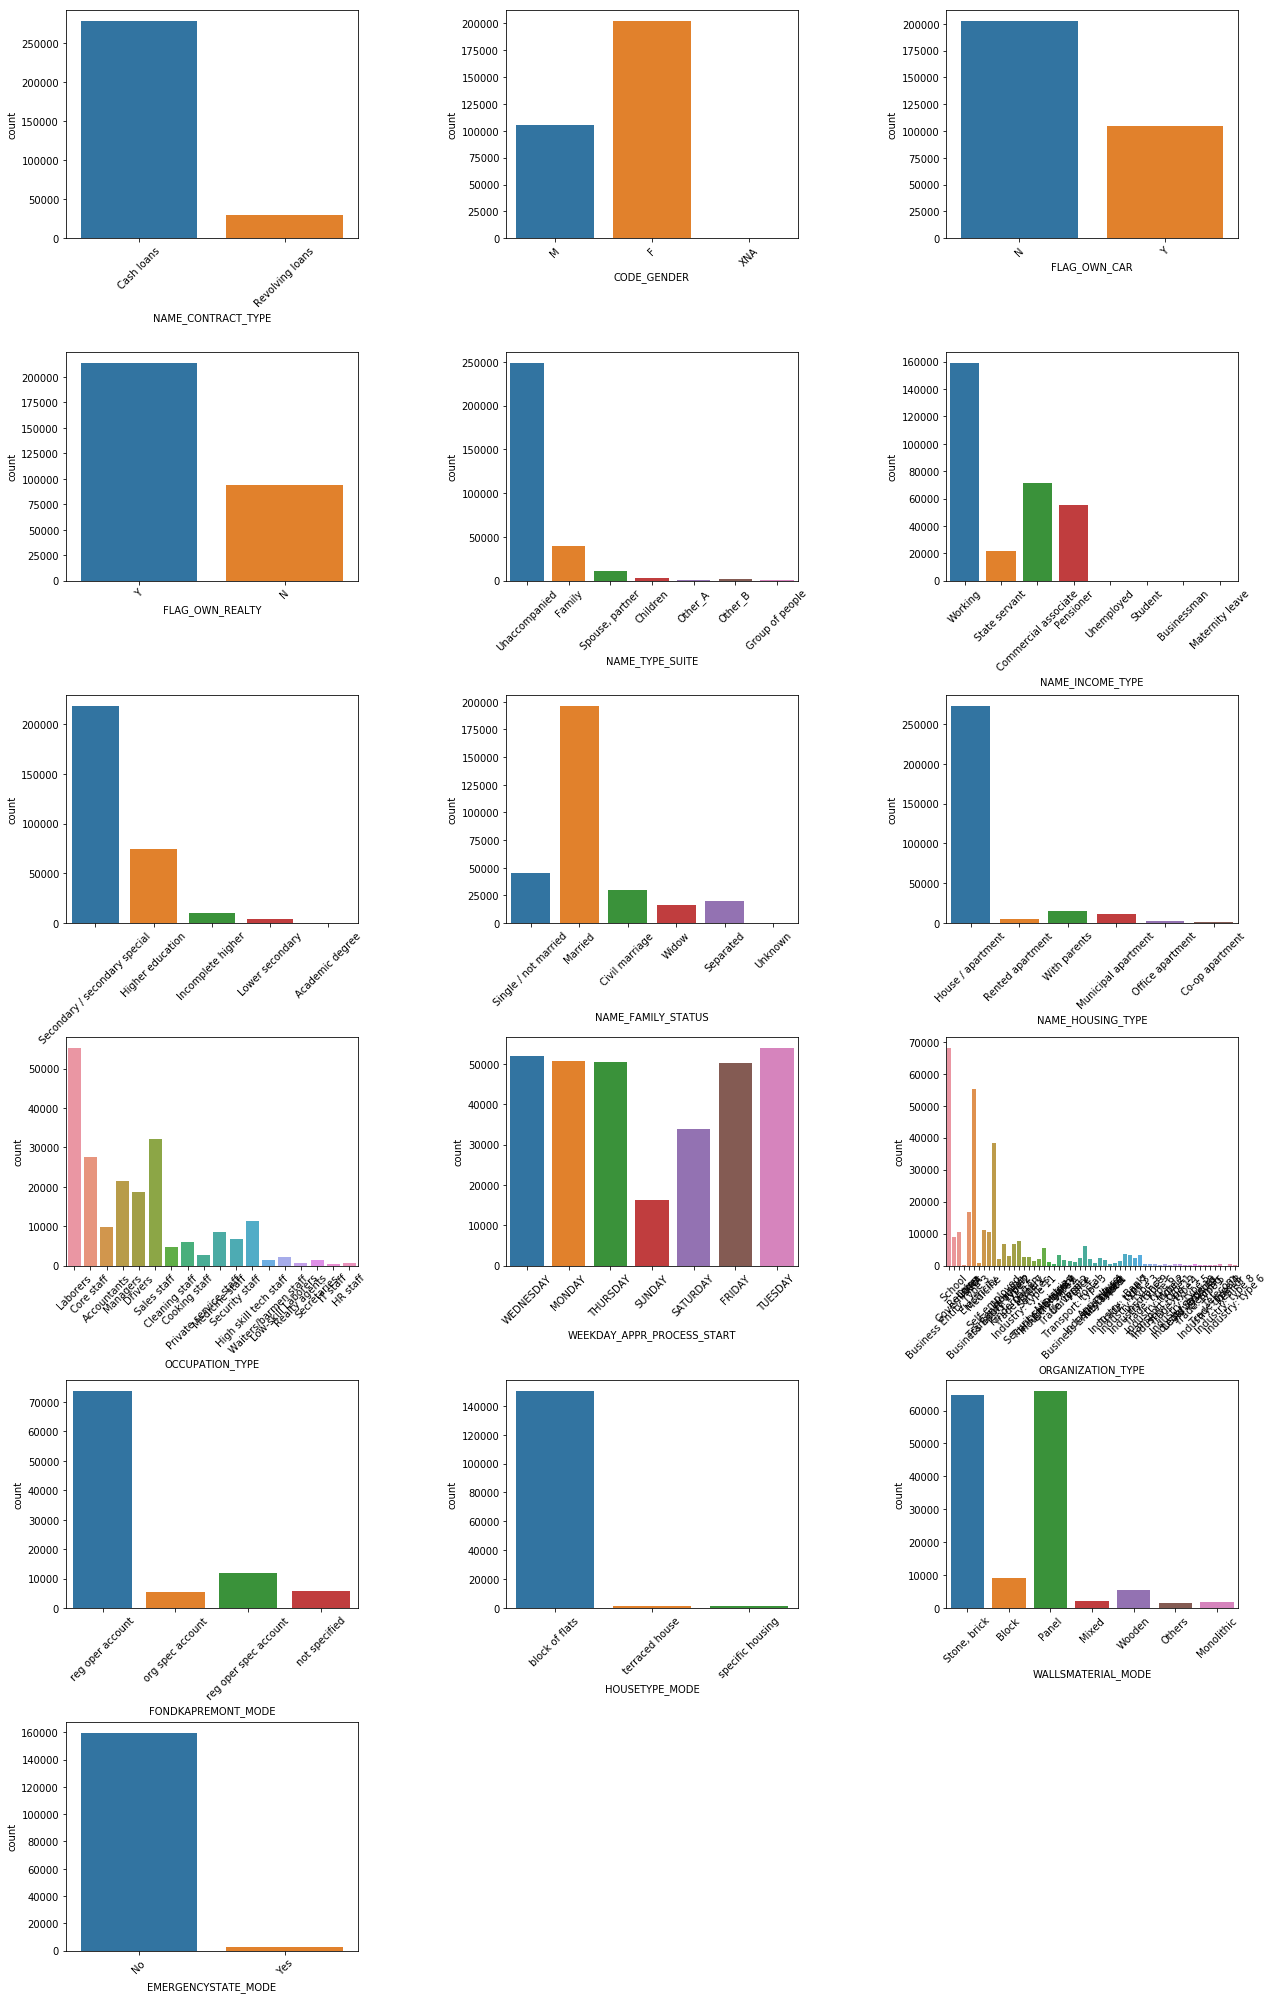

In [21]:
print ("Count bars for categorical features")
fig, ax = plt.subplots(0,0, figsize=(21, 42))
fig.subplots_adjust(hspace = .5, wspace=.51)
for c, v in enumerate(cat_features):
    ax = fig.add_subplot(7, 3, c+1)
    sns.countplot(v,data=datasets["application_train"])
    plt.xticks(rotation = 45)
    plt.xlabel(v)

In [22]:
datasets["application_train"].EMERGENCYSTATE_MODE.value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

### Numerical Features

In [23]:
num_features = datasets["application_train"].select_dtypes(include=['float64', 'int']).columns.tolist()
num_features

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

## Count of the target column 

In [24]:
datasets["application_train"]['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Count bars for categorical features


Text(0.5, 0, 'TARGET')

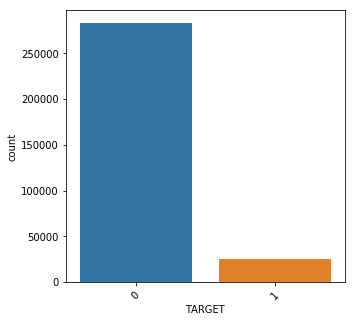

In [25]:
print ("Count bars for categorical features")
fig, ax = plt.subplots(0,0, figsize=(5, 5))
fig.subplots_adjust(hspace = .5, wspace=.51)
sns.countplot("TARGET",data=datasets["application_train"])
plt.xticks(rotation = 45)
plt.xlabel("TARGET")

* If both levels of target feature are more than 10%, logistic regression classifier would be an overestimate the coefficients. Let's look at the proportions of target variable

In [0]:
print ("Percentage of target levels:")
print (np.round(datasets["application_train"]['TARGET'].value_counts()/datasets["application_train"].shape[0]*100),1)

Percentage of target levels:
0    92.0
1     8.0
Name: TARGET, dtype: float64 1


Only __8%__ of clients failed to repay on time. We have much more loans that repaid on time other than the not repaid on time. So, we have a inbalanced target distribution. 

## Correlation with  the target column 

In [26]:
correlations = datasets["application_train"].corr(method="spearman")['TARGET'].sort_values(ascending=False)
print('Most Positive Correlations:\n', correlations.head(10))
print('\nMost Negative Correlations:\n', correlations.tail(10).sort_values(ascending=True))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078328
REGION_RATING_CLIENT_W_CITY    0.060936
REGION_RATING_CLIENT           0.058909
DAYS_LAST_PHONE_CHANGE         0.053711
OWN_CAR_AGE                    0.052932
DAYS_ID_PUBLISH                0.052535
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3      -0.166330
EXT_SOURCE_1      -0.151128
EXT_SOURCE_2      -0.147332
FLOORSMAX_AVG     -0.046178
FLOORSMAX_MEDI    -0.046019
FLOORSMAX_MODE    -0.045357
LIVINGAREA_AVG    -0.041631
LIVINGAREA_MEDI   -0.041140
TOTALAREA_MODE    -0.040071
LIVINGAREA_MODE   -0.039060
Name: TARGET, dtype: float64


From the correlations, we can see that DAYS_BIRTH which indicating the age of the client is most positively correlated with Target, and EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 are most negtively correlated with Target. we will look more close into those columns and some more column which we think might be important factors for our model. 

Correlation Heatmap


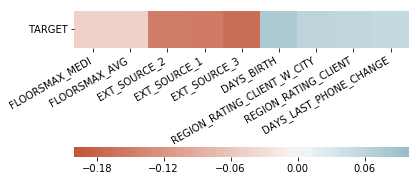

In [27]:
print ('\033[1m\033[4mCorrelation Heatmap\033[0m'.center(2))

corr_heatmap=correlations.iloc[np.r_[-5:0,0:5]]
corr=pd.DataFrame(corr_heatmap).T.drop(columns="TARGET")

grid_kws = {"height_ratios": (.95, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(corr, ax=ax,
                  cbar_ax=cbar_ax,vmin=-0.2, vmax=0.1, center=0,
                  cbar_kws={"orientation": "horizontal"},square=True,
                 cmap=sns.diverging_palette(20, 220, n=200),fmt = '')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);



figure = ax.get_figure()    
figure.savefig('ax.png', dpi=900)

## Examining number of days employed of clients

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000.]), <a list of 10 Text xticklabel objects>)

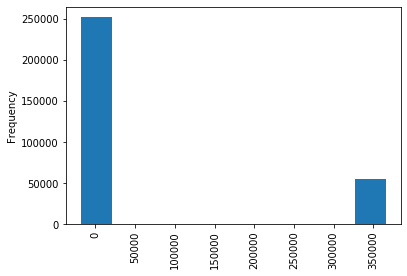

In [0]:
datasets["application_train"]['DAYS_EMPLOYED'].plot.hist();
plt.xticks(rotation='vertical')

From the above distribution, we can see that there is anomalous data present in the **DAYS_EMPLOYED** column. We need to replace these with np.nan and impute them later

## Examining statistics by Gender

In [0]:
# proportion of participants by gender
datasets["application_train"]['CODE_GENDER'].value_counts()/datasets["application_train"].shape[0]

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [0]:
dummies=pd.get_dummies(datasets["application_train"]['CODE_GENDER'])
target=datasets["application_train"]['TARGET']
merged= pd.concat([dummies,target],axis="columns").drop(columns=["M"])
merged=merged.rename(columns={"F": "Gender: 0=Male, 1=Female"})
merged.head(5)

Gender: 0=Male, 1=Female  XNA  TARGET
0                         0    0       1
1                         1    0       0
2                         0    0       0
3                         1    0       0
4                         0    0       0

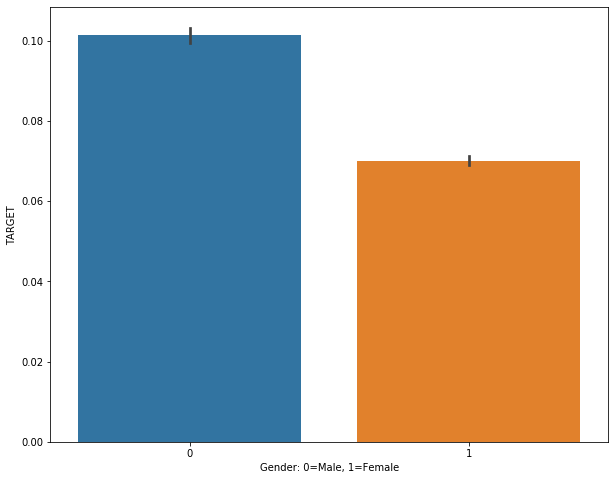

In [0]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="Gender: 0=Male, 1=Female", y="TARGET", data=merged)

* Barplot suggests that female clients more frequently repay their loans, compared to male clients

## Examining statistics by Age of Clients 

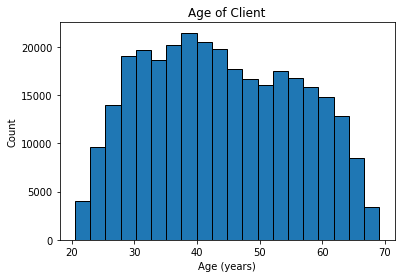

In [0]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins ="sturges")
# Plot the distribution of ages in years
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

From the histigram, we can see there are all resonable age values and no outliers. With less clients under about 25 years old and above 65 years old, we have more applicants between 25 years old to 45 years old. But we can't tell much how age will influent the target value. Let's plot the density plots to show the distribution of applicants' age with different target values.   

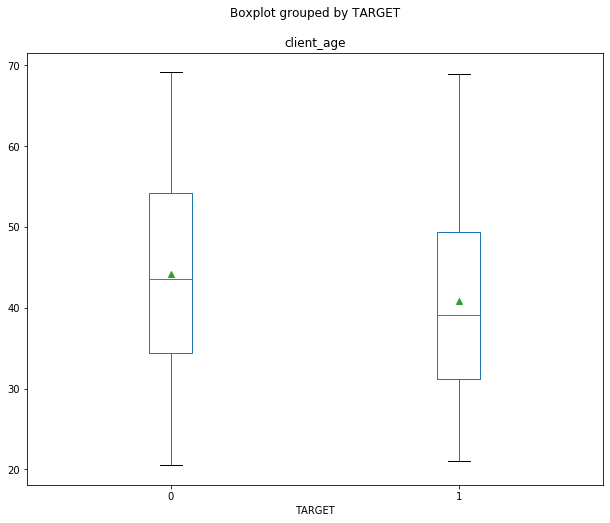

In [0]:
datasets["application_train"]["client_age"]= -datasets["application_train"][['DAYS_BIRTH']]/365
fig, ax = plt.subplots(figsize=(10,8))

datasets["application_train"].boxplot(column=['client_age'], by='TARGET', ax=ax,grid=False, 
                                      showmeans =True )


The above boxplot indicates that older clients tend to repay the loans more frequently compared to younger clients

## Density Plots for External Sources 

From the density plots, we can see older clients have better records about repaid loans. 

External scource is about "normalized score from external data source". The density plots of these external sources shows how they related with the target value. EXT_SOURCE_1 and EXT_SOURCE_3 show less score related higher failure in repaying loans. EXT_SOURCE_2 does not show obvious difference but it agrees with lower score pointing to high failure rate.

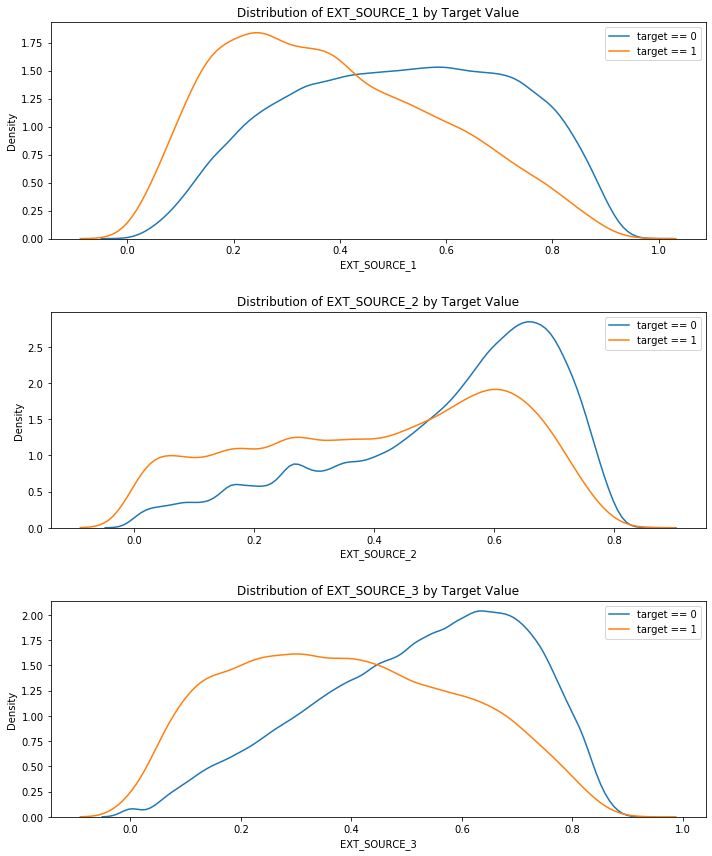

In [0]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 0, source].dropna(), label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 1, source].dropna(), label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## Input variables Correlation Test

* Correlation between AMT_ANNUITY and AMT_CREDIT

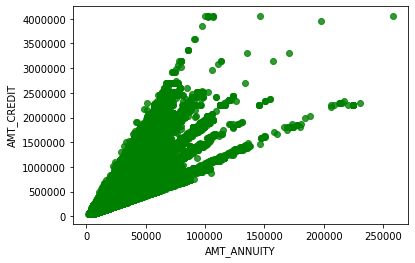

In [0]:
sns.regplot(datasets["application_train"]['AMT_ANNUITY'], datasets["application_train"]['AMT_CREDIT'], color="g", fit_reg=False)


From the above plot, the variables AMT_ANUITY and AMT_CREDIT seem to be postively correlated. One of features can be excluded from the final list of input features

## Dataset questions
* Unique record for each SK_ID_CURR

In [0]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [0]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [0]:
#Return the sorted, unique values that are in both of the input arrays.
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

## EDA on secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Previous Application Dataset

The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [28]:
Pre_appsDF = datasets["previous_application"]

In [0]:
Pre_appsDF.shape

(1670214, 37)

In [29]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

* Missing values in prevApps

In [30]:
Pre_appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [31]:
Pre_appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [32]:
print(f"There are  {Pre_appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [33]:
# How many entries are there for each month?
prevAppCounts = Pre_appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [34]:
len(prevAppCounts[prevAppCounts >40])  #more than 40 previous applications

101

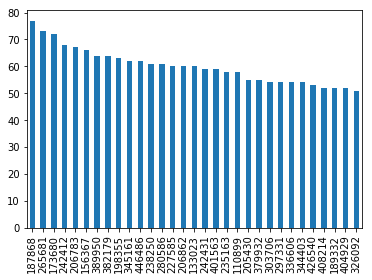

In [35]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

#### Histogram of Number of previous applications for an ID

In [36]:
#what's this for?
sum(Pre_appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

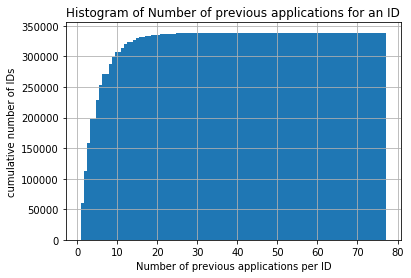

In [37]:
# Histogram of accumulated Number of previous applications
plt.hist(Pre_appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


#### Previous loan rejection reasons

In [38]:
Pre_appsDF['CODE_REJECT_REASON'].nunique()

9

In [39]:
Pre_appsDF['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

#### Previous loans status - Count of Approved and Rejected

In [40]:
Pre_appsDF['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [41]:
Pre_apps_all = Pre_appsDF['SK_ID_CURR'].nunique()
Pre_apps_5plus = Pre_appsDF['SK_ID_CURR'].value_counts()>=5
Pre_apps_40plus = Pre_appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(Pre_apps_5plus)/Pre_apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(Pre_apps_40plus)/Pre_apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

### Installments Payments Dataset

In [42]:
instDF = datasets['installments_payments']

In [43]:
sum(instDF['SK_ID_CURR'].value_counts()==1)

972

In [44]:
len(np.intersect1d(datasets['installments_payments']["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))

291643

In [45]:
instDF.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [46]:
instDF.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

### Credit Card balance dataset

In [47]:
ccbDF3 = datasets['credit_card_balance']

#### Number of clients on the application training data with credit card balance data

In [48]:
len(np.intersect1d(datasets['credit_card_balance']["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))

86905

From the above, it can be seen that the credit card balance data is available only for 30% of the input training data. Imputing the missing values with mean may not be appropriate

In [50]:
ccbDF3.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

### Bureau and Bureau Balance Datasets

In [51]:
burDF = datasets['bureau']
burbDF = datasets['bureau_balance']

In [52]:
burDF.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [53]:
burDF.shape

(1716428, 17)

In [54]:
print(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])))
print(round(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))/len(np.unique(datasets["application_train"]["SK_ID_CURR"])),2))

263491
0.86


In [55]:
print(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])))
print(round(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))/len(np.unique(datasets["application_test"]["SK_ID_CURR"])),2))

42320
0.87


Looking through some of the high-level numbers in the Bureau dataset, more than 85% of our applicants have information on this dataset, so it's definitely worth pursuing adding this information into the model.

In [56]:
burbDF.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [57]:
np.count_nonzero(burDF['CREDIT_DAY_OVERDUE'])/len(burDF['CREDIT_DAY_OVERDUE'])

0.0024568464275809996

Bureau Balance is a level of granularity on each credit that we do not need to be concerned with. We have only .2% of our population has overdue credits, so calculating out the number of individual months overdue isn't going to be of much benefit.

So now we will take a look at our various features and their distributions.

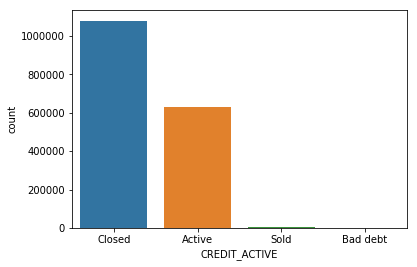

In [58]:
sns.countplot(burDF['CREDIT_ACTIVE'])

We've got a health number of obsevations in both active credit. We will be comfortable engineering features off of these subsets.

(array([ 47137.,  51695.,  56894.,  53955.,  49900.,  35938.,  40812.,
         54562.,  66378.,  80971.,  89889.,  97227., 106785., 107929.,
        118204., 127570., 134756., 147090., 144486., 104250.]),
 array([-2922. , -2775.9, -2629.8, -2483.7, -2337.6, -2191.5, -2045.4,
        -1899.3, -1753.2, -1607.1, -1461. , -1314.9, -1168.8, -1022.7,
         -876.6,  -730.5,  -584.4,  -438.3,  -292.2,  -146.1,     0. ]),
 <a list of 20 Patch objects>)

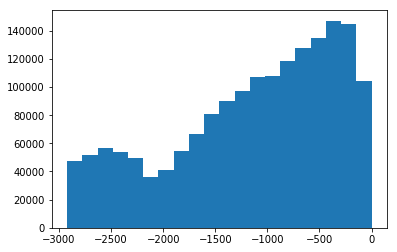

In [59]:
plt.hist(burDF['DAYS_CREDIT'],bins = 20)

# Feature Engineering

## Engineering Features: Primary table - application_train

**Deriving new features from the training data:**
 
* ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
* CREDIT_TERM: the length of the payment in years
* DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age (after imputing anomalous values in 'DAYS_EMPLOYED')
* GOODS_PRICE_CREDIT_PERCENT: the percentage of the goods price relative to the loan credit amount
* INCOME_PER_FAM_MEMBERS: the income per family members
* TOTAL_ENQ_BUREAU: total number of enquiries to Credit Bureau 
* RATIO_CAR_TO_BRITH: 
* RATIO_CAR_TO_EMPLOY:
* RATIO_PHONE_TO_BIRTH:
* RATIO_PHONE_TO_EMPLOY:


In [60]:
class app_add_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X=pd.DataFrame(X, columns=self.features)
        X['ANNUITY_INCOME_PERCENT'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
        X['CREDIT_TERM'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
        X['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
        X['AGE'] = X['DAYS_BIRTH'] / -365
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
        X['GOODS_PRICE_CREDIT_PERCENT']=X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
        X['INCOME_PER_FAM_MEMBERS']=X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']
        X['TOTAL_ENQ_BUREAU']=X['AMT_REQ_CREDIT_BUREAU_DAY']\
        +X['AMT_REQ_CREDIT_BUREAU_WEEK']\
        + X['AMT_REQ_CREDIT_BUREAU_MON']\
        + X['AMT_REQ_CREDIT_BUREAU_QRT']\
        + X['AMT_REQ_CREDIT_BUREAU_YEAR']
        X['RATIO_CAR_TO_BRITH']=X['OWN_CAR_AGE'] / X['DAYS_BIRTH']
        X['RATIO_CAR_TO_EMPLOY'] = X['OWN_CAR_AGE'] / X['DAYS_EMPLOYED']
        X['RATIO_PHONE_TO_BIRTH'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_BIRTH']
        X['RATIO_PHONE_TO_EMPLOY'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_EMPLOYED']
        ##########
        X=X.replace([np.inf, -np.inf], np.nan)
        return X

In [0]:
'DAYS_BIRTH','DAYS_EMPLOYED','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'

('DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR')

In [0]:
'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'

## Engineering Features: previous_application

**New features**
* Count of previous approved applications based on NAME_CONTRACT_STATUS
* Count of previous refused applications based on NAME_CONTRACT_STATUS
* Difference between applied and approved credit amount.
* Aggregate stats for 'AMT_ANNUITY'
* Aggregate stats for 'AMT_APPLICATION'
* Prev_GOODS_PRICE_CREDIT_PERCENT: the percentage of the goods price relative to the loan credit amount
* Prev_CREDIT_APP_PERCENTAGE: the percentage of the credit was granted relative to the loan was applied
* CALC_FLAG_PRIVILEGED_CUSTOMER
* CALC_TERMINATED
* CALC_LAST_DUE_AFTER_APPL
* Group by the client id, calculate aggregation statistics

In [61]:
class prev_apps_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature=None): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X=pd.DataFrame(X)
        X['Pre_GOODS_PRICE_CREDIT_PERCENT']=X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
        X['Pre_CREDIT_APP_PERCENTAGE']=X['AMT_CREDIT'] / X['AMT_APPLICATION']
        X['CALC_FLAG_PRIVILEGED_CUSTOMER']=(X['RATE_INTEREST_PRIVILEGED']>0).astype(int)
        X['CALC_TERMINATED']=(X['DAYS_TERMINATION']<0).astype(int)
        X['CALC_LAST_DUE_AFTER_APPL']=(X['DAYS_LAST_DUE_1ST_VERSION']>0).astype(int)
        X=X.replace([np.inf, -np.inf], np.nan)
    
        return X

In [62]:
class prev_apps_add_features2(BaseEstimator, TransformerMixin):
    def __init__(self, feature='text'): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Prev_appr_count'] = X['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Approved') else 0)
        X['Prev_rej_count'] = X['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Refused') else 0)
        X['Diff_credit_appr'] = X['AMT_APPLICATION'] - X['AMT_CREDIT'] 
        X=X.replace([np.inf, -np.inf], np.nan)
        return X

In [63]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            if f not in (features[-1], features[-2]):
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            else:
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

In [0]:
'Pre_GOODS_PRICE_CREDIT_PERCENT', 'Pre_CREDIT_APP_PERCENTAGE','Prev_appr_count','Prev_rej_count','Diff_credit_appr'

## Engineering Features: Installment Payments

* Percent of AMT_INSTALMENT and AMT_PAYMENT
* Percent of DAYS_ENTRY_PAYMENT and DAYS_INSTALMENT

In [64]:
class instpmts_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature=None): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Perc_amt_paid'] = X['AMT_INSTALMENT'] / X['AMT_PAYMENT'] 
        X['Perc_pmt_days'] = X['DAYS_ENTRY_PAYMENT'] / X['DAYS_INSTALMENT'] 
        X['DAYS_LATE_PAYMENT']=X['DAYS_ENTRY_PAYMENT']-X['DAYS_INSTALMENT']
        X['DIFF_INSTALMENT']=X['AMT_INSTALMENT']-X['AMT_PAYMENT']
        X['PERC_DIFF_INSTALMENT']=np.abs(X['DIFF_INSTALMENT'])/X['AMT_INSTALMENT']
        X['INSTAL_PAID_LATE'] = (X['DAYS_LATE_PAYMENT'] > 0).astype(int)
        X['OVERPAID']= (X['DIFF_INSTALMENT'] < 0).astype(int)
        X=X.replace([np.inf, -np.inf], np.nan)
        return X

In [65]:
# Create aggregate features (via pipeline)
class instpmntsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            #self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["mean"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"

## Engineering Features: Credit Card Balance

* Credit Utilisation - AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL
* Total number of Days past Due - SK_DPD_DEF

In [66]:
class crdcardbal_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature='text'): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['MONTHS_BALANCE']=X['MONTHS_BALANCE'].abs()
        X['CALC_PERC_DRAWINGS_ATM_CURRENT']=X['AMT_DRAWINGS_ATM_CURRENT']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_DRAWINGS_CURRENT']=X['AMT_DRAWINGS_CURRENT']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_DRAWINGS_OTHER_CURRENT']=X['AMT_DRAWINGS_OTHER_CURRENT']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_DRAWINGS_POS_CURRENT']=X['AMT_DRAWINGS_POS_CURRENT']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_INST_MIN_REGULARITY']=X['AMT_INST_MIN_REGULARITY']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_PAYMENT_CURRENT']=X['AMT_PAYMENT_CURRENT']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_PAYMENT_TOTAL_CURRENT']=X['AMT_PAYMENT_TOTAL_CURRENT']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_RECEIVABLE_PRINCIPAL']=X['AMT_RECEIVABLE_PRINCIPAL']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_PERC_RECIVABLE']=X['AMT_RECIVABLE']/X['AMT_CREDIT_LIMIT_ACTUAL']
        X['CALC_DAYS_WITHOUT_TOLERANCE']=X['SK_DPD']-X['SK_DPD_DEF']

        CNT_DRAWING_LIST=['CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_POS_CURRENT']
        X['CALC_CNT_DRAWINGS_TOTAL']=X[CNT_DRAWING_LIST].sum(axis=1)
        X=X.replace([np.inf, -np.inf], np.nan)
        #X['Diff_amt_paid'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT'] 
        #X['Diff_pmt_days'] = X['DAYS_ENTRY_PAYMENT'] - X['DAYS_INSTALMENT'] 
        return X

In [67]:
# Create aggregate features (via pipeline)
class crdcardbalFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            if f not in (features[-1], features[-2]):
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            else:
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        #result.columns = [' '.join(col).strip() for col in result.columns.values]
        result['Perc_Credit_util'] = np.round(result['AMT_BALANCE_sum'] / result['AMT_CREDIT_LIMIT_ACTUAL_sum'],3)
        result.drop(['AMT_BALANCE_sum', 'AMT_CREDIT_LIMIT_ACTUAL_sum'], axis=1, inplace=True)
        result=result.replace([np.inf, -np.inf], np.nan)
        return result # return dataframe with the join key "SK_ID_CURR"
    
    
# from sklearn.pipeline import make_pipeline 
# def test_driver_crecardbalFeaturesAggregater(df, features):
#    print(f"df.shape: {df.shape}\n")
#    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
#    test_pipeline = make_pipeline(crdcardbalFeaturesAggregater(features))
#    return(test_pipeline.fit_transform(df))
         
# card_features = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'SK_DPD_DEF']
# res = test_driver_crecardbalFeaturesAggregater(ccbDF3, card_features)
# print(f"HELLO")
# print(f"Test driver: \n{res[0:3]}")
# print(f"input[features][0:10]: \n{Pre_appsDF[0:3]}")


## Engineering Features: Bureau and Bureau Balance
We will engineer a few features. First, we'll get the total active credit and total debt for each consumer.  Then we will determine the most recent credit activity for each consumer.

In [68]:
class bur_add_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X,y=None):
        X['Total_Credit'] = X[X['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
        X['Total_Debt'] = X.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
        X['Most_Recent_Days_Credit'] = X[X['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['DAYS_CREDIT'].max()
        X['CALC_PER_CREDIT_MAX_OVERDUE']=X['AMT_CREDIT_MAX_OVERDUE']/X['AMT_CREDIT_SUM']
        X['CALC_CREDIT_CLOSED']=(X['DAYS_ENDDATE_FACT'] < 0).astype(int)
        X['MONTHS_BALANCE']=X['MONTHS_BALANCE'].abs()
        X['PER_CREDIT_SUM_OVERDUE']=X['AMT_CREDIT_SUM_OVERDUE']/X['AMT_CREDIT_SUM']
        X=X.replace([np.inf, -np.inf], np.nan)
#         X['Total_Credit'].fillna(0, inplace=True)
#         X['Total_Debt'].fillna(0, inplace=True)
#         X['Most_Recent_Days_Credit'].fillna(0, inplace=True)
        return X

In [0]:
'Total_Credit','Total_Debt','Most_Recent_Days_Credit'

('Total_Credit', 'Total_Debt', 'Most_Recent_Days_Credit')

In [69]:
class bureauFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
    
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["mean"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"

## Engineering Features: POS_CASH_balance

* Park it for Next round of EDA and Feature engineering

In [70]:
class pcb_add_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X,y=None):
        ###new features xin
        X['CALC_PERC_REMAINING_INSTAL']=X['CNT_INSTALMENT_FUTURE']/X['CNT_INSTALMENT']
        X['CALC_CNT_REMAINING_INSTAL']=X['CNT_INSTALMENT']-X['CNT_INSTALMENT_FUTURE']
        X['CALC_DAYS_WITHOUT_TOLERANCE']=X['SK_DPD']-X['SK_DPD_DEF']
        X=X.replace([np.inf, -np.inf], np.nan)
        return X

In [71]:
class pcbFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["mean", "sum"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        if len(result.columns.levels)>1:
            result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"    

# Feature Engineering Pipeline

## Build Feature Engineering Pipelines

In [72]:
# Feature Engineering Pipeline for 'application_train'

Apps_feature_pipeline = Pipeline([('app_add_features', app_add_features()),])

In [73]:
# Feature Engineering Pipeline for 'previous_application'
prev_features = ['AMT_APPLICATION','Pre_GOODS_PRICE_CREDIT_PERCENT', 'Pre_CREDIT_APP_PERCENTAGE','CALC_FLAG_PRIVILEGED_CUSTOMER','CALC_TERMINATED','CALC_LAST_DUE_AFTER_APPL','Diff_credit_appr', 'Prev_appr_count','Prev_rej_count']
prevApps_feature_pipeline = Pipeline([
        ('prev_apps_add_features1', prev_apps_add_features1()),
        ('prev_apps_add_features2', prev_apps_add_features2()),
        ('prevAppsFeaturesAggregater', prevAppsFeaturesAggregater(prev_features))
    ])

In [74]:
# Feature Engineering Pipeline for 'installments_payments'

inst_features = ['Perc_amt_paid','Perc_pmt_days','DAYS_LATE_PAYMENT','DIFF_INSTALMENT','PERC_DIFF_INSTALMENT','INSTAL_PAID_LATE','OVERPAID']
instpmts_feature_pipeline = Pipeline([
        ('instpmt_add_features1', instpmts_add_features1()),  # add some new features 
        ('instpmt_aggregater', instpmntsFeaturesAggregater(inst_features)), # Aggregate across old and new features
    ])

In [75]:
# Feature Engineering Pipeline for 'credit_card_balance'

card_features = ['SK_DPD_DEF','MONTHS_BALANCE','CALC_PERC_DRAWINGS_ATM_CURRENT','CALC_PERC_DRAWINGS_CURRENT','CALC_PERC_DRAWINGS_OTHER_CURRENT','CALC_PERC_DRAWINGS_POS_CURRENT','CALC_PERC_INST_MIN_REGULARITY','CALC_PERC_PAYMENT_CURRENT','CALC_PERC_PAYMENT_TOTAL_CURRENT','CALC_PERC_RECEIVABLE_PRINCIPAL','CALC_PERC_RECIVABLE','CALC_DAYS_WITHOUT_TOLERANCE','CALC_CNT_DRAWINGS_TOTAL', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL']
crdbal_feature_pipeline = Pipeline([
        ('crdcardbal_add_features1', crdcardbal_add_features1()),  # add some new features 
        ('crdbal_aggregater', crdcardbalFeaturesAggregater(card_features)), # Aggregate across old and new features
    ])

In [76]:
# Feature Engineering Pipeline for 'bureau'

bureau_features = ['Total_Credit','Total_Debt','Most_Recent_Days_Credit','CALC_PER_CREDIT_MAX_OVERDUE','CALC_CREDIT_CLOSED','MONTHS_BALANCE','PER_CREDIT_SUM_OVERDUE']
bu_feature_pipeline = Pipeline([('bur_add_features',bur_add_features()),
                                ('bureauFeaturesAggregater',bureauFeaturesAggregater(bureau_features)),
       ])

In [77]:
# Feature Engineering Pipeline for 'POS_CASH_balance'

POS_CASH_balance_features = ['SK_DPD_DEF','CALC_PERC_REMAINING_INSTAL','CALC_CNT_REMAINING_INSTAL','CALC_DAYS_WITHOUT_TOLERANCE']
pcb_feature_pipeline = Pipeline([('pcb_add_features',pcb_add_features()),
    ('pcbFeaturesAggregater',pcbFeaturesAggregater(POS_CASH_balance_features))
       ])

## Prepare the labeled dataset

In [78]:
# transform datasets through feature engineering pipelines
# selected_features = ['SK_ID_CURR','AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'AMT_CREDIT','DAYS_EMPLOYED','EXT_SOURCE_1',
#         'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#                    'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE','AMT_ANNUITY','AMT_GOODS_PRICE',
# 'CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 
#                     'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
#                    'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3']

#rf_fe.extend(('DAYS_EMPLOYED', 'DAYS_BIRTH'))
#exl_fe = ['AMT_APPLICATION_mean', 'INCOME_PER_FAM_MEMBERS', 'AMT_ANNUITY_min', 'AGE', 'Diff_credit_appr_max', 'DAYS_EMPLOYED_PERCENT', 'AMT_APPLICATION_min', 'range_AMT_APPLICATION', 'AMT_ANNUITY_max', 'Diff_credit_appr_mean', 'Pre_GOODS_PRICE_CREDIT_PERCENT_min', 'Pre_CREDIT_APP_PERCENTAGE_max', 'AMT_ANNUITY_mean', 'TOTAL_ENQ_BUREAU', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'GOODS_PRICE_CREDIT_PERCENT', 'Diff_credit_appr_min', 'AMT_APPLICATION_max', 'Prev_rej_count_sum']
#sel_fe = [x for x in rf_fe if x not in exl_fe]
#apps_train= datasets["application_train"][sel_fe]#primary dataset
apps_train= datasets["application_train"].drop(['TARGET'], axis=1)
y=datasets["application_train"]["TARGET"]
Pre_appsDF = datasets["previous_application"] #prev app
instDF = datasets["installments_payments"]
ccbDF = datasets['credit_card_balance']
burDF = datasets['bureau']
burbDF = datasets['bureau_balance']
bur_burbDF=burDF.merge(burbDF,how='left', on='SK_ID_BUREAU')
pcbDF = datasets['POS_CASH_balance']

In [79]:
apps_train.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 121 columns]

In [80]:
def prepare_datasets(X):
    
        
        X=Apps_feature_pipeline.transform(X)
        print("Xapp: ", X.shape)
        X=X.merge(prevApps_feature_pipeline.transform(Pre_appsDF), how='left', on='SK_ID_CURR')
        print("Xprevapp: ", X.shape)
        X=X.merge(instpmts_feature_pipeline.transform(instDF),how='left', on='SK_ID_CURR')
        print("Xinst: ", X.shape)
        X=X.merge(crdbal_feature_pipeline.transform(ccbDF),how='left', on='SK_ID_CURR')
        print("Xcrd: ", X.shape)
        X=X.merge(bu_feature_pipeline.transform(bur_burbDF),how='left', on='SK_ID_CURR')
        print("Xbu: ", X.shape)
        X=X.merge(pcb_feature_pipeline.transform(pcbDF),how='left', on='SK_ID_CURR')
        print("Xpcb: ", X.shape)
        X=X.drop(['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE',], axis=1)
        print("Xfinal: ", X.shape)
        return X



In [0]:
X= prepare_datasets(apps_train)

X.head()

Xapp:  (133928, 132)
Xprevapp:  (133928, 156)
Xinst:  (133928, 163)
Xcrd:  (133928, 203)
Xbu:  (133928, 210)
Xpcb:  (133928, 218)
Xfinal:  (133928, 204)


SK_ID_CURR  ... CALC_DAYS_WITHOUT_TOLERANCE_sum
0      100002  ...                             0.0
1      100003  ...                             0.0
2      100004  ...                             0.0
3      100006  ...                             0.0
4      100007  ...                             0.0

[5 rows x 204 columns]

In [0]:
X.shape

(307511, 204)

In [0]:
X_corr = X.copy()

#X_corr['TARGET'] = pd.DataFrame[y, X_corr)
X_corr = pd.concat([X_corr, y], axis=1)
X_corr.head()

SK_ID_CURR NAME_CONTRACT_TYPE  ... CALC_DAYS_WITHOUT_TOLERANCE_sum TARGET
0      100002         Cash loans  ...                             0.0      1
1      100003         Cash loans  ...                             0.0      0
2      100004    Revolving loans  ...                             0.0      0
3      100006         Cash loans  ...                             0.0      0
4      100007         Cash loans  ...                             0.0      0

[5 rows x 205 columns]

### IterativeImputation of the most important variables

Target feature is highly correlated with the EXT_SOURCE_1, EXT_SOURCE_@, and EXT_SOURCE_3 features. Hence, these three features are the most important variables for prediction. However, a notable proportion of the values for these  features are missing. We aim to impute these missing values by use of IterativeImputer in SKlearn.

IterativeImputer uses the available data to impute the missing values. Each column with missing values is treated as y and the rest of the dataset is treated as X. 
Ref: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

To have a precise imputation for EXT_SOURCE variables, we need to identify the most correlated features with the EXT_SOURCE variables and use them in the imputation process

In [0]:
#corr1 = X_corr.corr()['EXT_SOURCE_1'].sort_values(ascending=False)
#corr2 = X_corr.corr()['EXT_SOURCE_2'].sort_values(ascending=False)
corr3 = X_corr.corr()['EXT_SOURCE_3'].sort_values(ascending=False)

In [0]:
corr3.dropna(inplace=True)

In [0]:
#corr1_tail = corr1.tail(5).index.tolist()
#corr1_head = corr1.head(5).index.tolist()
#corr2_tail = corr2.tail(5).index.tolist()
#corr2_head = corr2.head(5).index.tolist()
corr3_tail = corr3.tail(3).index.tolist()
corr3_head = corr3.head(4).index.tolist()
mi_features = []
#mi_features.extend(corr1_tail)
#mi_features.extend(corr2_tail)
mi_features.extend(corr3_tail)
#mi_features.extend(corr1_head)
#mi_features.extend(corr2_head) 
mi_features.extend(corr3_head)
mi_features = list(dict.fromkeys(mi_features))



In [0]:
corr3

EXT_SOURCE_3                           1.000000
CALC_CREDIT_CLOSED_mean                0.283221
MONTHS_BALANCE_mean_y                  0.238383
AGE                                    0.210123
EXT_SOURCE_1                           0.183646
                                         ...   
CALC_PERC_RECIVABLE_mean              -0.155489
Perc_Credit_util                      -0.155737
CALC_PERC_RECEIVABLE_PRINCIPAL_mean   -0.156309
Prev_rej_count_sum                    -0.167585
TARGET                                -0.176800
Name: EXT_SOURCE_3, Length: 187, dtype: float64

In [0]:
mi_features.remove('EXT_SOURCE_3')

In [0]:
print(mi_features)

['CALC_PERC_RECEIVABLE_PRINCIPAL_mean', 'Prev_rej_count_sum', 'CALC_CREDIT_CLOSED_mean', 'MONTHS_BALANCE_mean_y', 'AGE']


Split the data set to test and train sets.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [0]:
X_train.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
21614       125178         Cash loans           F            N   
209797      343134         Cash loans           F            N   
17976       120964         Cash loans           F            Y   
282543      427277         Cash loans           M            Y   
52206       160455         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
21614                Y             0          Family  Commercial associate   
209797               N             0   Unaccompanied               Working   
17976                Y             0   Unaccompanied             Pensioner   
282543               Y             0   Unaccompanied               Working   
52206                N             0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  ...  \
21614                Higher education               Married  ...   
209797  Secondary / secondary special  Single / not married  ...   
17976                Higher education                 Widow  ...   
282543  Secondary / secondary special  Single / not married  ...   
52206                Higher education        Civil marriage  ...   

       MONTHS_BALANCE_mean_y  PER_CREDIT_SUM_OVERDUE_mean  SK_DPD_DEF_mean_y  \
21614              12.657143                          0.0                0.0   
209797                   NaN                          NaN                0.0   
17976                    NaN                          0.0                0.0   
282543              5.270833                          0.0                0.0   
52206                    NaN                          0.0                0.0   

        SK_DPD_DEF_sum  CALC_PERC_REMAINING_INSTAL_mean  \
21614              0.0                         0.416667   
209797             0.0                         0.500000   
17976              0.0                         0.455882   
282543             0.0                         0.534722   
52206              0.0                         0.500000   

        CALC_PERC_REMAINING_INSTAL_sum  CALC_CNT_REMAINING_INSTAL_mean  \
21614                         2.500000                        2.333333   
209797                        6.500000                        6.000000   
17976                        23.250000                        5.882353   
282543                        6.416667                        5.500000   
52206                         6.500000                        6.000000   

        CALC_CNT_REMAINING_INSTAL_sum  CALC_DAYS_WITHOUT_TOLERANCE_mean_y  \
21614                            14.0                                 0.0   
209797                           78.0                                 0.0   
17976                           300.0                                 0.0   
282543                           66.0                                 0.0   
52206                            78.0                                 0.0   

        CALC_DAYS_WITHOUT_TOLERANCE_sum  
21614                               0.0  
209797                              0.0  
17976                               0.0  
282543                              0.0  
52206                               0.0  

[5 rows x 204 columns]

In [0]:
print(X_train.shape, X_valid.shape, X_test.shape)

(222176, 204) (46127, 204) (39208, 204)


## Prepare the unlabeled dataset (i.e., the Kaggle test dataset)

In [96]:

X_kaggle_test= datasets["application_test"]

prepared_kaggle_test= prepare_datasets(X_kaggle_test)

prepared_kaggle_test.head()

Xapp:  (48744, 132)
Xprevapp:  (48744, 156)
Xinst:  (48744, 163)
Xcrd:  (48744, 203)
Xbu:  (48744, 210)
Xpcb:  (48744, 218)
Xfinal:  (48744, 204)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0             0   Unaccompanied          Working   
1             0   Unaccompanied          Working   
2             0             NaN          Working   
3             2   Unaccompanied          Working   
4             1   Unaccompanied          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  ...  \
0               Higher education            Married  ...   
1  Secondary / secondary special            Married  ...   
2               Higher education            Married  ...   
3  Secondary / secondary special            Married  ...   
4  Secondary / secondary special            Married  ...   

  MONTHS_BALANCE_mean_y  PER_CREDIT_SUM_OVERDUE_mean  SK_DPD_DEF_mean_y  \
0             16.279070                          0.0           0.777778   
1              4.333333                          0.0           0.000000   
2             29.373913                          0.0           0.000000   
3             27.433929                          0.0           0.000000   
4                   NaN                          NaN           0.000000   

   SK_DPD_DEF_sum  CALC_PERC_REMAINING_INSTAL_mean  \
0             7.0                         0.361111   
1             0.0                         0.600000   
2             0.0                         0.631173   
3             0.0                         0.491129   
4             0.0                         0.487179   

   CALC_PERC_REMAINING_INSTAL_sum  CALC_CNT_REMAINING_INSTAL_mean  \
0                        3.250000                        2.555556   
1                        6.000000                        4.500000   
2                       22.722222                        6.083333   
3                       15.225000                       10.225806   
4                        6.333333                        6.153846   

   CALC_CNT_REMAINING_INSTAL_sum  CALC_DAYS_WITHOUT_TOLERANCE_mean_y  \
0                           23.0                            0.000000   
1                           45.0                            0.000000   
2                          219.0                            0.944444   
3                          317.0                            0.000000   
4                           80.0                            0.000000   

   CALC_DAYS_WITHOUT_TOLERANCE_sum  
0                              0.0  
1                              0.0  
2                             34.0  
3                              0.0  
4                              0.0  

[5 rows x 204 columns]

In [97]:
prepared_kaggle_test.shape

(48744, 204)

# Processing pipeline

In our data prep pipeline, we are going to include three sets of features. Numerical features (n=126), categorical features (n=16), and multiple imputation (MI) features (n=).  

In [0]:
mi_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AGE','RATIO_CAR_TO_BRITH','REGION_POPULATION_RELATIVE','RATIO_PHONE_TO_BIRTH','HOUR_APPR_PROCESS_START',
               'CALC_CREDIT_CLOSED_mean',
              'MONTHS_BALANCE_mean_y',
              'DAYS_REGISTRATION',
              'REG_CITY_NOT_WORK_CITY',
              'FLAG_EMP_PHONE',
               'CALC_PERC_RECEIVABLE_PRINCIPAL_min',
               'CALC_PERC_RECIVABLE_min',
              'REGION_RATING_CLIENT_W_CITY',
              'REGION_RATING_CLIENT',
              'CALC_PERC_RECIVABLE_mean',
             'Perc_Credit_util',
 'CALC_PERC_RECEIVABLE_PRINCIPAL_mean'] 


In [0]:
mi_festures = ['DAYS_REGISTRATION',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_ID_PUBLISH',
 'Prev_rej_count_sum',
 'AGE',
 'RATIO_CAR_TO_BRITH',
 'REGION_POPULATION_RELATIVE',
 'RATIO_PHONE_TO_BIRTH',
 'CALC_CREDIT_CLOSED_mean',
 'MONTHS_BALANCE_mean']#4

In [105]:
#mi_features = ['FLAG_DOCUMENT_2', 'SK_DPD_DEF_min', 'CALC_DAYS_WITHOUT_TOLERANCE_min', 'CALC_CREDIT_CLOSED_mean', 'MONTHS_BALANCE_mean_y'] #1
mi_features = ['CALC_CREDIT_CLOSED_mean','MONTHS_BALANCE_mean_y','AGE','CALC_PERC_RECIVABLE_mean','CALC_CNT_DRAWINGS_TOTAL_max']#7
#mi_features =['Perc_Credit_util', 'FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'AGE', 'EXT_SOURCE_1'] #2
#mi_features =['CALC_PERC_RECEIVABLE_PRINCIPAL_mean', 'Prev_rej_count_sum', 'CALC_CREDIT_CLOSED_mean', 'MONTHS_BALANCE_mean_y'] #3

#mi_features = ['CALC_PERC_RECEIVABLE_PRINCIPAL_mean', 'Prev_rej_count_sum', 'CALC_CREDIT_CLOSED_mean', 'MONTHS_BALANCE_mean_y', 'AGE']#5
#mi_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AGE','CALC_PERC_RECIVABLE_mean','MONTHS_BALANCE_mean_y']#6
num_attribs_md = ['Prev_rej_count_sum','Perc_amt_paid_mean', 'DAYS_EMPLOYED_PERCENT','Diff_credit_appr_max', 'Diff_credit_appr_min','TOTAL_ENQ_BUREAU']
num_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
num_features= [x for x in num_features if x not in mi_features]
num_features= [x for x in num_features if x not in num_attribs_md]

In [103]:
len(num_features)

177

In [104]:
cat_features = X_train.select_dtypes('object').columns.tolist()
cat_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [0]:
len(cat_features)

16

In [106]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Below is the data prep pipeline. We used three pipelines and a FeatureUnion to make this pipeline. For num and cat features, we impute the missing values using the "mean" and "most frequent" strategies. For MI_features we used BayesianRidge and IterativeImputer to fill the missing values. We used StandardScaler to scale the numeric variables and the OneHotEncoder to make dummy variables for the categorical features. 

In [107]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Identify the numeric features we wish to consider. 
num_attribs = num_features

# Features for Iterative Imputing
mi_pipeline = Pipeline([
        ('selector', DataFrameSelector(mi_features)),
        ('imputer', IterativeImputer(estimator=BayesianRidge())),
        ('std_scaler', StandardScaler()),
    ])    

num1_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs_md)),
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])

num2_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = cat_features

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("mi_pipeline", mi_pipeline),
        ("num1_pipeline", num1_pipeline),
        ("num2_pipeline", num2_pipeline),
        ("cat_pipeline", cat_pipeline),
    ], n_jobs=4)
              



# Feature Selection

## Fit and Transform data for Feature Selection

In [108]:
%%time
X_train_trans = data_prep_pipeline.fit_transform(X_train)

CPU times: user 1.59 s, sys: 1.36 s, total: 2.95 s
Wall time: 6min 19s


In [93]:
X_train_trans.shape

(222176, 328)

In [94]:
X_valid_trans = data_prep_pipeline.transform(X_valid)
X_test_trans = data_prep_pipeline.transform(X_test)

In [98]:
kaggle_test_trans = data_prep_pipeline.transform(prepared_kaggle_test)

In [99]:
kaggle_test_trans.shape

(48744, 328)

In [114]:
num_names = data_prep_pipeline.transformer_list[0][1].named_steps['selector'].attribute_names
len(num_names)

5

In [115]:
num_names2 = data_prep_pipeline.transformer_list[1][1].named_steps['selector'].attribute_names
len(num_names2)

6

In [116]:
num_names3 = data_prep_pipeline.transformer_list[2][1].named_steps['selector'].attribute_names
len(num_names3)

177

In [117]:
num_names.extend(num_names2)
num_names.extend(num_names3)

In [118]:
len(num_names)

188

In [119]:
cat_names = data_prep_pipeline.transformer_list[3][1].named_steps['ohe'].get_feature_names()
len(cat_names)

140

In [120]:
feature_names = []
feature_names.extend(num_names)
feature_names.extend(cat_names)
len(feature_names)

328

In [121]:
X_feat = pd.DataFrame(list(feature_names), columns=['feature'])
len(X_feat.iloc[:,0].tolist())

328

## SelectKBest - f_classif

In [111]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

model_ftest = SelectKBest(score_func=f_classif, k='all')
model_ftest.fit(X_train_trans, y_train)

SelectKBest(k='all', score_func=<function f_classif at 0x7f429e422510>)

In [112]:
ftest_scores = model_ftest.scores_
ftest_pvalues = model_ftest.pvalues_

In [122]:
ftest_all = pd.DataFrame(list(zip(feature_names, ftest_scores, ftest_pvalues)), columns=['feature', 'f value', 'p-value'])
ftest_all.sort_values('p-value').head(10)

feature      f value        p-value
31                          EXT_SOURCE_1  2165.971158   0.000000e+00
3               CALC_PERC_RECIVABLE_mean  1708.410047   0.000000e+00
4            CALC_CNT_DRAWINGS_TOTAL_max  1561.524354   0.000000e+00
32                          EXT_SOURCE_2  5726.713031   0.000000e+00
33                          EXT_SOURCE_3  5772.401061   0.000000e+00
2                                    AGE  1316.380629  2.179096e-287
174                     Perc_Credit_util  1313.070839  1.130584e-286
166  CALC_PERC_RECEIVABLE_PRINCIPAL_mean  1287.926352  3.060214e-281
0                CALC_CREDIT_CLOSED_mean  1143.354559  5.419444e-250
104           GOODS_PRICE_CREDIT_PERCENT  1102.491217  3.720002e-241

233


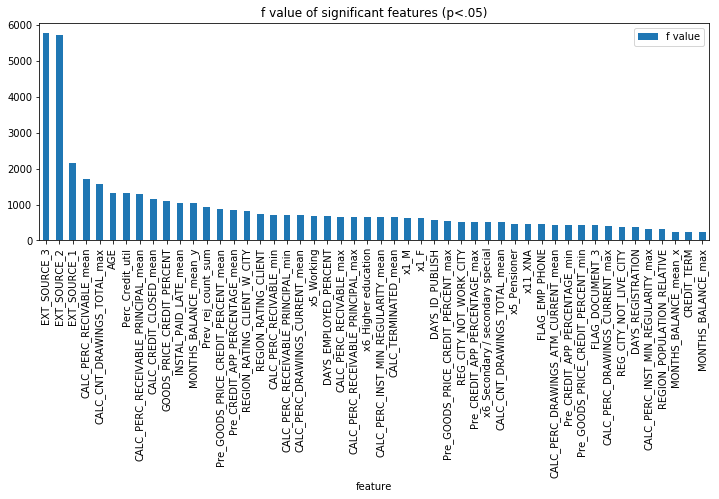

In [123]:
ftest_sig = ftest_all[ftest_all['p-value'] <= .05].sort_values('f value', ascending=False)
print(len(ftest_sig))
ftest_plot = ftest_sig.head(50)
ftest_plot.plot.bar(x='feature', y='f value', title='f value of significant features (p<.05)', figsize=(12,4))

## Chi-Squared Test

In [124]:
from sklearn.preprocessing import MinMaxScaler
chi2_pipeline = Pipeline([
    ('normalizer', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=chi2, k='all'))
])

In [125]:
chi2_model = chi2_pipeline.fit_transform(X_train_trans, y_train)

In [126]:
chi2_scores = chi2_pipeline.named_steps['feature_selection'].scores_
chi2_pvalues = chi2_pipeline.named_steps['feature_selection'].pvalues_
len(chi2_pvalues)

328

In [127]:
chi2_all = pd.DataFrame(list(zip(feature_names, chi2_scores, chi2_pvalues)), columns=['feature', 'chi2 value', 'p-value'])
chi2_all.sort_values('p-value').head(50)

feature  chi2 value        p-value
213                  x6_Higher education  494.470985  1.517000e-109
32                          EXT_SOURCE_2  462.322798  1.501112e-102
191                                 x1_M  411.895143   1.417767e-91
29                REG_CITY_NOT_WORK_CITY  399.386250   7.491013e-89
33                          EXT_SOURCE_3  374.759023   1.721967e-83
207                         x5_Pensioner  368.597122   3.781340e-82
311                              x11_XNA  364.796221   2.542375e-81
28                REG_CITY_NOT_LIVE_CITY  345.505197   4.036124e-77
211                           x5_Working  329.004310   1.583620e-73
190                                 x1_F  213.687353   2.154877e-48
189                   x0_Revolving loans  195.760254   1.758279e-44
135                INSTAL_PAID_LATE_mean  177.102384   2.080249e-40
233                           x9_Drivers  176.277855   3.148919e-40
30               LIVE_CITY_NOT_WORK_CITY  173.437383   1.313562e-39
238                x9_Low-skill Laborers  166.806074   3.687990e-38
228                      x8_With parents  164.255818   1.330078e-37
2                                    AGE  164.179749   1.381957e-37
85                       FLAG_DOCUMENT_6  163.470390   1.974509e-37
18                       FLAG_WORK_PHONE  160.616872   8.296038e-37
296                    x11_Self-employed  157.360611   4.269256e-36
216     x6_Secondary / secondary special  147.764537   5.340752e-34
220              x7_Single / not married  126.991114   1.866071e-29
82                       FLAG_DOCUMENT_3  123.285302   1.207723e-28
124                 CALC_TERMINATED_mean  112.457656   2.836588e-26
208                     x5_State servant  111.455438   4.702576e-26
259           x11_Business Entity Type 3  110.317778   8.347664e-26
23           REGION_RATING_CLIENT_W_CITY   99.657506   1.811669e-23
217                    x7_Civil marriage   96.571540   8.607675e-23
7                  DAYS_EMPLOYED_PERCENT   92.627264   6.313170e-22
31                          EXT_SOURCE_1   91.432639   1.154563e-21
22                  REGION_RATING_CLIENT   91.420374   1.161741e-21
229                       x9_Accountants   90.277250   2.070194e-21
122                  CALC_TERMINATED_min   88.707574   4.577093e-21
0                CALC_CREDIT_CLOSED_mean   87.874155   6.975419e-21
227                  x8_Rented apartment   87.594621   8.034283e-21
194                                 x2_Y   85.076322   2.870678e-20
20                            FLAG_PHONE   82.215743   1.220141e-19
308                x11_Transport: type 3   81.055089   2.195123e-19
17                        FLAG_EMP_PHONE   80.280217   3.249057e-19
261                     x11_Construction   79.577299   4.637231e-19
222                             x7_Widow   78.257933   9.042721e-19
243                       x9_Sales staff   73.317391   1.103910e-17
232                        x9_Core staff   68.839828   1.067940e-16
166  CALC_PERC_RECEIVABLE_PRINCIPAL_mean   68.492570   1.273566e-16
5                     Prev_rej_count_sum   63.337023   1.741993e-15
239                          x9_Managers   60.690896   6.677826e-15
218                           x7_Married   47.517213   5.452309e-12
293                           x11_School   45.625375   1.431747e-11
245                    x9_Security staff   44.768753   2.217330e-11
3               CALC_PERC_RECIVABLE_mean   44.378483   2.706454e-11

154


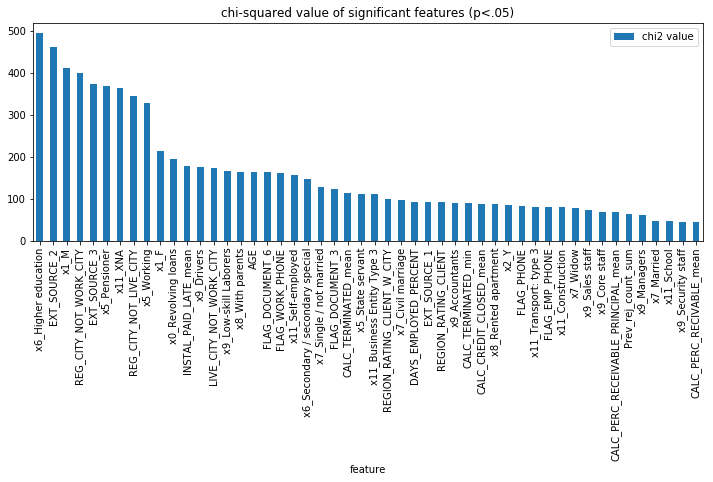

In [128]:
chi2_sig = chi2_all[chi2_all['p-value'] <= .05].sort_values('chi2 value', ascending=False)
print(len(chi2_sig))
chi2_plot = chi2_sig.head(50)
chi2_plot.plot.bar(x='feature', y='chi2 value', title='chi-squared value of significant features (p<.05)', figsize=(12,4))

## PCA Test

In [129]:
from sklearn import decomposition
from sklearn.decomposition import PCA
np.random.seed(42)
pca=decomposition.PCA()

Text(0, 0.5, 'explained_variance_')

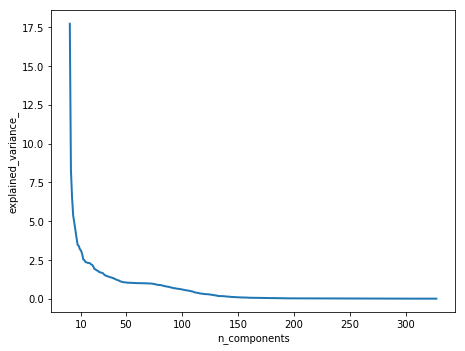

In [130]:
pca.fit(X_train_trans)
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.1, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.xticks([10,50,100,150,200,250,300])
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

The above plot shows that most of the variance in the data is explained with only the first 10 components.

In [131]:
df2_plot = pd.DataFrame(pca.fit_transform(X_train_trans))

Text(0, 0.5, 'Variances')

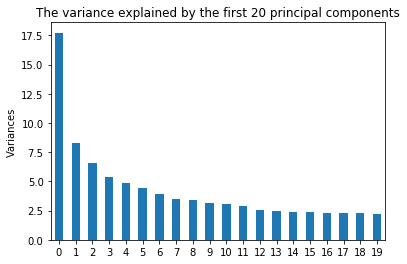

In [132]:
plt.title("The variance explained by the first 20 principal components")
df2_plot.iloc[:,:20].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

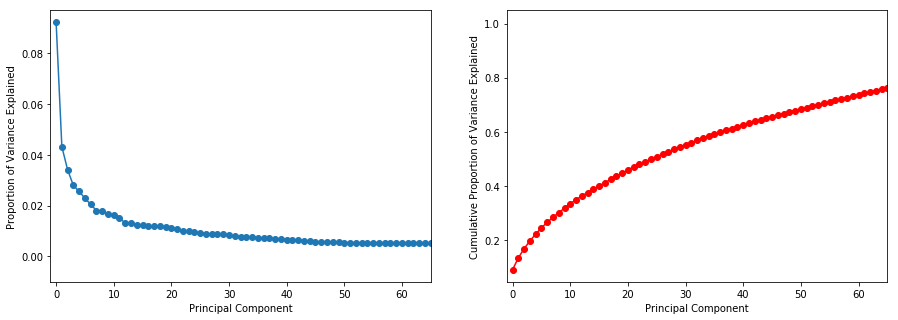

In [133]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)  

This Plot suggests that by use of 20 components we can get reasonable results.

In [134]:
from sklearn.pipeline import make_pipeline
import xgboost
from xgboost import XGBClassifier

pc_pipeline = make_pipeline(PCA(0.95), XGBClassifier(n_estimators=100))
pc_pipeline.fit(X_train_trans, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [ ]:
exp_name = f"PCA_XGboost_95_perc_var"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, pc_pipeline.predict(X_train_trans)), 
                accuracy_score(y_valid, pc_pipeline.predict(X_valid_trans)),
                accuracy_score(y_test, pc_pipeline.predict(X_test_trans)),
                roc_auc_score(y_train, pc_pipeline.predict_proba(X_train_trans)[:, 1]),
                roc_auc_score(y_valid, pc_pipeline.predict_proba(X_valid_trans)[:, 1]),
                roc_auc_score(y_test, pc_pipeline.predict_proba(X_test_trans)[:, 1])],
    4)) 
expLog

## Random Forest Feature Importances

In [136]:
%%time
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfc.fit(X_train_trans, y_train)

CPU times: user 4min, sys: 247 ms, total: 4min
Wall time: 4min


In [0]:
fi=pd.DataFrame(zip(X_feat.iloc[:,0].tolist(), rfc.feature_importances_), columns=['feature', 'importance'])

fi.sort_values('importance', ascending=False).head(10)

feature  importance
32                 EXT_SOURCE_2    0.193887
33                 EXT_SOURCE_3    0.187592
31                 EXT_SOURCE_1    0.055496
7         DAYS_EMPLOYED_PERCENT    0.049232
104  GOODS_PRICE_CREDIT_PERCENT    0.041366
103                         AGE    0.037833
213         x6_Higher education    0.024018
102                 CREDIT_TERM    0.023161
211                  x5_Working    0.017889
191                        x1_M    0.017658

In [0]:
def plot_feature_importances(df):
   
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

  
    fig = go.Figure(go.Bar(
           y=list(reversed(list(df['feature'][:30]))),
            x=list(reversed(list(df['importance_normalized'].head(30)))),
            orientation='h'))
    fig.update_layout(
    autosize=False,
    width=800,
    height=1000,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

    fig.show()
    return df


In [0]:
import plotly.graph_objects as go
fi_sorted = plot_feature_importances(fi)

We also tried RandomForestClassifier to calculate the feature importances. The higher the value the more important the feature. 
The results from RandomForestClassifier indicate that EXT_SOURCE_3, EXT_SOURCE_2, and EXT_SOURCE_1 alongwith Perc_Credit_util are the most important features for predicting the target. We used them in our data prep step.

## TopFeatureSelector to select important features

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# find the indices to the top ranking input features based on importance 
#    arr is an array of feature importances in order of the input data matrix X
#    k is the number of features to be selected
#
# Note: this feature selector assumes that you have already computed the feature importances 
# somehow (for example using SelectKBest or through a RandomForestRegressor decision tree ensemble). 
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    # select the columns of data matrix of the selected input features 
    def transform(self, X):
        return X[:, self.feature_indices_]

In [0]:
%%time
from xgboost import XGBClassifier

k=180
featureScores = rfc.feature_importances_
tf = TopFeatureSelector(featureScores, k)
tf.fit(X_train_trans)
#print(tf.feature_indices_)
#X_train[:,tf.feature_indices_]
#X_train_trans[:,tf.feature_indices_]
model_xg_feature=XGBClassifier(n_estimators=100)
model_xg_feature.fit(X_train_trans[:,tf.feature_indices_],y_train)

CPU times: user 1min 38s, sys: 996 ms, total: 1min 39s
Wall time: 1min 40s


In [0]:
X_train_trans.shape

In [0]:
X_train_trans[:,tf.feature_indices_].shape

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
exp_name = f"XGB_RF_FI_150_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_xg_feature.predict(X_train_trans[:,tf.feature_indices_])), 
                accuracy_score(y_valid, model_xg_feature.predict(X_valid_trans[:,tf.feature_indices_])),
                accuracy_score(y_test, model_xg_feature.predict(X_test_trans[:,tf.feature_indices_])),
                roc_auc_score(y_train, model_xg_feature.predict_proba(X_train_trans[:,tf.feature_indices_])[:, 1]),
                roc_auc_score(y_valid, model_xg_feature.predict_proba(X_valid_trans[:,tf.feature_indices_])[:, 1]),
                roc_auc_score(y_test, model_xg_feature.predict_proba(X_test_trans[:,tf.feature_indices_])[:, 1])],
    4)) 
expLog

## Pipeline for Feature selection and Estimator

In [0]:
k=150
featureScores = rfc.feature_importances_

feature_selection_estimator_pipeline = Pipeline([
        ('feature_selection', TopFeatureSelector(featureScores, k)),
        ('XGBoost', XGBClassifier(n_estimators=100, n_jobs=-1))
    ])
#print(preparation_and_feature_selection_pipeline)
feature_selection_estimator_pipeline.fit(X_train_trans, y_train) 

Pipeline(memory=None,
         steps=[('feature_selection',
                 TopFeatureSelector(feature_importances=array([9.68740843e-02, 0.00000000e+00, 0.00000000e+00, 3.16228891e-02,
       1.02446107e-01, 2.06180316e-02, 1.26877113e-02, 3.08896458e-02,
       1.08120943e-02, 1.93025681e-04, 2.91565272e-05, 3.82789646e-05,
       1.52098760e-04, 3.14885605e-04, 3.76018034e-03, 1.86380874e-03,
       1.25619151e-02,...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
    

In [0]:
k=150
featureScores = rfc.feature_importances_

feature_selection_estimator_pipeline = Pipeline([
        ('feature_selection', TopFeatureSelector(featureScores, k)),
        ('XGBoost', XGBClassifier(n_estimators=100, n_jobs=-1, eval_metric='auc'))
    ])
#print(preparation_and_feature_selection_pipeline)
feature_selection_estimator_pipeline.fit(X_train_trans, y_train)

Pipeline(memory=None,
         steps=[('feature_selection',
                 TopFeatureSelector(feature_importances=array([9.68740843e-02, 0.00000000e+00, 0.00000000e+00, 3.16228891e-02,
       1.02446107e-01, 2.06180316e-02, 1.26877113e-02, 3.08896458e-02,
       1.08120943e-02, 1.93025681e-04, 2.91565272e-05, 3.82789646e-05,
       1.52098760e-04, 3.14885605e-04, 3.76018034e-03, 1.86380874e-03,
       1.25619151e-02,...
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='auc', gamma=0,
                               learning_rate=0.1, max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [0]:
def pct(x):
    return round(100*x,3)

In [0]:
%%time 
np.random.seed(42)

k=150
featureScores = rfc.feature_importances_

feature_selection_estimator_pipeline = Pipeline([
        ('feature_selection', TopFeatureSelector(featureScores, k)),
        ("logistic", LogisticRegression())
    ])
#print(preparation_and_feature_selection_pipeline)
feature_selection_estimator_pipeline.fit(X_train_trans, y_train) 

In [0]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, feature_selection_estimator_pipeline.predict(X_train_trans)), 3)

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [0]:
exp_name = f"Baseline_150 important_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, feature_selection_estimator_pipeline.predict(X_train_trans)), 
                accuracy_score(y_valid, feature_selection_estimator_pipeline.predict(X_valid_trans)),
                accuracy_score(y_test, feature_selection_estimator_pipeline.predict(X_test_trans)),
                roc_auc_score(y_train, feature_selection_estimator_pipeline.predict_proba(X_train_trans)[:, 1]),
                roc_auc_score(y_valid, feature_selection_estimator_pipeline.predict_proba(X_valid_trans)[:, 1]),
                roc_auc_score(y_test, feature_selection_estimator_pipeline.predict_proba(X_test_trans)[:, 1])],
    4)) 
expLog

# Hyperparameter Tuning - Phase-1

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logistic__penalty':['l1','l2'], 
              'logistic__tol': (0.0001, 0.00001), 
              'logistic__C': [0.1, 1, 10]
             }

gs = GridSearchCV(full_pipeline_with_predictor, param_grid, cv=5,n_jobs=48) 

In [0]:
gs.fit(X_train, y_train)

In [0]:
gs.best_params_

In [0]:
from sklearn.metrics import roc_auc_score
exp_name = f"60_features_{gs.best_params_}"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gs.predict(X_train)), 
                accuracy_score(y_valid, gs.predict(X_valid)),
                accuracy_score(y_test, gs.predict(X_test)),
                roc_auc_score(y_train, gs.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gs.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1])],
    4)) 
expLog

# Model Comparision

In [137]:
X_full = pd.DataFrame(np.array(X_train_trans), columns=X_feat.iloc[:,0].tolist())

In [138]:
X_full['TARGET'] = y_train.values

In [139]:
X_full['TARGET'].value_counts()

0    204361
1     17815
Name: TARGET, dtype: int64

### Downsize by Random Sampling from Majority Class

In [141]:
from sklearn.utils import resample
df_majority = X_full[X_full.TARGET==0]
df_minority = X_full[X_full.TARGET==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=17815*3,     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [142]:
df_downsampled['TARGET'].value_counts()

0    53445
1    17815
Name: TARGET, dtype: int64

In [143]:
X_train_ds = df_downsampled.drop(['TARGET'], axis=1)
y_train_ds = df_downsampled["TARGET"]

In [144]:
print(y_train_ds.shape, X_train_ds.shape)

(71260,) (71260, 328)


In [145]:
type(y_train_ds)

pandas.core.series.Series

In [146]:
X_train_ds,X_test_ds, y_train_ds,y_test_ds= train_test_split(X_train_ds, y_train_ds, test_size=0.80, random_state=42)

In [150]:
X_train_ds.shape

(14252, 328)

In [0]:
# use 20% of the data
X_train_20,X_test_20, y_train_20,y_test_20= train_test_split(X_train_trans, y_train, test_size=0.80, random_state=42)
#X_valid_20,_, y_valid_20,_= train_test_split(X_valid_trans, y_valid, test_size=0.99, random_state=42)
#X_test_20,_, y_test_20,_= train_test_split(X_test_trans, y_test, test_size=0.99, random_state=42)

In [148]:
results_Model_com = pd.DataFrame(columns=["ExpID", "Cross fold train AUC", "Test AUC", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])


## Baseline Model  - Logistic Regression

In [151]:

from sklearn.model_selection import ShuffleSplit
np.random.seed(42)

logistic=LogisticRegression()
cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)
logit_scores_AUC = cross_val_score(logistic, X_train_ds, y_train_ds,cv=cv30Splits, scoring='roc_auc')
logit_score_AUC_train = logit_scores_AUC.mean()
logistic.fit(X_train_ds, y_train_ds)
logit_score_AUC_test = roc_auc_score(y_test_ds, logistic.predict(X_test_ds))


In [152]:
results_Model_com.loc[0] = ["Baseline", np.round(logit_score_AUC_train,4), np.round(logit_score_AUC_test,4), 
                  "---", "---", "---", "Untuned LogisticRegression"]
results_Model_com

ExpID  Cross fold train AUC  Test AUC p-value Train Time(s)  \
0  Baseline                0.7479    0.6097     ---           ---   

  Test Time(s)      Experiment description  
0          ---  Untuned LogisticRegression

## Significance test with Random search Hyperparameter tuning

In [0]:
# use 1% of the data
X_train_20,X_test_20, y_train_20,y_test_20= train_test_split(X_train_trans, y_train, test_size=0.99, random_state=42)

In [0]:
#scoring=AUC
# A Function to execute the Random search and record the results.
def ConductRandomSearch(X_train, y_train, X_test, y_test, k=150, i=0, prefix='', n_jobs=16,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('XGBClassifier',  XGBClassifier(n_estimators=100)),
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
        ('Support Vector', SVC(random_state=42)),
        ('Stochastic GD', SGDClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier()),
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'XGBClassifier': {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        },
        
        'GradientBoostingClassifier': {
            'learning_rate': [1, 0.1, 0.01],
            'n_estimators': [4, 8, 16],
            'max_depth': (5,10,15),
            'min_samples_split': (0.1, 0.4,1.0),
            'min_samples_leaf': (0.1,0.3,0.5),  
        },
        
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': [1, 2, 3, 4, 5],
            'C': [10, 1, 0.1, 0.01],
        },
                
        'Stochastic GD': {
            'loss': ('hinge', 'perceptron', 'log'),
            'penalty': ('l1', 'l2', 'elasticnet'),
            'tol': [0.0001, 0.00001, 0.0000001], 
            'alpha': [0.1, 0.01, 0.001, 0.0001], 
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22, 24],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False],
            'n_estimators':[80, 150, 200]},
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        featureScores = rfc.feature_importances_

        full_pipeline_with_predictor = Pipeline([
            ('feature_selection', TopFeatureSelector(featureScores, k)),
            ("predictor", classifier)
        ])
        
        # Execute the Random search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        rand_search = RandomizedSearchCV(full_pipeline_with_predictor, params,
                                   scoring='roc_auc', cv=3, verbose=1, n_jobs=n_jobs)
        rand_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = rand_search.best_score_

        # Best estimator fitting time
        start = time()
        rand_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_AUC = np.round(roc_auc_score(y_test, rand_search.best_estimator_.predict(X_test)),4)
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        # To calculate the best_train_accuracy use the pct() and mean() methods
        cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)

        best_train_scores = cross_val_score(rand_search.best_estimator_, X_train,y_train, cv=cv30Splits,scoring='roc_auc')
        
        best_train_AUC = np.round(best_train_scores.mean(),4)
    
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores_AUC, best_train_scores)
        
        # Collect the best parameters found by the random search
        print("Best Parameters:")
        best_parameters = rand_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        resultsAUC20.loc[i] = [prefix+name, best_train_AUC, best_test_AUC, round(p_value,4), train_time, test_time, json.dumps(param_dump)]

In [159]:
from time import time
from scipy import stats
import json

In [0]:
%%time
# This might take a while
if __name__ == "__main__":
    
    ConductRandomSearch(X_train_20, y_train_20, X_test_20, y_test_20, 150, 0, "Random Best Model:",  n_jobs=16,verbose=1)
    
    

In [0]:
resultsAUC20

From the RandomSearch of 1% of the data, we run 5 models and hyperparameter tunning. As the table shown above, XGBClassifier with parameters [colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6] has the best performance with train AUC 0.7325. With the p-value 0.0016, we can say the result from XGBClassifier is significantly different from the baseline LogisticRegression.

## Significance test with GridSearchCV Hyperparameter tuning

In [0]:
# use 15% of the data
X_train_20,X_test_20, y_train_20,y_test_20= train_test_split(X_train_trans, y_train, test_size=0.85, random_state=42)
#X_valid_20,_, y_valid_20,_= train_test_split(X_valid_trans, y_valid, test_size=0.99, random_state=42)
#X_test_20,_, y_test_20,_= train_test_split(X_test_trans, y_test, test_size=0.99, random_state=42)

In [0]:
results_Model_com = pd.DataFrame(columns=["ExpID", "Cross fold train AUC", "Test AUC", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])


In [157]:
#scoring=AUC
# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, k, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('CatBoost', CatBoostClassifier(iterations=1000,bootstrap_type='Bernoulli')),
        ('XGBClassifier',  XGBClassifier(n_estimators=100)),
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
        ('RandomForest', RandomForestClassifier()),
        
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'XGBClassifier': {
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 1.5,2.0],
        'subsample': [0.6,0.8, 1.0],
        'colsample_bytree': [0.6,0.8, 1.0],
        'max_depth': [2,3, 4]
        },
        
        'GradientBoostingClassifier': {
            'learning_rate': [1, 0.1, 0.01],
            'n_estimators': [4, 8, 16],
            'max_depth': (3, 5,10),
            'min_samples_split': (0.2, 0.4,0.6),
            'min_samples_leaf': (0.1,0.3,0.5),  
        },
      
        'RandomForest':  {
            'max_depth': [7, 9, 11],
            'max_features': [3, 5,7],
            'min_samples_split': [3,5, 10],
            'min_samples_leaf': [5, 10,15],
            'bootstrap': [False],
            'n_estimators':[60,80, 150]
        },
        'CatBoost': {
            'learning_rate': [0.03,0.05,0.07],
                              'depth':[5,7,9],
                              'l2_leaf_reg':[5,10,20,40,100],}
                              #'loss_function': ['Logloss', 'CrossEntropy']},
              
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        featureScores = rfc.feature_importances_

        full_pipeline_with_predictor = Pipeline([
            #('feature_selection', TopFeatureSelector(featureScores, k)),
            ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params,
                                   scoring='roc_auc', cv=3, verbose=1, n_jobs=n_jobs)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = np.round((grid_search.best_score_),4)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_AUC = np.round(roc_auc_score(y_test, grid_search.best_estimator_.predict(X_test)),4)
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        # To calculate the best_train_accuracy use the pct() and mean() methods
        cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)

        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train,y_train, cv=cv30Splits,scoring='roc_auc')
        
        best_train_AUC = np.round(best_train_scores.mean(),4)
    
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores_AUC, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results_Model_com.loc[i] = [prefix+name, best_train_AUC, best_test_AUC, round(p_value,4), train_time, test_time, json.dumps(param_dump)]

In [ ]:
%%time
# This might take a while
if __name__ == "__main__":
    
    ConductGridSearch(X_train_ds, y_train_ds, X_test_ds, y_test_ds, 150, 0, "Grid Best Model:",  n_jobs=-1,verbose=1)

****** START Grid Best Model: CatBoost *****
Parameters:
	depth: [5, 7, 9]
	l2_leaf_reg: [5, 10, 20, 40, 100]
	learning_rate: [0.03, 0.05, 0.07]
Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.6818942	total: 40.2ms	remaining: 40.2s
1:	learn: 0.6725837	total: 79.2ms	remaining: 39.5s
2:	learn: 0.6641310	total: 118ms	remaining: 39.3s
3:	learn: 0.6562344	total: 157ms	remaining: 39.1s
4:	learn: 0.6481828	total: 196ms	remaining: 39.1s
5:	learn: 0.6402390	total: 237ms	remaining: 39.3s
6:	learn: 0.6316086	total: 278ms	remaining: 39.5s
7:	learn: 0.6242989	total: 319ms	remaining: 39.5s
8:	learn: 0.6175369	total: 358ms	remaining: 39.5s
9:	learn: 0.6104296	total: 398ms	remaining: 39.4s
10:	learn: 0.6038165	total: 437ms	remaining: 39.3s
11:	learn: 0.5983884	total: 477ms	remaining: 39.3s
12:	learn: 0.5923871	total: 517ms	remaining: 39.2s
13:	learn: 0.5877598	total: 556ms	remaining: 39.2s
14:	learn: 0.5827843	total: 596ms	remaining: 39.2s
15:	learn: 0.5788212	total: 636ms	remaining: 39.1s
16:	learn: 0.5745949	total: 675ms	remaining: 39.1s
17:	learn: 0.5703069	total: 716ms	remaining: 39.1s
18:	learn: 0.5666413	total: 756ms	remaining: 39s
19:	learn: 0.5627440	total: 797ms	remaini

165:	learn: 0.4645022	total: 6.6s	remaining: 33.2s
166:	learn: 0.4643375	total: 6.64s	remaining: 33.1s
167:	learn: 0.4641128	total: 6.68s	remaining: 33.1s
168:	learn: 0.4639213	total: 6.72s	remaining: 33s
169:	learn: 0.4637502	total: 6.76s	remaining: 33s
170:	learn: 0.4635953	total: 6.8s	remaining: 33s
171:	learn: 0.4634277	total: 6.84s	remaining: 32.9s
172:	learn: 0.4631842	total: 6.88s	remaining: 32.9s
173:	learn: 0.4630242	total: 6.92s	remaining: 32.8s
174:	learn: 0.4628070	total: 6.96s	remaining: 32.8s
175:	learn: 0.4626778	total: 7s	remaining: 32.8s
176:	learn: 0.4625384	total: 7.04s	remaining: 32.7s
177:	learn: 0.4623627	total: 7.08s	remaining: 32.7s
178:	learn: 0.4621845	total: 7.12s	remaining: 32.6s
179:	learn: 0.4620709	total: 7.15s	remaining: 32.6s
180:	learn: 0.4619026	total: 7.19s	remaining: 32.6s
181:	learn: 0.4617055	total: 7.23s	remaining: 32.5s
182:	learn: 0.4615208	total: 7.27s	remaining: 32.5s
183:	learn: 0.4613132	total: 7.31s	remaining: 32.4s
184:	learn: 0.4611465	t

327:	learn: 0.4395720	total: 13s	remaining: 26.6s
328:	learn: 0.4394451	total: 13s	remaining: 26.6s
329:	learn: 0.4393265	total: 13.1s	remaining: 26.5s
330:	learn: 0.4391245	total: 13.1s	remaining: 26.5s
331:	learn: 0.4389750	total: 13.1s	remaining: 26.4s
332:	learn: 0.4388728	total: 13.2s	remaining: 26.4s
333:	learn: 0.4387324	total: 13.2s	remaining: 26.4s
334:	learn: 0.4385912	total: 13.3s	remaining: 26.3s
335:	learn: 0.4384369	total: 13.3s	remaining: 26.3s
336:	learn: 0.4383610	total: 13.3s	remaining: 26.2s
337:	learn: 0.4381241	total: 13.4s	remaining: 26.2s
338:	learn: 0.4380404	total: 13.4s	remaining: 26.2s
339:	learn: 0.4379117	total: 13.5s	remaining: 26.1s
340:	learn: 0.4377808	total: 13.5s	remaining: 26.1s
341:	learn: 0.4375847	total: 13.5s	remaining: 26s
342:	learn: 0.4374176	total: 13.6s	remaining: 26s
343:	learn: 0.4372110	total: 13.6s	remaining: 26s
344:	learn: 0.4370182	total: 13.6s	remaining: 25.9s
345:	learn: 0.4368958	total: 13.7s	remaining: 25.9s
346:	learn: 0.4367866	

489:	learn: 0.4140163	total: 19.4s	remaining: 20.2s
490:	learn: 0.4138454	total: 19.4s	remaining: 20.1s
491:	learn: 0.4136889	total: 19.5s	remaining: 20.1s
492:	learn: 0.4134816	total: 19.5s	remaining: 20s
493:	learn: 0.4133085	total: 19.5s	remaining: 20s
494:	learn: 0.4132185	total: 19.6s	remaining: 20s
495:	learn: 0.4130503	total: 19.6s	remaining: 19.9s
496:	learn: 0.4129127	total: 19.6s	remaining: 19.9s
497:	learn: 0.4127850	total: 19.7s	remaining: 19.8s
498:	learn: 0.4125317	total: 19.7s	remaining: 19.8s
499:	learn: 0.4123311	total: 19.8s	remaining: 19.8s
500:	learn: 0.4122327	total: 19.8s	remaining: 19.7s
501:	learn: 0.4120288	total: 19.9s	remaining: 19.7s
502:	learn: 0.4118578	total: 19.9s	remaining: 19.6s
503:	learn: 0.4116940	total: 19.9s	remaining: 19.6s
504:	learn: 0.4115381	total: 20s	remaining: 19.6s
505:	learn: 0.4114055	total: 20s	remaining: 19.5s
506:	learn: 0.4112539	total: 20s	remaining: 19.5s
507:	learn: 0.4111127	total: 20.1s	remaining: 19.5s
508:	learn: 0.4109348	to

649:	learn: 0.3906094	total: 25.7s	remaining: 13.8s
650:	learn: 0.3904901	total: 25.7s	remaining: 13.8s
651:	learn: 0.3903324	total: 25.8s	remaining: 13.8s
652:	learn: 0.3901864	total: 25.8s	remaining: 13.7s
653:	learn: 0.3901082	total: 25.9s	remaining: 13.7s
654:	learn: 0.3899909	total: 25.9s	remaining: 13.6s
655:	learn: 0.3898940	total: 25.9s	remaining: 13.6s
656:	learn: 0.3897677	total: 26s	remaining: 13.6s
657:	learn: 0.3896542	total: 26s	remaining: 13.5s
658:	learn: 0.3894874	total: 26.1s	remaining: 13.5s
659:	learn: 0.3893844	total: 26.1s	remaining: 13.4s
660:	learn: 0.3892178	total: 26.1s	remaining: 13.4s
661:	learn: 0.3890864	total: 26.2s	remaining: 13.4s
662:	learn: 0.3889586	total: 26.2s	remaining: 13.3s
663:	learn: 0.3888373	total: 26.3s	remaining: 13.3s
664:	learn: 0.3887158	total: 26.3s	remaining: 13.2s
665:	learn: 0.3885592	total: 26.3s	remaining: 13.2s
666:	learn: 0.3884373	total: 26.4s	remaining: 13.2s
667:	learn: 0.3882756	total: 26.4s	remaining: 13.1s
668:	learn: 0.38

810:	learn: 0.3700855	total: 32.1s	remaining: 7.47s
811:	learn: 0.3699416	total: 32.1s	remaining: 7.43s
812:	learn: 0.3698246	total: 32.1s	remaining: 7.39s
813:	learn: 0.3696635	total: 32.2s	remaining: 7.35s
814:	learn: 0.3695682	total: 32.2s	remaining: 7.31s
815:	learn: 0.3694930	total: 32.2s	remaining: 7.27s
816:	learn: 0.3693735	total: 32.3s	remaining: 7.23s
817:	learn: 0.3692354	total: 32.3s	remaining: 7.19s
818:	learn: 0.3690776	total: 32.4s	remaining: 7.15s
819:	learn: 0.3689407	total: 32.4s	remaining: 7.11s
820:	learn: 0.3688349	total: 32.4s	remaining: 7.07s
821:	learn: 0.3687229	total: 32.5s	remaining: 7.03s
822:	learn: 0.3685381	total: 32.5s	remaining: 7s
823:	learn: 0.3684215	total: 32.6s	remaining: 6.96s
824:	learn: 0.3682961	total: 32.6s	remaining: 6.92s
825:	learn: 0.3681587	total: 32.6s	remaining: 6.88s
826:	learn: 0.3680197	total: 32.7s	remaining: 6.84s
827:	learn: 0.3679336	total: 32.7s	remaining: 6.8s
828:	learn: 0.3678090	total: 32.8s	remaining: 6.76s
829:	learn: 0.36

971:	learn: 0.3516579	total: 38.4s	remaining: 1.11s
972:	learn: 0.3515877	total: 38.5s	remaining: 1.07s
973:	learn: 0.3514866	total: 38.5s	remaining: 1.03s
974:	learn: 0.3513543	total: 38.5s	remaining: 988ms
975:	learn: 0.3512429	total: 38.6s	remaining: 949ms
976:	learn: 0.3510754	total: 38.6s	remaining: 909ms
977:	learn: 0.3509520	total: 38.7s	remaining: 869ms
978:	learn: 0.3508743	total: 38.7s	remaining: 830ms
979:	learn: 0.3507456	total: 38.7s	remaining: 790ms
980:	learn: 0.3506875	total: 38.8s	remaining: 751ms
981:	learn: 0.3506377	total: 38.8s	remaining: 711ms
982:	learn: 0.3505168	total: 38.8s	remaining: 672ms
983:	learn: 0.3503647	total: 38.9s	remaining: 632ms
984:	learn: 0.3502629	total: 38.9s	remaining: 593ms
985:	learn: 0.3500977	total: 39s	remaining: 553ms
986:	learn: 0.3499802	total: 39s	remaining: 514ms
987:	learn: 0.3499322	total: 39s	remaining: 474ms
988:	learn: 0.3498173	total: 39.1s	remaining: 435ms
989:	learn: 0.3496683	total: 39.1s	remaining: 395ms
990:	learn: 0.3495

136:	learn: 0.4706640	total: 5.45s	remaining: 34.3s
137:	learn: 0.4704565	total: 5.49s	remaining: 34.3s
138:	learn: 0.4701986	total: 5.53s	remaining: 34.3s
139:	learn: 0.4700168	total: 5.57s	remaining: 34.2s
140:	learn: 0.4697704	total: 5.61s	remaining: 34.2s
141:	learn: 0.4695006	total: 5.65s	remaining: 34.1s
142:	learn: 0.4692698	total: 5.69s	remaining: 34.1s
143:	learn: 0.4691116	total: 5.73s	remaining: 34.1s
144:	learn: 0.4688610	total: 5.77s	remaining: 34s
145:	learn: 0.4687445	total: 5.81s	remaining: 34s
146:	learn: 0.4685020	total: 5.85s	remaining: 33.9s
147:	learn: 0.4682964	total: 5.89s	remaining: 33.9s
148:	learn: 0.4680932	total: 5.93s	remaining: 33.9s
149:	learn: 0.4677763	total: 5.97s	remaining: 33.8s
150:	learn: 0.4675736	total: 6.01s	remaining: 33.8s
151:	learn: 0.4673329	total: 6.05s	remaining: 33.7s
152:	learn: 0.4672061	total: 6.09s	remaining: 33.7s
153:	learn: 0.4671220	total: 6.13s	remaining: 33.6s
154:	learn: 0.4669233	total: 6.16s	remaining: 33.6s
155:	learn: 0.46

297:	learn: 0.4440195	total: 11.8s	remaining: 27.8s
298:	learn: 0.4438938	total: 11.8s	remaining: 27.7s
299:	learn: 0.4437462	total: 11.9s	remaining: 27.7s
300:	learn: 0.4436026	total: 11.9s	remaining: 27.7s
301:	learn: 0.4435318	total: 11.9s	remaining: 27.6s
302:	learn: 0.4433961	total: 12s	remaining: 27.6s
303:	learn: 0.4432004	total: 12s	remaining: 27.5s
304:	learn: 0.4430555	total: 12.1s	remaining: 27.5s
305:	learn: 0.4429549	total: 12.1s	remaining: 27.5s
306:	learn: 0.4428227	total: 12.1s	remaining: 27.4s
307:	learn: 0.4427281	total: 12.2s	remaining: 27.4s
308:	learn: 0.4426124	total: 12.2s	remaining: 27.3s
309:	learn: 0.4423885	total: 12.3s	remaining: 27.3s
310:	learn: 0.4422128	total: 12.3s	remaining: 27.3s
311:	learn: 0.4421083	total: 12.3s	remaining: 27.2s
312:	learn: 0.4419986	total: 12.4s	remaining: 27.2s
313:	learn: 0.4418093	total: 12.4s	remaining: 27.1s
314:	learn: 0.4416721	total: 12.5s	remaining: 27.1s
315:	learn: 0.4414730	total: 12.5s	remaining: 27.1s
316:	learn: 0.44

459:	learn: 0.4178595	total: 18.2s	remaining: 21.3s
460:	learn: 0.4177356	total: 18.2s	remaining: 21.3s
461:	learn: 0.4175704	total: 18.2s	remaining: 21.3s
462:	learn: 0.4174378	total: 18.3s	remaining: 21.2s
463:	learn: 0.4171659	total: 18.3s	remaining: 21.2s
464:	learn: 0.4170443	total: 18.4s	remaining: 21.1s
465:	learn: 0.4169604	total: 18.4s	remaining: 21.1s
466:	learn: 0.4167513	total: 18.4s	remaining: 21.1s
467:	learn: 0.4165919	total: 18.5s	remaining: 21s
468:	learn: 0.4164035	total: 18.5s	remaining: 21s
469:	learn: 0.4163645	total: 18.6s	remaining: 20.9s
470:	learn: 0.4162041	total: 18.6s	remaining: 20.9s
471:	learn: 0.4160897	total: 18.6s	remaining: 20.9s
472:	learn: 0.4158276	total: 18.7s	remaining: 20.8s
473:	learn: 0.4156843	total: 18.7s	remaining: 20.8s
474:	learn: 0.4154582	total: 18.8s	remaining: 20.7s
475:	learn: 0.4153322	total: 18.8s	remaining: 20.7s
476:	learn: 0.4151838	total: 18.8s	remaining: 20.7s
477:	learn: 0.4150885	total: 18.9s	remaining: 20.6s
478:	learn: 0.41

619:	learn: 0.3954609	total: 24.5s	remaining: 15s
620:	learn: 0.3953181	total: 24.5s	remaining: 15s
621:	learn: 0.3951904	total: 24.6s	remaining: 14.9s
622:	learn: 0.3950920	total: 24.6s	remaining: 14.9s
623:	learn: 0.3950377	total: 24.6s	remaining: 14.8s
624:	learn: 0.3949056	total: 24.7s	remaining: 14.8s
625:	learn: 0.3947868	total: 24.7s	remaining: 14.8s
626:	learn: 0.3946756	total: 24.8s	remaining: 14.7s
627:	learn: 0.3945290	total: 24.8s	remaining: 14.7s
628:	learn: 0.3944252	total: 24.8s	remaining: 14.6s
629:	learn: 0.3942188	total: 24.9s	remaining: 14.6s
630:	learn: 0.3941649	total: 24.9s	remaining: 14.6s
631:	learn: 0.3940527	total: 24.9s	remaining: 14.5s
632:	learn: 0.3939330	total: 25s	remaining: 14.5s
633:	learn: 0.3937503	total: 25s	remaining: 14.4s
634:	learn: 0.3936029	total: 25.1s	remaining: 14.4s
635:	learn: 0.3934914	total: 25.1s	remaining: 14.4s
636:	learn: 0.3933523	total: 25.1s	remaining: 14.3s
637:	learn: 0.3932755	total: 25.2s	remaining: 14.3s
638:	learn: 0.393171

781:	learn: 0.3753638	total: 31s	remaining: 8.64s
782:	learn: 0.3752676	total: 31s	remaining: 8.6s
783:	learn: 0.3751428	total: 31.1s	remaining: 8.56s
784:	learn: 0.3750677	total: 31.1s	remaining: 8.52s
785:	learn: 0.3749182	total: 31.2s	remaining: 8.48s
786:	learn: 0.3748217	total: 31.2s	remaining: 8.44s
787:	learn: 0.3746871	total: 31.2s	remaining: 8.4s
788:	learn: 0.3745313	total: 31.3s	remaining: 8.36s
789:	learn: 0.3743790	total: 31.3s	remaining: 8.32s
790:	learn: 0.3743331	total: 31.4s	remaining: 8.29s
791:	learn: 0.3741726	total: 31.4s	remaining: 8.24s
792:	learn: 0.3740649	total: 31.4s	remaining: 8.21s
793:	learn: 0.3739956	total: 31.5s	remaining: 8.17s
794:	learn: 0.3739110	total: 31.5s	remaining: 8.13s
795:	learn: 0.3737844	total: 31.6s	remaining: 8.09s
796:	learn: 0.3737301	total: 31.6s	remaining: 8.05s
797:	learn: 0.3735797	total: 31.6s	remaining: 8.01s
798:	learn: 0.3734628	total: 31.7s	remaining: 7.97s
799:	learn: 0.3734281	total: 31.7s	remaining: 7.93s
800:	learn: 0.3732

945:	learn: 0.3565057	total: 37.5s	remaining: 2.14s
946:	learn: 0.3564354	total: 37.5s	remaining: 2.1s
947:	learn: 0.3562886	total: 37.6s	remaining: 2.06s
948:	learn: 0.3561873	total: 37.6s	remaining: 2.02s
949:	learn: 0.3559987	total: 37.6s	remaining: 1.98s
950:	learn: 0.3559260	total: 37.7s	remaining: 1.94s
951:	learn: 0.3557914	total: 37.7s	remaining: 1.9s
952:	learn: 0.3557244	total: 37.8s	remaining: 1.86s
953:	learn: 0.3555982	total: 37.8s	remaining: 1.82s
954:	learn: 0.3554973	total: 37.8s	remaining: 1.78s
955:	learn: 0.3553519	total: 37.9s	remaining: 1.74s
956:	learn: 0.3552335	total: 37.9s	remaining: 1.7s
957:	learn: 0.3551143	total: 38s	remaining: 1.66s
958:	learn: 0.3550109	total: 38s	remaining: 1.62s
959:	learn: 0.3549282	total: 38s	remaining: 1.58s
960:	learn: 0.3548533	total: 38.1s	remaining: 1.54s
961:	learn: 0.3546989	total: 38.1s	remaining: 1.5s
962:	learn: 0.3545634	total: 38.1s	remaining: 1.47s
963:	learn: 0.3544868	total: 38.2s	remaining: 1.43s
964:	learn: 0.3543734	

110:	learn: 0.4750194	total: 4.43s	remaining: 35.5s
111:	learn: 0.4746457	total: 4.47s	remaining: 35.5s
112:	learn: 0.4743718	total: 4.51s	remaining: 35.4s
113:	learn: 0.4741199	total: 4.55s	remaining: 35.4s
114:	learn: 0.4737834	total: 4.59s	remaining: 35.3s
115:	learn: 0.4733950	total: 4.63s	remaining: 35.3s
116:	learn: 0.4732700	total: 4.67s	remaining: 35.3s
117:	learn: 0.4730741	total: 4.71s	remaining: 35.2s
118:	learn: 0.4727929	total: 4.75s	remaining: 35.2s
119:	learn: 0.4725564	total: 4.79s	remaining: 35.1s
120:	learn: 0.4722315	total: 4.83s	remaining: 35.1s
121:	learn: 0.4720753	total: 4.87s	remaining: 35.1s
122:	learn: 0.4717403	total: 4.91s	remaining: 35s
123:	learn: 0.4714416	total: 4.95s	remaining: 35s
124:	learn: 0.4712676	total: 4.99s	remaining: 34.9s
125:	learn: 0.4710379	total: 5.03s	remaining: 34.9s
126:	learn: 0.4708383	total: 5.07s	remaining: 34.8s
127:	learn: 0.4705490	total: 5.11s	remaining: 34.8s
128:	learn: 0.4701763	total: 5.15s	remaining: 34.8s
129:	learn: 0.46

272:	learn: 0.4442572	total: 10.8s	remaining: 28.9s
273:	learn: 0.4441366	total: 10.9s	remaining: 28.8s
274:	learn: 0.4439971	total: 10.9s	remaining: 28.8s
275:	learn: 0.4438275	total: 11s	remaining: 28.8s
276:	learn: 0.4436967	total: 11s	remaining: 28.7s
277:	learn: 0.4435992	total: 11s	remaining: 28.7s
278:	learn: 0.4434808	total: 11.1s	remaining: 28.6s
279:	learn: 0.4433514	total: 11.1s	remaining: 28.6s
280:	learn: 0.4431976	total: 11.2s	remaining: 28.6s
281:	learn: 0.4430512	total: 11.2s	remaining: 28.5s
282:	learn: 0.4428525	total: 11.2s	remaining: 28.5s
283:	learn: 0.4427147	total: 11.3s	remaining: 28.4s
284:	learn: 0.4425300	total: 11.3s	remaining: 28.4s
285:	learn: 0.4424308	total: 11.4s	remaining: 28.3s
286:	learn: 0.4423214	total: 11.4s	remaining: 28.3s
287:	learn: 0.4421478	total: 11.4s	remaining: 28.3s
288:	learn: 0.4419746	total: 11.5s	remaining: 28.2s
289:	learn: 0.4418121	total: 11.5s	remaining: 28.2s
290:	learn: 0.4416746	total: 11.6s	remaining: 28.1s
291:	learn: 0.4415

433:	learn: 0.4177158	total: 17.2s	remaining: 22.4s
434:	learn: 0.4175231	total: 17.2s	remaining: 22.4s
435:	learn: 0.4173952	total: 17.3s	remaining: 22.3s
436:	learn: 0.4172669	total: 17.3s	remaining: 22.3s
437:	learn: 0.4170925	total: 17.4s	remaining: 22.3s
438:	learn: 0.4168843	total: 17.4s	remaining: 22.2s
439:	learn: 0.4167041	total: 17.4s	remaining: 22.2s
440:	learn: 0.4165680	total: 17.5s	remaining: 22.1s
441:	learn: 0.4164510	total: 17.5s	remaining: 22.1s
442:	learn: 0.4163380	total: 17.6s	remaining: 22.1s
443:	learn: 0.4161884	total: 17.6s	remaining: 22s
444:	learn: 0.4160697	total: 17.6s	remaining: 22s
445:	learn: 0.4158598	total: 17.7s	remaining: 22s
446:	learn: 0.4156832	total: 17.7s	remaining: 21.9s
447:	learn: 0.4155073	total: 17.8s	remaining: 21.9s
448:	learn: 0.4153447	total: 17.8s	remaining: 21.8s
449:	learn: 0.4152204	total: 17.8s	remaining: 21.8s
450:	learn: 0.4150480	total: 17.9s	remaining: 21.7s
451:	learn: 0.4149254	total: 17.9s	remaining: 21.7s
452:	learn: 0.4147

594:	learn: 0.3946400	total: 23.5s	remaining: 16s
595:	learn: 0.3945000	total: 23.6s	remaining: 16s
596:	learn: 0.3943518	total: 23.6s	remaining: 15.9s
597:	learn: 0.3942488	total: 23.7s	remaining: 15.9s
598:	learn: 0.3941541	total: 23.7s	remaining: 15.9s
599:	learn: 0.3940286	total: 23.7s	remaining: 15.8s
600:	learn: 0.3938981	total: 23.8s	remaining: 15.8s
601:	learn: 0.3938571	total: 23.8s	remaining: 15.7s
602:	learn: 0.3936838	total: 23.9s	remaining: 15.7s
603:	learn: 0.3935977	total: 23.9s	remaining: 15.7s
604:	learn: 0.3934421	total: 23.9s	remaining: 15.6s
605:	learn: 0.3933081	total: 24s	remaining: 15.6s
606:	learn: 0.3931981	total: 24s	remaining: 15.6s
607:	learn: 0.3930757	total: 24.1s	remaining: 15.5s
608:	learn: 0.3929485	total: 24.1s	remaining: 15.5s
609:	learn: 0.3928240	total: 24.1s	remaining: 15.4s
610:	learn: 0.3926662	total: 24.2s	remaining: 15.4s
611:	learn: 0.3925043	total: 24.2s	remaining: 15.4s
612:	learn: 0.3923796	total: 24.3s	remaining: 15.3s
613:	learn: 0.392192

755:	learn: 0.3742821	total: 29.9s	remaining: 9.65s
756:	learn: 0.3741963	total: 30s	remaining: 9.61s
757:	learn: 0.3740504	total: 30s	remaining: 9.57s
758:	learn: 0.3739493	total: 30s	remaining: 9.54s
759:	learn: 0.3738164	total: 30.1s	remaining: 9.5s
760:	learn: 0.3736774	total: 30.1s	remaining: 9.46s
761:	learn: 0.3735594	total: 30.1s	remaining: 9.42s
762:	learn: 0.3734933	total: 30.2s	remaining: 9.38s
763:	learn: 0.3733481	total: 30.2s	remaining: 9.34s
764:	learn: 0.3732249	total: 30.3s	remaining: 9.3s
765:	learn: 0.3730269	total: 30.3s	remaining: 9.26s
766:	learn: 0.3728492	total: 30.3s	remaining: 9.22s
767:	learn: 0.3727572	total: 30.4s	remaining: 9.18s
768:	learn: 0.3726008	total: 30.4s	remaining: 9.14s
769:	learn: 0.3724618	total: 30.5s	remaining: 9.1s
770:	learn: 0.3723282	total: 30.5s	remaining: 9.06s
771:	learn: 0.3722052	total: 30.5s	remaining: 9.02s
772:	learn: 0.3720929	total: 30.6s	remaining: 8.98s
773:	learn: 0.3719030	total: 30.6s	remaining: 8.94s
774:	learn: 0.3718036

917:	learn: 0.3551367	total: 36.3s	remaining: 3.24s
918:	learn: 0.3549754	total: 36.3s	remaining: 3.2s
919:	learn: 0.3548263	total: 36.4s	remaining: 3.16s
920:	learn: 0.3547058	total: 36.4s	remaining: 3.12s
921:	learn: 0.3545898	total: 36.5s	remaining: 3.08s
922:	learn: 0.3544505	total: 36.5s	remaining: 3.04s
923:	learn: 0.3542643	total: 36.5s	remaining: 3s
924:	learn: 0.3542013	total: 36.6s	remaining: 2.97s
925:	learn: 0.3541110	total: 36.6s	remaining: 2.93s
926:	learn: 0.3539637	total: 36.7s	remaining: 2.89s
927:	learn: 0.3537840	total: 36.7s	remaining: 2.85s
928:	learn: 0.3537380	total: 36.7s	remaining: 2.81s
929:	learn: 0.3536180	total: 36.8s	remaining: 2.77s
930:	learn: 0.3535184	total: 36.8s	remaining: 2.73s
931:	learn: 0.3534490	total: 36.9s	remaining: 2.69s
932:	learn: 0.3533014	total: 36.9s	remaining: 2.65s
933:	learn: 0.3531992	total: 36.9s	remaining: 2.61s
934:	learn: 0.3530769	total: 37s	remaining: 2.57s
935:	learn: 0.3529534	total: 37s	remaining: 2.53s
936:	learn: 0.352824

81:	learn: 0.4714411	total: 3.26s	remaining: 36.5s
82:	learn: 0.4708556	total: 3.3s	remaining: 36.5s
83:	learn: 0.4704256	total: 3.34s	remaining: 36.5s
84:	learn: 0.4700769	total: 3.38s	remaining: 36.4s
85:	learn: 0.4696718	total: 3.42s	remaining: 36.4s
86:	learn: 0.4690844	total: 3.46s	remaining: 36.3s
87:	learn: 0.4687367	total: 3.5s	remaining: 36.3s
88:	learn: 0.4681838	total: 3.54s	remaining: 36.3s
89:	learn: 0.4677561	total: 3.58s	remaining: 36.2s
90:	learn: 0.4673203	total: 3.62s	remaining: 36.2s
91:	learn: 0.4670260	total: 3.66s	remaining: 36.2s
92:	learn: 0.4667587	total: 3.7s	remaining: 36.1s
93:	learn: 0.4663190	total: 3.74s	remaining: 36.1s
94:	learn: 0.4659439	total: 3.78s	remaining: 36s
95:	learn: 0.4657588	total: 3.82s	remaining: 36s
96:	learn: 0.4654907	total: 3.86s	remaining: 35.9s
97:	learn: 0.4651849	total: 3.9s	remaining: 35.9s
98:	learn: 0.4648839	total: 3.94s	remaining: 35.8s
99:	learn: 0.4646590	total: 3.98s	remaining: 35.8s
100:	learn: 0.4643513	total: 4.02s	rema

242:	learn: 0.4268282	total: 9.62s	remaining: 30s
243:	learn: 0.4265035	total: 9.66s	remaining: 29.9s
244:	learn: 0.4262941	total: 9.7s	remaining: 29.9s
245:	learn: 0.4260850	total: 9.74s	remaining: 29.9s
246:	learn: 0.4257372	total: 9.78s	remaining: 29.8s
247:	learn: 0.4253966	total: 9.82s	remaining: 29.8s
248:	learn: 0.4251264	total: 9.86s	remaining: 29.7s
249:	learn: 0.4248760	total: 9.9s	remaining: 29.7s
250:	learn: 0.4246030	total: 9.94s	remaining: 29.7s
251:	learn: 0.4243688	total: 9.97s	remaining: 29.6s
252:	learn: 0.4240514	total: 10s	remaining: 29.6s
253:	learn: 0.4236887	total: 10.1s	remaining: 29.5s
254:	learn: 0.4233438	total: 10.1s	remaining: 29.5s
255:	learn: 0.4230905	total: 10.1s	remaining: 29.5s
256:	learn: 0.4228854	total: 10.2s	remaining: 29.4s
257:	learn: 0.4226800	total: 10.2s	remaining: 29.4s
258:	learn: 0.4223739	total: 10.3s	remaining: 29.3s
259:	learn: 0.4220187	total: 10.3s	remaining: 29.3s
260:	learn: 0.4217216	total: 10.3s	remaining: 29.3s
261:	learn: 0.4215

404:	learn: 0.3885383	total: 16s	remaining: 23.5s
405:	learn: 0.3883269	total: 16.1s	remaining: 23.5s
406:	learn: 0.3881406	total: 16.1s	remaining: 23.5s
407:	learn: 0.3879287	total: 16.1s	remaining: 23.4s
408:	learn: 0.3878000	total: 16.2s	remaining: 23.4s
409:	learn: 0.3875882	total: 16.2s	remaining: 23.3s
410:	learn: 0.3873199	total: 16.3s	remaining: 23.3s
411:	learn: 0.3871702	total: 16.3s	remaining: 23.3s
412:	learn: 0.3870254	total: 16.3s	remaining: 23.2s
413:	learn: 0.3867711	total: 16.4s	remaining: 23.2s
414:	learn: 0.3864926	total: 16.4s	remaining: 23.1s
415:	learn: 0.3863560	total: 16.5s	remaining: 23.1s
416:	learn: 0.3861630	total: 16.5s	remaining: 23.1s
417:	learn: 0.3859869	total: 16.5s	remaining: 23s
418:	learn: 0.3856588	total: 16.6s	remaining: 23s
419:	learn: 0.3854817	total: 16.6s	remaining: 22.9s
420:	learn: 0.3853124	total: 16.7s	remaining: 22.9s
421:	learn: 0.3851000	total: 16.7s	remaining: 22.9s
422:	learn: 0.3849436	total: 16.7s	remaining: 22.8s
423:	learn: 0.3846

568:	learn: 0.3573617	total: 22.5s	remaining: 17s
569:	learn: 0.3571073	total: 22.5s	remaining: 17s
570:	learn: 0.3569977	total: 22.6s	remaining: 17s
571:	learn: 0.3568137	total: 22.6s	remaining: 16.9s
572:	learn: 0.3566683	total: 22.7s	remaining: 16.9s
573:	learn: 0.3564984	total: 22.7s	remaining: 16.8s
574:	learn: 0.3562974	total: 22.7s	remaining: 16.8s
575:	learn: 0.3561644	total: 22.8s	remaining: 16.8s
576:	learn: 0.3559282	total: 22.8s	remaining: 16.7s
577:	learn: 0.3557729	total: 22.9s	remaining: 16.7s
578:	learn: 0.3555544	total: 22.9s	remaining: 16.6s
579:	learn: 0.3554289	total: 22.9s	remaining: 16.6s
580:	learn: 0.3552746	total: 23s	remaining: 16.6s
581:	learn: 0.3550505	total: 23s	remaining: 16.5s
582:	learn: 0.3547668	total: 23.1s	remaining: 16.5s
583:	learn: 0.3545945	total: 23.1s	remaining: 16.4s
584:	learn: 0.3544082	total: 23.1s	remaining: 16.4s
585:	learn: 0.3542086	total: 23.2s	remaining: 16.4s
586:	learn: 0.3540020	total: 23.2s	remaining: 16.3s
587:	learn: 0.3537624	

729:	learn: 0.3285889	total: 28.9s	remaining: 10.7s
730:	learn: 0.3283992	total: 28.9s	remaining: 10.6s
731:	learn: 0.3282755	total: 29s	remaining: 10.6s
732:	learn: 0.3280791	total: 29s	remaining: 10.6s
733:	learn: 0.3278805	total: 29s	remaining: 10.5s
734:	learn: 0.3277252	total: 29.1s	remaining: 10.5s
735:	learn: 0.3275562	total: 29.1s	remaining: 10.4s
736:	learn: 0.3273994	total: 29.1s	remaining: 10.4s
737:	learn: 0.3272156	total: 29.2s	remaining: 10.4s
738:	learn: 0.3270430	total: 29.2s	remaining: 10.3s
739:	learn: 0.3268224	total: 29.3s	remaining: 10.3s
740:	learn: 0.3266448	total: 29.3s	remaining: 10.2s
741:	learn: 0.3264832	total: 29.3s	remaining: 10.2s
742:	learn: 0.3264720	total: 29.4s	remaining: 10.2s
743:	learn: 0.3262759	total: 29.4s	remaining: 10.1s
744:	learn: 0.3261395	total: 29.5s	remaining: 10.1s
745:	learn: 0.3260094	total: 29.5s	remaining: 10s
746:	learn: 0.3259977	total: 29.5s	remaining: 10s
747:	learn: 0.3258614	total: 29.6s	remaining: 9.97s
748:	learn: 0.3256693	

891:	learn: 0.3039904	total: 35.3s	remaining: 4.27s
892:	learn: 0.3037553	total: 35.3s	remaining: 4.23s
893:	learn: 0.3035717	total: 35.4s	remaining: 4.19s
894:	learn: 0.3033303	total: 35.4s	remaining: 4.15s
895:	learn: 0.3031864	total: 35.4s	remaining: 4.11s
896:	learn: 0.3030072	total: 35.5s	remaining: 4.07s
897:	learn: 0.3029566	total: 35.5s	remaining: 4.03s
898:	learn: 0.3027986	total: 35.6s	remaining: 4s
899:	learn: 0.3026702	total: 35.6s	remaining: 3.96s
900:	learn: 0.3025556	total: 35.6s	remaining: 3.92s
901:	learn: 0.3023305	total: 35.7s	remaining: 3.88s
902:	learn: 0.3021718	total: 35.7s	remaining: 3.84s
903:	learn: 0.3020492	total: 35.8s	remaining: 3.8s
904:	learn: 0.3018593	total: 35.8s	remaining: 3.76s
905:	learn: 0.3017094	total: 35.8s	remaining: 3.72s
906:	learn: 0.3015317	total: 35.9s	remaining: 3.68s
907:	learn: 0.3013446	total: 35.9s	remaining: 3.64s
908:	learn: 0.3012052	total: 36s	remaining: 3.6s
909:	learn: 0.3010435	total: 36s	remaining: 3.56s
910:	learn: 0.3008556

52:	learn: 0.4850593	total: 2.12s	remaining: 37.8s
53:	learn: 0.4843431	total: 2.16s	remaining: 37.8s
54:	learn: 0.4835510	total: 2.2s	remaining: 37.7s
55:	learn: 0.4829733	total: 2.23s	remaining: 37.7s
56:	learn: 0.4823781	total: 2.27s	remaining: 37.6s
57:	learn: 0.4816547	total: 2.31s	remaining: 37.6s
58:	learn: 0.4811929	total: 2.35s	remaining: 37.5s
59:	learn: 0.4806520	total: 2.39s	remaining: 37.5s
60:	learn: 0.4801278	total: 2.43s	remaining: 37.5s
61:	learn: 0.4796888	total: 2.47s	remaining: 37.4s
62:	learn: 0.4791460	total: 2.51s	remaining: 37.4s
63:	learn: 0.4787556	total: 2.55s	remaining: 37.3s
64:	learn: 0.4782880	total: 2.59s	remaining: 37.3s
65:	learn: 0.4777989	total: 2.63s	remaining: 37.3s
66:	learn: 0.4770866	total: 2.67s	remaining: 37.3s
67:	learn: 0.4765902	total: 2.71s	remaining: 37.2s
68:	learn: 0.4761147	total: 2.75s	remaining: 37.2s
69:	learn: 0.4757512	total: 2.79s	remaining: 37.1s
70:	learn: 0.4753144	total: 2.83s	remaining: 37.1s
71:	learn: 0.4747530	total: 2.87

213:	learn: 0.4352805	total: 8.48s	remaining: 31.2s
214:	learn: 0.4349128	total: 8.52s	remaining: 31.1s
215:	learn: 0.4345509	total: 8.56s	remaining: 31.1s
216:	learn: 0.4342192	total: 8.6s	remaining: 31s
217:	learn: 0.4339761	total: 8.64s	remaining: 31s
218:	learn: 0.4337131	total: 8.68s	remaining: 31s
219:	learn: 0.4334516	total: 8.72s	remaining: 30.9s
220:	learn: 0.4331604	total: 8.76s	remaining: 30.9s
221:	learn: 0.4327931	total: 8.8s	remaining: 30.8s
222:	learn: 0.4325701	total: 8.84s	remaining: 30.8s
223:	learn: 0.4322264	total: 8.88s	remaining: 30.8s
224:	learn: 0.4320384	total: 8.92s	remaining: 30.7s
225:	learn: 0.4318555	total: 8.96s	remaining: 30.7s
226:	learn: 0.4315696	total: 8.99s	remaining: 30.6s
227:	learn: 0.4312951	total: 9.03s	remaining: 30.6s
228:	learn: 0.4310011	total: 9.07s	remaining: 30.5s
229:	learn: 0.4307187	total: 9.11s	remaining: 30.5s
230:	learn: 0.4304781	total: 9.15s	remaining: 30.5s
231:	learn: 0.4301030	total: 9.19s	remaining: 30.4s
232:	learn: 0.429940

375:	learn: 0.3942716	total: 14.9s	remaining: 24.7s
376:	learn: 0.3940426	total: 14.9s	remaining: 24.6s
377:	learn: 0.3938378	total: 15s	remaining: 24.6s
378:	learn: 0.3937830	total: 15s	remaining: 24.6s
379:	learn: 0.3936189	total: 15s	remaining: 24.5s
380:	learn: 0.3934794	total: 15.1s	remaining: 24.5s
381:	learn: 0.3932735	total: 15.1s	remaining: 24.4s
382:	learn: 0.3931668	total: 15.2s	remaining: 24.4s
383:	learn: 0.3929279	total: 15.2s	remaining: 24.4s
384:	learn: 0.3926654	total: 15.2s	remaining: 24.3s
385:	learn: 0.3924607	total: 15.3s	remaining: 24.3s
386:	learn: 0.3921757	total: 15.3s	remaining: 24.3s
387:	learn: 0.3919593	total: 15.3s	remaining: 24.2s
388:	learn: 0.3918222	total: 15.4s	remaining: 24.2s
389:	learn: 0.3915500	total: 15.4s	remaining: 24.1s
390:	learn: 0.3913130	total: 15.5s	remaining: 24.1s
391:	learn: 0.3910038	total: 15.5s	remaining: 24.1s
392:	learn: 0.3908090	total: 15.5s	remaining: 24s
393:	learn: 0.3905346	total: 15.6s	remaining: 24s
394:	learn: 0.3903476	

537:	learn: 0.3609786	total: 21.3s	remaining: 18.3s
538:	learn: 0.3608267	total: 21.3s	remaining: 18.2s
539:	learn: 0.3606396	total: 21.3s	remaining: 18.2s
540:	learn: 0.3604264	total: 21.4s	remaining: 18.1s
541:	learn: 0.3601838	total: 21.4s	remaining: 18.1s
542:	learn: 0.3600087	total: 21.5s	remaining: 18.1s
543:	learn: 0.3598168	total: 21.5s	remaining: 18s
544:	learn: 0.3596541	total: 21.5s	remaining: 18s
545:	learn: 0.3594337	total: 21.6s	remaining: 17.9s
546:	learn: 0.3593179	total: 21.6s	remaining: 17.9s
547:	learn: 0.3591599	total: 21.7s	remaining: 17.9s
548:	learn: 0.3588911	total: 21.7s	remaining: 17.8s
549:	learn: 0.3586814	total: 21.7s	remaining: 17.8s
550:	learn: 0.3584983	total: 21.8s	remaining: 17.7s
551:	learn: 0.3582995	total: 21.8s	remaining: 17.7s
552:	learn: 0.3580032	total: 21.9s	remaining: 17.7s
553:	learn: 0.3578118	total: 21.9s	remaining: 17.6s
554:	learn: 0.3576147	total: 21.9s	remaining: 17.6s
555:	learn: 0.3574325	total: 22s	remaining: 17.6s
556:	learn: 0.3572

697:	learn: 0.3331238	total: 27.6s	remaining: 11.9s
698:	learn: 0.3329401	total: 27.6s	remaining: 11.9s
699:	learn: 0.3327655	total: 27.7s	remaining: 11.9s
700:	learn: 0.3326178	total: 27.7s	remaining: 11.8s
701:	learn: 0.3324028	total: 27.7s	remaining: 11.8s
702:	learn: 0.3321818	total: 27.8s	remaining: 11.7s
703:	learn: 0.3320663	total: 27.8s	remaining: 11.7s
704:	learn: 0.3318935	total: 27.9s	remaining: 11.7s
705:	learn: 0.3317162	total: 27.9s	remaining: 11.6s
706:	learn: 0.3316114	total: 27.9s	remaining: 11.6s
707:	learn: 0.3314652	total: 28s	remaining: 11.5s
708:	learn: 0.3312708	total: 28s	remaining: 11.5s
709:	learn: 0.3311666	total: 28.1s	remaining: 11.5s
710:	learn: 0.3310313	total: 28.1s	remaining: 11.4s
711:	learn: 0.3308914	total: 28.1s	remaining: 11.4s
712:	learn: 0.3307759	total: 28.2s	remaining: 11.3s
713:	learn: 0.3305640	total: 28.2s	remaining: 11.3s
714:	learn: 0.3303865	total: 28.2s	remaining: 11.3s
715:	learn: 0.3302700	total: 28.3s	remaining: 11.2s
716:	learn: 0.33

858:	learn: 0.3072477	total: 34s	remaining: 5.58s
859:	learn: 0.3070555	total: 34s	remaining: 5.54s
860:	learn: 0.3068886	total: 34.1s	remaining: 5.5s
861:	learn: 0.3067424	total: 34.1s	remaining: 5.46s
862:	learn: 0.3065798	total: 34.1s	remaining: 5.42s
863:	learn: 0.3064493	total: 34.2s	remaining: 5.38s
864:	learn: 0.3063300	total: 34.2s	remaining: 5.34s
865:	learn: 0.3061384	total: 34.3s	remaining: 5.3s
866:	learn: 0.3059465	total: 34.3s	remaining: 5.26s
867:	learn: 0.3057332	total: 34.3s	remaining: 5.22s
868:	learn: 0.3054889	total: 34.4s	remaining: 5.18s
869:	learn: 0.3052131	total: 34.4s	remaining: 5.14s
870:	learn: 0.3050304	total: 34.5s	remaining: 5.11s
871:	learn: 0.3048383	total: 34.5s	remaining: 5.07s
872:	learn: 0.3047088	total: 34.5s	remaining: 5.03s
873:	learn: 0.3045660	total: 34.6s	remaining: 4.99s
874:	learn: 0.3044194	total: 34.6s	remaining: 4.95s
875:	learn: 0.3042717	total: 34.7s	remaining: 4.91s
876:	learn: 0.3040219	total: 34.7s	remaining: 4.87s
877:	learn: 0.3038

17:	learn: 0.5367384	total: 718ms	remaining: 39.2s
18:	learn: 0.5336389	total: 758ms	remaining: 39.1s
19:	learn: 0.5298149	total: 798ms	remaining: 39.1s
20:	learn: 0.5264378	total: 837ms	remaining: 39s
21:	learn: 0.5242893	total: 877ms	remaining: 39s
22:	learn: 0.5212615	total: 916ms	remaining: 38.9s
23:	learn: 0.5182164	total: 956ms	remaining: 38.9s
24:	learn: 0.5158654	total: 996ms	remaining: 38.9s
25:	learn: 0.5138918	total: 1.03s	remaining: 38.8s
26:	learn: 0.5115375	total: 1.07s	remaining: 38.8s
27:	learn: 0.5095533	total: 1.11s	remaining: 38.7s
28:	learn: 0.5077557	total: 1.15s	remaining: 38.7s
29:	learn: 0.5061480	total: 1.2s	remaining: 38.7s
30:	learn: 0.5048030	total: 1.23s	remaining: 38.6s
31:	learn: 0.5032741	total: 1.27s	remaining: 38.5s
32:	learn: 0.5019624	total: 1.31s	remaining: 38.5s
33:	learn: 0.5009750	total: 1.35s	remaining: 38.5s
34:	learn: 0.4998448	total: 1.4s	remaining: 38.5s
35:	learn: 0.4982518	total: 1.44s	remaining: 38.4s
36:	learn: 0.4970195	total: 1.48s	rem

179:	learn: 0.4407494	total: 7.12s	remaining: 32.4s
180:	learn: 0.4406086	total: 7.16s	remaining: 32.4s
181:	learn: 0.4402990	total: 7.2s	remaining: 32.4s
182:	learn: 0.4400557	total: 7.24s	remaining: 32.3s
183:	learn: 0.4397940	total: 7.28s	remaining: 32.3s
184:	learn: 0.4394894	total: 7.32s	remaining: 32.2s
185:	learn: 0.4392740	total: 7.36s	remaining: 32.2s
186:	learn: 0.4390256	total: 7.4s	remaining: 32.2s
187:	learn: 0.4387047	total: 7.44s	remaining: 32.1s
188:	learn: 0.4384990	total: 7.48s	remaining: 32.1s
189:	learn: 0.4383073	total: 7.52s	remaining: 32s
190:	learn: 0.4381332	total: 7.56s	remaining: 32s
191:	learn: 0.4378807	total: 7.6s	remaining: 32s
192:	learn: 0.4375998	total: 7.64s	remaining: 31.9s
193:	learn: 0.4373907	total: 7.67s	remaining: 31.9s
194:	learn: 0.4371218	total: 7.71s	remaining: 31.8s
195:	learn: 0.4369186	total: 7.75s	remaining: 31.8s
196:	learn: 0.4367379	total: 7.79s	remaining: 31.8s
197:	learn: 0.4364721	total: 7.83s	remaining: 31.7s
198:	learn: 0.4361895

341:	learn: 0.3980019	total: 13.5s	remaining: 26s
342:	learn: 0.3977736	total: 13.6s	remaining: 26s
343:	learn: 0.3975202	total: 13.6s	remaining: 25.9s
344:	learn: 0.3972235	total: 13.6s	remaining: 25.9s
345:	learn: 0.3970116	total: 13.7s	remaining: 25.9s
346:	learn: 0.3967949	total: 13.7s	remaining: 25.8s
347:	learn: 0.3964744	total: 13.8s	remaining: 25.8s
348:	learn: 0.3963415	total: 13.8s	remaining: 25.7s
349:	learn: 0.3960888	total: 13.8s	remaining: 25.7s
350:	learn: 0.3959310	total: 13.9s	remaining: 25.6s
351:	learn: 0.3957222	total: 13.9s	remaining: 25.6s
352:	learn: 0.3956633	total: 13.9s	remaining: 25.6s
353:	learn: 0.3954839	total: 14s	remaining: 25.5s
354:	learn: 0.3953486	total: 14s	remaining: 25.5s
355:	learn: 0.3951947	total: 14.1s	remaining: 25.4s
356:	learn: 0.3950675	total: 14.1s	remaining: 25.4s
357:	learn: 0.3947312	total: 14.1s	remaining: 25.4s
358:	learn: 0.3945053	total: 14.2s	remaining: 25.3s
359:	learn: 0.3942533	total: 14.2s	remaining: 25.3s
360:	learn: 0.394052

502:	learn: 0.3634073	total: 19.9s	remaining: 19.6s
503:	learn: 0.3631752	total: 19.9s	remaining: 19.6s
504:	learn: 0.3629252	total: 20s	remaining: 19.6s
505:	learn: 0.3627209	total: 20s	remaining: 19.5s
506:	learn: 0.3625148	total: 20s	remaining: 19.5s
507:	learn: 0.3623933	total: 20.1s	remaining: 19.4s
508:	learn: 0.3623369	total: 20.1s	remaining: 19.4s
509:	learn: 0.3621020	total: 20.2s	remaining: 19.4s
510:	learn: 0.3619189	total: 20.2s	remaining: 19.3s
511:	learn: 0.3616668	total: 20.2s	remaining: 19.3s
512:	learn: 0.3614323	total: 20.3s	remaining: 19.3s
513:	learn: 0.3614101	total: 20.3s	remaining: 19.2s
514:	learn: 0.3612083	total: 20.4s	remaining: 19.2s
515:	learn: 0.3609625	total: 20.4s	remaining: 19.1s
516:	learn: 0.3607043	total: 20.4s	remaining: 19.1s
517:	learn: 0.3605100	total: 20.5s	remaining: 19.1s
518:	learn: 0.3602989	total: 20.5s	remaining: 19s
519:	learn: 0.3600886	total: 20.6s	remaining: 19s
520:	learn: 0.3598878	total: 20.6s	remaining: 18.9s
521:	learn: 0.3596570	

663:	learn: 0.3334503	total: 26.3s	remaining: 13.3s
664:	learn: 0.3333638	total: 26.3s	remaining: 13.2s
665:	learn: 0.3332275	total: 26.3s	remaining: 13.2s
666:	learn: 0.3331034	total: 26.4s	remaining: 13.2s
667:	learn: 0.3329092	total: 26.4s	remaining: 13.1s
668:	learn: 0.3327783	total: 26.4s	remaining: 13.1s
669:	learn: 0.3327267	total: 26.5s	remaining: 13s
670:	learn: 0.3325947	total: 26.5s	remaining: 13s
671:	learn: 0.3324663	total: 26.6s	remaining: 13s
672:	learn: 0.3323481	total: 26.6s	remaining: 12.9s
673:	learn: 0.3321889	total: 26.6s	remaining: 12.9s
674:	learn: 0.3319619	total: 26.7s	remaining: 12.8s
675:	learn: 0.3317350	total: 26.7s	remaining: 12.8s
676:	learn: 0.3316161	total: 26.8s	remaining: 12.8s
677:	learn: 0.3314177	total: 26.8s	remaining: 12.7s
678:	learn: 0.3312423	total: 26.8s	remaining: 12.7s
679:	learn: 0.3310660	total: 26.9s	remaining: 12.6s
680:	learn: 0.3309277	total: 26.9s	remaining: 12.6s
681:	learn: 0.3307412	total: 27s	remaining: 12.6s
682:	learn: 0.330547

824:	learn: 0.3072927	total: 32.6s	remaining: 6.92s
825:	learn: 0.3071628	total: 32.7s	remaining: 6.88s
826:	learn: 0.3069916	total: 32.7s	remaining: 6.84s
827:	learn: 0.3068582	total: 32.7s	remaining: 6.8s
828:	learn: 0.3068414	total: 32.8s	remaining: 6.76s
829:	learn: 0.3068198	total: 32.8s	remaining: 6.72s
830:	learn: 0.3066369	total: 32.9s	remaining: 6.68s
831:	learn: 0.3065012	total: 32.9s	remaining: 6.64s
832:	learn: 0.3063632	total: 32.9s	remaining: 6.6s
833:	learn: 0.3061769	total: 33s	remaining: 6.56s
834:	learn: 0.3060833	total: 33s	remaining: 6.52s
835:	learn: 0.3058690	total: 33s	remaining: 6.48s
836:	learn: 0.3057383	total: 33.1s	remaining: 6.44s
837:	learn: 0.3055918	total: 33.1s	remaining: 6.4s
838:	learn: 0.3054283	total: 33.2s	remaining: 6.36s
839:	learn: 0.3054184	total: 33.2s	remaining: 6.32s
840:	learn: 0.3052929	total: 33.2s	remaining: 6.29s
841:	learn: 0.3051323	total: 33.3s	remaining: 6.25s
842:	learn: 0.3050404	total: 33.3s	remaining: 6.21s
843:	learn: 0.3048693

984:	learn: 0.2852341	total: 38.9s	remaining: 593ms
985:	learn: 0.2851435	total: 39s	remaining: 553ms
986:	learn: 0.2850537	total: 39s	remaining: 514ms
987:	learn: 0.2849532	total: 39.1s	remaining: 474ms
988:	learn: 0.2848004	total: 39.1s	remaining: 435ms
989:	learn: 0.2846538	total: 39.1s	remaining: 395ms
990:	learn: 0.2845184	total: 39.2s	remaining: 356ms
991:	learn: 0.2843893	total: 39.2s	remaining: 316ms
992:	learn: 0.2842013	total: 39.3s	remaining: 277ms
993:	learn: 0.2841274	total: 39.3s	remaining: 237ms
994:	learn: 0.2840003	total: 39.3s	remaining: 198ms
995:	learn: 0.2838507	total: 39.4s	remaining: 158ms
996:	learn: 0.2837198	total: 39.4s	remaining: 119ms
997:	learn: 0.2835536	total: 39.5s	remaining: 79.1ms
998:	learn: 0.2833555	total: 39.5s	remaining: 39.5ms
999:	learn: 0.2832441	total: 39.5s	remaining: 0us
0:	learn: 0.6675332	total: 40.7ms	remaining: 40.7s
1:	learn: 0.6481501	total: 79.6ms	remaining: 39.7s
2:	learn: 0.6319047	total: 118ms	remaining: 39.3s
3:	learn: 0.6179639	

147:	learn: 0.4379823	total: 5.86s	remaining: 33.7s
148:	learn: 0.4375630	total: 5.9s	remaining: 33.7s
149:	learn: 0.4372844	total: 5.94s	remaining: 33.7s
150:	learn: 0.4368146	total: 5.98s	remaining: 33.6s
151:	learn: 0.4364725	total: 6.02s	remaining: 33.6s
152:	learn: 0.4360419	total: 6.06s	remaining: 33.5s
153:	learn: 0.4356760	total: 6.1s	remaining: 33.5s
154:	learn: 0.4350442	total: 6.14s	remaining: 33.5s
155:	learn: 0.4347020	total: 6.18s	remaining: 33.4s
156:	learn: 0.4343719	total: 6.21s	remaining: 33.4s
157:	learn: 0.4339906	total: 6.25s	remaining: 33.3s
158:	learn: 0.4334862	total: 6.29s	remaining: 33.3s
159:	learn: 0.4331108	total: 6.33s	remaining: 33.3s
160:	learn: 0.4327511	total: 6.38s	remaining: 33.2s
161:	learn: 0.4322795	total: 6.42s	remaining: 33.2s
162:	learn: 0.4319787	total: 6.45s	remaining: 33.1s
163:	learn: 0.4317214	total: 6.5s	remaining: 33.1s
164:	learn: 0.4313448	total: 6.54s	remaining: 33.1s
165:	learn: 0.4308679	total: 6.58s	remaining: 33s
166:	learn: 0.430

306:	learn: 0.3845047	total: 12.3s	remaining: 27.7s
307:	learn: 0.3842852	total: 12.3s	remaining: 27.6s
308:	learn: 0.3838883	total: 12.3s	remaining: 27.6s
309:	learn: 0.3835578	total: 12.4s	remaining: 27.6s
310:	learn: 0.3833110	total: 12.4s	remaining: 27.5s
311:	learn: 0.3830915	total: 12.5s	remaining: 27.5s
312:	learn: 0.3827833	total: 12.5s	remaining: 27.4s
313:	learn: 0.3825295	total: 12.5s	remaining: 27.4s
314:	learn: 0.3823559	total: 12.6s	remaining: 27.4s
315:	learn: 0.3820774	total: 12.6s	remaining: 27.3s
316:	learn: 0.3818128	total: 12.7s	remaining: 27.3s
317:	learn: 0.3815695	total: 12.7s	remaining: 27.2s
318:	learn: 0.3813182	total: 12.7s	remaining: 27.2s
319:	learn: 0.3810249	total: 12.8s	remaining: 27.1s
320:	learn: 0.3807579	total: 12.8s	remaining: 27.1s
321:	learn: 0.3804324	total: 12.9s	remaining: 27.1s
322:	learn: 0.3799836	total: 12.9s	remaining: 27s
323:	learn: 0.3797252	total: 12.9s	remaining: 27s
324:	learn: 0.3792829	total: 13s	remaining: 26.9s
325:	learn: 0.3789

465:	learn: 0.3427972	total: 18.6s	remaining: 21.3s
466:	learn: 0.3424710	total: 18.6s	remaining: 21.2s
467:	learn: 0.3422925	total: 18.6s	remaining: 21.2s
468:	learn: 0.3419767	total: 18.7s	remaining: 21.1s
469:	learn: 0.3418354	total: 18.7s	remaining: 21.1s
470:	learn: 0.3415861	total: 18.8s	remaining: 21.1s
471:	learn: 0.3412610	total: 18.8s	remaining: 21s
472:	learn: 0.3410225	total: 18.8s	remaining: 21s
473:	learn: 0.3407785	total: 18.9s	remaining: 20.9s
474:	learn: 0.3404441	total: 18.9s	remaining: 20.9s
475:	learn: 0.3401874	total: 19s	remaining: 20.9s
476:	learn: 0.3399598	total: 19s	remaining: 20.8s
477:	learn: 0.3397114	total: 19s	remaining: 20.8s
478:	learn: 0.3393826	total: 19.1s	remaining: 20.7s
479:	learn: 0.3391991	total: 19.1s	remaining: 20.7s
480:	learn: 0.3389553	total: 19.1s	remaining: 20.7s
481:	learn: 0.3388072	total: 19.2s	remaining: 20.6s
482:	learn: 0.3385310	total: 19.2s	remaining: 20.6s
483:	learn: 0.3382782	total: 19.3s	remaining: 20.5s
484:	learn: 0.3381267	

625:	learn: 0.3059061	total: 24.9s	remaining: 14.9s
626:	learn: 0.3056761	total: 24.9s	remaining: 14.8s
627:	learn: 0.3055374	total: 25s	remaining: 14.8s
628:	learn: 0.3053005	total: 25s	remaining: 14.8s
629:	learn: 0.3050981	total: 25.1s	remaining: 14.7s
630:	learn: 0.3049830	total: 25.1s	remaining: 14.7s
631:	learn: 0.3047233	total: 25.1s	remaining: 14.6s
632:	learn: 0.3045783	total: 25.2s	remaining: 14.6s
633:	learn: 0.3043149	total: 25.2s	remaining: 14.6s
634:	learn: 0.3041647	total: 25.3s	remaining: 14.5s
635:	learn: 0.3039860	total: 25.3s	remaining: 14.5s
636:	learn: 0.3037576	total: 25.3s	remaining: 14.4s
637:	learn: 0.3035050	total: 25.4s	remaining: 14.4s
638:	learn: 0.3032106	total: 25.4s	remaining: 14.4s
639:	learn: 0.3030501	total: 25.5s	remaining: 14.3s
640:	learn: 0.3027688	total: 25.5s	remaining: 14.3s
641:	learn: 0.3025941	total: 25.5s	remaining: 14.2s
642:	learn: 0.3023707	total: 25.6s	remaining: 14.2s
643:	learn: 0.3022086	total: 25.6s	remaining: 14.2s
644:	learn: 0.30

786:	learn: 0.2730726	total: 31.3s	remaining: 8.46s
787:	learn: 0.2728044	total: 31.3s	remaining: 8.42s
788:	learn: 0.2725768	total: 31.3s	remaining: 8.38s
789:	learn: 0.2723836	total: 31.4s	remaining: 8.34s
790:	learn: 0.2721634	total: 31.4s	remaining: 8.3s
791:	learn: 0.2719854	total: 31.5s	remaining: 8.26s
792:	learn: 0.2718152	total: 31.5s	remaining: 8.22s
793:	learn: 0.2715251	total: 31.5s	remaining: 8.18s
794:	learn: 0.2713366	total: 31.6s	remaining: 8.14s
795:	learn: 0.2712250	total: 31.6s	remaining: 8.1s
796:	learn: 0.2710173	total: 31.7s	remaining: 8.06s
797:	learn: 0.2707301	total: 31.7s	remaining: 8.03s
798:	learn: 0.2706319	total: 31.7s	remaining: 7.99s
799:	learn: 0.2704700	total: 31.8s	remaining: 7.95s
800:	learn: 0.2702520	total: 31.8s	remaining: 7.91s
801:	learn: 0.2700183	total: 31.9s	remaining: 7.87s
802:	learn: 0.2698672	total: 31.9s	remaining: 7.83s
803:	learn: 0.2696096	total: 31.9s	remaining: 7.79s
804:	learn: 0.2693907	total: 32s	remaining: 7.75s
805:	learn: 0.26

945:	learn: 0.2449102	total: 37.6s	remaining: 2.14s
946:	learn: 0.2447252	total: 37.6s	remaining: 2.1s
947:	learn: 0.2446875	total: 37.6s	remaining: 2.06s
948:	learn: 0.2445719	total: 37.7s	remaining: 2.02s
949:	learn: 0.2444107	total: 37.7s	remaining: 1.99s
950:	learn: 0.2442795	total: 37.8s	remaining: 1.95s
951:	learn: 0.2440794	total: 37.8s	remaining: 1.91s
952:	learn: 0.2439170	total: 37.8s	remaining: 1.87s
953:	learn: 0.2437141	total: 37.9s	remaining: 1.83s
954:	learn: 0.2436312	total: 37.9s	remaining: 1.79s
955:	learn: 0.2434631	total: 38s	remaining: 1.75s
956:	learn: 0.2433225	total: 38s	remaining: 1.71s
957:	learn: 0.2432036	total: 38s	remaining: 1.67s
958:	learn: 0.2430883	total: 38.1s	remaining: 1.63s
959:	learn: 0.2428676	total: 38.1s	remaining: 1.59s
960:	learn: 0.2427412	total: 38.2s	remaining: 1.55s
961:	learn: 0.2425671	total: 38.2s	remaining: 1.51s
962:	learn: 0.2424501	total: 38.2s	remaining: 1.47s
963:	learn: 0.2422823	total: 38.3s	remaining: 1.43s
964:	learn: 0.24210

107:	learn: 0.4502149	total: 4.27s	remaining: 35.3s
108:	learn: 0.4499507	total: 4.31s	remaining: 35.3s
109:	learn: 0.4496831	total: 4.35s	remaining: 35.2s
110:	learn: 0.4493375	total: 4.39s	remaining: 35.2s
111:	learn: 0.4490066	total: 4.43s	remaining: 35.2s
112:	learn: 0.4485897	total: 4.47s	remaining: 35.1s
113:	learn: 0.4482258	total: 4.51s	remaining: 35.1s
114:	learn: 0.4477929	total: 4.55s	remaining: 35s
115:	learn: 0.4475671	total: 4.59s	remaining: 35s
116:	learn: 0.4473886	total: 4.63s	remaining: 34.9s
117:	learn: 0.4469889	total: 4.67s	remaining: 34.9s
118:	learn: 0.4466224	total: 4.71s	remaining: 34.8s
119:	learn: 0.4462192	total: 4.75s	remaining: 34.8s
120:	learn: 0.4458621	total: 4.79s	remaining: 34.8s
121:	learn: 0.4455830	total: 4.82s	remaining: 34.7s
122:	learn: 0.4454401	total: 4.86s	remaining: 34.7s
123:	learn: 0.4450249	total: 4.9s	remaining: 34.6s
124:	learn: 0.4445935	total: 4.94s	remaining: 34.6s
125:	learn: 0.4442244	total: 4.98s	remaining: 34.5s
126:	learn: 0.444

269:	learn: 0.3944214	total: 10.7s	remaining: 28.8s
270:	learn: 0.3940336	total: 10.7s	remaining: 28.8s
271:	learn: 0.3936962	total: 10.7s	remaining: 28.7s
272:	learn: 0.3932245	total: 10.8s	remaining: 28.7s
273:	learn: 0.3929585	total: 10.8s	remaining: 28.6s
274:	learn: 0.3925667	total: 10.9s	remaining: 28.6s
275:	learn: 0.3922558	total: 10.9s	remaining: 28.6s
276:	learn: 0.3919460	total: 10.9s	remaining: 28.5s
277:	learn: 0.3915804	total: 11s	remaining: 28.5s
278:	learn: 0.3912701	total: 11s	remaining: 28.5s
279:	learn: 0.3909784	total: 11s	remaining: 28.4s
280:	learn: 0.3906866	total: 11.1s	remaining: 28.4s
281:	learn: 0.3903993	total: 11.1s	remaining: 28.3s
282:	learn: 0.3902154	total: 11.2s	remaining: 28.3s
283:	learn: 0.3897576	total: 11.2s	remaining: 28.3s
284:	learn: 0.3893767	total: 11.2s	remaining: 28.2s
285:	learn: 0.3891288	total: 11.3s	remaining: 28.2s
286:	learn: 0.3887457	total: 11.3s	remaining: 28.1s
287:	learn: 0.3886008	total: 11.4s	remaining: 28.1s
288:	learn: 0.3882

431:	learn: 0.3486484	total: 17s	remaining: 22.4s
432:	learn: 0.3483975	total: 17.1s	remaining: 22.4s
433:	learn: 0.3481974	total: 17.1s	remaining: 22.3s
434:	learn: 0.3479235	total: 17.2s	remaining: 22.3s
435:	learn: 0.3476444	total: 17.2s	remaining: 22.2s
436:	learn: 0.3474726	total: 17.2s	remaining: 22.2s
437:	learn: 0.3472688	total: 17.3s	remaining: 22.2s
438:	learn: 0.3469735	total: 17.3s	remaining: 22.1s
439:	learn: 0.3466322	total: 17.4s	remaining: 22.1s
440:	learn: 0.3462763	total: 17.4s	remaining: 22.1s
441:	learn: 0.3458903	total: 17.4s	remaining: 22s
442:	learn: 0.3456889	total: 17.5s	remaining: 22s
443:	learn: 0.3453723	total: 17.5s	remaining: 21.9s
444:	learn: 0.3451627	total: 17.6s	remaining: 21.9s
445:	learn: 0.3449566	total: 17.6s	remaining: 21.9s
446:	learn: 0.3446906	total: 17.6s	remaining: 21.8s
447:	learn: 0.3444478	total: 17.7s	remaining: 21.8s
448:	learn: 0.3442118	total: 17.7s	remaining: 21.7s
449:	learn: 0.3439801	total: 17.8s	remaining: 21.7s
450:	learn: 0.3439

592:	learn: 0.3115594	total: 23.4s	remaining: 16.1s
593:	learn: 0.3112713	total: 23.4s	remaining: 16s
594:	learn: 0.3109423	total: 23.5s	remaining: 16s
595:	learn: 0.3107816	total: 23.5s	remaining: 15.9s
596:	learn: 0.3105839	total: 23.5s	remaining: 15.9s
597:	learn: 0.3103390	total: 23.6s	remaining: 15.9s
598:	learn: 0.3101878	total: 23.6s	remaining: 15.8s
599:	learn: 0.3099708	total: 23.7s	remaining: 15.8s
600:	learn: 0.3097056	total: 23.7s	remaining: 15.7s
601:	learn: 0.3094615	total: 23.7s	remaining: 15.7s
602:	learn: 0.3092753	total: 23.8s	remaining: 15.7s
603:	learn: 0.3091651	total: 23.8s	remaining: 15.6s
604:	learn: 0.3090219	total: 23.9s	remaining: 15.6s
605:	learn: 0.3087602	total: 23.9s	remaining: 15.5s
606:	learn: 0.3086401	total: 23.9s	remaining: 15.5s
607:	learn: 0.3084849	total: 24s	remaining: 15.5s
608:	learn: 0.3083048	total: 24s	remaining: 15.4s
609:	learn: 0.3081911	total: 24.1s	remaining: 15.4s
610:	learn: 0.3079738	total: 24.1s	remaining: 15.3s
611:	learn: 0.307715

751:	learn: 0.2801138	total: 29.7s	remaining: 9.8s
752:	learn: 0.2799224	total: 29.7s	remaining: 9.76s
753:	learn: 0.2797035	total: 29.8s	remaining: 9.72s
754:	learn: 0.2794499	total: 29.8s	remaining: 9.68s
755:	learn: 0.2792865	total: 29.9s	remaining: 9.64s
756:	learn: 0.2791066	total: 29.9s	remaining: 9.6s
757:	learn: 0.2788411	total: 29.9s	remaining: 9.56s
758:	learn: 0.2785775	total: 30s	remaining: 9.52s
759:	learn: 0.2784794	total: 30s	remaining: 9.48s
760:	learn: 0.2784369	total: 30.1s	remaining: 9.44s
761:	learn: 0.2782780	total: 30.1s	remaining: 9.4s
762:	learn: 0.2780936	total: 30.1s	remaining: 9.36s
763:	learn: 0.2780538	total: 30.2s	remaining: 9.32s
764:	learn: 0.2779050	total: 30.2s	remaining: 9.28s
765:	learn: 0.2776741	total: 30.3s	remaining: 9.24s
766:	learn: 0.2774734	total: 30.3s	remaining: 9.2s
767:	learn: 0.2773347	total: 30.3s	remaining: 9.16s
768:	learn: 0.2773202	total: 30.4s	remaining: 9.12s
769:	learn: 0.2771635	total: 30.4s	remaining: 9.08s
770:	learn: 0.276926

912:	learn: 0.2524962	total: 36.1s	remaining: 3.44s
913:	learn: 0.2523287	total: 36.1s	remaining: 3.4s
914:	learn: 0.2521230	total: 36.1s	remaining: 3.36s
915:	learn: 0.2519665	total: 36.2s	remaining: 3.32s
916:	learn: 0.2518057	total: 36.2s	remaining: 3.28s
917:	learn: 0.2516314	total: 36.3s	remaining: 3.24s
918:	learn: 0.2513819	total: 36.3s	remaining: 3.2s
919:	learn: 0.2512271	total: 36.3s	remaining: 3.16s
920:	learn: 0.2510809	total: 36.4s	remaining: 3.12s
921:	learn: 0.2509323	total: 36.4s	remaining: 3.08s
922:	learn: 0.2507211	total: 36.5s	remaining: 3.04s
923:	learn: 0.2505508	total: 36.5s	remaining: 3s
924:	learn: 0.2504291	total: 36.5s	remaining: 2.96s
925:	learn: 0.2501749	total: 36.6s	remaining: 2.92s
926:	learn: 0.2500146	total: 36.6s	remaining: 2.88s
927:	learn: 0.2499960	total: 36.7s	remaining: 2.84s
928:	learn: 0.2498116	total: 36.7s	remaining: 2.8s
929:	learn: 0.2496394	total: 36.7s	remaining: 2.77s
930:	learn: 0.2495014	total: 36.8s	remaining: 2.73s
931:	learn: 0.2494

77:	learn: 0.4598833	total: 3.1s	remaining: 36.7s
78:	learn: 0.4595472	total: 3.14s	remaining: 36.6s
79:	learn: 0.4591184	total: 3.18s	remaining: 36.6s
80:	learn: 0.4587609	total: 3.22s	remaining: 36.5s
81:	learn: 0.4583992	total: 3.26s	remaining: 36.5s
82:	learn: 0.4581456	total: 3.3s	remaining: 36.5s
83:	learn: 0.4577983	total: 3.34s	remaining: 36.4s
84:	learn: 0.4573560	total: 3.38s	remaining: 36.4s
85:	learn: 0.4568422	total: 3.42s	remaining: 36.4s
86:	learn: 0.4564833	total: 3.46s	remaining: 36.3s
87:	learn: 0.4561538	total: 3.5s	remaining: 36.3s
88:	learn: 0.4557087	total: 3.54s	remaining: 36.2s
89:	learn: 0.4553080	total: 3.58s	remaining: 36.2s
90:	learn: 0.4548579	total: 3.62s	remaining: 36.2s
91:	learn: 0.4542731	total: 3.66s	remaining: 36.1s
92:	learn: 0.4539009	total: 3.7s	remaining: 36.1s
93:	learn: 0.4535669	total: 3.74s	remaining: 36s
94:	learn: 0.4531499	total: 3.78s	remaining: 36s
95:	learn: 0.4529766	total: 3.81s	remaining: 35.9s
96:	learn: 0.4527191	total: 3.85s	remai

237:	learn: 0.4013612	total: 9.41s	remaining: 30.1s
238:	learn: 0.4008474	total: 9.45s	remaining: 30.1s
239:	learn: 0.4004406	total: 9.49s	remaining: 30.1s
240:	learn: 0.4001624	total: 9.53s	remaining: 30s
241:	learn: 0.3997099	total: 9.57s	remaining: 30s
242:	learn: 0.3994543	total: 9.61s	remaining: 29.9s
243:	learn: 0.3991373	total: 9.65s	remaining: 29.9s
244:	learn: 0.3987225	total: 9.69s	remaining: 29.9s
245:	learn: 0.3983604	total: 9.73s	remaining: 29.8s
246:	learn: 0.3981740	total: 9.77s	remaining: 29.8s
247:	learn: 0.3978428	total: 9.81s	remaining: 29.7s
248:	learn: 0.3975862	total: 9.85s	remaining: 29.7s
249:	learn: 0.3972531	total: 9.89s	remaining: 29.7s
250:	learn: 0.3969684	total: 9.93s	remaining: 29.6s
251:	learn: 0.3966871	total: 9.96s	remaining: 29.6s
252:	learn: 0.3963958	total: 10s	remaining: 29.5s
253:	learn: 0.3958574	total: 10s	remaining: 29.5s
254:	learn: 0.3955443	total: 10.1s	remaining: 29.5s
255:	learn: 0.3952340	total: 10.1s	remaining: 29.4s
256:	learn: 0.394921

398:	learn: 0.3548143	total: 15.8s	remaining: 23.7s
399:	learn: 0.3544900	total: 15.8s	remaining: 23.7s
400:	learn: 0.3542818	total: 15.8s	remaining: 23.7s
401:	learn: 0.3537820	total: 15.9s	remaining: 23.6s
402:	learn: 0.3536199	total: 15.9s	remaining: 23.6s
403:	learn: 0.3533564	total: 16s	remaining: 23.5s
404:	learn: 0.3532034	total: 16s	remaining: 23.5s
405:	learn: 0.3530106	total: 16s	remaining: 23.5s
406:	learn: 0.3527758	total: 16.1s	remaining: 23.4s
407:	learn: 0.3523451	total: 16.1s	remaining: 23.4s
408:	learn: 0.3521029	total: 16.2s	remaining: 23.4s
409:	learn: 0.3518822	total: 16.2s	remaining: 23.3s
410:	learn: 0.3515515	total: 16.2s	remaining: 23.3s
411:	learn: 0.3512969	total: 16.3s	remaining: 23.2s
412:	learn: 0.3509332	total: 16.3s	remaining: 23.2s
413:	learn: 0.3506373	total: 16.4s	remaining: 23.2s
414:	learn: 0.3504144	total: 16.4s	remaining: 23.1s
415:	learn: 0.3501842	total: 16.4s	remaining: 23.1s
416:	learn: 0.3499624	total: 16.5s	remaining: 23s
417:	learn: 0.349648

560:	learn: 0.3158885	total: 22.2s	remaining: 17.4s
561:	learn: 0.3156619	total: 22.2s	remaining: 17.3s
562:	learn: 0.3154605	total: 22.3s	remaining: 17.3s
563:	learn: 0.3151928	total: 22.3s	remaining: 17.2s
564:	learn: 0.3149771	total: 22.3s	remaining: 17.2s
565:	learn: 0.3147425	total: 22.4s	remaining: 17.2s
566:	learn: 0.3144093	total: 22.4s	remaining: 17.1s
567:	learn: 0.3142511	total: 22.5s	remaining: 17.1s
568:	learn: 0.3139834	total: 22.5s	remaining: 17s
569:	learn: 0.3136947	total: 22.5s	remaining: 17s
570:	learn: 0.3134641	total: 22.6s	remaining: 17s
571:	learn: 0.3132758	total: 22.6s	remaining: 16.9s
572:	learn: 0.3131217	total: 22.7s	remaining: 16.9s
573:	learn: 0.3128493	total: 22.7s	remaining: 16.8s
574:	learn: 0.3126664	total: 22.7s	remaining: 16.8s
575:	learn: 0.3126452	total: 22.8s	remaining: 16.8s
576:	learn: 0.3123260	total: 22.8s	remaining: 16.7s
577:	learn: 0.3120855	total: 22.9s	remaining: 16.7s
578:	learn: 0.3118313	total: 22.9s	remaining: 16.6s
579:	learn: 0.3115

720:	learn: 0.2819520	total: 28.5s	remaining: 11s
721:	learn: 0.2817909	total: 28.6s	remaining: 11s
722:	learn: 0.2815845	total: 28.6s	remaining: 11s
723:	learn: 0.2813470	total: 28.6s	remaining: 10.9s
724:	learn: 0.2811328	total: 28.7s	remaining: 10.9s
725:	learn: 0.2808686	total: 28.7s	remaining: 10.8s
726:	learn: 0.2807165	total: 28.8s	remaining: 10.8s
727:	learn: 0.2805719	total: 28.8s	remaining: 10.8s
728:	learn: 0.2803719	total: 28.8s	remaining: 10.7s
729:	learn: 0.2801053	total: 28.9s	remaining: 10.7s
730:	learn: 0.2799312	total: 28.9s	remaining: 10.6s
731:	learn: 0.2797888	total: 29s	remaining: 10.6s
732:	learn: 0.2797244	total: 29s	remaining: 10.6s
733:	learn: 0.2795900	total: 29s	remaining: 10.5s
734:	learn: 0.2794059	total: 29.1s	remaining: 10.5s
735:	learn: 0.2792390	total: 29.1s	remaining: 10.4s
736:	learn: 0.2790786	total: 29.2s	remaining: 10.4s
737:	learn: 0.2788072	total: 29.2s	remaining: 10.4s
738:	learn: 0.2786386	total: 29.2s	remaining: 10.3s
739:	learn: 0.2784238	to

883:	learn: 0.2519762	total: 35s	remaining: 4.59s
884:	learn: 0.2517573	total: 35s	remaining: 4.55s
885:	learn: 0.2515562	total: 35.1s	remaining: 4.51s
886:	learn: 0.2513918	total: 35.1s	remaining: 4.47s
887:	learn: 0.2512343	total: 35.2s	remaining: 4.43s
888:	learn: 0.2511224	total: 35.2s	remaining: 4.39s
889:	learn: 0.2509755	total: 35.2s	remaining: 4.35s
890:	learn: 0.2508196	total: 35.3s	remaining: 4.32s
891:	learn: 0.2505947	total: 35.3s	remaining: 4.28s
892:	learn: 0.2504728	total: 35.4s	remaining: 4.24s
893:	learn: 0.2502533	total: 35.4s	remaining: 4.2s
894:	learn: 0.2500467	total: 35.4s	remaining: 4.16s
895:	learn: 0.2499176	total: 35.5s	remaining: 4.12s
896:	learn: 0.2497838	total: 35.5s	remaining: 4.08s
897:	learn: 0.2495969	total: 35.6s	remaining: 4.04s
898:	learn: 0.2494473	total: 35.6s	remaining: 4s
899:	learn: 0.2492999	total: 35.6s	remaining: 3.96s
900:	learn: 0.2492755	total: 35.7s	remaining: 3.92s
901:	learn: 0.2491699	total: 35.7s	remaining: 3.88s
902:	learn: 0.249074

45:	learn: 0.5115343	total: 1.84s	remaining: 38.1s
46:	learn: 0.5103196	total: 1.88s	remaining: 38.1s
47:	learn: 0.5091790	total: 1.92s	remaining: 38s
48:	learn: 0.5083057	total: 1.96s	remaining: 38s
49:	learn: 0.5074647	total: 2s	remaining: 37.9s
50:	learn: 0.5065984	total: 2.04s	remaining: 37.9s
51:	learn: 0.5058334	total: 2.07s	remaining: 37.8s
52:	learn: 0.5051489	total: 2.11s	remaining: 37.8s
53:	learn: 0.5043662	total: 2.15s	remaining: 37.7s
54:	learn: 0.5033551	total: 2.19s	remaining: 37.7s
55:	learn: 0.5023847	total: 2.23s	remaining: 37.6s
56:	learn: 0.5016313	total: 2.27s	remaining: 37.6s
57:	learn: 0.5007374	total: 2.31s	remaining: 37.6s
58:	learn: 0.5000377	total: 2.35s	remaining: 37.6s
59:	learn: 0.4991309	total: 2.4s	remaining: 37.5s
60:	learn: 0.4983368	total: 2.44s	remaining: 37.5s
61:	learn: 0.4976705	total: 2.48s	remaining: 37.5s
62:	learn: 0.4970165	total: 2.52s	remaining: 37.4s
63:	learn: 0.4962607	total: 2.56s	remaining: 37.4s
64:	learn: 0.4957822	total: 2.6s	remain

209:	learn: 0.4587849	total: 8.36s	remaining: 31.4s
210:	learn: 0.4586593	total: 8.39s	remaining: 31.4s
211:	learn: 0.4585083	total: 8.43s	remaining: 31.3s
212:	learn: 0.4583358	total: 8.47s	remaining: 31.3s
213:	learn: 0.4581090	total: 8.51s	remaining: 31.3s
214:	learn: 0.4579869	total: 8.55s	remaining: 31.2s
215:	learn: 0.4578221	total: 8.59s	remaining: 31.2s
216:	learn: 0.4576764	total: 8.63s	remaining: 31.1s
217:	learn: 0.4574064	total: 8.67s	remaining: 31.1s
218:	learn: 0.4572573	total: 8.71s	remaining: 31.1s
219:	learn: 0.4570788	total: 8.75s	remaining: 31s
220:	learn: 0.4569530	total: 8.79s	remaining: 31s
221:	learn: 0.4567461	total: 8.83s	remaining: 30.9s
222:	learn: 0.4565844	total: 8.87s	remaining: 30.9s
223:	learn: 0.4564291	total: 8.91s	remaining: 30.9s
224:	learn: 0.4562890	total: 8.95s	remaining: 30.8s
225:	learn: 0.4562015	total: 8.98s	remaining: 30.8s
226:	learn: 0.4561302	total: 9.02s	remaining: 30.7s
227:	learn: 0.4559674	total: 9.06s	remaining: 30.7s
228:	learn: 0.45

370:	learn: 0.4353435	total: 14.7s	remaining: 24.9s
371:	learn: 0.4352183	total: 14.7s	remaining: 24.9s
372:	learn: 0.4350465	total: 14.8s	remaining: 24.9s
373:	learn: 0.4349455	total: 14.8s	remaining: 24.8s
374:	learn: 0.4348206	total: 14.9s	remaining: 24.8s
375:	learn: 0.4346827	total: 14.9s	remaining: 24.7s
376:	learn: 0.4345480	total: 14.9s	remaining: 24.7s
377:	learn: 0.4343489	total: 15s	remaining: 24.6s
378:	learn: 0.4341579	total: 15s	remaining: 24.6s
379:	learn: 0.4340004	total: 15.1s	remaining: 24.6s
380:	learn: 0.4338656	total: 15.1s	remaining: 24.5s
381:	learn: 0.4337441	total: 15.1s	remaining: 24.5s
382:	learn: 0.4335586	total: 15.2s	remaining: 24.4s
383:	learn: 0.4334448	total: 15.2s	remaining: 24.4s
384:	learn: 0.4332998	total: 15.3s	remaining: 24.4s
385:	learn: 0.4332063	total: 15.3s	remaining: 24.3s
386:	learn: 0.4331253	total: 15.3s	remaining: 24.3s
387:	learn: 0.4329738	total: 15.4s	remaining: 24.2s
388:	learn: 0.4328004	total: 15.4s	remaining: 24.2s
389:	learn: 0.43

532:	learn: 0.4120097	total: 21.1s	remaining: 18.5s
533:	learn: 0.4118742	total: 21.1s	remaining: 18.5s
534:	learn: 0.4117436	total: 21.2s	remaining: 18.4s
535:	learn: 0.4116311	total: 21.2s	remaining: 18.4s
536:	learn: 0.4115089	total: 21.3s	remaining: 18.3s
537:	learn: 0.4114364	total: 21.3s	remaining: 18.3s
538:	learn: 0.4113855	total: 21.3s	remaining: 18.3s
539:	learn: 0.4112665	total: 21.4s	remaining: 18.2s
540:	learn: 0.4110816	total: 21.4s	remaining: 18.2s
541:	learn: 0.4109441	total: 21.5s	remaining: 18.1s
542:	learn: 0.4107991	total: 21.5s	remaining: 18.1s
543:	learn: 0.4106813	total: 21.5s	remaining: 18.1s
544:	learn: 0.4105866	total: 21.6s	remaining: 18s
545:	learn: 0.4104464	total: 21.6s	remaining: 18s
546:	learn: 0.4102892	total: 21.7s	remaining: 17.9s
547:	learn: 0.4101243	total: 21.7s	remaining: 17.9s
548:	learn: 0.4099671	total: 21.7s	remaining: 17.9s
549:	learn: 0.4099021	total: 21.8s	remaining: 17.8s
550:	learn: 0.4097476	total: 21.8s	remaining: 17.8s
551:	learn: 0.40

693:	learn: 0.3904381	total: 27.5s	remaining: 12.1s
694:	learn: 0.3903267	total: 27.5s	remaining: 12.1s
695:	learn: 0.3901893	total: 27.6s	remaining: 12s
696:	learn: 0.3900492	total: 27.6s	remaining: 12s
697:	learn: 0.3899537	total: 27.6s	remaining: 12s
698:	learn: 0.3898146	total: 27.7s	remaining: 11.9s
699:	learn: 0.3896750	total: 27.7s	remaining: 11.9s
700:	learn: 0.3896199	total: 27.8s	remaining: 11.8s
701:	learn: 0.3895780	total: 27.8s	remaining: 11.8s
702:	learn: 0.3894478	total: 27.8s	remaining: 11.8s
703:	learn: 0.3893720	total: 27.9s	remaining: 11.7s
704:	learn: 0.3892325	total: 27.9s	remaining: 11.7s
705:	learn: 0.3891194	total: 28s	remaining: 11.6s
706:	learn: 0.3890667	total: 28s	remaining: 11.6s
707:	learn: 0.3889023	total: 28s	remaining: 11.6s
708:	learn: 0.3888127	total: 28.1s	remaining: 11.5s
709:	learn: 0.3887121	total: 28.1s	remaining: 11.5s
710:	learn: 0.3885735	total: 28.2s	remaining: 11.4s
711:	learn: 0.3885270	total: 28.2s	remaining: 11.4s
712:	learn: 0.3884131	to

853:	learn: 0.3723614	total: 33.8s	remaining: 5.78s
854:	learn: 0.3722218	total: 33.8s	remaining: 5.74s
855:	learn: 0.3721214	total: 33.9s	remaining: 5.7s
856:	learn: 0.3720100	total: 33.9s	remaining: 5.66s
857:	learn: 0.3719032	total: 34s	remaining: 5.62s
858:	learn: 0.3718106	total: 34s	remaining: 5.58s
859:	learn: 0.3716626	total: 34s	remaining: 5.54s
860:	learn: 0.3715090	total: 34.1s	remaining: 5.5s
861:	learn: 0.3714021	total: 34.1s	remaining: 5.46s
862:	learn: 0.3713287	total: 34.2s	remaining: 5.42s
863:	learn: 0.3712749	total: 34.2s	remaining: 5.38s
864:	learn: 0.3712084	total: 34.2s	remaining: 5.34s
865:	learn: 0.3711062	total: 34.3s	remaining: 5.3s
866:	learn: 0.3709582	total: 34.3s	remaining: 5.26s
867:	learn: 0.3708726	total: 34.4s	remaining: 5.22s
868:	learn: 0.3707805	total: 34.4s	remaining: 5.18s
869:	learn: 0.3706528	total: 34.4s	remaining: 5.14s
870:	learn: 0.3705036	total: 34.5s	remaining: 5.11s
871:	learn: 0.3703592	total: 34.5s	remaining: 5.07s
872:	learn: 0.3702423

12:	learn: 0.5946403	total: 519ms	remaining: 39.4s
13:	learn: 0.5899020	total: 558ms	remaining: 39.3s
14:	learn: 0.5846543	total: 597ms	remaining: 39.2s
15:	learn: 0.5803320	total: 636ms	remaining: 39.1s
16:	learn: 0.5758877	total: 677ms	remaining: 39.1s
17:	learn: 0.5720747	total: 716ms	remaining: 39s
18:	learn: 0.5682389	total: 756ms	remaining: 39s
19:	learn: 0.5644272	total: 796ms	remaining: 39s
20:	learn: 0.5612340	total: 836ms	remaining: 39s
21:	learn: 0.5580929	total: 875ms	remaining: 38.9s
22:	learn: 0.5547272	total: 914ms	remaining: 38.8s
23:	learn: 0.5523908	total: 953ms	remaining: 38.7s
24:	learn: 0.5493258	total: 993ms	remaining: 38.7s
25:	learn: 0.5466149	total: 1.03s	remaining: 38.7s
26:	learn: 0.5439911	total: 1.07s	remaining: 38.6s
27:	learn: 0.5420670	total: 1.11s	remaining: 38.6s
28:	learn: 0.5396656	total: 1.15s	remaining: 38.5s
29:	learn: 0.5378501	total: 1.19s	remaining: 38.4s
30:	learn: 0.5362202	total: 1.23s	remaining: 38.4s
31:	learn: 0.5337288	total: 1.27s	remai

176:	learn: 0.4635077	total: 7.03s	remaining: 32.7s
177:	learn: 0.4633128	total: 7.07s	remaining: 32.6s
178:	learn: 0.4631622	total: 7.11s	remaining: 32.6s
179:	learn: 0.4629910	total: 7.15s	remaining: 32.6s
180:	learn: 0.4627805	total: 7.19s	remaining: 32.5s
181:	learn: 0.4626624	total: 7.23s	remaining: 32.5s
182:	learn: 0.4625118	total: 7.27s	remaining: 32.4s
183:	learn: 0.4623375	total: 7.31s	remaining: 32.4s
184:	learn: 0.4622563	total: 7.35s	remaining: 32.4s
185:	learn: 0.4620919	total: 7.39s	remaining: 32.3s
186:	learn: 0.4619259	total: 7.43s	remaining: 32.3s
187:	learn: 0.4617922	total: 7.46s	remaining: 32.2s
188:	learn: 0.4616447	total: 7.5s	remaining: 32.2s
189:	learn: 0.4615065	total: 7.54s	remaining: 32.2s
190:	learn: 0.4612662	total: 7.58s	remaining: 32.1s
191:	learn: 0.4611731	total: 7.62s	remaining: 32.1s
192:	learn: 0.4610045	total: 7.66s	remaining: 32s
193:	learn: 0.4608354	total: 7.7s	remaining: 32s
194:	learn: 0.4607944	total: 7.74s	remaining: 32s
195:	learn: 0.460637

338:	learn: 0.4394193	total: 13.4s	remaining: 26.1s
339:	learn: 0.4391572	total: 13.4s	remaining: 26.1s
340:	learn: 0.4389177	total: 13.5s	remaining: 26.1s
341:	learn: 0.4387538	total: 13.5s	remaining: 26s
342:	learn: 0.4386289	total: 13.6s	remaining: 26s
343:	learn: 0.4384424	total: 13.6s	remaining: 25.9s
344:	learn: 0.4382787	total: 13.6s	remaining: 25.9s
345:	learn: 0.4380993	total: 13.7s	remaining: 25.9s
346:	learn: 0.4380424	total: 13.7s	remaining: 25.8s
347:	learn: 0.4378621	total: 13.8s	remaining: 25.8s
348:	learn: 0.4376973	total: 13.8s	remaining: 25.7s
349:	learn: 0.4375339	total: 13.8s	remaining: 25.7s
350:	learn: 0.4373809	total: 13.9s	remaining: 25.7s
351:	learn: 0.4372291	total: 13.9s	remaining: 25.6s
352:	learn: 0.4370430	total: 14s	remaining: 25.6s
353:	learn: 0.4369277	total: 14s	remaining: 25.5s
354:	learn: 0.4367353	total: 14s	remaining: 25.5s
355:	learn: 0.4366501	total: 14.1s	remaining: 25.5s
356:	learn: 0.4364996	total: 14.1s	remaining: 25.4s
357:	learn: 0.4363748	

498:	learn: 0.4147790	total: 19.7s	remaining: 19.8s
499:	learn: 0.4147180	total: 19.8s	remaining: 19.8s
500:	learn: 0.4145516	total: 19.8s	remaining: 19.7s
501:	learn: 0.4144669	total: 19.8s	remaining: 19.7s
502:	learn: 0.4143518	total: 19.9s	remaining: 19.6s
503:	learn: 0.4142018	total: 19.9s	remaining: 19.6s
504:	learn: 0.4140356	total: 20s	remaining: 19.6s
505:	learn: 0.4138963	total: 20s	remaining: 19.5s
506:	learn: 0.4137413	total: 20s	remaining: 19.5s
507:	learn: 0.4136173	total: 20.1s	remaining: 19.4s
508:	learn: 0.4134865	total: 20.1s	remaining: 19.4s
509:	learn: 0.4132776	total: 20.2s	remaining: 19.4s
510:	learn: 0.4130657	total: 20.2s	remaining: 19.3s
511:	learn: 0.4129709	total: 20.2s	remaining: 19.3s
512:	learn: 0.4128519	total: 20.3s	remaining: 19.3s
513:	learn: 0.4127054	total: 20.3s	remaining: 19.2s
514:	learn: 0.4125892	total: 20.4s	remaining: 19.2s
515:	learn: 0.4125167	total: 20.4s	remaining: 19.1s
516:	learn: 0.4123738	total: 20.4s	remaining: 19.1s
517:	learn: 0.4122

660:	learn: 0.3933356	total: 26.1s	remaining: 13.4s
661:	learn: 0.3932953	total: 26.2s	remaining: 13.4s
662:	learn: 0.3931636	total: 26.2s	remaining: 13.3s
663:	learn: 0.3930180	total: 26.2s	remaining: 13.3s
664:	learn: 0.3928837	total: 26.3s	remaining: 13.2s
665:	learn: 0.3927936	total: 26.3s	remaining: 13.2s
666:	learn: 0.3926939	total: 26.4s	remaining: 13.2s
667:	learn: 0.3926007	total: 26.4s	remaining: 13.1s
668:	learn: 0.3924783	total: 26.4s	remaining: 13.1s
669:	learn: 0.3923587	total: 26.5s	remaining: 13s
670:	learn: 0.3922309	total: 26.5s	remaining: 13s
671:	learn: 0.3920822	total: 26.6s	remaining: 13s
672:	learn: 0.3919353	total: 26.6s	remaining: 12.9s
673:	learn: 0.3918407	total: 26.6s	remaining: 12.9s
674:	learn: 0.3916856	total: 26.7s	remaining: 12.8s
675:	learn: 0.3915779	total: 26.7s	remaining: 12.8s
676:	learn: 0.3914625	total: 26.8s	remaining: 12.8s
677:	learn: 0.3912951	total: 26.8s	remaining: 12.7s
678:	learn: 0.3911535	total: 26.8s	remaining: 12.7s
679:	learn: 0.3910

823:	learn: 0.3749032	total: 32.7s	remaining: 6.97s
824:	learn: 0.3747388	total: 32.7s	remaining: 6.94s
825:	learn: 0.3746281	total: 32.7s	remaining: 6.9s
826:	learn: 0.3745056	total: 32.8s	remaining: 6.86s
827:	learn: 0.3743439	total: 32.8s	remaining: 6.82s
828:	learn: 0.3742573	total: 32.9s	remaining: 6.78s
829:	learn: 0.3741584	total: 32.9s	remaining: 6.74s
830:	learn: 0.3740668	total: 32.9s	remaining: 6.7s
831:	learn: 0.3739590	total: 33s	remaining: 6.66s
832:	learn: 0.3738265	total: 33s	remaining: 6.62s
833:	learn: 0.3737159	total: 33.1s	remaining: 6.58s
834:	learn: 0.3736229	total: 33.1s	remaining: 6.54s
835:	learn: 0.3734858	total: 33.1s	remaining: 6.5s
836:	learn: 0.3733979	total: 33.2s	remaining: 6.46s
837:	learn: 0.3733606	total: 33.2s	remaining: 6.42s
838:	learn: 0.3732661	total: 33.3s	remaining: 6.38s
839:	learn: 0.3731880	total: 33.3s	remaining: 6.34s
840:	learn: 0.3730590	total: 33.3s	remaining: 6.3s
841:	learn: 0.3729412	total: 33.4s	remaining: 6.26s
842:	learn: 0.372798

984:	learn: 0.3579800	total: 39s	remaining: 594ms
985:	learn: 0.3578343	total: 39.1s	remaining: 555ms
986:	learn: 0.3577437	total: 39.1s	remaining: 515ms
987:	learn: 0.3576126	total: 39.1s	remaining: 475ms
988:	learn: 0.3574718	total: 39.2s	remaining: 436ms
989:	learn: 0.3573367	total: 39.2s	remaining: 396ms
990:	learn: 0.3571864	total: 39.3s	remaining: 357ms
991:	learn: 0.3571181	total: 39.3s	remaining: 317ms
992:	learn: 0.3570221	total: 39.3s	remaining: 277ms
993:	learn: 0.3568761	total: 39.4s	remaining: 238ms
994:	learn: 0.3567979	total: 39.4s	remaining: 198ms
995:	learn: 0.3567827	total: 39.5s	remaining: 158ms
996:	learn: 0.3566862	total: 39.5s	remaining: 119ms
997:	learn: 0.3565891	total: 39.5s	remaining: 79.2ms
998:	learn: 0.3564754	total: 39.6s	remaining: 39.6ms
999:	learn: 0.3563770	total: 39.6s	remaining: 0us
0:	learn: 0.6823742	total: 41.2ms	remaining: 41.2s
1:	learn: 0.6715288	total: 80.3ms	remaining: 40.1s
2:	learn: 0.6621514	total: 120ms	remaining: 39.9s
3:	learn: 0.652763

147:	learn: 0.4658952	total: 5.88s	remaining: 33.9s
148:	learn: 0.4656883	total: 5.92s	remaining: 33.8s
149:	learn: 0.4655458	total: 5.96s	remaining: 33.8s
150:	learn: 0.4653347	total: 6s	remaining: 33.8s
151:	learn: 0.4651454	total: 6.04s	remaining: 33.7s
152:	learn: 0.4649985	total: 6.08s	remaining: 33.7s
153:	learn: 0.4648779	total: 6.12s	remaining: 33.6s
154:	learn: 0.4646664	total: 6.16s	remaining: 33.6s
155:	learn: 0.4644499	total: 6.2s	remaining: 33.6s
156:	learn: 0.4642769	total: 6.24s	remaining: 33.5s
157:	learn: 0.4640436	total: 6.28s	remaining: 33.5s
158:	learn: 0.4637564	total: 6.32s	remaining: 33.5s
159:	learn: 0.4635071	total: 6.37s	remaining: 33.4s
160:	learn: 0.4633105	total: 6.41s	remaining: 33.4s
161:	learn: 0.4631467	total: 6.45s	remaining: 33.3s
162:	learn: 0.4629876	total: 6.48s	remaining: 33.3s
163:	learn: 0.4628149	total: 6.52s	remaining: 33.3s
164:	learn: 0.4626265	total: 6.56s	remaining: 33.2s
165:	learn: 0.4624487	total: 6.6s	remaining: 33.2s
166:	learn: 0.462

307:	learn: 0.4404186	total: 12.2s	remaining: 27.5s
308:	learn: 0.4402440	total: 12.3s	remaining: 27.4s
309:	learn: 0.4401317	total: 12.3s	remaining: 27.4s
310:	learn: 0.4399672	total: 12.3s	remaining: 27.3s
311:	learn: 0.4397593	total: 12.4s	remaining: 27.3s
312:	learn: 0.4396540	total: 12.4s	remaining: 27.3s
313:	learn: 0.4395091	total: 12.5s	remaining: 27.2s
314:	learn: 0.4393394	total: 12.5s	remaining: 27.2s
315:	learn: 0.4391831	total: 12.5s	remaining: 27.2s
316:	learn: 0.4389972	total: 12.6s	remaining: 27.1s
317:	learn: 0.4388373	total: 12.6s	remaining: 27.1s
318:	learn: 0.4386054	total: 12.7s	remaining: 27s
319:	learn: 0.4384451	total: 12.7s	remaining: 27s
320:	learn: 0.4382937	total: 12.7s	remaining: 27s
321:	learn: 0.4381632	total: 12.8s	remaining: 26.9s
322:	learn: 0.4379754	total: 12.8s	remaining: 26.9s
323:	learn: 0.4377866	total: 12.9s	remaining: 26.8s
324:	learn: 0.4376628	total: 12.9s	remaining: 26.8s
325:	learn: 0.4375154	total: 12.9s	remaining: 26.8s
326:	learn: 0.4373

468:	learn: 0.4152979	total: 18.6s	remaining: 21.1s
469:	learn: 0.4151769	total: 18.6s	remaining: 21s
470:	learn: 0.4150485	total: 18.7s	remaining: 21s
471:	learn: 0.4149242	total: 18.7s	remaining: 20.9s
472:	learn: 0.4147762	total: 18.8s	remaining: 20.9s
473:	learn: 0.4146285	total: 18.8s	remaining: 20.9s
474:	learn: 0.4144863	total: 18.8s	remaining: 20.8s
475:	learn: 0.4143837	total: 18.9s	remaining: 20.8s
476:	learn: 0.4142983	total: 18.9s	remaining: 20.7s
477:	learn: 0.4141438	total: 18.9s	remaining: 20.7s
478:	learn: 0.4140485	total: 19s	remaining: 20.7s
479:	learn: 0.4139061	total: 19s	remaining: 20.6s
480:	learn: 0.4138008	total: 19.1s	remaining: 20.6s
481:	learn: 0.4136294	total: 19.1s	remaining: 20.5s
482:	learn: 0.4134882	total: 19.1s	remaining: 20.5s
483:	learn: 0.4133013	total: 19.2s	remaining: 20.5s
484:	learn: 0.4131460	total: 19.2s	remaining: 20.4s
485:	learn: 0.4130548	total: 19.3s	remaining: 20.4s
486:	learn: 0.4129537	total: 19.3s	remaining: 20.3s
487:	learn: 0.412833

628:	learn: 0.3943120	total: 24.9s	remaining: 14.7s
629:	learn: 0.3941304	total: 25s	remaining: 14.7s
630:	learn: 0.3940314	total: 25s	remaining: 14.6s
631:	learn: 0.3939094	total: 25.1s	remaining: 14.6s
632:	learn: 0.3937950	total: 25.1s	remaining: 14.5s
633:	learn: 0.3936515	total: 25.1s	remaining: 14.5s
634:	learn: 0.3935292	total: 25.2s	remaining: 14.5s
635:	learn: 0.3934159	total: 25.2s	remaining: 14.4s
636:	learn: 0.3933036	total: 25.3s	remaining: 14.4s
637:	learn: 0.3932456	total: 25.3s	remaining: 14.3s
638:	learn: 0.3931403	total: 25.3s	remaining: 14.3s
639:	learn: 0.3930455	total: 25.4s	remaining: 14.3s
640:	learn: 0.3929519	total: 25.4s	remaining: 14.2s
641:	learn: 0.3928640	total: 25.4s	remaining: 14.2s
642:	learn: 0.3926840	total: 25.5s	remaining: 14.1s
643:	learn: 0.3925549	total: 25.5s	remaining: 14.1s
644:	learn: 0.3924580	total: 25.6s	remaining: 14.1s
645:	learn: 0.3923296	total: 25.6s	remaining: 14s
646:	learn: 0.3921640	total: 25.6s	remaining: 14s
647:	learn: 0.392031

787:	learn: 0.3749740	total: 31.2s	remaining: 8.4s
788:	learn: 0.3748469	total: 31.3s	remaining: 8.36s
789:	learn: 0.3747692	total: 31.3s	remaining: 8.32s
790:	learn: 0.3747158	total: 31.3s	remaining: 8.28s
791:	learn: 0.3746199	total: 31.4s	remaining: 8.24s
792:	learn: 0.3744922	total: 31.4s	remaining: 8.2s
793:	learn: 0.3743434	total: 31.5s	remaining: 8.16s
794:	learn: 0.3741847	total: 31.5s	remaining: 8.12s
795:	learn: 0.3740739	total: 31.5s	remaining: 8.08s
796:	learn: 0.3739626	total: 31.6s	remaining: 8.04s
797:	learn: 0.3738646	total: 31.6s	remaining: 8.01s
798:	learn: 0.3737652	total: 31.7s	remaining: 7.96s
799:	learn: 0.3736445	total: 31.7s	remaining: 7.93s
800:	learn: 0.3735584	total: 31.7s	remaining: 7.89s
801:	learn: 0.3734359	total: 31.8s	remaining: 7.85s
802:	learn: 0.3733918	total: 31.8s	remaining: 7.81s
803:	learn: 0.3732765	total: 31.9s	remaining: 7.77s
804:	learn: 0.3731897	total: 31.9s	remaining: 7.73s
805:	learn: 0.3730213	total: 31.9s	remaining: 7.69s
806:	learn: 0.

949:	learn: 0.3566112	total: 37.7s	remaining: 1.98s
950:	learn: 0.3565814	total: 37.7s	remaining: 1.94s
951:	learn: 0.3564997	total: 37.7s	remaining: 1.9s
952:	learn: 0.3564075	total: 37.8s	remaining: 1.86s
953:	learn: 0.3562963	total: 37.8s	remaining: 1.82s
954:	learn: 0.3562094	total: 37.9s	remaining: 1.78s
955:	learn: 0.3561328	total: 37.9s	remaining: 1.74s
956:	learn: 0.3560391	total: 37.9s	remaining: 1.7s
957:	learn: 0.3559134	total: 38s	remaining: 1.66s
958:	learn: 0.3558302	total: 38s	remaining: 1.63s
959:	learn: 0.3557242	total: 38.1s	remaining: 1.58s
960:	learn: 0.3556323	total: 38.1s	remaining: 1.54s
961:	learn: 0.3555705	total: 38.1s	remaining: 1.51s
962:	learn: 0.3554894	total: 38.2s	remaining: 1.47s
963:	learn: 0.3554821	total: 38.2s	remaining: 1.43s
964:	learn: 0.3553709	total: 38.3s	remaining: 1.39s
965:	learn: 0.3552997	total: 38.3s	remaining: 1.35s
966:	learn: 0.3552059	total: 38.3s	remaining: 1.31s
967:	learn: 0.3550638	total: 38.4s	remaining: 1.27s
968:	learn: 0.3549

114:	learn: 0.4617810	total: 4.59s	remaining: 35.3s
115:	learn: 0.4614591	total: 4.63s	remaining: 35.3s
116:	learn: 0.4613057	total: 4.67s	remaining: 35.2s
117:	learn: 0.4611009	total: 4.71s	remaining: 35.2s
118:	learn: 0.4608524	total: 4.75s	remaining: 35.1s
119:	learn: 0.4605173	total: 4.79s	remaining: 35.1s
120:	learn: 0.4602732	total: 4.83s	remaining: 35.1s
121:	learn: 0.4599568	total: 4.87s	remaining: 35s
122:	learn: 0.4595845	total: 4.91s	remaining: 35s
123:	learn: 0.4592657	total: 4.95s	remaining: 35s
124:	learn: 0.4589836	total: 4.99s	remaining: 34.9s
125:	learn: 0.4588744	total: 5.03s	remaining: 34.9s
126:	learn: 0.4585868	total: 5.07s	remaining: 34.8s
127:	learn: 0.4583817	total: 5.11s	remaining: 34.8s
128:	learn: 0.4581833	total: 5.15s	remaining: 34.7s
129:	learn: 0.4578877	total: 5.19s	remaining: 34.7s
130:	learn: 0.4576572	total: 5.23s	remaining: 34.7s
131:	learn: 0.4574770	total: 5.27s	remaining: 34.6s
132:	learn: 0.4572945	total: 5.3s	remaining: 34.6s
133:	learn: 0.45707

275:	learn: 0.4212789	total: 11s	remaining: 28.7s
276:	learn: 0.4211340	total: 11s	remaining: 28.7s
277:	learn: 0.4208984	total: 11s	remaining: 28.7s
278:	learn: 0.4206458	total: 11.1s	remaining: 28.6s
279:	learn: 0.4203216	total: 11.1s	remaining: 28.6s
280:	learn: 0.4201693	total: 11.2s	remaining: 28.6s
281:	learn: 0.4198761	total: 11.2s	remaining: 28.5s
282:	learn: 0.4196085	total: 11.2s	remaining: 28.5s
283:	learn: 0.4194563	total: 11.3s	remaining: 28.4s
284:	learn: 0.4190972	total: 11.3s	remaining: 28.4s
285:	learn: 0.4188257	total: 11.4s	remaining: 28.4s
286:	learn: 0.4184836	total: 11.4s	remaining: 28.3s
287:	learn: 0.4182269	total: 11.4s	remaining: 28.3s
288:	learn: 0.4179610	total: 11.5s	remaining: 28.2s
289:	learn: 0.4176641	total: 11.5s	remaining: 28.2s
290:	learn: 0.4175522	total: 11.6s	remaining: 28.2s
291:	learn: 0.4172228	total: 11.6s	remaining: 28.1s
292:	learn: 0.4170050	total: 11.6s	remaining: 28.1s
293:	learn: 0.4167868	total: 11.7s	remaining: 28s
294:	learn: 0.416663

437:	learn: 0.3858536	total: 17.4s	remaining: 22.3s
438:	learn: 0.3856082	total: 17.4s	remaining: 22.3s
439:	learn: 0.3853971	total: 17.5s	remaining: 22.2s
440:	learn: 0.3851454	total: 17.5s	remaining: 22.2s
441:	learn: 0.3849390	total: 17.6s	remaining: 22.2s
442:	learn: 0.3846986	total: 17.6s	remaining: 22.1s
443:	learn: 0.3845537	total: 17.6s	remaining: 22.1s
444:	learn: 0.3843375	total: 17.7s	remaining: 22s
445:	learn: 0.3840821	total: 17.7s	remaining: 22s
446:	learn: 0.3839832	total: 17.8s	remaining: 22s
447:	learn: 0.3838176	total: 17.8s	remaining: 21.9s
448:	learn: 0.3836033	total: 17.8s	remaining: 21.9s
449:	learn: 0.3834131	total: 17.9s	remaining: 21.8s
450:	learn: 0.3833242	total: 17.9s	remaining: 21.8s
451:	learn: 0.3831153	total: 18s	remaining: 21.8s
452:	learn: 0.3828732	total: 18s	remaining: 21.7s
453:	learn: 0.3826994	total: 18s	remaining: 21.7s
454:	learn: 0.3825489	total: 18.1s	remaining: 21.6s
455:	learn: 0.3824556	total: 18.1s	remaining: 21.6s
456:	learn: 0.3823066	to

600:	learn: 0.3554012	total: 23.9s	remaining: 15.8s
601:	learn: 0.3553706	total: 23.9s	remaining: 15.8s
602:	learn: 0.3551857	total: 23.9s	remaining: 15.8s
603:	learn: 0.3551224	total: 24s	remaining: 15.7s
604:	learn: 0.3549442	total: 24s	remaining: 15.7s
605:	learn: 0.3547555	total: 24.1s	remaining: 15.6s
606:	learn: 0.3545575	total: 24.1s	remaining: 15.6s
607:	learn: 0.3544648	total: 24.1s	remaining: 15.6s
608:	learn: 0.3542072	total: 24.2s	remaining: 15.5s
609:	learn: 0.3539638	total: 24.2s	remaining: 15.5s
610:	learn: 0.3538551	total: 24.3s	remaining: 15.4s
611:	learn: 0.3536941	total: 24.3s	remaining: 15.4s
612:	learn: 0.3535345	total: 24.3s	remaining: 15.4s
613:	learn: 0.3534229	total: 24.4s	remaining: 15.3s
614:	learn: 0.3532110	total: 24.4s	remaining: 15.3s
615:	learn: 0.3531201	total: 24.5s	remaining: 15.2s
616:	learn: 0.3528940	total: 24.5s	remaining: 15.2s
617:	learn: 0.3525624	total: 24.5s	remaining: 15.2s
618:	learn: 0.3525180	total: 24.6s	remaining: 15.1s
619:	learn: 0.35

762:	learn: 0.3286367	total: 30.3s	remaining: 9.41s
763:	learn: 0.3284419	total: 30.3s	remaining: 9.37s
764:	learn: 0.3282918	total: 30.4s	remaining: 9.33s
765:	learn: 0.3281050	total: 30.4s	remaining: 9.29s
766:	learn: 0.3279642	total: 30.5s	remaining: 9.26s
767:	learn: 0.3278125	total: 30.5s	remaining: 9.21s
768:	learn: 0.3275587	total: 30.5s	remaining: 9.18s
769:	learn: 0.3273534	total: 30.6s	remaining: 9.14s
770:	learn: 0.3272831	total: 30.6s	remaining: 9.1s
771:	learn: 0.3271211	total: 30.7s	remaining: 9.06s
772:	learn: 0.3269209	total: 30.7s	remaining: 9.02s
773:	learn: 0.3267384	total: 30.7s	remaining: 8.98s
774:	learn: 0.3266204	total: 30.8s	remaining: 8.94s
775:	learn: 0.3265256	total: 30.8s	remaining: 8.9s
776:	learn: 0.3263211	total: 30.9s	remaining: 8.86s
777:	learn: 0.3261323	total: 30.9s	remaining: 8.82s
778:	learn: 0.3259974	total: 30.9s	remaining: 8.78s
779:	learn: 0.3258202	total: 31s	remaining: 8.74s
780:	learn: 0.3256694	total: 31s	remaining: 8.7s
781:	learn: 0.32556

922:	learn: 0.3049662	total: 36.7s	remaining: 3.06s
923:	learn: 0.3048431	total: 36.7s	remaining: 3.02s
924:	learn: 0.3047223	total: 36.7s	remaining: 2.98s
925:	learn: 0.3045608	total: 36.8s	remaining: 2.94s
926:	learn: 0.3043681	total: 36.8s	remaining: 2.9s
927:	learn: 0.3042305	total: 36.9s	remaining: 2.86s
928:	learn: 0.3041525	total: 36.9s	remaining: 2.82s
929:	learn: 0.3039528	total: 36.9s	remaining: 2.78s
930:	learn: 0.3037894	total: 37s	remaining: 2.74s
931:	learn: 0.3036573	total: 37s	remaining: 2.7s
932:	learn: 0.3035190	total: 37.1s	remaining: 2.66s
933:	learn: 0.3034315	total: 37.1s	remaining: 2.62s
934:	learn: 0.3032814	total: 37.1s	remaining: 2.58s
935:	learn: 0.3031643	total: 37.2s	remaining: 2.54s
936:	learn: 0.3030445	total: 37.2s	remaining: 2.5s
937:	learn: 0.3029523	total: 37.3s	remaining: 2.46s
938:	learn: 0.3027928	total: 37.3s	remaining: 2.42s
939:	learn: 0.3026191	total: 37.3s	remaining: 2.38s
940:	learn: 0.3024676	total: 37.4s	remaining: 2.34s
941:	learn: 0.30224

88:	learn: 0.4688330	total: 3.54s	remaining: 36.3s
89:	learn: 0.4684112	total: 3.58s	remaining: 36.2s
90:	learn: 0.4680457	total: 3.62s	remaining: 36.2s
91:	learn: 0.4677792	total: 3.66s	remaining: 36.1s
92:	learn: 0.4674719	total: 3.7s	remaining: 36.1s
93:	learn: 0.4672300	total: 3.74s	remaining: 36.1s
94:	learn: 0.4667950	total: 3.78s	remaining: 36s
95:	learn: 0.4663725	total: 3.82s	remaining: 36s
96:	learn: 0.4660554	total: 3.86s	remaining: 35.9s
97:	learn: 0.4658250	total: 3.9s	remaining: 35.9s
98:	learn: 0.4656285	total: 3.94s	remaining: 35.9s
99:	learn: 0.4652493	total: 3.98s	remaining: 35.8s
100:	learn: 0.4650210	total: 4.02s	remaining: 35.8s
101:	learn: 0.4645236	total: 4.06s	remaining: 35.7s
102:	learn: 0.4643351	total: 4.1s	remaining: 35.7s
103:	learn: 0.4640143	total: 4.13s	remaining: 35.6s
104:	learn: 0.4635920	total: 4.17s	remaining: 35.6s
105:	learn: 0.4632503	total: 4.22s	remaining: 35.6s
106:	learn: 0.4630269	total: 4.25s	remaining: 35.5s
107:	learn: 0.4627807	total: 4.

249:	learn: 0.4270607	total: 9.91s	remaining: 29.7s
250:	learn: 0.4268571	total: 9.95s	remaining: 29.7s
251:	learn: 0.4265739	total: 9.99s	remaining: 29.7s
252:	learn: 0.4265015	total: 10s	remaining: 29.6s
253:	learn: 0.4263758	total: 10.1s	remaining: 29.6s
254:	learn: 0.4262434	total: 10.1s	remaining: 29.5s
255:	learn: 0.4260051	total: 10.1s	remaining: 29.5s
256:	learn: 0.4257577	total: 10.2s	remaining: 29.4s
257:	learn: 0.4254896	total: 10.2s	remaining: 29.4s
258:	learn: 0.4251968	total: 10.3s	remaining: 29.4s
259:	learn: 0.4250862	total: 10.3s	remaining: 29.3s
260:	learn: 0.4248901	total: 10.3s	remaining: 29.3s
261:	learn: 0.4246554	total: 10.4s	remaining: 29.2s
262:	learn: 0.4242866	total: 10.4s	remaining: 29.2s
263:	learn: 0.4239724	total: 10.5s	remaining: 29.2s
264:	learn: 0.4236840	total: 10.5s	remaining: 29.1s
265:	learn: 0.4234634	total: 10.5s	remaining: 29.1s
266:	learn: 0.4232723	total: 10.6s	remaining: 29s
267:	learn: 0.4229476	total: 10.6s	remaining: 29s
268:	learn: 0.4226

408:	learn: 0.3919810	total: 16.2s	remaining: 23.4s
409:	learn: 0.3917433	total: 16.2s	remaining: 23.4s
410:	learn: 0.3915062	total: 16.3s	remaining: 23.3s
411:	learn: 0.3912990	total: 16.3s	remaining: 23.3s
412:	learn: 0.3911572	total: 16.4s	remaining: 23.2s
413:	learn: 0.3909088	total: 16.4s	remaining: 23.2s
414:	learn: 0.3906547	total: 16.4s	remaining: 23.2s
415:	learn: 0.3905169	total: 16.5s	remaining: 23.1s
416:	learn: 0.3902905	total: 16.5s	remaining: 23.1s
417:	learn: 0.3900146	total: 16.6s	remaining: 23s
418:	learn: 0.3898022	total: 16.6s	remaining: 23s
419:	learn: 0.3894907	total: 16.6s	remaining: 23s
420:	learn: 0.3891607	total: 16.7s	remaining: 22.9s
421:	learn: 0.3889639	total: 16.7s	remaining: 22.9s
422:	learn: 0.3887446	total: 16.8s	remaining: 22.9s
423:	learn: 0.3886567	total: 16.8s	remaining: 22.8s
424:	learn: 0.3884568	total: 16.8s	remaining: 22.8s
425:	learn: 0.3883211	total: 16.9s	remaining: 22.7s
426:	learn: 0.3881733	total: 16.9s	remaining: 22.7s
427:	learn: 0.3879

568:	learn: 0.3622985	total: 22.5s	remaining: 17.1s
569:	learn: 0.3621787	total: 22.6s	remaining: 17s
570:	learn: 0.3619896	total: 22.6s	remaining: 17s
571:	learn: 0.3618291	total: 22.6s	remaining: 16.9s
572:	learn: 0.3616672	total: 22.7s	remaining: 16.9s
573:	learn: 0.3614732	total: 22.7s	remaining: 16.9s
574:	learn: 0.3612751	total: 22.8s	remaining: 16.8s
575:	learn: 0.3611235	total: 22.8s	remaining: 16.8s
576:	learn: 0.3609291	total: 22.8s	remaining: 16.7s
577:	learn: 0.3607474	total: 22.9s	remaining: 16.7s
578:	learn: 0.3604862	total: 22.9s	remaining: 16.7s
579:	learn: 0.3603450	total: 23s	remaining: 16.6s
580:	learn: 0.3602030	total: 23s	remaining: 16.6s
581:	learn: 0.3599942	total: 23s	remaining: 16.5s
582:	learn: 0.3598126	total: 23.1s	remaining: 16.5s
583:	learn: 0.3596238	total: 23.1s	remaining: 16.5s
584:	learn: 0.3594326	total: 23.2s	remaining: 16.4s
585:	learn: 0.3593184	total: 23.2s	remaining: 16.4s
586:	learn: 0.3590956	total: 23.2s	remaining: 16.4s
587:	learn: 0.3588799	

729:	learn: 0.3355605	total: 28.9s	remaining: 10.7s
730:	learn: 0.3354264	total: 29s	remaining: 10.7s
731:	learn: 0.3352642	total: 29s	remaining: 10.6s
732:	learn: 0.3351214	total: 29.1s	remaining: 10.6s
733:	learn: 0.3349585	total: 29.1s	remaining: 10.5s
734:	learn: 0.3349066	total: 29.1s	remaining: 10.5s
735:	learn: 0.3347390	total: 29.2s	remaining: 10.5s
736:	learn: 0.3346291	total: 29.2s	remaining: 10.4s
737:	learn: 0.3344734	total: 29.3s	remaining: 10.4s
738:	learn: 0.3342042	total: 29.3s	remaining: 10.3s
739:	learn: 0.3340142	total: 29.3s	remaining: 10.3s
740:	learn: 0.3337980	total: 29.4s	remaining: 10.3s
741:	learn: 0.3335930	total: 29.4s	remaining: 10.2s
742:	learn: 0.3333365	total: 29.5s	remaining: 10.2s
743:	learn: 0.3331375	total: 29.5s	remaining: 10.1s
744:	learn: 0.3329679	total: 29.5s	remaining: 10.1s
745:	learn: 0.3327920	total: 29.6s	remaining: 10.1s
746:	learn: 0.3326028	total: 29.6s	remaining: 10s
747:	learn: 0.3323974	total: 29.6s	remaining: 9.99s
748:	learn: 0.3322

893:	learn: 0.3105118	total: 35.5s	remaining: 4.2s
894:	learn: 0.3104415	total: 35.5s	remaining: 4.16s
895:	learn: 0.3102538	total: 35.5s	remaining: 4.12s
896:	learn: 0.3101724	total: 35.6s	remaining: 4.08s
897:	learn: 0.3100470	total: 35.6s	remaining: 4.04s
898:	learn: 0.3099374	total: 35.7s	remaining: 4s
899:	learn: 0.3097642	total: 35.7s	remaining: 3.96s
900:	learn: 0.3095862	total: 35.7s	remaining: 3.93s
901:	learn: 0.3094565	total: 35.8s	remaining: 3.89s
902:	learn: 0.3093849	total: 35.8s	remaining: 3.85s
903:	learn: 0.3092693	total: 35.9s	remaining: 3.81s
904:	learn: 0.3090937	total: 35.9s	remaining: 3.77s
905:	learn: 0.3089202	total: 35.9s	remaining: 3.73s
906:	learn: 0.3088018	total: 36s	remaining: 3.69s
907:	learn: 0.3086686	total: 36s	remaining: 3.65s
908:	learn: 0.3084549	total: 36s	remaining: 3.61s
909:	learn: 0.3082752	total: 36.1s	remaining: 3.57s
910:	learn: 0.3080998	total: 36.1s	remaining: 3.53s
911:	learn: 0.3079421	total: 36.2s	remaining: 3.49s
912:	learn: 0.3077352	

56:	learn: 0.4816946	total: 2.28s	remaining: 37.7s
57:	learn: 0.4810911	total: 2.32s	remaining: 37.7s
58:	learn: 0.4805582	total: 2.36s	remaining: 37.6s
59:	learn: 0.4800448	total: 2.4s	remaining: 37.5s
60:	learn: 0.4795335	total: 2.44s	remaining: 37.5s
61:	learn: 0.4789595	total: 2.48s	remaining: 37.5s
62:	learn: 0.4785627	total: 2.52s	remaining: 37.4s
63:	learn: 0.4779547	total: 2.56s	remaining: 37.4s
64:	learn: 0.4774138	total: 2.6s	remaining: 37.3s
65:	learn: 0.4766864	total: 2.64s	remaining: 37.3s
66:	learn: 0.4762400	total: 2.67s	remaining: 37.3s
67:	learn: 0.4757914	total: 2.71s	remaining: 37.2s
68:	learn: 0.4753884	total: 2.76s	remaining: 37.2s
69:	learn: 0.4747660	total: 2.8s	remaining: 37.1s
70:	learn: 0.4745386	total: 2.83s	remaining: 37.1s
71:	learn: 0.4742250	total: 2.87s	remaining: 37s
72:	learn: 0.4739461	total: 2.91s	remaining: 37s
73:	learn: 0.4735538	total: 2.95s	remaining: 36.9s
74:	learn: 0.4729971	total: 2.99s	remaining: 36.9s
75:	learn: 0.4726440	total: 3.03s	rema

216:	learn: 0.4328707	total: 8.62s	remaining: 31.1s
217:	learn: 0.4326101	total: 8.66s	remaining: 31.1s
218:	learn: 0.4323410	total: 8.7s	remaining: 31s
219:	learn: 0.4321032	total: 8.74s	remaining: 31s
220:	learn: 0.4317715	total: 8.78s	remaining: 30.9s
221:	learn: 0.4314316	total: 8.82s	remaining: 30.9s
222:	learn: 0.4312663	total: 8.86s	remaining: 30.9s
223:	learn: 0.4310898	total: 8.9s	remaining: 30.8s
224:	learn: 0.4308666	total: 8.94s	remaining: 30.8s
225:	learn: 0.4305552	total: 8.97s	remaining: 30.7s
226:	learn: 0.4302981	total: 9.02s	remaining: 30.7s
227:	learn: 0.4299880	total: 9.05s	remaining: 30.7s
228:	learn: 0.4297345	total: 9.1s	remaining: 30.6s
229:	learn: 0.4293706	total: 9.13s	remaining: 30.6s
230:	learn: 0.4292736	total: 9.17s	remaining: 30.5s
231:	learn: 0.4288778	total: 9.21s	remaining: 30.5s
232:	learn: 0.4286329	total: 9.25s	remaining: 30.5s
233:	learn: 0.4284191	total: 9.29s	remaining: 30.4s
234:	learn: 0.4280549	total: 9.33s	remaining: 30.4s
235:	learn: 0.42780

378:	learn: 0.3954655	total: 15s	remaining: 24.6s
379:	learn: 0.3953372	total: 15.1s	remaining: 24.6s
380:	learn: 0.3951493	total: 15.1s	remaining: 24.5s
381:	learn: 0.3948153	total: 15.2s	remaining: 24.5s
382:	learn: 0.3946294	total: 15.2s	remaining: 24.5s
383:	learn: 0.3944205	total: 15.2s	remaining: 24.4s
384:	learn: 0.3940568	total: 15.3s	remaining: 24.4s
385:	learn: 0.3937351	total: 15.3s	remaining: 24.4s
386:	learn: 0.3934955	total: 15.3s	remaining: 24.3s
387:	learn: 0.3932568	total: 15.4s	remaining: 24.3s
388:	learn: 0.3930237	total: 15.4s	remaining: 24.2s
389:	learn: 0.3927993	total: 15.5s	remaining: 24.2s
390:	learn: 0.3925581	total: 15.5s	remaining: 24.2s
391:	learn: 0.3923189	total: 15.5s	remaining: 24.1s
392:	learn: 0.3920060	total: 15.6s	remaining: 24.1s
393:	learn: 0.3917412	total: 15.6s	remaining: 24s
394:	learn: 0.3915172	total: 15.7s	remaining: 24s
395:	learn: 0.3912546	total: 15.7s	remaining: 24s
396:	learn: 0.3910250	total: 15.7s	remaining: 23.9s
397:	learn: 0.390903

541:	learn: 0.3621980	total: 21.5s	remaining: 18.2s
542:	learn: 0.3620042	total: 21.6s	remaining: 18.1s
543:	learn: 0.3618908	total: 21.6s	remaining: 18.1s
544:	learn: 0.3615857	total: 21.6s	remaining: 18.1s
545:	learn: 0.3613235	total: 21.7s	remaining: 18s
546:	learn: 0.3610991	total: 21.7s	remaining: 18s
547:	learn: 0.3608994	total: 21.8s	remaining: 17.9s
548:	learn: 0.3606836	total: 21.8s	remaining: 17.9s
549:	learn: 0.3605571	total: 21.8s	remaining: 17.9s
550:	learn: 0.3604001	total: 21.9s	remaining: 17.8s
551:	learn: 0.3601688	total: 21.9s	remaining: 17.8s
552:	learn: 0.3599969	total: 22s	remaining: 17.7s
553:	learn: 0.3597482	total: 22s	remaining: 17.7s
554:	learn: 0.3594798	total: 22s	remaining: 17.7s
555:	learn: 0.3594239	total: 22.1s	remaining: 17.6s
556:	learn: 0.3592537	total: 22.1s	remaining: 17.6s
557:	learn: 0.3590698	total: 22.1s	remaining: 17.5s
558:	learn: 0.3588875	total: 22.2s	remaining: 17.5s
559:	learn: 0.3587486	total: 22.2s	remaining: 17.5s
560:	learn: 0.3585437	

700:	learn: 0.3355825	total: 27.8s	remaining: 11.9s
701:	learn: 0.3354443	total: 27.9s	remaining: 11.8s
702:	learn: 0.3353293	total: 27.9s	remaining: 11.8s
703:	learn: 0.3351158	total: 28s	remaining: 11.8s
704:	learn: 0.3348901	total: 28s	remaining: 11.7s
705:	learn: 0.3347025	total: 28s	remaining: 11.7s
706:	learn: 0.3345157	total: 28.1s	remaining: 11.6s
707:	learn: 0.3343346	total: 28.1s	remaining: 11.6s
708:	learn: 0.3341316	total: 28.2s	remaining: 11.6s
709:	learn: 0.3339702	total: 28.2s	remaining: 11.5s
710:	learn: 0.3338435	total: 28.2s	remaining: 11.5s
711:	learn: 0.3336668	total: 28.3s	remaining: 11.4s
712:	learn: 0.3334155	total: 28.3s	remaining: 11.4s
713:	learn: 0.3333526	total: 28.4s	remaining: 11.4s
714:	learn: 0.3331719	total: 28.4s	remaining: 11.3s
715:	learn: 0.3330226	total: 28.4s	remaining: 11.3s
716:	learn: 0.3328135	total: 28.5s	remaining: 11.2s
717:	learn: 0.3326715	total: 28.5s	remaining: 11.2s
718:	learn: 0.3324819	total: 28.6s	remaining: 11.2s
719:	learn: 0.3323

860:	learn: 0.3113711	total: 34.2s	remaining: 5.52s
861:	learn: 0.3111942	total: 34.2s	remaining: 5.48s
862:	learn: 0.3109584	total: 34.3s	remaining: 5.44s
863:	learn: 0.3107502	total: 34.3s	remaining: 5.4s
864:	learn: 0.3106207	total: 34.4s	remaining: 5.36s
865:	learn: 0.3104774	total: 34.4s	remaining: 5.32s
866:	learn: 0.3103811	total: 34.4s	remaining: 5.28s
867:	learn: 0.3102447	total: 34.5s	remaining: 5.24s
868:	learn: 0.3101889	total: 34.5s	remaining: 5.2s
869:	learn: 0.3100041	total: 34.5s	remaining: 5.16s
870:	learn: 0.3098374	total: 34.6s	remaining: 5.12s
871:	learn: 0.3096696	total: 34.6s	remaining: 5.08s
872:	learn: 0.3094947	total: 34.7s	remaining: 5.04s
873:	learn: 0.3093926	total: 34.7s	remaining: 5s
874:	learn: 0.3092323	total: 34.7s	remaining: 4.96s
875:	learn: 0.3090534	total: 34.8s	remaining: 4.92s
876:	learn: 0.3089282	total: 34.8s	remaining: 4.88s
877:	learn: 0.3087758	total: 34.9s	remaining: 4.84s
878:	learn: 0.3085972	total: 34.9s	remaining: 4.8s
879:	learn: 0.3084

24:	learn: 0.5022207	total: 996ms	remaining: 38.9s
25:	learn: 0.5009514	total: 1.04s	remaining: 38.8s
26:	learn: 0.4995676	total: 1.08s	remaining: 38.8s
27:	learn: 0.4981873	total: 1.11s	remaining: 38.7s
28:	learn: 0.4964923	total: 1.16s	remaining: 38.7s
29:	learn: 0.4949860	total: 1.2s	remaining: 38.7s
30:	learn: 0.4939326	total: 1.24s	remaining: 38.7s
31:	learn: 0.4926830	total: 1.28s	remaining: 38.6s
32:	learn: 0.4915860	total: 1.32s	remaining: 38.6s
33:	learn: 0.4903088	total: 1.36s	remaining: 38.5s
34:	learn: 0.4892296	total: 1.4s	remaining: 38.5s
35:	learn: 0.4882976	total: 1.44s	remaining: 38.5s
36:	learn: 0.4876673	total: 1.48s	remaining: 38.5s
37:	learn: 0.4866759	total: 1.52s	remaining: 38.5s
38:	learn: 0.4857822	total: 1.56s	remaining: 38.4s
39:	learn: 0.4849347	total: 1.6s	remaining: 38.4s
40:	learn: 0.4841972	total: 1.64s	remaining: 38.3s
41:	learn: 0.4835326	total: 1.68s	remaining: 38.2s
42:	learn: 0.4827667	total: 1.72s	remaining: 38.2s
43:	learn: 0.4823417	total: 1.75s	

186:	learn: 0.4254597	total: 7.49s	remaining: 32.6s
187:	learn: 0.4252202	total: 7.54s	remaining: 32.5s
188:	learn: 0.4248892	total: 7.58s	remaining: 32.5s
189:	learn: 0.4245991	total: 7.62s	remaining: 32.5s
190:	learn: 0.4242390	total: 7.66s	remaining: 32.5s
191:	learn: 0.4235985	total: 7.71s	remaining: 32.4s
192:	learn: 0.4230854	total: 7.75s	remaining: 32.4s
193:	learn: 0.4228200	total: 7.79s	remaining: 32.4s
194:	learn: 0.4223961	total: 7.83s	remaining: 32.3s
195:	learn: 0.4221344	total: 7.87s	remaining: 32.3s
196:	learn: 0.4219040	total: 7.91s	remaining: 32.2s
197:	learn: 0.4214784	total: 7.95s	remaining: 32.2s
198:	learn: 0.4210800	total: 7.99s	remaining: 32.2s
199:	learn: 0.4208398	total: 8.03s	remaining: 32.1s
200:	learn: 0.4205862	total: 8.07s	remaining: 32.1s
201:	learn: 0.4203902	total: 8.11s	remaining: 32s
202:	learn: 0.4199379	total: 8.14s	remaining: 32s
203:	learn: 0.4195557	total: 8.19s	remaining: 31.9s
204:	learn: 0.4192115	total: 8.23s	remaining: 31.9s
205:	learn: 0.41

345:	learn: 0.3787374	total: 13.8s	remaining: 26.1s
346:	learn: 0.3784984	total: 13.8s	remaining: 26.1s
347:	learn: 0.3783061	total: 13.9s	remaining: 26s
348:	learn: 0.3778850	total: 13.9s	remaining: 26s
349:	learn: 0.3775013	total: 14s	remaining: 25.9s
350:	learn: 0.3771089	total: 14s	remaining: 25.9s
351:	learn: 0.3769614	total: 14s	remaining: 25.9s
352:	learn: 0.3767851	total: 14.1s	remaining: 25.8s
353:	learn: 0.3764966	total: 14.1s	remaining: 25.8s
354:	learn: 0.3763528	total: 14.2s	remaining: 25.7s
355:	learn: 0.3761473	total: 14.2s	remaining: 25.7s
356:	learn: 0.3757262	total: 14.2s	remaining: 25.6s
357:	learn: 0.3754906	total: 14.3s	remaining: 25.6s
358:	learn: 0.3753342	total: 14.3s	remaining: 25.6s
359:	learn: 0.3751025	total: 14.4s	remaining: 25.5s
360:	learn: 0.3747462	total: 14.4s	remaining: 25.5s
361:	learn: 0.3745080	total: 14.4s	remaining: 25.4s
362:	learn: 0.3741586	total: 14.5s	remaining: 25.4s
363:	learn: 0.3739500	total: 14.5s	remaining: 25.4s
364:	learn: 0.3736774	

509:	learn: 0.3379008	total: 20.3s	remaining: 19.5s
510:	learn: 0.3376967	total: 20.4s	remaining: 19.5s
511:	learn: 0.3375101	total: 20.4s	remaining: 19.4s
512:	learn: 0.3372529	total: 20.4s	remaining: 19.4s
513:	learn: 0.3370950	total: 20.5s	remaining: 19.4s
514:	learn: 0.3369240	total: 20.5s	remaining: 19.3s
515:	learn: 0.3366215	total: 20.6s	remaining: 19.3s
516:	learn: 0.3363812	total: 20.6s	remaining: 19.2s
517:	learn: 0.3362067	total: 20.6s	remaining: 19.2s
518:	learn: 0.3359381	total: 20.7s	remaining: 19.2s
519:	learn: 0.3357880	total: 20.7s	remaining: 19.1s
520:	learn: 0.3356477	total: 20.8s	remaining: 19.1s
521:	learn: 0.3354564	total: 20.8s	remaining: 19s
522:	learn: 0.3352143	total: 20.8s	remaining: 19s
523:	learn: 0.3350424	total: 20.9s	remaining: 19s
524:	learn: 0.3349402	total: 20.9s	remaining: 18.9s
525:	learn: 0.3346695	total: 21s	remaining: 18.9s
526:	learn: 0.3344932	total: 21s	remaining: 18.8s
527:	learn: 0.3341820	total: 21s	remaining: 18.8s
528:	learn: 0.3339786	to

672:	learn: 0.3036016	total: 26.8s	remaining: 13s
673:	learn: 0.3034778	total: 26.8s	remaining: 13s
674:	learn: 0.3033500	total: 26.9s	remaining: 12.9s
675:	learn: 0.3031889	total: 26.9s	remaining: 12.9s
676:	learn: 0.3029502	total: 26.9s	remaining: 12.9s
677:	learn: 0.3025922	total: 27s	remaining: 12.8s
678:	learn: 0.3024431	total: 27s	remaining: 12.8s
679:	learn: 0.3022641	total: 27.1s	remaining: 12.7s
680:	learn: 0.3020664	total: 27.1s	remaining: 12.7s
681:	learn: 0.3018676	total: 27.1s	remaining: 12.7s
682:	learn: 0.3017515	total: 27.2s	remaining: 12.6s
683:	learn: 0.3015878	total: 27.2s	remaining: 12.6s
684:	learn: 0.3014164	total: 27.3s	remaining: 12.5s
685:	learn: 0.3011430	total: 27.3s	remaining: 12.5s
686:	learn: 0.3009751	total: 27.3s	remaining: 12.5s
687:	learn: 0.3008685	total: 27.4s	remaining: 12.4s
688:	learn: 0.3007470	total: 27.4s	remaining: 12.4s
689:	learn: 0.3004357	total: 27.5s	remaining: 12.3s
690:	learn: 0.3002164	total: 27.5s	remaining: 12.3s
691:	learn: 0.300057

831:	learn: 0.2753260	total: 33.1s	remaining: 6.68s
832:	learn: 0.2751202	total: 33.1s	remaining: 6.64s
833:	learn: 0.2749396	total: 33.2s	remaining: 6.6s
834:	learn: 0.2747682	total: 33.2s	remaining: 6.56s
835:	learn: 0.2746168	total: 33.2s	remaining: 6.52s
836:	learn: 0.2744338	total: 33.3s	remaining: 6.48s
837:	learn: 0.2742623	total: 33.3s	remaining: 6.44s
838:	learn: 0.2740578	total: 33.4s	remaining: 6.4s
839:	learn: 0.2739323	total: 33.4s	remaining: 6.36s
840:	learn: 0.2737224	total: 33.4s	remaining: 6.32s
841:	learn: 0.2735970	total: 33.5s	remaining: 6.28s
842:	learn: 0.2733889	total: 33.5s	remaining: 6.24s
843:	learn: 0.2732211	total: 33.6s	remaining: 6.2s
844:	learn: 0.2730381	total: 33.6s	remaining: 6.16s
845:	learn: 0.2728345	total: 33.6s	remaining: 6.12s
846:	learn: 0.2725857	total: 33.7s	remaining: 6.08s
847:	learn: 0.2725158	total: 33.7s	remaining: 6.04s
848:	learn: 0.2723326	total: 33.8s	remaining: 6s
849:	learn: 0.2722431	total: 33.8s	remaining: 5.96s
850:	learn: 0.2720

993:	learn: 0.2500991	total: 39.5s	remaining: 239ms
994:	learn: 0.2498952	total: 39.6s	remaining: 199ms
995:	learn: 0.2497126	total: 39.6s	remaining: 159ms
996:	learn: 0.2496010	total: 39.6s	remaining: 119ms
997:	learn: 0.2494490	total: 39.7s	remaining: 79.5ms
998:	learn: 0.2492661	total: 39.7s	remaining: 39.8ms
999:	learn: 0.2490855	total: 39.8s	remaining: 0us
0:	learn: 0.6673248	total: 41.2ms	remaining: 41.2s
1:	learn: 0.6475401	total: 79.4ms	remaining: 39.6s
2:	learn: 0.6304937	total: 120ms	remaining: 39.8s
3:	learn: 0.6153828	total: 159ms	remaining: 39.6s
4:	learn: 0.6012576	total: 200ms	remaining: 39.8s
5:	learn: 0.5891778	total: 241ms	remaining: 39.9s
6:	learn: 0.5772121	total: 283ms	remaining: 40.1s
7:	learn: 0.5671476	total: 323ms	remaining: 40s
8:	learn: 0.5596687	total: 363ms	remaining: 40s
9:	learn: 0.5532693	total: 403ms	remaining: 39.9s
10:	learn: 0.5477203	total: 443ms	remaining: 39.9s
11:	learn: 0.5430178	total: 483ms	remaining: 39.8s
12:	learn: 0.5374965	total: 523ms	re

159:	learn: 0.4347734	total: 6.33s	remaining: 33.2s
160:	learn: 0.4342429	total: 6.37s	remaining: 33.2s
161:	learn: 0.4340099	total: 6.41s	remaining: 33.2s
162:	learn: 0.4336102	total: 6.45s	remaining: 33.1s
163:	learn: 0.4334379	total: 6.49s	remaining: 33.1s
164:	learn: 0.4329780	total: 6.53s	remaining: 33.1s
165:	learn: 0.4327037	total: 6.57s	remaining: 33s
166:	learn: 0.4323595	total: 6.61s	remaining: 33s
167:	learn: 0.4318624	total: 6.65s	remaining: 32.9s
168:	learn: 0.4314463	total: 6.69s	remaining: 32.9s
169:	learn: 0.4311076	total: 6.73s	remaining: 32.9s
170:	learn: 0.4307857	total: 6.77s	remaining: 32.8s
171:	learn: 0.4303250	total: 6.81s	remaining: 32.8s
172:	learn: 0.4297613	total: 6.85s	remaining: 32.7s
173:	learn: 0.4292745	total: 6.89s	remaining: 32.7s
174:	learn: 0.4287956	total: 6.93s	remaining: 32.7s
175:	learn: 0.4284695	total: 6.97s	remaining: 32.6s
176:	learn: 0.4281167	total: 7.01s	remaining: 32.6s
177:	learn: 0.4276499	total: 7.05s	remaining: 32.5s
178:	learn: 0.42

319:	learn: 0.3843306	total: 12.7s	remaining: 26.9s
320:	learn: 0.3840051	total: 12.7s	remaining: 26.9s
321:	learn: 0.3838640	total: 12.7s	remaining: 26.8s
322:	learn: 0.3835287	total: 12.8s	remaining: 26.8s
323:	learn: 0.3833212	total: 12.8s	remaining: 26.7s
324:	learn: 0.3829402	total: 12.9s	remaining: 26.7s
325:	learn: 0.3828022	total: 12.9s	remaining: 26.7s
326:	learn: 0.3825714	total: 12.9s	remaining: 26.6s
327:	learn: 0.3823502	total: 13s	remaining: 26.6s
328:	learn: 0.3820660	total: 13s	remaining: 26.5s
329:	learn: 0.3816509	total: 13.1s	remaining: 26.5s
330:	learn: 0.3813933	total: 13.1s	remaining: 26.5s
331:	learn: 0.3810527	total: 13.1s	remaining: 26.4s
332:	learn: 0.3807235	total: 13.2s	remaining: 26.4s
333:	learn: 0.3803247	total: 13.2s	remaining: 26.4s
334:	learn: 0.3801719	total: 13.3s	remaining: 26.3s
335:	learn: 0.3798968	total: 13.3s	remaining: 26.3s
336:	learn: 0.3797005	total: 13.3s	remaining: 26.2s
337:	learn: 0.3793782	total: 13.4s	remaining: 26.2s
338:	learn: 0.37

482:	learn: 0.3434352	total: 19.1s	remaining: 20.5s
483:	learn: 0.3431319	total: 19.2s	remaining: 20.4s
484:	learn: 0.3428454	total: 19.2s	remaining: 20.4s
485:	learn: 0.3426404	total: 19.2s	remaining: 20.4s
486:	learn: 0.3423986	total: 19.3s	remaining: 20.3s
487:	learn: 0.3421347	total: 19.3s	remaining: 20.3s
488:	learn: 0.3418176	total: 19.4s	remaining: 20.2s
489:	learn: 0.3416327	total: 19.4s	remaining: 20.2s
490:	learn: 0.3413773	total: 19.4s	remaining: 20.2s
491:	learn: 0.3412112	total: 19.5s	remaining: 20.1s
492:	learn: 0.3409701	total: 19.5s	remaining: 20.1s
493:	learn: 0.3407500	total: 19.6s	remaining: 20s
494:	learn: 0.3406193	total: 19.6s	remaining: 20s
495:	learn: 0.3402849	total: 19.6s	remaining: 20s
496:	learn: 0.3400296	total: 19.7s	remaining: 19.9s
497:	learn: 0.3397425	total: 19.7s	remaining: 19.9s
498:	learn: 0.3394485	total: 19.8s	remaining: 19.8s
499:	learn: 0.3393371	total: 19.8s	remaining: 19.8s
500:	learn: 0.3390618	total: 19.8s	remaining: 19.8s
501:	learn: 0.3387

643:	learn: 0.3100369	total: 25.5s	remaining: 14.1s
644:	learn: 0.3097428	total: 25.6s	remaining: 14.1s
645:	learn: 0.3095480	total: 25.6s	remaining: 14s
646:	learn: 0.3094242	total: 25.6s	remaining: 14s
647:	learn: 0.3092237	total: 25.7s	remaining: 13.9s
648:	learn: 0.3090467	total: 25.7s	remaining: 13.9s
649:	learn: 0.3088192	total: 25.8s	remaining: 13.9s
650:	learn: 0.3087207	total: 25.8s	remaining: 13.8s
651:	learn: 0.3085753	total: 25.8s	remaining: 13.8s
652:	learn: 0.3084719	total: 25.9s	remaining: 13.7s
653:	learn: 0.3082414	total: 25.9s	remaining: 13.7s
654:	learn: 0.3081069	total: 26s	remaining: 13.7s
655:	learn: 0.3079578	total: 26s	remaining: 13.6s
656:	learn: 0.3076938	total: 26s	remaining: 13.6s
657:	learn: 0.3074549	total: 26.1s	remaining: 13.6s
658:	learn: 0.3072766	total: 26.1s	remaining: 13.5s
659:	learn: 0.3071614	total: 26.1s	remaining: 13.5s
660:	learn: 0.3069858	total: 26.2s	remaining: 13.4s
661:	learn: 0.3068222	total: 26.2s	remaining: 13.4s
662:	learn: 0.3066137	

806:	learn: 0.2803796	total: 32s	remaining: 7.66s
807:	learn: 0.2801819	total: 32.1s	remaining: 7.62s
808:	learn: 0.2799683	total: 32.1s	remaining: 7.58s
809:	learn: 0.2797745	total: 32.1s	remaining: 7.54s
810:	learn: 0.2795635	total: 32.2s	remaining: 7.5s
811:	learn: 0.2793840	total: 32.2s	remaining: 7.46s
812:	learn: 0.2792296	total: 32.3s	remaining: 7.42s
813:	learn: 0.2790805	total: 32.3s	remaining: 7.38s
814:	learn: 0.2789282	total: 32.3s	remaining: 7.34s
815:	learn: 0.2787029	total: 32.4s	remaining: 7.3s
816:	learn: 0.2785547	total: 32.4s	remaining: 7.26s
817:	learn: 0.2783821	total: 32.5s	remaining: 7.22s
818:	learn: 0.2781968	total: 32.5s	remaining: 7.18s
819:	learn: 0.2780190	total: 32.5s	remaining: 7.14s
820:	learn: 0.2778326	total: 32.6s	remaining: 7.1s
821:	learn: 0.2776397	total: 32.6s	remaining: 7.06s
822:	learn: 0.2774425	total: 32.7s	remaining: 7.02s
823:	learn: 0.2773478	total: 32.7s	remaining: 6.98s
824:	learn: 0.2771139	total: 32.7s	remaining: 6.94s
825:	learn: 0.276

970:	learn: 0.2535116	total: 38.5s	remaining: 1.15s
971:	learn: 0.2534696	total: 38.6s	remaining: 1.11s
972:	learn: 0.2532768	total: 38.6s	remaining: 1.07s
973:	learn: 0.2531047	total: 38.7s	remaining: 1.03s
974:	learn: 0.2528949	total: 38.7s	remaining: 992ms
975:	learn: 0.2527022	total: 38.7s	remaining: 953ms
976:	learn: 0.2525158	total: 38.8s	remaining: 913ms
977:	learn: 0.2523287	total: 38.8s	remaining: 873ms
978:	learn: 0.2521399	total: 38.9s	remaining: 833ms
979:	learn: 0.2519240	total: 38.9s	remaining: 794ms
980:	learn: 0.2516731	total: 38.9s	remaining: 754ms
981:	learn: 0.2514933	total: 39s	remaining: 714ms
982:	learn: 0.2514529	total: 39s	remaining: 675ms
983:	learn: 0.2512580	total: 39.1s	remaining: 635ms
984:	learn: 0.2510061	total: 39.1s	remaining: 595ms
985:	learn: 0.2508905	total: 39.1s	remaining: 556ms
986:	learn: 0.2506761	total: 39.2s	remaining: 516ms
987:	learn: 0.2505495	total: 39.2s	remaining: 476ms
988:	learn: 0.2504024	total: 39.3s	remaining: 437ms
989:	learn: 0.25

135:	learn: 0.4402245	total: 5.41s	remaining: 34.4s
136:	learn: 0.4398378	total: 5.45s	remaining: 34.3s
137:	learn: 0.4394417	total: 5.49s	remaining: 34.3s
138:	learn: 0.4391608	total: 5.53s	remaining: 34.2s
139:	learn: 0.4390007	total: 5.57s	remaining: 34.2s
140:	learn: 0.4385174	total: 5.61s	remaining: 34.1s
141:	learn: 0.4380047	total: 5.64s	remaining: 34.1s
142:	learn: 0.4376242	total: 5.68s	remaining: 34.1s
143:	learn: 0.4372985	total: 5.72s	remaining: 34s
144:	learn: 0.4370797	total: 5.76s	remaining: 34s
145:	learn: 0.4367367	total: 5.8s	remaining: 33.9s
146:	learn: 0.4362449	total: 5.84s	remaining: 33.9s
147:	learn: 0.4358120	total: 5.88s	remaining: 33.9s
148:	learn: 0.4353221	total: 5.92s	remaining: 33.8s
149:	learn: 0.4351463	total: 5.96s	remaining: 33.8s
150:	learn: 0.4346722	total: 6s	remaining: 33.7s
151:	learn: 0.4344328	total: 6.04s	remaining: 33.7s
152:	learn: 0.4340968	total: 6.08s	remaining: 33.7s
153:	learn: 0.4337378	total: 6.12s	remaining: 33.6s
154:	learn: 0.433356

298:	learn: 0.3854976	total: 11.9s	remaining: 27.9s
299:	learn: 0.3851237	total: 11.9s	remaining: 27.8s
300:	learn: 0.3849417	total: 12s	remaining: 27.8s
301:	learn: 0.3848116	total: 12s	remaining: 27.7s
302:	learn: 0.3845378	total: 12s	remaining: 27.7s
303:	learn: 0.3843612	total: 12.1s	remaining: 27.7s
304:	learn: 0.3840723	total: 12.1s	remaining: 27.6s
305:	learn: 0.3837565	total: 12.2s	remaining: 27.6s
306:	learn: 0.3835427	total: 12.2s	remaining: 27.5s
307:	learn: 0.3833341	total: 12.2s	remaining: 27.5s
308:	learn: 0.3830896	total: 12.3s	remaining: 27.5s
309:	learn: 0.3827767	total: 12.3s	remaining: 27.4s
310:	learn: 0.3824968	total: 12.4s	remaining: 27.4s
311:	learn: 0.3821666	total: 12.4s	remaining: 27.3s
312:	learn: 0.3818539	total: 12.4s	remaining: 27.3s
313:	learn: 0.3815339	total: 12.5s	remaining: 27.3s
314:	learn: 0.3813336	total: 12.5s	remaining: 27.2s
315:	learn: 0.3810933	total: 12.6s	remaining: 27.2s
316:	learn: 0.3809025	total: 12.6s	remaining: 27.1s
317:	learn: 0.3805

462:	learn: 0.3448936	total: 18.4s	remaining: 21.3s
463:	learn: 0.3446839	total: 18.4s	remaining: 21.3s
464:	learn: 0.3443596	total: 18.5s	remaining: 21.2s
465:	learn: 0.3441265	total: 18.5s	remaining: 21.2s
466:	learn: 0.3438910	total: 18.5s	remaining: 21.2s
467:	learn: 0.3436834	total: 18.6s	remaining: 21.1s
468:	learn: 0.3434154	total: 18.6s	remaining: 21.1s
469:	learn: 0.3430980	total: 18.7s	remaining: 21s
470:	learn: 0.3428979	total: 18.7s	remaining: 21s
471:	learn: 0.3426054	total: 18.7s	remaining: 21s
472:	learn: 0.3422490	total: 18.8s	remaining: 20.9s
473:	learn: 0.3421160	total: 18.8s	remaining: 20.9s
474:	learn: 0.3417990	total: 18.9s	remaining: 20.8s
475:	learn: 0.3415876	total: 18.9s	remaining: 20.8s
476:	learn: 0.3412858	total: 18.9s	remaining: 20.8s
477:	learn: 0.3410824	total: 19s	remaining: 20.7s
478:	learn: 0.3410596	total: 19s	remaining: 20.7s
479:	learn: 0.3408056	total: 19.1s	remaining: 20.6s
480:	learn: 0.3405271	total: 19.1s	remaining: 20.6s
481:	learn: 0.3402526	

626:	learn: 0.3082851	total: 24.9s	remaining: 14.8s
627:	learn: 0.3080905	total: 25s	remaining: 14.8s
628:	learn: 0.3079420	total: 25s	remaining: 14.7s
629:	learn: 0.3076684	total: 25s	remaining: 14.7s
630:	learn: 0.3075487	total: 25.1s	remaining: 14.7s
631:	learn: 0.3073670	total: 25.1s	remaining: 14.6s
632:	learn: 0.3072228	total: 25.2s	remaining: 14.6s
633:	learn: 0.3070105	total: 25.2s	remaining: 14.6s
634:	learn: 0.3068419	total: 25.2s	remaining: 14.5s
635:	learn: 0.3066703	total: 25.3s	remaining: 14.5s
636:	learn: 0.3064356	total: 25.3s	remaining: 14.4s
637:	learn: 0.3064242	total: 25.4s	remaining: 14.4s
638:	learn: 0.3062031	total: 25.4s	remaining: 14.4s
639:	learn: 0.3060905	total: 25.4s	remaining: 14.3s
640:	learn: 0.3059853	total: 25.5s	remaining: 14.3s
641:	learn: 0.3059673	total: 25.5s	remaining: 14.2s
642:	learn: 0.3059099	total: 25.6s	remaining: 14.2s
643:	learn: 0.3056468	total: 25.6s	remaining: 14.2s
644:	learn: 0.3053995	total: 25.6s	remaining: 14.1s
645:	learn: 0.3052

786:	learn: 0.2775071	total: 31.3s	remaining: 8.48s
787:	learn: 0.2773530	total: 31.4s	remaining: 8.44s
788:	learn: 0.2770481	total: 31.4s	remaining: 8.4s
789:	learn: 0.2769379	total: 31.4s	remaining: 8.36s
790:	learn: 0.2766895	total: 31.5s	remaining: 8.32s
791:	learn: 0.2765420	total: 31.5s	remaining: 8.28s
792:	learn: 0.2763206	total: 31.6s	remaining: 8.24s
793:	learn: 0.2762037	total: 31.6s	remaining: 8.2s
794:	learn: 0.2760580	total: 31.6s	remaining: 8.16s
795:	learn: 0.2758930	total: 31.7s	remaining: 8.12s
796:	learn: 0.2758631	total: 31.7s	remaining: 8.08s
797:	learn: 0.2757922	total: 31.8s	remaining: 8.04s
798:	learn: 0.2756505	total: 31.8s	remaining: 8s
799:	learn: 0.2754660	total: 31.8s	remaining: 7.96s
800:	learn: 0.2753061	total: 31.9s	remaining: 7.92s
801:	learn: 0.2751962	total: 31.9s	remaining: 7.88s
802:	learn: 0.2749802	total: 32s	remaining: 7.84s
803:	learn: 0.2748636	total: 32s	remaining: 7.8s
804:	learn: 0.2747435	total: 32s	remaining: 7.76s
805:	learn: 0.2746436	to

949:	learn: 0.2507688	total: 37.8s	remaining: 1.99s
950:	learn: 0.2505338	total: 37.8s	remaining: 1.95s
951:	learn: 0.2503275	total: 37.9s	remaining: 1.91s
952:	learn: 0.2501859	total: 37.9s	remaining: 1.87s
953:	learn: 0.2500775	total: 38s	remaining: 1.83s
954:	learn: 0.2499341	total: 38s	remaining: 1.79s
955:	learn: 0.2498144	total: 38s	remaining: 1.75s
956:	learn: 0.2496102	total: 38.1s	remaining: 1.71s
957:	learn: 0.2494982	total: 38.1s	remaining: 1.67s
958:	learn: 0.2493089	total: 38.2s	remaining: 1.63s
959:	learn: 0.2492452	total: 38.2s	remaining: 1.59s
960:	learn: 0.2490377	total: 38.2s	remaining: 1.55s
961:	learn: 0.2489394	total: 38.3s	remaining: 1.51s
962:	learn: 0.2487492	total: 38.3s	remaining: 1.47s
963:	learn: 0.2486924	total: 38.4s	remaining: 1.43s
964:	learn: 0.2486038	total: 38.4s	remaining: 1.39s
965:	learn: 0.2484194	total: 38.4s	remaining: 1.35s
966:	learn: 0.2483013	total: 38.5s	remaining: 1.31s
967:	learn: 0.2481084	total: 38.5s	remaining: 1.27s
968:	learn: 0.2479

115:	learn: 0.4773308	total: 4.63s	remaining: 35.3s
116:	learn: 0.4771924	total: 4.67s	remaining: 35.2s
117:	learn: 0.4768895	total: 4.71s	remaining: 35.2s
118:	learn: 0.4766127	total: 4.75s	remaining: 35.2s
119:	learn: 0.4763640	total: 4.79s	remaining: 35.1s
120:	learn: 0.4761642	total: 4.83s	remaining: 35.1s
121:	learn: 0.4759617	total: 4.87s	remaining: 35.1s
122:	learn: 0.4757037	total: 4.91s	remaining: 35s
123:	learn: 0.4753677	total: 4.95s	remaining: 35s
124:	learn: 0.4751147	total: 4.99s	remaining: 35s
125:	learn: 0.4749873	total: 5.03s	remaining: 34.9s
126:	learn: 0.4747617	total: 5.07s	remaining: 34.9s
127:	learn: 0.4745444	total: 5.11s	remaining: 34.8s
128:	learn: 0.4743503	total: 5.15s	remaining: 34.8s
129:	learn: 0.4740805	total: 5.19s	remaining: 34.8s
130:	learn: 0.4738795	total: 5.23s	remaining: 34.7s
131:	learn: 0.4736846	total: 5.27s	remaining: 34.7s
132:	learn: 0.4735103	total: 5.31s	remaining: 34.6s
133:	learn: 0.4733132	total: 5.35s	remaining: 34.6s
134:	learn: 0.4731

277:	learn: 0.4513213	total: 11.1s	remaining: 28.7s
278:	learn: 0.4512274	total: 11.1s	remaining: 28.7s
279:	learn: 0.4510733	total: 11.1s	remaining: 28.6s
280:	learn: 0.4509907	total: 11.2s	remaining: 28.6s
281:	learn: 0.4507668	total: 11.2s	remaining: 28.6s
282:	learn: 0.4506982	total: 11.3s	remaining: 28.5s
283:	learn: 0.4505687	total: 11.3s	remaining: 28.5s
284:	learn: 0.4504781	total: 11.3s	remaining: 28.4s
285:	learn: 0.4503414	total: 11.4s	remaining: 28.4s
286:	learn: 0.4501639	total: 11.4s	remaining: 28.4s
287:	learn: 0.4499949	total: 11.5s	remaining: 28.3s
288:	learn: 0.4498602	total: 11.5s	remaining: 28.3s
289:	learn: 0.4496868	total: 11.5s	remaining: 28.2s
290:	learn: 0.4495911	total: 11.6s	remaining: 28.2s
291:	learn: 0.4494793	total: 11.6s	remaining: 28.2s
292:	learn: 0.4493598	total: 11.7s	remaining: 28.1s
293:	learn: 0.4492423	total: 11.7s	remaining: 28.1s
294:	learn: 0.4491533	total: 11.7s	remaining: 28s
295:	learn: 0.4489844	total: 11.8s	remaining: 28s
296:	learn: 0.44

438:	learn: 0.4277456	total: 17.4s	remaining: 22.3s
439:	learn: 0.4275727	total: 17.5s	remaining: 22.2s
440:	learn: 0.4273599	total: 17.5s	remaining: 22.2s
441:	learn: 0.4272245	total: 17.5s	remaining: 22.2s
442:	learn: 0.4270798	total: 17.6s	remaining: 22.1s
443:	learn: 0.4269907	total: 17.6s	remaining: 22.1s
444:	learn: 0.4268113	total: 17.7s	remaining: 22s
445:	learn: 0.4266436	total: 17.7s	remaining: 22s
446:	learn: 0.4264438	total: 17.7s	remaining: 22s
447:	learn: 0.4263109	total: 17.8s	remaining: 21.9s
448:	learn: 0.4261317	total: 17.8s	remaining: 21.9s
449:	learn: 0.4259357	total: 17.9s	remaining: 21.8s
450:	learn: 0.4258731	total: 17.9s	remaining: 21.8s
451:	learn: 0.4257257	total: 17.9s	remaining: 21.8s
452:	learn: 0.4256155	total: 18s	remaining: 21.7s
453:	learn: 0.4255341	total: 18s	remaining: 21.7s
454:	learn: 0.4254402	total: 18.1s	remaining: 21.6s
455:	learn: 0.4253565	total: 18.1s	remaining: 21.6s
456:	learn: 0.4252565	total: 18.1s	remaining: 21.6s
457:	learn: 0.4250217	

597:	learn: 0.4069232	total: 23.7s	remaining: 16s
598:	learn: 0.4068143	total: 23.8s	remaining: 15.9s
599:	learn: 0.4067254	total: 23.8s	remaining: 15.9s
600:	learn: 0.4066531	total: 23.9s	remaining: 15.8s
601:	learn: 0.4066251	total: 23.9s	remaining: 15.8s
602:	learn: 0.4064511	total: 23.9s	remaining: 15.8s
603:	learn: 0.4064286	total: 24s	remaining: 15.7s
604:	learn: 0.4062160	total: 24s	remaining: 15.7s
605:	learn: 0.4061043	total: 24.1s	remaining: 15.6s
606:	learn: 0.4059620	total: 24.1s	remaining: 15.6s
607:	learn: 0.4058743	total: 24.1s	remaining: 15.6s
608:	learn: 0.4057586	total: 24.2s	remaining: 15.5s
609:	learn: 0.4056596	total: 24.2s	remaining: 15.5s
610:	learn: 0.4056008	total: 24.2s	remaining: 15.4s
611:	learn: 0.4054577	total: 24.3s	remaining: 15.4s
612:	learn: 0.4052970	total: 24.3s	remaining: 15.4s
613:	learn: 0.4051707	total: 24.4s	remaining: 15.3s
614:	learn: 0.4050519	total: 24.4s	remaining: 15.3s
615:	learn: 0.4048853	total: 24.4s	remaining: 15.2s
616:	learn: 0.4048

758:	learn: 0.3889740	total: 30.1s	remaining: 9.56s
759:	learn: 0.3888970	total: 30.1s	remaining: 9.52s
760:	learn: 0.3888120	total: 30.2s	remaining: 9.48s
761:	learn: 0.3887195	total: 30.2s	remaining: 9.44s
762:	learn: 0.3885780	total: 30.3s	remaining: 9.4s
763:	learn: 0.3885331	total: 30.3s	remaining: 9.36s
764:	learn: 0.3884442	total: 30.3s	remaining: 9.32s
765:	learn: 0.3883425	total: 30.4s	remaining: 9.28s
766:	learn: 0.3882326	total: 30.4s	remaining: 9.24s
767:	learn: 0.3881418	total: 30.5s	remaining: 9.2s
768:	learn: 0.3880208	total: 30.5s	remaining: 9.16s
769:	learn: 0.3878920	total: 30.5s	remaining: 9.12s
770:	learn: 0.3877772	total: 30.6s	remaining: 9.08s
771:	learn: 0.3876384	total: 30.6s	remaining: 9.04s
772:	learn: 0.3875104	total: 30.7s	remaining: 9s
773:	learn: 0.3873621	total: 30.7s	remaining: 8.96s
774:	learn: 0.3872516	total: 30.7s	remaining: 8.93s
775:	learn: 0.3871068	total: 30.8s	remaining: 8.89s
776:	learn: 0.3869351	total: 30.8s	remaining: 8.85s
777:	learn: 0.386

918:	learn: 0.3725500	total: 36.4s	remaining: 3.21s
919:	learn: 0.3724286	total: 36.5s	remaining: 3.17s
920:	learn: 0.3723409	total: 36.5s	remaining: 3.13s
921:	learn: 0.3723068	total: 36.6s	remaining: 3.09s
922:	learn: 0.3721695	total: 36.6s	remaining: 3.05s
923:	learn: 0.3721143	total: 36.6s	remaining: 3.01s
924:	learn: 0.3720366	total: 36.7s	remaining: 2.97s
925:	learn: 0.3718796	total: 36.7s	remaining: 2.93s
926:	learn: 0.3717778	total: 36.8s	remaining: 2.89s
927:	learn: 0.3716645	total: 36.8s	remaining: 2.85s
928:	learn: 0.3715500	total: 36.8s	remaining: 2.81s
929:	learn: 0.3714499	total: 36.9s	remaining: 2.77s
930:	learn: 0.3713514	total: 36.9s	remaining: 2.73s
931:	learn: 0.3711896	total: 37s	remaining: 2.7s
932:	learn: 0.3711034	total: 37s	remaining: 2.66s
933:	learn: 0.3709995	total: 37s	remaining: 2.62s
934:	learn: 0.3708952	total: 37.1s	remaining: 2.58s
935:	learn: 0.3708585	total: 37.1s	remaining: 2.54s
936:	learn: 0.3707631	total: 37.1s	remaining: 2.5s
937:	learn: 0.370664

81:	learn: 0.4891887	total: 3.26s	remaining: 36.6s
82:	learn: 0.4886633	total: 3.31s	remaining: 36.5s
83:	learn: 0.4881582	total: 3.34s	remaining: 36.5s
84:	learn: 0.4877698	total: 3.38s	remaining: 36.4s
85:	learn: 0.4873368	total: 3.42s	remaining: 36.4s
86:	learn: 0.4868780	total: 3.46s	remaining: 36.4s
87:	learn: 0.4864801	total: 3.5s	remaining: 36.3s
88:	learn: 0.4860665	total: 3.54s	remaining: 36.3s
89:	learn: 0.4856700	total: 3.58s	remaining: 36.3s
90:	learn: 0.4852848	total: 3.63s	remaining: 36.2s
91:	learn: 0.4849176	total: 3.67s	remaining: 36.2s
92:	learn: 0.4846120	total: 3.71s	remaining: 36.2s
93:	learn: 0.4842017	total: 3.75s	remaining: 36.1s
94:	learn: 0.4838404	total: 3.79s	remaining: 36.1s
95:	learn: 0.4834739	total: 3.83s	remaining: 36.1s
96:	learn: 0.4830884	total: 3.87s	remaining: 36s
97:	learn: 0.4827258	total: 3.91s	remaining: 36s
98:	learn: 0.4823501	total: 3.95s	remaining: 35.9s
99:	learn: 0.4819470	total: 3.99s	remaining: 35.9s
100:	learn: 0.4815462	total: 4.03s	r

244:	learn: 0.4546862	total: 9.73s	remaining: 30s
245:	learn: 0.4545913	total: 9.77s	remaining: 29.9s
246:	learn: 0.4544787	total: 9.81s	remaining: 29.9s
247:	learn: 0.4543467	total: 9.85s	remaining: 29.9s
248:	learn: 0.4541513	total: 9.89s	remaining: 29.8s
249:	learn: 0.4540022	total: 9.93s	remaining: 29.8s
250:	learn: 0.4538639	total: 9.96s	remaining: 29.7s
251:	learn: 0.4537509	total: 10s	remaining: 29.7s
252:	learn: 0.4536044	total: 10s	remaining: 29.7s
253:	learn: 0.4534921	total: 10.1s	remaining: 29.6s
254:	learn: 0.4534178	total: 10.1s	remaining: 29.6s
255:	learn: 0.4532664	total: 10.2s	remaining: 29.5s
256:	learn: 0.4530722	total: 10.2s	remaining: 29.5s
257:	learn: 0.4529236	total: 10.2s	remaining: 29.4s
258:	learn: 0.4527650	total: 10.3s	remaining: 29.4s
259:	learn: 0.4526826	total: 10.3s	remaining: 29.4s
260:	learn: 0.4525534	total: 10.4s	remaining: 29.3s
261:	learn: 0.4524216	total: 10.4s	remaining: 29.3s
262:	learn: 0.4522558	total: 10.4s	remaining: 29.2s
263:	learn: 0.4521

404:	learn: 0.4327466	total: 16s	remaining: 23.5s
405:	learn: 0.4325027	total: 16.1s	remaining: 23.5s
406:	learn: 0.4322904	total: 16.1s	remaining: 23.5s
407:	learn: 0.4321339	total: 16.1s	remaining: 23.4s
408:	learn: 0.4319648	total: 16.2s	remaining: 23.4s
409:	learn: 0.4318394	total: 16.2s	remaining: 23.4s
410:	learn: 0.4315621	total: 16.3s	remaining: 23.3s
411:	learn: 0.4314547	total: 16.3s	remaining: 23.3s
412:	learn: 0.4313237	total: 16.3s	remaining: 23.2s
413:	learn: 0.4312122	total: 16.4s	remaining: 23.2s
414:	learn: 0.4310467	total: 16.4s	remaining: 23.2s
415:	learn: 0.4309303	total: 16.5s	remaining: 23.1s
416:	learn: 0.4307523	total: 16.5s	remaining: 23.1s
417:	learn: 0.4306146	total: 16.5s	remaining: 23s
418:	learn: 0.4304418	total: 16.6s	remaining: 23s
419:	learn: 0.4302856	total: 16.6s	remaining: 23s
420:	learn: 0.4302488	total: 16.7s	remaining: 22.9s
421:	learn: 0.4301127	total: 16.7s	remaining: 22.9s
422:	learn: 0.4300638	total: 16.7s	remaining: 22.8s
423:	learn: 0.429904

563:	learn: 0.4112977	total: 22.3s	remaining: 17.3s
564:	learn: 0.4111658	total: 22.4s	remaining: 17.2s
565:	learn: 0.4110341	total: 22.4s	remaining: 17.2s
566:	learn: 0.4109079	total: 22.4s	remaining: 17.1s
567:	learn: 0.4107210	total: 22.5s	remaining: 17.1s
568:	learn: 0.4105503	total: 22.5s	remaining: 17.1s
569:	learn: 0.4104831	total: 22.6s	remaining: 17s
570:	learn: 0.4103609	total: 22.6s	remaining: 17s
571:	learn: 0.4102256	total: 22.6s	remaining: 16.9s
572:	learn: 0.4101123	total: 22.7s	remaining: 16.9s
573:	learn: 0.4099774	total: 22.7s	remaining: 16.9s
574:	learn: 0.4098428	total: 22.8s	remaining: 16.8s
575:	learn: 0.4097847	total: 22.8s	remaining: 16.8s
576:	learn: 0.4097497	total: 22.8s	remaining: 16.7s
577:	learn: 0.4096057	total: 22.9s	remaining: 16.7s
578:	learn: 0.4095593	total: 22.9s	remaining: 16.7s
579:	learn: 0.4094217	total: 23s	remaining: 16.6s
580:	learn: 0.4092614	total: 23s	remaining: 16.6s
581:	learn: 0.4091161	total: 23s	remaining: 16.6s
582:	learn: 0.4089518	

723:	learn: 0.3925395	total: 28.9s	remaining: 11s
724:	learn: 0.3924135	total: 28.9s	remaining: 11s
725:	learn: 0.3923488	total: 29s	remaining: 10.9s
726:	learn: 0.3922788	total: 29s	remaining: 10.9s
727:	learn: 0.3922411	total: 29s	remaining: 10.8s
728:	learn: 0.3920868	total: 29.1s	remaining: 10.8s
729:	learn: 0.3919710	total: 29.1s	remaining: 10.8s
730:	learn: 0.3919320	total: 29.2s	remaining: 10.7s
731:	learn: 0.3917987	total: 29.2s	remaining: 10.7s
732:	learn: 0.3916151	total: 29.2s	remaining: 10.6s
733:	learn: 0.3914432	total: 29.3s	remaining: 10.6s
734:	learn: 0.3913542	total: 29.3s	remaining: 10.6s
735:	learn: 0.3913393	total: 29.4s	remaining: 10.5s
736:	learn: 0.3912303	total: 29.4s	remaining: 10.5s
737:	learn: 0.3911126	total: 29.4s	remaining: 10.4s
738:	learn: 0.3909592	total: 29.5s	remaining: 10.4s
739:	learn: 0.3908288	total: 29.5s	remaining: 10.4s
740:	learn: 0.3907737	total: 29.5s	remaining: 10.3s
741:	learn: 0.3907356	total: 29.6s	remaining: 10.3s
742:	learn: 0.3906347	

885:	learn: 0.3757676	total: 35.3s	remaining: 4.54s
886:	learn: 0.3757479	total: 35.3s	remaining: 4.5s
887:	learn: 0.3756889	total: 35.3s	remaining: 4.46s
888:	learn: 0.3755919	total: 35.4s	remaining: 4.42s
889:	learn: 0.3755651	total: 35.4s	remaining: 4.38s
890:	learn: 0.3754259	total: 35.5s	remaining: 4.34s
891:	learn: 0.3753324	total: 35.5s	remaining: 4.3s
892:	learn: 0.3752763	total: 35.5s	remaining: 4.26s
893:	learn: 0.3751804	total: 35.6s	remaining: 4.22s
894:	learn: 0.3751313	total: 35.6s	remaining: 4.18s
895:	learn: 0.3750525	total: 35.7s	remaining: 4.14s
896:	learn: 0.3748881	total: 35.7s	remaining: 4.1s
897:	learn: 0.3747354	total: 35.7s	remaining: 4.06s
898:	learn: 0.3747243	total: 35.8s	remaining: 4.02s
899:	learn: 0.3746742	total: 35.8s	remaining: 3.98s
900:	learn: 0.3746078	total: 35.9s	remaining: 3.94s
901:	learn: 0.3745185	total: 35.9s	remaining: 3.9s
902:	learn: 0.3743948	total: 35.9s	remaining: 3.86s
903:	learn: 0.3743154	total: 36s	remaining: 3.82s
904:	learn: 0.3741

46:	learn: 0.5106438	total: 1.88s	remaining: 38s
47:	learn: 0.5093599	total: 1.92s	remaining: 38s
48:	learn: 0.5083476	total: 1.96s	remaining: 38s
49:	learn: 0.5072470	total: 2s	remaining: 37.9s
50:	learn: 0.5064350	total: 2.03s	remaining: 37.9s
51:	learn: 0.5055178	total: 2.07s	remaining: 37.8s
52:	learn: 0.5047807	total: 2.11s	remaining: 37.8s
53:	learn: 0.5038451	total: 2.15s	remaining: 37.7s
54:	learn: 0.5029604	total: 2.19s	remaining: 37.7s
55:	learn: 0.5023368	total: 2.23s	remaining: 37.6s
56:	learn: 0.5017658	total: 2.27s	remaining: 37.6s
57:	learn: 0.5009937	total: 2.31s	remaining: 37.5s
58:	learn: 0.5003752	total: 2.35s	remaining: 37.5s
59:	learn: 0.4996836	total: 2.39s	remaining: 37.5s
60:	learn: 0.4989356	total: 2.43s	remaining: 37.4s
61:	learn: 0.4982240	total: 2.47s	remaining: 37.4s
62:	learn: 0.4977238	total: 2.51s	remaining: 37.4s
63:	learn: 0.4969207	total: 2.55s	remaining: 37.4s
64:	learn: 0.4962814	total: 2.59s	remaining: 37.3s
65:	learn: 0.4956427	total: 2.63s	remain

210:	learn: 0.4562447	total: 8.38s	remaining: 31.4s
211:	learn: 0.4561162	total: 8.42s	remaining: 31.3s
212:	learn: 0.4559213	total: 8.46s	remaining: 31.3s
213:	learn: 0.4556966	total: 8.51s	remaining: 31.2s
214:	learn: 0.4555431	total: 8.54s	remaining: 31.2s
215:	learn: 0.4554360	total: 8.58s	remaining: 31.2s
216:	learn: 0.4552232	total: 8.62s	remaining: 31.1s
217:	learn: 0.4550494	total: 8.66s	remaining: 31.1s
218:	learn: 0.4549400	total: 8.7s	remaining: 31s
219:	learn: 0.4548085	total: 8.74s	remaining: 31s
220:	learn: 0.4547032	total: 8.78s	remaining: 31s
221:	learn: 0.4545344	total: 8.82s	remaining: 30.9s
222:	learn: 0.4543820	total: 8.86s	remaining: 30.9s
223:	learn: 0.4542213	total: 8.9s	remaining: 30.8s
224:	learn: 0.4541071	total: 8.94s	remaining: 30.8s
225:	learn: 0.4539355	total: 8.98s	remaining: 30.8s
226:	learn: 0.4537669	total: 9.02s	remaining: 30.7s
227:	learn: 0.4535510	total: 9.06s	remaining: 30.7s
228:	learn: 0.4533336	total: 9.1s	remaining: 30.6s
229:	learn: 0.4532091

371:	learn: 0.4332235	total: 14.8s	remaining: 24.9s
372:	learn: 0.4330473	total: 14.8s	remaining: 24.9s
373:	learn: 0.4329120	total: 14.8s	remaining: 24.8s
374:	learn: 0.4327566	total: 14.9s	remaining: 24.8s
375:	learn: 0.4325983	total: 14.9s	remaining: 24.8s
376:	learn: 0.4324052	total: 15s	remaining: 24.7s
377:	learn: 0.4322216	total: 15s	remaining: 24.7s
378:	learn: 0.4320047	total: 15s	remaining: 24.6s
379:	learn: 0.4318307	total: 15.1s	remaining: 24.6s
380:	learn: 0.4317032	total: 15.1s	remaining: 24.6s
381:	learn: 0.4315149	total: 15.2s	remaining: 24.5s
382:	learn: 0.4314305	total: 15.2s	remaining: 24.5s
383:	learn: 0.4312695	total: 15.2s	remaining: 24.4s
384:	learn: 0.4310614	total: 15.3s	remaining: 24.4s
385:	learn: 0.4309413	total: 15.3s	remaining: 24.4s
386:	learn: 0.4307499	total: 15.4s	remaining: 24.3s
387:	learn: 0.4305931	total: 15.4s	remaining: 24.3s
388:	learn: 0.4305147	total: 15.4s	remaining: 24.2s
389:	learn: 0.4303776	total: 15.5s	remaining: 24.2s
390:	learn: 0.4302

531:	learn: 0.4115042	total: 21.1s	remaining: 18.6s
532:	learn: 0.4113332	total: 21.1s	remaining: 18.5s
533:	learn: 0.4111517	total: 21.2s	remaining: 18.5s
534:	learn: 0.4110226	total: 21.2s	remaining: 18.4s
535:	learn: 0.4109009	total: 21.3s	remaining: 18.4s
536:	learn: 0.4108288	total: 21.3s	remaining: 18.4s
537:	learn: 0.4107077	total: 21.3s	remaining: 18.3s
538:	learn: 0.4105556	total: 21.4s	remaining: 18.3s
539:	learn: 0.4104260	total: 21.4s	remaining: 18.2s
540:	learn: 0.4102619	total: 21.5s	remaining: 18.2s
541:	learn: 0.4101437	total: 21.5s	remaining: 18.2s
542:	learn: 0.4100208	total: 21.5s	remaining: 18.1s
543:	learn: 0.4099462	total: 21.6s	remaining: 18.1s
544:	learn: 0.4098148	total: 21.6s	remaining: 18s
545:	learn: 0.4097131	total: 21.7s	remaining: 18s
546:	learn: 0.4095569	total: 21.7s	remaining: 18s
547:	learn: 0.4094064	total: 21.7s	remaining: 17.9s
548:	learn: 0.4092467	total: 21.8s	remaining: 17.9s
549:	learn: 0.4090968	total: 21.8s	remaining: 17.9s
550:	learn: 0.4089

693:	learn: 0.3911195	total: 27.5s	remaining: 12.1s
694:	learn: 0.3909978	total: 27.6s	remaining: 12.1s
695:	learn: 0.3908479	total: 27.6s	remaining: 12.1s
696:	learn: 0.3907455	total: 27.7s	remaining: 12s
697:	learn: 0.3906529	total: 27.7s	remaining: 12s
698:	learn: 0.3905305	total: 27.7s	remaining: 11.9s
699:	learn: 0.3904541	total: 27.8s	remaining: 11.9s
700:	learn: 0.3903490	total: 27.8s	remaining: 11.9s
701:	learn: 0.3902200	total: 27.9s	remaining: 11.8s
702:	learn: 0.3900574	total: 27.9s	remaining: 11.8s
703:	learn: 0.3900279	total: 27.9s	remaining: 11.7s
704:	learn: 0.3899260	total: 28s	remaining: 11.7s
705:	learn: 0.3898072	total: 28s	remaining: 11.7s
706:	learn: 0.3897500	total: 28s	remaining: 11.6s
707:	learn: 0.3896631	total: 28.1s	remaining: 11.6s
708:	learn: 0.3895580	total: 28.1s	remaining: 11.5s
709:	learn: 0.3894450	total: 28.2s	remaining: 11.5s
710:	learn: 0.3893524	total: 28.2s	remaining: 11.5s
711:	learn: 0.3892375	total: 28.2s	remaining: 11.4s
712:	learn: 0.3891066	

854:	learn: 0.3738804	total: 33.9s	remaining: 5.75s
855:	learn: 0.3737912	total: 34s	remaining: 5.71s
856:	learn: 0.3736718	total: 34s	remaining: 5.67s
857:	learn: 0.3736418	total: 34s	remaining: 5.63s
858:	learn: 0.3735140	total: 34.1s	remaining: 5.59s
859:	learn: 0.3734305	total: 34.1s	remaining: 5.55s
860:	learn: 0.3733449	total: 34.1s	remaining: 5.51s
861:	learn: 0.3732223	total: 34.2s	remaining: 5.47s
862:	learn: 0.3731368	total: 34.2s	remaining: 5.43s
863:	learn: 0.3729945	total: 34.3s	remaining: 5.39s
864:	learn: 0.3729029	total: 34.3s	remaining: 5.35s
865:	learn: 0.3727774	total: 34.3s	remaining: 5.32s
866:	learn: 0.3726605	total: 34.4s	remaining: 5.28s
867:	learn: 0.3725863	total: 34.4s	remaining: 5.24s
868:	learn: 0.3725074	total: 34.5s	remaining: 5.2s
869:	learn: 0.3723958	total: 34.5s	remaining: 5.16s
870:	learn: 0.3722432	total: 34.5s	remaining: 5.12s
871:	learn: 0.3721692	total: 34.6s	remaining: 5.08s
872:	learn: 0.3720383	total: 34.6s	remaining: 5.04s
873:	learn: 0.37188

17:	learn: 0.5368769	total: 722ms	remaining: 39.4s
18:	learn: 0.5335014	total: 762ms	remaining: 39.3s
19:	learn: 0.5302189	total: 802ms	remaining: 39.3s
20:	learn: 0.5275640	total: 843ms	remaining: 39.3s
21:	learn: 0.5251303	total: 883ms	remaining: 39.2s
22:	learn: 0.5217947	total: 924ms	remaining: 39.3s
23:	learn: 0.5204828	total: 963ms	remaining: 39.2s
24:	learn: 0.5186826	total: 1s	remaining: 39.1s
25:	learn: 0.5167021	total: 1.04s	remaining: 39.1s
26:	learn: 0.5149580	total: 1.08s	remaining: 39s
27:	learn: 0.5131056	total: 1.12s	remaining: 39s
28:	learn: 0.5111212	total: 1.16s	remaining: 39s
29:	learn: 0.5093280	total: 1.21s	remaining: 39s
30:	learn: 0.5078260	total: 1.25s	remaining: 38.9s
31:	learn: 0.5064787	total: 1.29s	remaining: 38.9s
32:	learn: 0.5050717	total: 1.33s	remaining: 38.9s
33:	learn: 0.5036172	total: 1.37s	remaining: 38.9s
34:	learn: 0.5022450	total: 1.41s	remaining: 38.9s
35:	learn: 0.5010243	total: 1.45s	remaining: 38.8s
36:	learn: 0.5002042	total: 1.49s	remainin

183:	learn: 0.4485142	total: 7.35s	remaining: 32.6s
184:	learn: 0.4482469	total: 7.39s	remaining: 32.6s
185:	learn: 0.4481325	total: 7.43s	remaining: 32.5s
186:	learn: 0.4479010	total: 7.47s	remaining: 32.5s
187:	learn: 0.4477241	total: 7.51s	remaining: 32.4s
188:	learn: 0.4475022	total: 7.55s	remaining: 32.4s
189:	learn: 0.4472769	total: 7.59s	remaining: 32.4s
190:	learn: 0.4469940	total: 7.63s	remaining: 32.3s
191:	learn: 0.4466710	total: 7.67s	remaining: 32.3s
192:	learn: 0.4463956	total: 7.71s	remaining: 32.2s
193:	learn: 0.4462483	total: 7.75s	remaining: 32.2s
194:	learn: 0.4459331	total: 7.79s	remaining: 32.2s
195:	learn: 0.4456917	total: 7.83s	remaining: 32.1s
196:	learn: 0.4454272	total: 7.87s	remaining: 32.1s
197:	learn: 0.4452294	total: 7.91s	remaining: 32s
198:	learn: 0.4450039	total: 7.95s	remaining: 32s
199:	learn: 0.4447055	total: 7.99s	remaining: 32s
200:	learn: 0.4444470	total: 8.03s	remaining: 31.9s
201:	learn: 0.4441590	total: 8.07s	remaining: 31.9s
202:	learn: 0.4438

344:	learn: 0.4103582	total: 13.8s	remaining: 26.2s
345:	learn: 0.4101528	total: 13.8s	remaining: 26.1s
346:	learn: 0.4098994	total: 13.9s	remaining: 26.1s
347:	learn: 0.4096536	total: 13.9s	remaining: 26s
348:	learn: 0.4094034	total: 13.9s	remaining: 26s
349:	learn: 0.4090967	total: 14s	remaining: 26s
350:	learn: 0.4087902	total: 14s	remaining: 25.9s
351:	learn: 0.4085945	total: 14.1s	remaining: 25.9s
352:	learn: 0.4085515	total: 14.1s	remaining: 25.8s
353:	learn: 0.4083101	total: 14.1s	remaining: 25.8s
354:	learn: 0.4081049	total: 14.2s	remaining: 25.8s
355:	learn: 0.4079032	total: 14.2s	remaining: 25.7s
356:	learn: 0.4076857	total: 14.3s	remaining: 25.7s
357:	learn: 0.4074731	total: 14.3s	remaining: 25.6s
358:	learn: 0.4073606	total: 14.3s	remaining: 25.6s
359:	learn: 0.4071066	total: 14.4s	remaining: 25.6s
360:	learn: 0.4070146	total: 14.4s	remaining: 25.5s
361:	learn: 0.4067475	total: 14.5s	remaining: 25.5s
362:	learn: 0.4065424	total: 14.5s	remaining: 25.4s
363:	learn: 0.4064677	

506:	learn: 0.3799895	total: 20.2s	remaining: 19.7s
507:	learn: 0.3797683	total: 20.3s	remaining: 19.6s
508:	learn: 0.3795257	total: 20.3s	remaining: 19.6s
509:	learn: 0.3794586	total: 20.3s	remaining: 19.6s
510:	learn: 0.3793011	total: 20.4s	remaining: 19.5s
511:	learn: 0.3790173	total: 20.4s	remaining: 19.5s
512:	learn: 0.3788223	total: 20.5s	remaining: 19.4s
513:	learn: 0.3786424	total: 20.5s	remaining: 19.4s
514:	learn: 0.3784916	total: 20.5s	remaining: 19.4s
515:	learn: 0.3783777	total: 20.6s	remaining: 19.3s
516:	learn: 0.3782115	total: 20.6s	remaining: 19.3s
517:	learn: 0.3780964	total: 20.7s	remaining: 19.2s
518:	learn: 0.3778724	total: 20.7s	remaining: 19.2s
519:	learn: 0.3776766	total: 20.7s	remaining: 19.2s
520:	learn: 0.3774535	total: 20.8s	remaining: 19.1s
521:	learn: 0.3772232	total: 20.8s	remaining: 19.1s
522:	learn: 0.3770724	total: 20.9s	remaining: 19s
523:	learn: 0.3768790	total: 20.9s	remaining: 19s
524:	learn: 0.3766720	total: 20.9s	remaining: 19s
525:	learn: 0.3765

669:	learn: 0.3531511	total: 26.7s	remaining: 13.2s
670:	learn: 0.3531173	total: 26.8s	remaining: 13.1s
671:	learn: 0.3529202	total: 26.8s	remaining: 13.1s
672:	learn: 0.3527260	total: 26.9s	remaining: 13.1s
673:	learn: 0.3525797	total: 26.9s	remaining: 13s
674:	learn: 0.3524540	total: 26.9s	remaining: 13s
675:	learn: 0.3523804	total: 27s	remaining: 12.9s
676:	learn: 0.3521797	total: 27s	remaining: 12.9s
677:	learn: 0.3521511	total: 27.1s	remaining: 12.8s
678:	learn: 0.3519856	total: 27.1s	remaining: 12.8s
679:	learn: 0.3518472	total: 27.1s	remaining: 12.8s
680:	learn: 0.3518196	total: 27.2s	remaining: 12.7s
681:	learn: 0.3516344	total: 27.2s	remaining: 12.7s
682:	learn: 0.3514866	total: 27.3s	remaining: 12.6s
683:	learn: 0.3514468	total: 27.3s	remaining: 12.6s
684:	learn: 0.3513700	total: 27.3s	remaining: 12.6s
685:	learn: 0.3512346	total: 27.4s	remaining: 12.5s
686:	learn: 0.3510611	total: 27.4s	remaining: 12.5s
687:	learn: 0.3510081	total: 27.5s	remaining: 12.5s
688:	learn: 0.350946

828:	learn: 0.3299953	total: 33.1s	remaining: 6.83s
829:	learn: 0.3298199	total: 33.1s	remaining: 6.79s
830:	learn: 0.3296236	total: 33.2s	remaining: 6.75s
831:	learn: 0.3295224	total: 33.2s	remaining: 6.71s
832:	learn: 0.3293565	total: 33.2s	remaining: 6.67s
833:	learn: 0.3291871	total: 33.3s	remaining: 6.63s
834:	learn: 0.3289450	total: 33.3s	remaining: 6.59s
835:	learn: 0.3288421	total: 33.4s	remaining: 6.55s
836:	learn: 0.3286756	total: 33.4s	remaining: 6.51s
837:	learn: 0.3285450	total: 33.5s	remaining: 6.47s
838:	learn: 0.3284675	total: 33.5s	remaining: 6.43s
839:	learn: 0.3283000	total: 33.5s	remaining: 6.39s
840:	learn: 0.3281606	total: 33.6s	remaining: 6.35s
841:	learn: 0.3280191	total: 33.6s	remaining: 6.31s
842:	learn: 0.3279165	total: 33.6s	remaining: 6.27s
843:	learn: 0.3277812	total: 33.7s	remaining: 6.23s
844:	learn: 0.3276122	total: 33.7s	remaining: 6.19s
845:	learn: 0.3274660	total: 33.8s	remaining: 6.15s
846:	learn: 0.3273018	total: 33.8s	remaining: 6.11s
847:	learn: 

991:	learn: 0.3082798	total: 39.6s	remaining: 319ms
992:	learn: 0.3081782	total: 39.6s	remaining: 279ms
993:	learn: 0.3080826	total: 39.6s	remaining: 239ms
994:	learn: 0.3079214	total: 39.7s	remaining: 199ms
995:	learn: 0.3078509	total: 39.7s	remaining: 160ms
996:	learn: 0.3077046	total: 39.8s	remaining: 120ms
997:	learn: 0.3076166	total: 39.8s	remaining: 79.8ms
998:	learn: 0.3074419	total: 39.8s	remaining: 39.9ms
999:	learn: 0.3072849	total: 39.9s	remaining: 0us
0:	learn: 0.6745586	total: 40.3ms	remaining: 40.3s
1:	learn: 0.6596284	total: 78.9ms	remaining: 39.4s
2:	learn: 0.6462291	total: 118ms	remaining: 39.3s
3:	learn: 0.6338652	total: 157ms	remaining: 39.1s
4:	learn: 0.6217662	total: 198ms	remaining: 39.5s
5:	learn: 0.6110778	total: 238ms	remaining: 39.5s
6:	learn: 0.6004371	total: 279ms	remaining: 39.6s
7:	learn: 0.5915638	total: 318ms	remaining: 39.5s
8:	learn: 0.5841228	total: 359ms	remaining: 39.5s
9:	learn: 0.5770904	total: 399ms	remaining: 39.5s
10:	learn: 0.5709230	total: 43

152:	learn: 0.4526890	total: 6.07s	remaining: 33.6s
153:	learn: 0.4525112	total: 6.11s	remaining: 33.5s
154:	learn: 0.4523337	total: 6.14s	remaining: 33.5s
155:	learn: 0.4520986	total: 6.18s	remaining: 33.4s
156:	learn: 0.4519073	total: 6.22s	remaining: 33.4s
157:	learn: 0.4517289	total: 6.26s	remaining: 33.4s
158:	learn: 0.4516299	total: 6.3s	remaining: 33.3s
159:	learn: 0.4514718	total: 6.34s	remaining: 33.3s
160:	learn: 0.4512484	total: 6.38s	remaining: 33.2s
161:	learn: 0.4509390	total: 6.42s	remaining: 33.2s
162:	learn: 0.4507456	total: 6.46s	remaining: 33.2s
163:	learn: 0.4506506	total: 6.5s	remaining: 33.1s
164:	learn: 0.4504460	total: 6.54s	remaining: 33.1s
165:	learn: 0.4501275	total: 6.57s	remaining: 33s
166:	learn: 0.4498910	total: 6.61s	remaining: 33s
167:	learn: 0.4496618	total: 6.65s	remaining: 32.9s
168:	learn: 0.4493974	total: 6.69s	remaining: 32.9s
169:	learn: 0.4491400	total: 6.73s	remaining: 32.9s
170:	learn: 0.4488588	total: 6.77s	remaining: 32.8s
171:	learn: 0.4486

312:	learn: 0.4168347	total: 12.4s	remaining: 27.1s
313:	learn: 0.4165942	total: 12.4s	remaining: 27.1s
314:	learn: 0.4164643	total: 12.4s	remaining: 27.1s
315:	learn: 0.4162557	total: 12.5s	remaining: 27s
316:	learn: 0.4161364	total: 12.5s	remaining: 27s
317:	learn: 0.4159100	total: 12.6s	remaining: 26.9s
318:	learn: 0.4158530	total: 12.6s	remaining: 26.9s
319:	learn: 0.4156568	total: 12.6s	remaining: 26.9s
320:	learn: 0.4154674	total: 12.7s	remaining: 26.8s
321:	learn: 0.4151883	total: 12.7s	remaining: 26.8s
322:	learn: 0.4148802	total: 12.8s	remaining: 26.7s
323:	learn: 0.4147064	total: 12.8s	remaining: 26.7s
324:	learn: 0.4144783	total: 12.8s	remaining: 26.7s
325:	learn: 0.4142699	total: 12.9s	remaining: 26.6s
326:	learn: 0.4140542	total: 12.9s	remaining: 26.6s
327:	learn: 0.4138803	total: 13s	remaining: 26.5s
328:	learn: 0.4136969	total: 13s	remaining: 26.5s
329:	learn: 0.4135034	total: 13s	remaining: 26.5s
330:	learn: 0.4133046	total: 13.1s	remaining: 26.4s
331:	learn: 0.4131567	

474:	learn: 0.3851013	total: 18.8s	remaining: 20.7s
475:	learn: 0.3849862	total: 18.8s	remaining: 20.7s
476:	learn: 0.3847663	total: 18.8s	remaining: 20.7s
477:	learn: 0.3846428	total: 18.9s	remaining: 20.6s
478:	learn: 0.3844658	total: 18.9s	remaining: 20.6s
479:	learn: 0.3843218	total: 19s	remaining: 20.5s
480:	learn: 0.3841269	total: 19s	remaining: 20.5s
481:	learn: 0.3840041	total: 19s	remaining: 20.5s
482:	learn: 0.3838569	total: 19.1s	remaining: 20.4s
483:	learn: 0.3837380	total: 19.1s	remaining: 20.4s
484:	learn: 0.3835386	total: 19.1s	remaining: 20.3s
485:	learn: 0.3833290	total: 19.2s	remaining: 20.3s
486:	learn: 0.3831447	total: 19.2s	remaining: 20.3s
487:	learn: 0.3829313	total: 19.3s	remaining: 20.2s
488:	learn: 0.3826340	total: 19.3s	remaining: 20.2s
489:	learn: 0.3824519	total: 19.3s	remaining: 20.1s
490:	learn: 0.3824054	total: 19.4s	remaining: 20.1s
491:	learn: 0.3822610	total: 19.4s	remaining: 20.1s
492:	learn: 0.3820319	total: 19.5s	remaining: 20s
493:	learn: 0.381935

634:	learn: 0.3575827	total: 25.1s	remaining: 14.4s
635:	learn: 0.3574283	total: 25.1s	remaining: 14.4s
636:	learn: 0.3572794	total: 25.2s	remaining: 14.3s
637:	learn: 0.3571585	total: 25.2s	remaining: 14.3s
638:	learn: 0.3570587	total: 25.3s	remaining: 14.3s
639:	learn: 0.3569051	total: 25.3s	remaining: 14.2s
640:	learn: 0.3567552	total: 25.3s	remaining: 14.2s
641:	learn: 0.3565548	total: 25.4s	remaining: 14.1s
642:	learn: 0.3563715	total: 25.4s	remaining: 14.1s
643:	learn: 0.3562295	total: 25.4s	remaining: 14.1s
644:	learn: 0.3559851	total: 25.5s	remaining: 14s
645:	learn: 0.3557878	total: 25.5s	remaining: 14s
646:	learn: 0.3556385	total: 25.6s	remaining: 13.9s
647:	learn: 0.3554261	total: 25.6s	remaining: 13.9s
648:	learn: 0.3552894	total: 25.6s	remaining: 13.9s
649:	learn: 0.3550803	total: 25.7s	remaining: 13.8s
650:	learn: 0.3549307	total: 25.7s	remaining: 13.8s
651:	learn: 0.3547834	total: 25.8s	remaining: 13.8s
652:	learn: 0.3546431	total: 25.8s	remaining: 13.7s
653:	learn: 0.35

798:	learn: 0.3338328	total: 31.6s	remaining: 7.95s
799:	learn: 0.3336640	total: 31.6s	remaining: 7.91s
800:	learn: 0.3334511	total: 31.7s	remaining: 7.87s
801:	learn: 0.3334266	total: 31.7s	remaining: 7.83s
802:	learn: 0.3332596	total: 31.8s	remaining: 7.79s
803:	learn: 0.3330942	total: 31.8s	remaining: 7.75s
804:	learn: 0.3329904	total: 31.8s	remaining: 7.71s
805:	learn: 0.3328403	total: 31.9s	remaining: 7.67s
806:	learn: 0.3327374	total: 31.9s	remaining: 7.63s
807:	learn: 0.3325698	total: 32s	remaining: 7.59s
808:	learn: 0.3324410	total: 32s	remaining: 7.55s
809:	learn: 0.3323081	total: 32s	remaining: 7.51s
810:	learn: 0.3321578	total: 32.1s	remaining: 7.47s
811:	learn: 0.3319950	total: 32.1s	remaining: 7.43s
812:	learn: 0.3318394	total: 32.1s	remaining: 7.39s
813:	learn: 0.3317671	total: 32.2s	remaining: 7.36s
814:	learn: 0.3315954	total: 32.2s	remaining: 7.32s
815:	learn: 0.3314218	total: 32.3s	remaining: 7.28s
816:	learn: 0.3312803	total: 32.3s	remaining: 7.24s
817:	learn: 0.3311

958:	learn: 0.3116467	total: 37.9s	remaining: 1.62s
959:	learn: 0.3115354	total: 38s	remaining: 1.58s
960:	learn: 0.3113763	total: 38s	remaining: 1.54s
961:	learn: 0.3112459	total: 38.1s	remaining: 1.5s
962:	learn: 0.3110768	total: 38.1s	remaining: 1.46s
963:	learn: 0.3109298	total: 38.1s	remaining: 1.42s
964:	learn: 0.3109057	total: 38.2s	remaining: 1.38s
965:	learn: 0.3107110	total: 38.2s	remaining: 1.34s
966:	learn: 0.3105759	total: 38.3s	remaining: 1.3s
967:	learn: 0.3103880	total: 38.3s	remaining: 1.27s
968:	learn: 0.3102654	total: 38.3s	remaining: 1.23s
969:	learn: 0.3101039	total: 38.4s	remaining: 1.19s
970:	learn: 0.3099836	total: 38.4s	remaining: 1.15s
971:	learn: 0.3098149	total: 38.5s	remaining: 1.11s
972:	learn: 0.3097182	total: 38.5s	remaining: 1.07s
973:	learn: 0.3095706	total: 38.5s	remaining: 1.03s
974:	learn: 0.3094559	total: 38.6s	remaining: 989ms
975:	learn: 0.3093057	total: 38.6s	remaining: 950ms
976:	learn: 0.3091112	total: 38.7s	remaining: 910ms
977:	learn: 0.3089

124:	learn: 0.4573345	total: 4.97s	remaining: 34.8s
125:	learn: 0.4570744	total: 5.01s	remaining: 34.8s
126:	learn: 0.4567490	total: 5.05s	remaining: 34.7s
127:	learn: 0.4565935	total: 5.09s	remaining: 34.7s
128:	learn: 0.4563898	total: 5.13s	remaining: 34.7s
129:	learn: 0.4560915	total: 5.17s	remaining: 34.6s
130:	learn: 0.4558733	total: 5.21s	remaining: 34.6s
131:	learn: 0.4556395	total: 5.25s	remaining: 34.5s
132:	learn: 0.4553898	total: 5.29s	remaining: 34.5s
133:	learn: 0.4552070	total: 5.33s	remaining: 34.5s
134:	learn: 0.4550376	total: 5.37s	remaining: 34.4s
135:	learn: 0.4547140	total: 5.41s	remaining: 34.4s
136:	learn: 0.4545756	total: 5.45s	remaining: 34.3s
137:	learn: 0.4543110	total: 5.49s	remaining: 34.3s
138:	learn: 0.4539792	total: 5.53s	remaining: 34.2s
139:	learn: 0.4537084	total: 5.57s	remaining: 34.2s
140:	learn: 0.4534960	total: 5.61s	remaining: 34.2s
141:	learn: 0.4532790	total: 5.65s	remaining: 34.1s
142:	learn: 0.4530371	total: 5.69s	remaining: 34.1s
143:	learn: 

285:	learn: 0.4195180	total: 11.3s	remaining: 28.3s
286:	learn: 0.4193786	total: 11.4s	remaining: 28.2s
287:	learn: 0.4191555	total: 11.4s	remaining: 28.2s
288:	learn: 0.4188521	total: 11.4s	remaining: 28.2s
289:	learn: 0.4186846	total: 11.5s	remaining: 28.1s
290:	learn: 0.4184489	total: 11.5s	remaining: 28.1s
291:	learn: 0.4181650	total: 11.6s	remaining: 28s
292:	learn: 0.4178458	total: 11.6s	remaining: 28s
293:	learn: 0.4175360	total: 11.6s	remaining: 28s
294:	learn: 0.4173979	total: 11.7s	remaining: 27.9s
295:	learn: 0.4170709	total: 11.7s	remaining: 27.9s
296:	learn: 0.4168524	total: 11.8s	remaining: 27.9s
297:	learn: 0.4167438	total: 11.8s	remaining: 27.8s
298:	learn: 0.4164643	total: 11.8s	remaining: 27.8s
299:	learn: 0.4164034	total: 11.9s	remaining: 27.7s
300:	learn: 0.4161557	total: 11.9s	remaining: 27.7s
301:	learn: 0.4160213	total: 12s	remaining: 27.7s
302:	learn: 0.4157680	total: 12s	remaining: 27.6s
303:	learn: 0.4154587	total: 12s	remaining: 27.6s
304:	learn: 0.4152439	to

448:	learn: 0.3851331	total: 17.8s	remaining: 21.8s
449:	learn: 0.3849611	total: 17.8s	remaining: 21.8s
450:	learn: 0.3848919	total: 17.9s	remaining: 21.8s
451:	learn: 0.3846687	total: 17.9s	remaining: 21.7s
452:	learn: 0.3844234	total: 18s	remaining: 21.7s
453:	learn: 0.3842729	total: 18s	remaining: 21.7s
454:	learn: 0.3840515	total: 18s	remaining: 21.6s
455:	learn: 0.3838621	total: 18.1s	remaining: 21.6s
456:	learn: 0.3837380	total: 18.1s	remaining: 21.5s
457:	learn: 0.3835884	total: 18.2s	remaining: 21.5s
458:	learn: 0.3834216	total: 18.2s	remaining: 21.4s
459:	learn: 0.3832862	total: 18.2s	remaining: 21.4s
460:	learn: 0.3831561	total: 18.3s	remaining: 21.4s
461:	learn: 0.3829996	total: 18.3s	remaining: 21.3s
462:	learn: 0.3828001	total: 18.4s	remaining: 21.3s
463:	learn: 0.3826665	total: 18.4s	remaining: 21.3s
464:	learn: 0.3824859	total: 18.4s	remaining: 21.2s
465:	learn: 0.3824175	total: 18.5s	remaining: 21.2s
466:	learn: 0.3821658	total: 18.5s	remaining: 21.1s
467:	learn: 0.3819

611:	learn: 0.3585003	total: 24.3s	remaining: 15.4s
612:	learn: 0.3583009	total: 24.3s	remaining: 15.3s
613:	learn: 0.3581018	total: 24.3s	remaining: 15.3s
614:	learn: 0.3579638	total: 24.4s	remaining: 15.3s
615:	learn: 0.3577156	total: 24.4s	remaining: 15.2s
616:	learn: 0.3574820	total: 24.5s	remaining: 15.2s
617:	learn: 0.3572845	total: 24.5s	remaining: 15.1s
618:	learn: 0.3570872	total: 24.5s	remaining: 15.1s
619:	learn: 0.3569543	total: 24.6s	remaining: 15.1s
620:	learn: 0.3568606	total: 24.6s	remaining: 15s
621:	learn: 0.3568026	total: 24.7s	remaining: 15s
622:	learn: 0.3567945	total: 24.7s	remaining: 14.9s
623:	learn: 0.3566455	total: 24.7s	remaining: 14.9s
624:	learn: 0.3564341	total: 24.8s	remaining: 14.9s
625:	learn: 0.3562515	total: 24.8s	remaining: 14.8s
626:	learn: 0.3562096	total: 24.9s	remaining: 14.8s
627:	learn: 0.3560300	total: 24.9s	remaining: 14.7s
628:	learn: 0.3558457	total: 24.9s	remaining: 14.7s
629:	learn: 0.3557907	total: 25s	remaining: 14.7s
630:	learn: 0.3555

775:	learn: 0.3328648	total: 30.8s	remaining: 8.88s
776:	learn: 0.3327021	total: 30.8s	remaining: 8.85s
777:	learn: 0.3325533	total: 30.9s	remaining: 8.8s
778:	learn: 0.3323761	total: 30.9s	remaining: 8.77s
779:	learn: 0.3322681	total: 30.9s	remaining: 8.72s
780:	learn: 0.3322462	total: 31s	remaining: 8.69s
781:	learn: 0.3320788	total: 31s	remaining: 8.65s
782:	learn: 0.3319382	total: 31.1s	remaining: 8.61s
783:	learn: 0.3318317	total: 31.1s	remaining: 8.57s
784:	learn: 0.3316952	total: 31.1s	remaining: 8.53s
785:	learn: 0.3315364	total: 31.2s	remaining: 8.49s
786:	learn: 0.3313757	total: 31.2s	remaining: 8.45s
787:	learn: 0.3312657	total: 31.3s	remaining: 8.41s
788:	learn: 0.3309852	total: 31.3s	remaining: 8.37s
789:	learn: 0.3308275	total: 31.3s	remaining: 8.33s
790:	learn: 0.3306700	total: 31.4s	remaining: 8.29s
791:	learn: 0.3305251	total: 31.4s	remaining: 8.25s
792:	learn: 0.3303307	total: 31.4s	remaining: 8.21s
793:	learn: 0.3300962	total: 31.5s	remaining: 8.17s
794:	learn: 0.329

938:	learn: 0.3099092	total: 37.3s	remaining: 2.42s
939:	learn: 0.3097735	total: 37.3s	remaining: 2.38s
940:	learn: 0.3096504	total: 37.3s	remaining: 2.34s
941:	learn: 0.3095099	total: 37.4s	remaining: 2.3s
942:	learn: 0.3094136	total: 37.4s	remaining: 2.26s
943:	learn: 0.3093006	total: 37.5s	remaining: 2.22s
944:	learn: 0.3092481	total: 37.5s	remaining: 2.18s
945:	learn: 0.3090779	total: 37.5s	remaining: 2.14s
946:	learn: 0.3089586	total: 37.6s	remaining: 2.1s
947:	learn: 0.3087944	total: 37.6s	remaining: 2.06s
948:	learn: 0.3085823	total: 37.6s	remaining: 2.02s
949:	learn: 0.3084659	total: 37.7s	remaining: 1.98s
950:	learn: 0.3083229	total: 37.7s	remaining: 1.94s
951:	learn: 0.3082536	total: 37.8s	remaining: 1.9s
952:	learn: 0.3081281	total: 37.8s	remaining: 1.86s
953:	learn: 0.3079888	total: 37.8s	remaining: 1.82s
954:	learn: 0.3078474	total: 37.9s	remaining: 1.78s
955:	learn: 0.3077028	total: 37.9s	remaining: 1.75s
956:	learn: 0.3076324	total: 38s	remaining: 1.71s
957:	learn: 0.307

100:	learn: 0.4570242	total: 4.03s	remaining: 35.9s
101:	learn: 0.4565057	total: 4.07s	remaining: 35.9s
102:	learn: 0.4561864	total: 4.11s	remaining: 35.8s
103:	learn: 0.4560108	total: 4.15s	remaining: 35.8s
104:	learn: 0.4558075	total: 4.19s	remaining: 35.7s
105:	learn: 0.4555225	total: 4.24s	remaining: 35.7s
106:	learn: 0.4553668	total: 4.28s	remaining: 35.7s
107:	learn: 0.4550839	total: 4.32s	remaining: 35.6s
108:	learn: 0.4547315	total: 4.36s	remaining: 35.6s
109:	learn: 0.4545316	total: 4.4s	remaining: 35.6s
110:	learn: 0.4543431	total: 4.44s	remaining: 35.5s
111:	learn: 0.4540663	total: 4.48s	remaining: 35.5s
112:	learn: 0.4538037	total: 4.52s	remaining: 35.5s
113:	learn: 0.4535655	total: 4.56s	remaining: 35.4s
114:	learn: 0.4530832	total: 4.6s	remaining: 35.4s
115:	learn: 0.4527647	total: 4.64s	remaining: 35.4s
116:	learn: 0.4524093	total: 4.69s	remaining: 35.4s
117:	learn: 0.4519809	total: 4.73s	remaining: 35.3s
118:	learn: 0.4516261	total: 4.77s	remaining: 35.3s
119:	learn: 0.

261:	learn: 0.4073649	total: 10.5s	remaining: 29.6s
262:	learn: 0.4070393	total: 10.5s	remaining: 29.5s
263:	learn: 0.4068146	total: 10.6s	remaining: 29.5s
264:	learn: 0.4064317	total: 10.6s	remaining: 29.4s
265:	learn: 0.4059964	total: 10.7s	remaining: 29.4s
266:	learn: 0.4056445	total: 10.7s	remaining: 29.4s
267:	learn: 0.4053584	total: 10.7s	remaining: 29.3s
268:	learn: 0.4049425	total: 10.8s	remaining: 29.3s
269:	learn: 0.4048063	total: 10.8s	remaining: 29.2s
270:	learn: 0.4046088	total: 10.8s	remaining: 29.2s
271:	learn: 0.4045275	total: 10.9s	remaining: 29.1s
272:	learn: 0.4042346	total: 10.9s	remaining: 29.1s
273:	learn: 0.4040492	total: 11s	remaining: 29.1s
274:	learn: 0.4036528	total: 11s	remaining: 29s
275:	learn: 0.4034995	total: 11s	remaining: 29s
276:	learn: 0.4033177	total: 11.1s	remaining: 28.9s
277:	learn: 0.4029716	total: 11.1s	remaining: 28.9s
278:	learn: 0.4027790	total: 11.2s	remaining: 28.8s
279:	learn: 0.4023860	total: 11.2s	remaining: 28.8s
280:	learn: 0.4019618	

423:	learn: 0.3661669	total: 16.9s	remaining: 23s
424:	learn: 0.3661259	total: 16.9s	remaining: 22.9s
425:	learn: 0.3660282	total: 17s	remaining: 22.9s
426:	learn: 0.3657987	total: 17s	remaining: 22.8s
427:	learn: 0.3656126	total: 17.1s	remaining: 22.8s
428:	learn: 0.3654083	total: 17.1s	remaining: 22.8s
429:	learn: 0.3650496	total: 17.1s	remaining: 22.7s
430:	learn: 0.3647418	total: 17.2s	remaining: 22.7s
431:	learn: 0.3645511	total: 17.2s	remaining: 22.6s
432:	learn: 0.3643418	total: 17.3s	remaining: 22.6s
433:	learn: 0.3643208	total: 17.3s	remaining: 22.6s
434:	learn: 0.3640657	total: 17.3s	remaining: 22.5s
435:	learn: 0.3638886	total: 17.4s	remaining: 22.5s
436:	learn: 0.3636586	total: 17.4s	remaining: 22.4s
437:	learn: 0.3635715	total: 17.4s	remaining: 22.4s
438:	learn: 0.3633492	total: 17.5s	remaining: 22.4s
439:	learn: 0.3630442	total: 17.5s	remaining: 22.3s
440:	learn: 0.3628012	total: 17.6s	remaining: 22.3s
441:	learn: 0.3624732	total: 17.6s	remaining: 22.2s
442:	learn: 0.3621

584:	learn: 0.3325440	total: 23.3s	remaining: 16.5s
585:	learn: 0.3324165	total: 23.3s	remaining: 16.5s
586:	learn: 0.3322416	total: 23.3s	remaining: 16.4s
587:	learn: 0.3321192	total: 23.4s	remaining: 16.4s
588:	learn: 0.3318918	total: 23.4s	remaining: 16.3s
589:	learn: 0.3316934	total: 23.5s	remaining: 16.3s
590:	learn: 0.3314595	total: 23.5s	remaining: 16.3s
591:	learn: 0.3312418	total: 23.5s	remaining: 16.2s
592:	learn: 0.3310783	total: 23.6s	remaining: 16.2s
593:	learn: 0.3309412	total: 23.6s	remaining: 16.1s
594:	learn: 0.3307549	total: 23.7s	remaining: 16.1s
595:	learn: 0.3305478	total: 23.7s	remaining: 16.1s
596:	learn: 0.3303741	total: 23.7s	remaining: 16s
597:	learn: 0.3301275	total: 23.8s	remaining: 16s
598:	learn: 0.3298567	total: 23.8s	remaining: 15.9s
599:	learn: 0.3297619	total: 23.9s	remaining: 15.9s
600:	learn: 0.3296189	total: 23.9s	remaining: 15.9s
601:	learn: 0.3293846	total: 23.9s	remaining: 15.8s
602:	learn: 0.3291218	total: 24s	remaining: 15.8s
603:	learn: 0.3290

744:	learn: 0.3032985	total: 29.6s	remaining: 10.1s
745:	learn: 0.3031428	total: 29.7s	remaining: 10.1s
746:	learn: 0.3030477	total: 29.7s	remaining: 10.1s
747:	learn: 0.3030444	total: 29.7s	remaining: 10s
748:	learn: 0.3029751	total: 29.8s	remaining: 9.98s
749:	learn: 0.3027830	total: 29.8s	remaining: 9.94s
750:	learn: 0.3025922	total: 29.9s	remaining: 9.9s
751:	learn: 0.3023096	total: 29.9s	remaining: 9.86s
752:	learn: 0.3020331	total: 29.9s	remaining: 9.82s
753:	learn: 0.3017897	total: 30s	remaining: 9.78s
754:	learn: 0.3016992	total: 30s	remaining: 9.74s
755:	learn: 0.3015112	total: 30.1s	remaining: 9.7s
756:	learn: 0.3013676	total: 30.1s	remaining: 9.66s
757:	learn: 0.3012271	total: 30.1s	remaining: 9.62s
758:	learn: 0.3010920	total: 30.2s	remaining: 9.58s
759:	learn: 0.3010720	total: 30.2s	remaining: 9.54s
760:	learn: 0.3008701	total: 30.2s	remaining: 9.5s
761:	learn: 0.3006983	total: 30.3s	remaining: 9.46s
762:	learn: 0.3005030	total: 30.3s	remaining: 9.42s
763:	learn: 0.3003378

908:	learn: 0.2769383	total: 36.1s	remaining: 3.62s
909:	learn: 0.2768050	total: 36.2s	remaining: 3.58s
910:	learn: 0.2766503	total: 36.2s	remaining: 3.54s
911:	learn: 0.2764388	total: 36.2s	remaining: 3.5s
912:	learn: 0.2763115	total: 36.3s	remaining: 3.46s
913:	learn: 0.2760826	total: 36.3s	remaining: 3.42s
914:	learn: 0.2759638	total: 36.4s	remaining: 3.38s
915:	learn: 0.2758375	total: 36.4s	remaining: 3.34s
916:	learn: 0.2757834	total: 36.4s	remaining: 3.3s
917:	learn: 0.2756108	total: 36.5s	remaining: 3.26s
918:	learn: 0.2753802	total: 36.5s	remaining: 3.22s
919:	learn: 0.2752256	total: 36.6s	remaining: 3.18s
920:	learn: 0.2750450	total: 36.6s	remaining: 3.14s
921:	learn: 0.2749374	total: 36.6s	remaining: 3.1s
922:	learn: 0.2747215	total: 36.7s	remaining: 3.06s
923:	learn: 0.2745603	total: 36.7s	remaining: 3.02s
924:	learn: 0.2744204	total: 36.8s	remaining: 2.98s
925:	learn: 0.2743725	total: 36.8s	remaining: 2.94s
926:	learn: 0.2741714	total: 36.8s	remaining: 2.9s
927:	learn: 0.27

72:	learn: 0.4667410	total: 2.9s	remaining: 36.8s
73:	learn: 0.4662013	total: 2.94s	remaining: 36.8s
74:	learn: 0.4655046	total: 2.98s	remaining: 36.8s
75:	learn: 0.4651077	total: 3.02s	remaining: 36.7s
76:	learn: 0.4646043	total: 3.06s	remaining: 36.7s
77:	learn: 0.4641319	total: 3.1s	remaining: 36.6s
78:	learn: 0.4638949	total: 3.14s	remaining: 36.6s
79:	learn: 0.4635109	total: 3.18s	remaining: 36.5s
80:	learn: 0.4632218	total: 3.22s	remaining: 36.5s
81:	learn: 0.4630473	total: 3.25s	remaining: 36.4s
82:	learn: 0.4626817	total: 3.29s	remaining: 36.4s
83:	learn: 0.4621949	total: 3.33s	remaining: 36.4s
84:	learn: 0.4616790	total: 3.37s	remaining: 36.3s
85:	learn: 0.4613491	total: 3.41s	remaining: 36.3s
86:	learn: 0.4609598	total: 3.45s	remaining: 36.2s
87:	learn: 0.4605656	total: 3.49s	remaining: 36.2s
88:	learn: 0.4601614	total: 3.53s	remaining: 36.2s
89:	learn: 0.4597590	total: 3.57s	remaining: 36.1s
90:	learn: 0.4595142	total: 3.61s	remaining: 36.1s
91:	learn: 0.4591424	total: 3.65s

233:	learn: 0.4141416	total: 9.24s	remaining: 30.3s
234:	learn: 0.4136384	total: 9.28s	remaining: 30.2s
235:	learn: 0.4132888	total: 9.32s	remaining: 30.2s
236:	learn: 0.4129903	total: 9.36s	remaining: 30.1s
237:	learn: 0.4126902	total: 9.4s	remaining: 30.1s
238:	learn: 0.4121743	total: 9.44s	remaining: 30.1s
239:	learn: 0.4118313	total: 9.48s	remaining: 30s
240:	learn: 0.4115499	total: 9.52s	remaining: 30s
241:	learn: 0.4113243	total: 9.56s	remaining: 29.9s
242:	learn: 0.4109859	total: 9.6s	remaining: 29.9s
243:	learn: 0.4105516	total: 9.64s	remaining: 29.9s
244:	learn: 0.4103989	total: 9.68s	remaining: 29.8s
245:	learn: 0.4101523	total: 9.72s	remaining: 29.8s
246:	learn: 0.4096915	total: 9.76s	remaining: 29.7s
247:	learn: 0.4093063	total: 9.8s	remaining: 29.7s
248:	learn: 0.4090457	total: 9.84s	remaining: 29.7s
249:	learn: 0.4087921	total: 9.88s	remaining: 29.6s
250:	learn: 0.4085027	total: 9.92s	remaining: 29.6s
251:	learn: 0.4081933	total: 9.96s	remaining: 29.6s
252:	learn: 0.40784

395:	learn: 0.3734483	total: 15.6s	remaining: 23.8s
396:	learn: 0.3731936	total: 15.7s	remaining: 23.8s
397:	learn: 0.3729443	total: 15.7s	remaining: 23.8s
398:	learn: 0.3726516	total: 15.8s	remaining: 23.7s
399:	learn: 0.3723457	total: 15.8s	remaining: 23.7s
400:	learn: 0.3721747	total: 15.8s	remaining: 23.6s
401:	learn: 0.3719409	total: 15.9s	remaining: 23.6s
402:	learn: 0.3717546	total: 15.9s	remaining: 23.6s
403:	learn: 0.3714817	total: 16s	remaining: 23.5s
404:	learn: 0.3712317	total: 16s	remaining: 23.5s
405:	learn: 0.3708536	total: 16s	remaining: 23.5s
406:	learn: 0.3706129	total: 16.1s	remaining: 23.4s
407:	learn: 0.3703425	total: 16.1s	remaining: 23.4s
408:	learn: 0.3700511	total: 16.2s	remaining: 23.3s
409:	learn: 0.3698547	total: 16.2s	remaining: 23.3s
410:	learn: 0.3698184	total: 16.2s	remaining: 23.3s
411:	learn: 0.3695273	total: 16.3s	remaining: 23.2s
412:	learn: 0.3692758	total: 16.3s	remaining: 23.2s
413:	learn: 0.3690295	total: 16.3s	remaining: 23.1s
414:	learn: 0.3689

554:	learn: 0.3388717	total: 21.9s	remaining: 17.6s
555:	learn: 0.3387085	total: 22s	remaining: 17.5s
556:	learn: 0.3386820	total: 22s	remaining: 17.5s
557:	learn: 0.3385340	total: 22.1s	remaining: 17.5s
558:	learn: 0.3383375	total: 22.1s	remaining: 17.4s
559:	learn: 0.3382035	total: 22.1s	remaining: 17.4s
560:	learn: 0.3380395	total: 22.2s	remaining: 17.3s
561:	learn: 0.3377436	total: 22.2s	remaining: 17.3s
562:	learn: 0.3374036	total: 22.3s	remaining: 17.3s
563:	learn: 0.3373229	total: 22.3s	remaining: 17.2s
564:	learn: 0.3370843	total: 22.3s	remaining: 17.2s
565:	learn: 0.3368681	total: 22.4s	remaining: 17.2s
566:	learn: 0.3365733	total: 22.4s	remaining: 17.1s
567:	learn: 0.3363104	total: 22.4s	remaining: 17.1s
568:	learn: 0.3359868	total: 22.5s	remaining: 17s
569:	learn: 0.3359042	total: 22.5s	remaining: 17s
570:	learn: 0.3357726	total: 22.6s	remaining: 17s
571:	learn: 0.3355978	total: 22.6s	remaining: 16.9s
572:	learn: 0.3354747	total: 22.6s	remaining: 16.9s
573:	learn: 0.3352829	

713:	learn: 0.3093998	total: 28.2s	remaining: 11.3s
714:	learn: 0.3092915	total: 28.3s	remaining: 11.3s
715:	learn: 0.3091327	total: 28.3s	remaining: 11.2s
716:	learn: 0.3089948	total: 28.4s	remaining: 11.2s
717:	learn: 0.3088250	total: 28.4s	remaining: 11.2s
718:	learn: 0.3085541	total: 28.4s	remaining: 11.1s
719:	learn: 0.3083715	total: 28.5s	remaining: 11.1s
720:	learn: 0.3082006	total: 28.5s	remaining: 11s
721:	learn: 0.3080390	total: 28.6s	remaining: 11s
722:	learn: 0.3078090	total: 28.6s	remaining: 11s
723:	learn: 0.3077740	total: 28.6s	remaining: 10.9s
724:	learn: 0.3075401	total: 28.7s	remaining: 10.9s
725:	learn: 0.3073784	total: 28.7s	remaining: 10.8s
726:	learn: 0.3071362	total: 28.8s	remaining: 10.8s
727:	learn: 0.3069038	total: 28.8s	remaining: 10.8s
728:	learn: 0.3066206	total: 28.8s	remaining: 10.7s
729:	learn: 0.3064640	total: 28.9s	remaining: 10.7s
730:	learn: 0.3063967	total: 28.9s	remaining: 10.6s
731:	learn: 0.3061837	total: 29s	remaining: 10.6s
732:	learn: 0.305883

876:	learn: 0.2818197	total: 34.7s	remaining: 4.87s
877:	learn: 0.2816216	total: 34.8s	remaining: 4.83s
878:	learn: 0.2813651	total: 34.8s	remaining: 4.79s
879:	learn: 0.2811985	total: 34.8s	remaining: 4.75s
880:	learn: 0.2810118	total: 34.9s	remaining: 4.71s
881:	learn: 0.2808582	total: 34.9s	remaining: 4.67s
882:	learn: 0.2806274	total: 35s	remaining: 4.63s
883:	learn: 0.2805213	total: 35s	remaining: 4.59s
884:	learn: 0.2803316	total: 35s	remaining: 4.55s
885:	learn: 0.2801054	total: 35.1s	remaining: 4.51s
886:	learn: 0.2798770	total: 35.1s	remaining: 4.47s
887:	learn: 0.2796308	total: 35.2s	remaining: 4.43s
888:	learn: 0.2793866	total: 35.2s	remaining: 4.39s
889:	learn: 0.2793800	total: 35.2s	remaining: 4.35s
890:	learn: 0.2792298	total: 35.3s	remaining: 4.31s
891:	learn: 0.2790608	total: 35.3s	remaining: 4.28s
892:	learn: 0.2788364	total: 35.3s	remaining: 4.24s
893:	learn: 0.2786180	total: 35.4s	remaining: 4.2s
894:	learn: 0.2785178	total: 35.4s	remaining: 4.16s
895:	learn: 0.27827

41:	learn: 0.4816076	total: 1.67s	remaining: 38.1s
42:	learn: 0.4809367	total: 1.71s	remaining: 38.1s
43:	learn: 0.4799918	total: 1.75s	remaining: 38.1s
44:	learn: 0.4790572	total: 1.79s	remaining: 38s
45:	learn: 0.4784298	total: 1.83s	remaining: 38s
46:	learn: 0.4777709	total: 1.87s	remaining: 37.9s
47:	learn: 0.4768644	total: 1.91s	remaining: 37.9s
48:	learn: 0.4762664	total: 1.95s	remaining: 37.8s
49:	learn: 0.4754437	total: 1.99s	remaining: 37.8s
50:	learn: 0.4748101	total: 2.03s	remaining: 37.7s
51:	learn: 0.4742377	total: 2.07s	remaining: 37.7s
52:	learn: 0.4736437	total: 2.11s	remaining: 37.6s
53:	learn: 0.4729991	total: 2.15s	remaining: 37.6s
54:	learn: 0.4723007	total: 2.18s	remaining: 37.5s
55:	learn: 0.4718813	total: 2.22s	remaining: 37.5s
56:	learn: 0.4713976	total: 2.26s	remaining: 37.4s
57:	learn: 0.4708298	total: 2.3s	remaining: 37.4s
58:	learn: 0.4702815	total: 2.34s	remaining: 37.4s
59:	learn: 0.4698601	total: 2.38s	remaining: 37.3s
60:	learn: 0.4691904	total: 2.42s	re

203:	learn: 0.4199786	total: 8.07s	remaining: 31.5s
204:	learn: 0.4196863	total: 8.11s	remaining: 31.5s
205:	learn: 0.4193189	total: 8.15s	remaining: 31.4s
206:	learn: 0.4188794	total: 8.19s	remaining: 31.4s
207:	learn: 0.4185908	total: 8.23s	remaining: 31.3s
208:	learn: 0.4183126	total: 8.27s	remaining: 31.3s
209:	learn: 0.4181374	total: 8.31s	remaining: 31.3s
210:	learn: 0.4178665	total: 8.35s	remaining: 31.2s
211:	learn: 0.4175438	total: 8.39s	remaining: 31.2s
212:	learn: 0.4172340	total: 8.43s	remaining: 31.1s
213:	learn: 0.4169424	total: 8.47s	remaining: 31.1s
214:	learn: 0.4167017	total: 8.51s	remaining: 31.1s
215:	learn: 0.4163697	total: 8.55s	remaining: 31s
216:	learn: 0.4159626	total: 8.59s	remaining: 31s
217:	learn: 0.4157325	total: 8.63s	remaining: 30.9s
218:	learn: 0.4154139	total: 8.67s	remaining: 30.9s
219:	learn: 0.4150598	total: 8.71s	remaining: 30.9s
220:	learn: 0.4148487	total: 8.74s	remaining: 30.8s
221:	learn: 0.4146887	total: 8.78s	remaining: 30.8s
222:	learn: 0.41

363:	learn: 0.3760404	total: 14.4s	remaining: 25.2s
364:	learn: 0.3758135	total: 14.4s	remaining: 25.1s
365:	learn: 0.3755194	total: 14.5s	remaining: 25.1s
366:	learn: 0.3751723	total: 14.5s	remaining: 25s
367:	learn: 0.3748817	total: 14.6s	remaining: 25s
368:	learn: 0.3747198	total: 14.6s	remaining: 25s
369:	learn: 0.3745149	total: 14.6s	remaining: 24.9s
370:	learn: 0.3743112	total: 14.7s	remaining: 24.9s
371:	learn: 0.3741068	total: 14.7s	remaining: 24.8s
372:	learn: 0.3738026	total: 14.8s	remaining: 24.8s
373:	learn: 0.3737094	total: 14.8s	remaining: 24.8s
374:	learn: 0.3735176	total: 14.8s	remaining: 24.7s
375:	learn: 0.3732230	total: 14.9s	remaining: 24.7s
376:	learn: 0.3729254	total: 14.9s	remaining: 24.6s
377:	learn: 0.3727045	total: 15s	remaining: 24.6s
378:	learn: 0.3724408	total: 15s	remaining: 24.6s
379:	learn: 0.3723042	total: 15s	remaining: 24.5s
380:	learn: 0.3719845	total: 15.1s	remaining: 24.5s
381:	learn: 0.3717938	total: 15.1s	remaining: 24.4s
382:	learn: 0.3716828	to

527:	learn: 0.3407415	total: 20.9s	remaining: 18.7s
528:	learn: 0.3404718	total: 20.9s	remaining: 18.6s
529:	learn: 0.3402506	total: 21s	remaining: 18.6s
530:	learn: 0.3399868	total: 21s	remaining: 18.6s
531:	learn: 0.3397266	total: 21.1s	remaining: 18.5s
532:	learn: 0.3394505	total: 21.1s	remaining: 18.5s
533:	learn: 0.3391302	total: 21.1s	remaining: 18.4s
534:	learn: 0.3389649	total: 21.2s	remaining: 18.4s
535:	learn: 0.3387592	total: 21.2s	remaining: 18.4s
536:	learn: 0.3386337	total: 21.3s	remaining: 18.3s
537:	learn: 0.3386111	total: 21.3s	remaining: 18.3s
538:	learn: 0.3383617	total: 21.3s	remaining: 18.2s
539:	learn: 0.3381335	total: 21.4s	remaining: 18.2s
540:	learn: 0.3379684	total: 21.4s	remaining: 18.2s
541:	learn: 0.3377252	total: 21.4s	remaining: 18.1s
542:	learn: 0.3374663	total: 21.5s	remaining: 18.1s
543:	learn: 0.3372931	total: 21.5s	remaining: 18s
544:	learn: 0.3370763	total: 21.6s	remaining: 18s
545:	learn: 0.3367920	total: 21.6s	remaining: 18s
546:	learn: 0.3365737	

688:	learn: 0.3097579	total: 27.3s	remaining: 12.3s
689:	learn: 0.3094917	total: 27.3s	remaining: 12.3s
690:	learn: 0.3093492	total: 27.3s	remaining: 12.2s
691:	learn: 0.3090785	total: 27.4s	remaining: 12.2s
692:	learn: 0.3089001	total: 27.4s	remaining: 12.2s
693:	learn: 0.3087428	total: 27.5s	remaining: 12.1s
694:	learn: 0.3085568	total: 27.5s	remaining: 12.1s
695:	learn: 0.3083001	total: 27.6s	remaining: 12s
696:	learn: 0.3082271	total: 27.6s	remaining: 12s
697:	learn: 0.3080973	total: 27.6s	remaining: 12s
698:	learn: 0.3078876	total: 27.7s	remaining: 11.9s
699:	learn: 0.3076923	total: 27.7s	remaining: 11.9s
700:	learn: 0.3074456	total: 27.8s	remaining: 11.8s
701:	learn: 0.3073936	total: 27.8s	remaining: 11.8s
702:	learn: 0.3072159	total: 27.8s	remaining: 11.8s
703:	learn: 0.3069854	total: 27.9s	remaining: 11.7s
704:	learn: 0.3069015	total: 27.9s	remaining: 11.7s
705:	learn: 0.3067732	total: 27.9s	remaining: 11.6s
706:	learn: 0.3064664	total: 28s	remaining: 11.6s
707:	learn: 0.306311

848:	learn: 0.2823491	total: 33.6s	remaining: 5.98s
849:	learn: 0.2821943	total: 33.7s	remaining: 5.94s
850:	learn: 0.2820443	total: 33.7s	remaining: 5.9s
851:	learn: 0.2819117	total: 33.7s	remaining: 5.86s
852:	learn: 0.2817759	total: 33.8s	remaining: 5.82s
853:	learn: 0.2815765	total: 33.8s	remaining: 5.78s
854:	learn: 0.2814703	total: 33.9s	remaining: 5.74s
855:	learn: 0.2812688	total: 33.9s	remaining: 5.7s
856:	learn: 0.2812108	total: 33.9s	remaining: 5.66s
857:	learn: 0.2810673	total: 34s	remaining: 5.62s
858:	learn: 0.2808601	total: 34s	remaining: 5.58s
859:	learn: 0.2806113	total: 34.1s	remaining: 5.54s
860:	learn: 0.2805298	total: 34.1s	remaining: 5.5s
861:	learn: 0.2803367	total: 34.1s	remaining: 5.46s
862:	learn: 0.2802313	total: 34.2s	remaining: 5.42s
863:	learn: 0.2800086	total: 34.2s	remaining: 5.38s
864:	learn: 0.2797288	total: 34.3s	remaining: 5.35s
865:	learn: 0.2795625	total: 34.3s	remaining: 5.31s
866:	learn: 0.2795325	total: 34.3s	remaining: 5.27s
867:	learn: 0.27931

11:	learn: 0.5993574	total: 480ms	remaining: 39.5s
12:	learn: 0.5933595	total: 520ms	remaining: 39.5s
13:	learn: 0.5881830	total: 559ms	remaining: 39.4s
14:	learn: 0.5836612	total: 599ms	remaining: 39.3s
15:	learn: 0.5797326	total: 638ms	remaining: 39.3s
16:	learn: 0.5756556	total: 678ms	remaining: 39.2s
17:	learn: 0.5713646	total: 718ms	remaining: 39.2s
18:	learn: 0.5677103	total: 757ms	remaining: 39.1s
19:	learn: 0.5638094	total: 797ms	remaining: 39.1s
20:	learn: 0.5605904	total: 838ms	remaining: 39.1s
21:	learn: 0.5570476	total: 879ms	remaining: 39.1s
22:	learn: 0.5539626	total: 919ms	remaining: 39s
23:	learn: 0.5521818	total: 957ms	remaining: 38.9s
24:	learn: 0.5498014	total: 997ms	remaining: 38.9s
25:	learn: 0.5471674	total: 1.04s	remaining: 38.8s
26:	learn: 0.5443212	total: 1.08s	remaining: 38.8s
27:	learn: 0.5421760	total: 1.11s	remaining: 38.7s
28:	learn: 0.5395415	total: 1.16s	remaining: 38.7s
29:	learn: 0.5372363	total: 1.2s	remaining: 38.7s
30:	learn: 0.5350696	total: 1.23s	

172:	learn: 0.4675674	total: 6.9s	remaining: 33s
173:	learn: 0.4674312	total: 6.94s	remaining: 32.9s
174:	learn: 0.4672945	total: 6.97s	remaining: 32.9s
175:	learn: 0.4671429	total: 7.01s	remaining: 32.8s
176:	learn: 0.4669919	total: 7.05s	remaining: 32.8s
177:	learn: 0.4668274	total: 7.09s	remaining: 32.8s
178:	learn: 0.4667267	total: 7.13s	remaining: 32.7s
179:	learn: 0.4666050	total: 7.17s	remaining: 32.7s
180:	learn: 0.4664493	total: 7.21s	remaining: 32.6s
181:	learn: 0.4663395	total: 7.25s	remaining: 32.6s
182:	learn: 0.4661791	total: 7.29s	remaining: 32.5s
183:	learn: 0.4659674	total: 7.33s	remaining: 32.5s
184:	learn: 0.4658649	total: 7.37s	remaining: 32.5s
185:	learn: 0.4658222	total: 7.41s	remaining: 32.4s
186:	learn: 0.4657234	total: 7.45s	remaining: 32.4s
187:	learn: 0.4655657	total: 7.48s	remaining: 32.3s
188:	learn: 0.4654726	total: 7.52s	remaining: 32.3s
189:	learn: 0.4653662	total: 7.56s	remaining: 32.2s
190:	learn: 0.4652103	total: 7.6s	remaining: 32.2s
191:	learn: 0.46

331:	learn: 0.4463720	total: 13.2s	remaining: 26.5s
332:	learn: 0.4462011	total: 13.2s	remaining: 26.5s
333:	learn: 0.4460328	total: 13.3s	remaining: 26.5s
334:	learn: 0.4459621	total: 13.3s	remaining: 26.4s
335:	learn: 0.4458282	total: 13.3s	remaining: 26.4s
336:	learn: 0.4456590	total: 13.4s	remaining: 26.3s
337:	learn: 0.4455109	total: 13.4s	remaining: 26.3s
338:	learn: 0.4454149	total: 13.5s	remaining: 26.3s
339:	learn: 0.4452590	total: 13.5s	remaining: 26.2s
340:	learn: 0.4451718	total: 13.5s	remaining: 26.2s
341:	learn: 0.4450372	total: 13.6s	remaining: 26.1s
342:	learn: 0.4448388	total: 13.6s	remaining: 26.1s
343:	learn: 0.4446701	total: 13.7s	remaining: 26.1s
344:	learn: 0.4445276	total: 13.7s	remaining: 26s
345:	learn: 0.4443356	total: 13.7s	remaining: 26s
346:	learn: 0.4441734	total: 13.8s	remaining: 25.9s
347:	learn: 0.4439864	total: 13.8s	remaining: 25.9s
348:	learn: 0.4438777	total: 13.9s	remaining: 25.9s
349:	learn: 0.4437442	total: 13.9s	remaining: 25.8s
350:	learn: 0.44

490:	learn: 0.4254517	total: 19.5s	remaining: 20.2s
491:	learn: 0.4252328	total: 19.5s	remaining: 20.2s
492:	learn: 0.4251963	total: 19.6s	remaining: 20.1s
493:	learn: 0.4250553	total: 19.6s	remaining: 20.1s
494:	learn: 0.4249128	total: 19.6s	remaining: 20s
495:	learn: 0.4248746	total: 19.7s	remaining: 20s
496:	learn: 0.4248152	total: 19.7s	remaining: 20s
497:	learn: 0.4246532	total: 19.8s	remaining: 19.9s
498:	learn: 0.4244818	total: 19.8s	remaining: 19.9s
499:	learn: 0.4244506	total: 19.8s	remaining: 19.8s
500:	learn: 0.4242925	total: 19.9s	remaining: 19.8s
501:	learn: 0.4241839	total: 19.9s	remaining: 19.8s
502:	learn: 0.4241437	total: 20s	remaining: 19.7s
503:	learn: 0.4240304	total: 20s	remaining: 19.7s
504:	learn: 0.4239324	total: 20s	remaining: 19.6s
505:	learn: 0.4238490	total: 20.1s	remaining: 19.6s
506:	learn: 0.4238026	total: 20.1s	remaining: 19.6s
507:	learn: 0.4236438	total: 20.2s	remaining: 19.5s
508:	learn: 0.4235132	total: 20.2s	remaining: 19.5s
509:	learn: 0.4234333	to

650:	learn: 0.4079989	total: 25.8s	remaining: 13.8s
651:	learn: 0.4078694	total: 25.9s	remaining: 13.8s
652:	learn: 0.4077384	total: 25.9s	remaining: 13.8s
653:	learn: 0.4075689	total: 25.9s	remaining: 13.7s
654:	learn: 0.4074559	total: 26s	remaining: 13.7s
655:	learn: 0.4073538	total: 26s	remaining: 13.6s
656:	learn: 0.4072421	total: 26.1s	remaining: 13.6s
657:	learn: 0.4071855	total: 26.1s	remaining: 13.6s
658:	learn: 0.4071079	total: 26.1s	remaining: 13.5s
659:	learn: 0.4070375	total: 26.2s	remaining: 13.5s
660:	learn: 0.4069286	total: 26.2s	remaining: 13.4s
661:	learn: 0.4068227	total: 26.3s	remaining: 13.4s
662:	learn: 0.4066881	total: 26.3s	remaining: 13.4s
663:	learn: 0.4066435	total: 26.3s	remaining: 13.3s
664:	learn: 0.4065172	total: 26.4s	remaining: 13.3s
665:	learn: 0.4064899	total: 26.4s	remaining: 13.2s
666:	learn: 0.4063482	total: 26.5s	remaining: 13.2s
667:	learn: 0.4062205	total: 26.5s	remaining: 13.2s
668:	learn: 0.4060998	total: 26.5s	remaining: 13.1s
669:	learn: 0.40

810:	learn: 0.3917532	total: 32.2s	remaining: 7.49s
811:	learn: 0.3916623	total: 32.2s	remaining: 7.45s
812:	learn: 0.3915786	total: 32.2s	remaining: 7.42s
813:	learn: 0.3914651	total: 32.3s	remaining: 7.38s
814:	learn: 0.3913400	total: 32.3s	remaining: 7.33s
815:	learn: 0.3911785	total: 32.4s	remaining: 7.3s
816:	learn: 0.3910596	total: 32.4s	remaining: 7.26s
817:	learn: 0.3909184	total: 32.4s	remaining: 7.22s
818:	learn: 0.3908179	total: 32.5s	remaining: 7.18s
819:	learn: 0.3906838	total: 32.5s	remaining: 7.14s
820:	learn: 0.3905585	total: 32.6s	remaining: 7.1s
821:	learn: 0.3904095	total: 32.6s	remaining: 7.06s
822:	learn: 0.3903027	total: 32.6s	remaining: 7.02s
823:	learn: 0.3901958	total: 32.7s	remaining: 6.98s
824:	learn: 0.3901198	total: 32.7s	remaining: 6.94s
825:	learn: 0.3899889	total: 32.8s	remaining: 6.9s
826:	learn: 0.3899004	total: 32.8s	remaining: 6.86s
827:	learn: 0.3898235	total: 32.8s	remaining: 6.82s
828:	learn: 0.3897112	total: 32.9s	remaining: 6.78s
829:	learn: 0.3

970:	learn: 0.3770799	total: 38.5s	remaining: 1.15s
971:	learn: 0.3770184	total: 38.5s	remaining: 1.11s
972:	learn: 0.3769775	total: 38.6s	remaining: 1.07s
973:	learn: 0.3769366	total: 38.6s	remaining: 1.03s
974:	learn: 0.3768982	total: 38.6s	remaining: 991ms
975:	learn: 0.3768272	total: 38.7s	remaining: 951ms
976:	learn: 0.3767791	total: 38.7s	remaining: 912ms
977:	learn: 0.3767521	total: 38.8s	remaining: 872ms
978:	learn: 0.3766309	total: 38.8s	remaining: 832ms
979:	learn: 0.3766014	total: 38.8s	remaining: 793ms
980:	learn: 0.3765462	total: 38.9s	remaining: 753ms
981:	learn: 0.3764689	total: 38.9s	remaining: 713ms
982:	learn: 0.3763332	total: 39s	remaining: 674ms
983:	learn: 0.3761614	total: 39s	remaining: 634ms
984:	learn: 0.3760090	total: 39s	remaining: 594ms
985:	learn: 0.3759306	total: 39.1s	remaining: 555ms
986:	learn: 0.3758345	total: 39.1s	remaining: 515ms
987:	learn: 0.3756991	total: 39.2s	remaining: 476ms
988:	learn: 0.3755967	total: 39.2s	remaining: 436ms
989:	learn: 0.3755

134:	learn: 0.4737926	total: 5.37s	remaining: 34.4s
135:	learn: 0.4735885	total: 5.41s	remaining: 34.3s
136:	learn: 0.4734496	total: 5.44s	remaining: 34.3s
137:	learn: 0.4732399	total: 5.48s	remaining: 34.3s
138:	learn: 0.4730397	total: 5.52s	remaining: 34.2s
139:	learn: 0.4728995	total: 5.56s	remaining: 34.2s
140:	learn: 0.4726688	total: 5.6s	remaining: 34.1s
141:	learn: 0.4724357	total: 5.64s	remaining: 34.1s
142:	learn: 0.4722508	total: 5.68s	remaining: 34.1s
143:	learn: 0.4720967	total: 5.72s	remaining: 34s
144:	learn: 0.4718629	total: 5.76s	remaining: 34s
145:	learn: 0.4717684	total: 5.8s	remaining: 33.9s
146:	learn: 0.4715708	total: 5.84s	remaining: 33.9s
147:	learn: 0.4714018	total: 5.88s	remaining: 33.9s
148:	learn: 0.4713406	total: 5.92s	remaining: 33.8s
149:	learn: 0.4710456	total: 5.96s	remaining: 33.8s
150:	learn: 0.4708300	total: 6s	remaining: 33.7s
151:	learn: 0.4705816	total: 6.04s	remaining: 33.7s
152:	learn: 0.4703486	total: 6.08s	remaining: 33.7s
153:	learn: 0.4702079

295:	learn: 0.4506873	total: 11.7s	remaining: 27.9s
296:	learn: 0.4505420	total: 11.8s	remaining: 27.9s
297:	learn: 0.4504314	total: 11.8s	remaining: 27.8s
298:	learn: 0.4503013	total: 11.8s	remaining: 27.8s
299:	learn: 0.4501590	total: 11.9s	remaining: 27.7s
300:	learn: 0.4499571	total: 11.9s	remaining: 27.7s
301:	learn: 0.4499188	total: 12s	remaining: 27.7s
302:	learn: 0.4497932	total: 12s	remaining: 27.6s
303:	learn: 0.4496836	total: 12s	remaining: 27.6s
304:	learn: 0.4495640	total: 12.1s	remaining: 27.5s
305:	learn: 0.4494281	total: 12.1s	remaining: 27.5s
306:	learn: 0.4493173	total: 12.2s	remaining: 27.4s
307:	learn: 0.4492438	total: 12.2s	remaining: 27.4s
308:	learn: 0.4491107	total: 12.2s	remaining: 27.4s
309:	learn: 0.4489449	total: 12.3s	remaining: 27.3s
310:	learn: 0.4487974	total: 12.3s	remaining: 27.3s
311:	learn: 0.4487542	total: 12.4s	remaining: 27.3s
312:	learn: 0.4486880	total: 12.4s	remaining: 27.2s
313:	learn: 0.4485165	total: 12.4s	remaining: 27.2s
314:	learn: 0.4484

456:	learn: 0.4292056	total: 18.1s	remaining: 21.5s
457:	learn: 0.4291195	total: 18.1s	remaining: 21.4s
458:	learn: 0.4289502	total: 18.1s	remaining: 21.4s
459:	learn: 0.4288385	total: 18.2s	remaining: 21.3s
460:	learn: 0.4287022	total: 18.2s	remaining: 21.3s
461:	learn: 0.4286247	total: 18.3s	remaining: 21.3s
462:	learn: 0.4284656	total: 18.3s	remaining: 21.2s
463:	learn: 0.4283571	total: 18.3s	remaining: 21.2s
464:	learn: 0.4283190	total: 18.4s	remaining: 21.1s
465:	learn: 0.4282356	total: 18.4s	remaining: 21.1s
466:	learn: 0.4280929	total: 18.5s	remaining: 21.1s
467:	learn: 0.4279384	total: 18.5s	remaining: 21s
468:	learn: 0.4277843	total: 18.5s	remaining: 21s
469:	learn: 0.4276627	total: 18.6s	remaining: 21s
470:	learn: 0.4274494	total: 18.6s	remaining: 20.9s
471:	learn: 0.4273081	total: 18.7s	remaining: 20.9s
472:	learn: 0.4270716	total: 18.7s	remaining: 20.8s
473:	learn: 0.4269319	total: 18.7s	remaining: 20.8s
474:	learn: 0.4267286	total: 18.8s	remaining: 20.8s
475:	learn: 0.4266

619:	learn: 0.4102205	total: 24.6s	remaining: 15.1s
620:	learn: 0.4100082	total: 24.6s	remaining: 15s
621:	learn: 0.4098645	total: 24.7s	remaining: 15s
622:	learn: 0.4098315	total: 24.7s	remaining: 15s
623:	learn: 0.4097403	total: 24.7s	remaining: 14.9s
624:	learn: 0.4095949	total: 24.8s	remaining: 14.9s
625:	learn: 0.4094961	total: 24.8s	remaining: 14.8s
626:	learn: 0.4093335	total: 24.9s	remaining: 14.8s
627:	learn: 0.4092415	total: 24.9s	remaining: 14.8s
628:	learn: 0.4091019	total: 24.9s	remaining: 14.7s
629:	learn: 0.4090012	total: 25s	remaining: 14.7s
630:	learn: 0.4088435	total: 25s	remaining: 14.6s
631:	learn: 0.4087101	total: 25.1s	remaining: 14.6s
632:	learn: 0.4086160	total: 25.1s	remaining: 14.6s
633:	learn: 0.4085332	total: 25.1s	remaining: 14.5s
634:	learn: 0.4084207	total: 25.2s	remaining: 14.5s
635:	learn: 0.4082706	total: 25.2s	remaining: 14.4s
636:	learn: 0.4081589	total: 25.3s	remaining: 14.4s
637:	learn: 0.4080890	total: 25.3s	remaining: 14.4s
638:	learn: 0.4079500	

778:	learn: 0.3937003	total: 31s	remaining: 8.79s
779:	learn: 0.3936166	total: 31s	remaining: 8.75s
780:	learn: 0.3935155	total: 31.1s	remaining: 8.71s
781:	learn: 0.3933965	total: 31.1s	remaining: 8.67s
782:	learn: 0.3932952	total: 31.2s	remaining: 8.63s
783:	learn: 0.3931860	total: 31.2s	remaining: 8.59s
784:	learn: 0.3930730	total: 31.2s	remaining: 8.55s
785:	learn: 0.3930513	total: 31.3s	remaining: 8.51s
786:	learn: 0.3928979	total: 31.3s	remaining: 8.47s
787:	learn: 0.3927731	total: 31.4s	remaining: 8.44s
788:	learn: 0.3927071	total: 31.4s	remaining: 8.39s
789:	learn: 0.3926198	total: 31.4s	remaining: 8.36s
790:	learn: 0.3924643	total: 31.5s	remaining: 8.31s
791:	learn: 0.3924053	total: 31.5s	remaining: 8.28s
792:	learn: 0.3922962	total: 31.6s	remaining: 8.24s
793:	learn: 0.3921869	total: 31.6s	remaining: 8.2s
794:	learn: 0.3921244	total: 31.6s	remaining: 8.16s
795:	learn: 0.3921071	total: 31.7s	remaining: 8.12s
796:	learn: 0.3919880	total: 31.7s	remaining: 8.08s
797:	learn: 0.391

940:	learn: 0.3789519	total: 37.4s	remaining: 2.34s
941:	learn: 0.3788811	total: 37.4s	remaining: 2.3s
942:	learn: 0.3787046	total: 37.5s	remaining: 2.26s
943:	learn: 0.3786602	total: 37.5s	remaining: 2.22s
944:	learn: 0.3785500	total: 37.5s	remaining: 2.18s
945:	learn: 0.3785041	total: 37.6s	remaining: 2.14s
946:	learn: 0.3784524	total: 37.6s	remaining: 2.1s
947:	learn: 0.3783130	total: 37.7s	remaining: 2.06s
948:	learn: 0.3782608	total: 37.7s	remaining: 2.02s
949:	learn: 0.3781495	total: 37.7s	remaining: 1.99s
950:	learn: 0.3780090	total: 37.8s	remaining: 1.95s
951:	learn: 0.3778894	total: 37.8s	remaining: 1.91s
952:	learn: 0.3778104	total: 37.9s	remaining: 1.87s
953:	learn: 0.3777121	total: 37.9s	remaining: 1.83s
954:	learn: 0.3775826	total: 37.9s	remaining: 1.79s
955:	learn: 0.3775552	total: 38s	remaining: 1.75s
956:	learn: 0.3774382	total: 38s	remaining: 1.71s
957:	learn: 0.3772976	total: 38s	remaining: 1.67s
958:	learn: 0.3771475	total: 38.1s	remaining: 1.63s
959:	learn: 0.377082

104:	learn: 0.4795147	total: 4.19s	remaining: 35.7s
105:	learn: 0.4791037	total: 4.23s	remaining: 35.7s
106:	learn: 0.4788325	total: 4.27s	remaining: 35.6s
107:	learn: 0.4784782	total: 4.31s	remaining: 35.6s
108:	learn: 0.4781167	total: 4.35s	remaining: 35.6s
109:	learn: 0.4776798	total: 4.39s	remaining: 35.5s
110:	learn: 0.4774440	total: 4.43s	remaining: 35.5s
111:	learn: 0.4771109	total: 4.47s	remaining: 35.4s
112:	learn: 0.4767882	total: 4.51s	remaining: 35.4s
113:	learn: 0.4765692	total: 4.55s	remaining: 35.4s
114:	learn: 0.4763176	total: 4.59s	remaining: 35.3s
115:	learn: 0.4760196	total: 4.63s	remaining: 35.3s
116:	learn: 0.4757112	total: 4.67s	remaining: 35.2s
117:	learn: 0.4754262	total: 4.71s	remaining: 35.2s
118:	learn: 0.4752454	total: 4.75s	remaining: 35.1s
119:	learn: 0.4749562	total: 4.79s	remaining: 35.1s
120:	learn: 0.4746477	total: 4.83s	remaining: 35.1s
121:	learn: 0.4744386	total: 4.87s	remaining: 35s
122:	learn: 0.4741699	total: 4.91s	remaining: 35s
123:	learn: 0.47

263:	learn: 0.4509039	total: 10.5s	remaining: 29.3s
264:	learn: 0.4507703	total: 10.5s	remaining: 29.2s
265:	learn: 0.4506321	total: 10.6s	remaining: 29.2s
266:	learn: 0.4505229	total: 10.6s	remaining: 29.1s
267:	learn: 0.4503585	total: 10.7s	remaining: 29.1s
268:	learn: 0.4501413	total: 10.7s	remaining: 29.1s
269:	learn: 0.4499732	total: 10.7s	remaining: 29s
270:	learn: 0.4498976	total: 10.8s	remaining: 29s
271:	learn: 0.4497776	total: 10.8s	remaining: 28.9s
272:	learn: 0.4496956	total: 10.8s	remaining: 28.9s
273:	learn: 0.4495746	total: 10.9s	remaining: 28.8s
274:	learn: 0.4494600	total: 10.9s	remaining: 28.8s
275:	learn: 0.4493964	total: 11s	remaining: 28.8s
276:	learn: 0.4493278	total: 11s	remaining: 28.7s
277:	learn: 0.4491467	total: 11s	remaining: 28.7s
278:	learn: 0.4489428	total: 11.1s	remaining: 28.7s
279:	learn: 0.4487995	total: 11.1s	remaining: 28.6s
280:	learn: 0.4486116	total: 11.2s	remaining: 28.6s
281:	learn: 0.4485046	total: 11.2s	remaining: 28.5s
282:	learn: 0.4483949	

422:	learn: 0.4292914	total: 16.8s	remaining: 22.9s
423:	learn: 0.4291777	total: 16.8s	remaining: 22.8s
424:	learn: 0.4290187	total: 16.9s	remaining: 22.8s
425:	learn: 0.4289193	total: 16.9s	remaining: 22.8s
426:	learn: 0.4287332	total: 16.9s	remaining: 22.7s
427:	learn: 0.4286440	total: 17s	remaining: 22.7s
428:	learn: 0.4285872	total: 17s	remaining: 22.6s
429:	learn: 0.4284417	total: 17.1s	remaining: 22.6s
430:	learn: 0.4283076	total: 17.1s	remaining: 22.6s
431:	learn: 0.4282548	total: 17.1s	remaining: 22.5s
432:	learn: 0.4280808	total: 17.2s	remaining: 22.5s
433:	learn: 0.4279056	total: 17.2s	remaining: 22.4s
434:	learn: 0.4277069	total: 17.3s	remaining: 22.4s
435:	learn: 0.4276741	total: 17.3s	remaining: 22.4s
436:	learn: 0.4275516	total: 17.3s	remaining: 22.3s
437:	learn: 0.4274099	total: 17.4s	remaining: 22.3s
438:	learn: 0.4272860	total: 17.4s	remaining: 22.2s
439:	learn: 0.4271615	total: 17.4s	remaining: 22.2s
440:	learn: 0.4269845	total: 17.5s	remaining: 22.2s
441:	learn: 0.42

581:	learn: 0.4104310	total: 23.1s	remaining: 16.6s
582:	learn: 0.4103145	total: 23.1s	remaining: 16.5s
583:	learn: 0.4101935	total: 23.2s	remaining: 16.5s
584:	learn: 0.4099933	total: 23.2s	remaining: 16.5s
585:	learn: 0.4098396	total: 23.2s	remaining: 16.4s
586:	learn: 0.4096684	total: 23.3s	remaining: 16.4s
587:	learn: 0.4094908	total: 23.3s	remaining: 16.3s
588:	learn: 0.4093835	total: 23.4s	remaining: 16.3s
589:	learn: 0.4093366	total: 23.4s	remaining: 16.3s
590:	learn: 0.4092695	total: 23.4s	remaining: 16.2s
591:	learn: 0.4092096	total: 23.5s	remaining: 16.2s
592:	learn: 0.4091084	total: 23.5s	remaining: 16.1s
593:	learn: 0.4089763	total: 23.6s	remaining: 16.1s
594:	learn: 0.4089059	total: 23.6s	remaining: 16.1s
595:	learn: 0.4087846	total: 23.6s	remaining: 16s
596:	learn: 0.4087622	total: 23.7s	remaining: 16s
597:	learn: 0.4086681	total: 23.7s	remaining: 15.9s
598:	learn: 0.4085514	total: 23.8s	remaining: 15.9s
599:	learn: 0.4084204	total: 23.8s	remaining: 15.9s
600:	learn: 0.40

745:	learn: 0.3924439	total: 29.6s	remaining: 10.1s
746:	learn: 0.3922773	total: 29.6s	remaining: 10s
747:	learn: 0.3921763	total: 29.7s	remaining: 9.99s
748:	learn: 0.3921582	total: 29.7s	remaining: 9.95s
749:	learn: 0.3920730	total: 29.7s	remaining: 9.91s
750:	learn: 0.3919538	total: 29.8s	remaining: 9.87s
751:	learn: 0.3918832	total: 29.8s	remaining: 9.83s
752:	learn: 0.3918236	total: 29.9s	remaining: 9.79s
753:	learn: 0.3917891	total: 29.9s	remaining: 9.75s
754:	learn: 0.3916659	total: 29.9s	remaining: 9.71s
755:	learn: 0.3916366	total: 30s	remaining: 9.67s
756:	learn: 0.3915228	total: 30s	remaining: 9.63s
757:	learn: 0.3914157	total: 30.1s	remaining: 9.59s
758:	learn: 0.3912522	total: 30.1s	remaining: 9.55s
759:	learn: 0.3912114	total: 30.1s	remaining: 9.51s
760:	learn: 0.3910749	total: 30.2s	remaining: 9.47s
761:	learn: 0.3910236	total: 30.2s	remaining: 9.44s
762:	learn: 0.3909419	total: 30.3s	remaining: 9.4s
763:	learn: 0.3908638	total: 30.3s	remaining: 9.36s
764:	learn: 0.39077

906:	learn: 0.3777467	total: 35.9s	remaining: 3.69s
907:	learn: 0.3776126	total: 36s	remaining: 3.65s
908:	learn: 0.3775109	total: 36s	remaining: 3.6s
909:	learn: 0.3774437	total: 36.1s	remaining: 3.57s
910:	learn: 0.3773256	total: 36.1s	remaining: 3.53s
911:	learn: 0.3772326	total: 36.1s	remaining: 3.49s
912:	learn: 0.3770969	total: 36.2s	remaining: 3.45s
913:	learn: 0.3769666	total: 36.2s	remaining: 3.41s
914:	learn: 0.3769203	total: 36.3s	remaining: 3.37s
915:	learn: 0.3767908	total: 36.3s	remaining: 3.33s
916:	learn: 0.3766845	total: 36.3s	remaining: 3.29s
917:	learn: 0.3765703	total: 36.4s	remaining: 3.25s
918:	learn: 0.3763935	total: 36.4s	remaining: 3.21s
919:	learn: 0.3763105	total: 36.5s	remaining: 3.17s
920:	learn: 0.3761571	total: 36.5s	remaining: 3.13s
921:	learn: 0.3760273	total: 36.5s	remaining: 3.09s
922:	learn: 0.3759666	total: 36.6s	remaining: 3.05s
923:	learn: 0.3758285	total: 36.6s	remaining: 3.01s
924:	learn: 0.3758023	total: 36.7s	remaining: 2.97s
925:	learn: 0.375

70:	learn: 0.4785962	total: 2.82s	remaining: 36.9s
71:	learn: 0.4782488	total: 2.86s	remaining: 36.9s
72:	learn: 0.4777393	total: 2.9s	remaining: 36.9s
73:	learn: 0.4774122	total: 2.94s	remaining: 36.8s
74:	learn: 0.4771626	total: 2.98s	remaining: 36.8s
75:	learn: 0.4767434	total: 3.02s	remaining: 36.7s
76:	learn: 0.4763962	total: 3.06s	remaining: 36.7s
77:	learn: 0.4760991	total: 3.1s	remaining: 36.7s
78:	learn: 0.4758255	total: 3.14s	remaining: 36.6s
79:	learn: 0.4754744	total: 3.18s	remaining: 36.6s
80:	learn: 0.4752577	total: 3.22s	remaining: 36.5s
81:	learn: 0.4748681	total: 3.26s	remaining: 36.5s
82:	learn: 0.4743545	total: 3.3s	remaining: 36.5s
83:	learn: 0.4738181	total: 3.34s	remaining: 36.4s
84:	learn: 0.4735726	total: 3.38s	remaining: 36.4s
85:	learn: 0.4732537	total: 3.42s	remaining: 36.3s
86:	learn: 0.4726898	total: 3.46s	remaining: 36.3s
87:	learn: 0.4724394	total: 3.5s	remaining: 36.2s
88:	learn: 0.4719339	total: 3.54s	remaining: 36.2s
89:	learn: 0.4715336	total: 3.58s	r

231:	learn: 0.4400605	total: 9.18s	remaining: 30.4s
232:	learn: 0.4398526	total: 9.22s	remaining: 30.3s
233:	learn: 0.4395725	total: 9.26s	remaining: 30.3s
234:	learn: 0.4392876	total: 9.3s	remaining: 30.3s
235:	learn: 0.4389270	total: 9.34s	remaining: 30.2s
236:	learn: 0.4386652	total: 9.38s	remaining: 30.2s
237:	learn: 0.4386142	total: 9.41s	remaining: 30.1s
238:	learn: 0.4383589	total: 9.45s	remaining: 30.1s
239:	learn: 0.4382084	total: 9.49s	remaining: 30.1s
240:	learn: 0.4379895	total: 9.53s	remaining: 30s
241:	learn: 0.4376880	total: 9.57s	remaining: 30s
242:	learn: 0.4374667	total: 9.61s	remaining: 29.9s
243:	learn: 0.4373180	total: 9.65s	remaining: 29.9s
244:	learn: 0.4369870	total: 9.69s	remaining: 29.9s
245:	learn: 0.4368460	total: 9.73s	remaining: 29.8s
246:	learn: 0.4366155	total: 9.77s	remaining: 29.8s
247:	learn: 0.4362722	total: 9.81s	remaining: 29.7s
248:	learn: 0.4360161	total: 9.85s	remaining: 29.7s
249:	learn: 0.4357651	total: 9.89s	remaining: 29.7s
250:	learn: 0.435

392:	learn: 0.4082057	total: 15.6s	remaining: 24s
393:	learn: 0.4080143	total: 15.6s	remaining: 24s
394:	learn: 0.4079294	total: 15.6s	remaining: 23.9s
395:	learn: 0.4077441	total: 15.7s	remaining: 23.9s
396:	learn: 0.4075059	total: 15.7s	remaining: 23.9s
397:	learn: 0.4072843	total: 15.8s	remaining: 23.8s
398:	learn: 0.4071209	total: 15.8s	remaining: 23.8s
399:	learn: 0.4069382	total: 15.8s	remaining: 23.8s
400:	learn: 0.4068911	total: 15.9s	remaining: 23.7s
401:	learn: 0.4066753	total: 15.9s	remaining: 23.7s
402:	learn: 0.4066464	total: 16s	remaining: 23.6s
403:	learn: 0.4064762	total: 16s	remaining: 23.6s
404:	learn: 0.4062893	total: 16s	remaining: 23.6s
405:	learn: 0.4061152	total: 16.1s	remaining: 23.5s
406:	learn: 0.4059420	total: 16.1s	remaining: 23.5s
407:	learn: 0.4059142	total: 16.1s	remaining: 23.4s
408:	learn: 0.4057007	total: 16.2s	remaining: 23.4s
409:	learn: 0.4054916	total: 16.2s	remaining: 23.4s
410:	learn: 0.4052542	total: 16.3s	remaining: 23.3s
411:	learn: 0.4050770	

552:	learn: 0.3835421	total: 21.9s	remaining: 17.7s
553:	learn: 0.3834961	total: 21.9s	remaining: 17.6s
554:	learn: 0.3833335	total: 21.9s	remaining: 17.6s
555:	learn: 0.3831081	total: 22s	remaining: 17.6s
556:	learn: 0.3828970	total: 22s	remaining: 17.5s
557:	learn: 0.3827206	total: 22.1s	remaining: 17.5s
558:	learn: 0.3825148	total: 22.1s	remaining: 17.4s
559:	learn: 0.3824673	total: 22.1s	remaining: 17.4s
560:	learn: 0.3824238	total: 22.2s	remaining: 17.4s
561:	learn: 0.3823702	total: 22.2s	remaining: 17.3s
562:	learn: 0.3822482	total: 22.3s	remaining: 17.3s
563:	learn: 0.3820281	total: 22.3s	remaining: 17.2s
564:	learn: 0.3819231	total: 22.3s	remaining: 17.2s
565:	learn: 0.3817235	total: 22.4s	remaining: 17.2s
566:	learn: 0.3815974	total: 22.4s	remaining: 17.1s
567:	learn: 0.3814421	total: 22.5s	remaining: 17.1s
568:	learn: 0.3812438	total: 22.5s	remaining: 17s
569:	learn: 0.3810557	total: 22.5s	remaining: 17s
570:	learn: 0.3808394	total: 22.6s	remaining: 17s
571:	learn: 0.3806331	

712:	learn: 0.3608102	total: 28.2s	remaining: 11.4s
713:	learn: 0.3607343	total: 28.2s	remaining: 11.3s
714:	learn: 0.3605269	total: 28.3s	remaining: 11.3s
715:	learn: 0.3602670	total: 28.3s	remaining: 11.2s
716:	learn: 0.3601307	total: 28.4s	remaining: 11.2s
717:	learn: 0.3599196	total: 28.4s	remaining: 11.2s
718:	learn: 0.3597289	total: 28.4s	remaining: 11.1s
719:	learn: 0.3595702	total: 28.5s	remaining: 11.1s
720:	learn: 0.3594653	total: 28.5s	remaining: 11s
721:	learn: 0.3593136	total: 28.6s	remaining: 11s
722:	learn: 0.3590372	total: 28.6s	remaining: 11s
723:	learn: 0.3589650	total: 28.6s	remaining: 10.9s
724:	learn: 0.3587871	total: 28.7s	remaining: 10.9s
725:	learn: 0.3585703	total: 28.7s	remaining: 10.8s
726:	learn: 0.3584563	total: 28.8s	remaining: 10.8s
727:	learn: 0.3583152	total: 28.8s	remaining: 10.8s
728:	learn: 0.3581878	total: 28.8s	remaining: 10.7s
729:	learn: 0.3580015	total: 28.9s	remaining: 10.7s
730:	learn: 0.3578057	total: 28.9s	remaining: 10.6s
731:	learn: 0.3576

871:	learn: 0.3394097	total: 34.5s	remaining: 5.06s
872:	learn: 0.3392812	total: 34.5s	remaining: 5.02s
873:	learn: 0.3390634	total: 34.6s	remaining: 4.98s
874:	learn: 0.3390076	total: 34.6s	remaining: 4.95s
875:	learn: 0.3387321	total: 34.7s	remaining: 4.91s
876:	learn: 0.3385369	total: 34.7s	remaining: 4.87s
877:	learn: 0.3384126	total: 34.7s	remaining: 4.83s
878:	learn: 0.3383912	total: 34.8s	remaining: 4.79s
879:	learn: 0.3383176	total: 34.8s	remaining: 4.75s
880:	learn: 0.3382181	total: 34.9s	remaining: 4.71s
881:	learn: 0.3380954	total: 34.9s	remaining: 4.67s
882:	learn: 0.3379577	total: 34.9s	remaining: 4.63s
883:	learn: 0.3378779	total: 35s	remaining: 4.59s
884:	learn: 0.3377294	total: 35s	remaining: 4.55s
885:	learn: 0.3375119	total: 35.1s	remaining: 4.51s
886:	learn: 0.3373606	total: 35.1s	remaining: 4.47s
887:	learn: 0.3372063	total: 35.1s	remaining: 4.43s
888:	learn: 0.3369562	total: 35.2s	remaining: 4.39s
889:	learn: 0.3368160	total: 35.2s	remaining: 4.35s
890:	learn: 0.33

36:	learn: 0.5007709	total: 1.47s	remaining: 38.2s
37:	learn: 0.4994384	total: 1.51s	remaining: 38.2s
38:	learn: 0.4985472	total: 1.55s	remaining: 38.1s
39:	learn: 0.4974748	total: 1.59s	remaining: 38.1s
40:	learn: 0.4966632	total: 1.63s	remaining: 38s
41:	learn: 0.4956408	total: 1.67s	remaining: 38s
42:	learn: 0.4946506	total: 1.71s	remaining: 38s
43:	learn: 0.4937804	total: 1.75s	remaining: 38s
44:	learn: 0.4928758	total: 1.79s	remaining: 37.9s
45:	learn: 0.4918991	total: 1.83s	remaining: 37.9s
46:	learn: 0.4910899	total: 1.87s	remaining: 37.9s
47:	learn: 0.4904124	total: 1.91s	remaining: 37.8s
48:	learn: 0.4897785	total: 1.95s	remaining: 37.8s
49:	learn: 0.4891167	total: 1.99s	remaining: 37.7s
50:	learn: 0.4883913	total: 2.03s	remaining: 37.7s
51:	learn: 0.4877278	total: 2.07s	remaining: 37.7s
52:	learn: 0.4872311	total: 2.11s	remaining: 37.7s
53:	learn: 0.4867876	total: 2.15s	remaining: 37.6s
54:	learn: 0.4861034	total: 2.19s	remaining: 37.6s
55:	learn: 0.4854309	total: 2.23s	remai

200:	learn: 0.4452823	total: 7.95s	remaining: 31.6s
201:	learn: 0.4450677	total: 7.99s	remaining: 31.6s
202:	learn: 0.4448714	total: 8.03s	remaining: 31.5s
203:	learn: 0.4446544	total: 8.07s	remaining: 31.5s
204:	learn: 0.4445575	total: 8.11s	remaining: 31.4s
205:	learn: 0.4443025	total: 8.15s	remaining: 31.4s
206:	learn: 0.4440779	total: 8.19s	remaining: 31.4s
207:	learn: 0.4438548	total: 8.22s	remaining: 31.3s
208:	learn: 0.4438227	total: 8.26s	remaining: 31.3s
209:	learn: 0.4433581	total: 8.3s	remaining: 31.2s
210:	learn: 0.4431164	total: 8.34s	remaining: 31.2s
211:	learn: 0.4429676	total: 8.38s	remaining: 31.1s
212:	learn: 0.4428718	total: 8.42s	remaining: 31.1s
213:	learn: 0.4426305	total: 8.46s	remaining: 31.1s
214:	learn: 0.4424239	total: 8.5s	remaining: 31s
215:	learn: 0.4422068	total: 8.54s	remaining: 31s
216:	learn: 0.4419950	total: 8.57s	remaining: 30.9s
217:	learn: 0.4417116	total: 8.62s	remaining: 30.9s
218:	learn: 0.4415403	total: 8.65s	remaining: 30.9s
219:	learn: 0.4413

361:	learn: 0.4137844	total: 14.3s	remaining: 25.2s
362:	learn: 0.4137526	total: 14.3s	remaining: 25.1s
363:	learn: 0.4136086	total: 14.4s	remaining: 25.1s
364:	learn: 0.4135178	total: 14.4s	remaining: 25.1s
365:	learn: 0.4133227	total: 14.4s	remaining: 25s
366:	learn: 0.4131794	total: 14.5s	remaining: 25s
367:	learn: 0.4130108	total: 14.5s	remaining: 24.9s
368:	learn: 0.4128045	total: 14.6s	remaining: 24.9s
369:	learn: 0.4125029	total: 14.6s	remaining: 24.9s
370:	learn: 0.4124788	total: 14.6s	remaining: 24.8s
371:	learn: 0.4123076	total: 14.7s	remaining: 24.8s
372:	learn: 0.4120537	total: 14.7s	remaining: 24.7s
373:	learn: 0.4118401	total: 14.8s	remaining: 24.7s
374:	learn: 0.4116012	total: 14.8s	remaining: 24.7s
375:	learn: 0.4113675	total: 14.8s	remaining: 24.6s
376:	learn: 0.4112300	total: 14.9s	remaining: 24.6s
377:	learn: 0.4110695	total: 14.9s	remaining: 24.5s
378:	learn: 0.4110063	total: 15s	remaining: 24.5s
379:	learn: 0.4108255	total: 15s	remaining: 24.5s
380:	learn: 0.410693

525:	learn: 0.3852482	total: 20.8s	remaining: 18.7s
526:	learn: 0.3850708	total: 20.8s	remaining: 18.7s
527:	learn: 0.3848752	total: 20.9s	remaining: 18.6s
528:	learn: 0.3847166	total: 20.9s	remaining: 18.6s
529:	learn: 0.3845609	total: 20.9s	remaining: 18.6s
530:	learn: 0.3843720	total: 21s	remaining: 18.5s
531:	learn: 0.3841770	total: 21s	remaining: 18.5s
532:	learn: 0.3840637	total: 21.1s	remaining: 18.5s
533:	learn: 0.3838378	total: 21.1s	remaining: 18.4s
534:	learn: 0.3836706	total: 21.1s	remaining: 18.4s
535:	learn: 0.3834819	total: 21.2s	remaining: 18.3s
536:	learn: 0.3833270	total: 21.2s	remaining: 18.3s
537:	learn: 0.3833013	total: 21.3s	remaining: 18.3s
538:	learn: 0.3831922	total: 21.3s	remaining: 18.2s
539:	learn: 0.3829606	total: 21.3s	remaining: 18.2s
540:	learn: 0.3827996	total: 21.4s	remaining: 18.1s
541:	learn: 0.3826952	total: 21.4s	remaining: 18.1s
542:	learn: 0.3825668	total: 21.5s	remaining: 18.1s
543:	learn: 0.3824162	total: 21.5s	remaining: 18s
544:	learn: 0.3823

685:	learn: 0.3626255	total: 27.1s	remaining: 12.4s
686:	learn: 0.3624712	total: 27.2s	remaining: 12.4s
687:	learn: 0.3622428	total: 27.2s	remaining: 12.3s
688:	learn: 0.3621842	total: 27.2s	remaining: 12.3s
689:	learn: 0.3620203	total: 27.3s	remaining: 12.3s
690:	learn: 0.3618474	total: 27.3s	remaining: 12.2s
691:	learn: 0.3616896	total: 27.4s	remaining: 12.2s
692:	learn: 0.3615283	total: 27.4s	remaining: 12.1s
693:	learn: 0.3613881	total: 27.4s	remaining: 12.1s
694:	learn: 0.3611977	total: 27.5s	remaining: 12.1s
695:	learn: 0.3610684	total: 27.5s	remaining: 12s
696:	learn: 0.3608663	total: 27.6s	remaining: 12s
697:	learn: 0.3606877	total: 27.6s	remaining: 11.9s
698:	learn: 0.3605292	total: 27.6s	remaining: 11.9s
699:	learn: 0.3604976	total: 27.7s	remaining: 11.9s
700:	learn: 0.3604711	total: 27.7s	remaining: 11.8s
701:	learn: 0.3602761	total: 27.8s	remaining: 11.8s
702:	learn: 0.3601014	total: 27.8s	remaining: 11.7s
703:	learn: 0.3599666	total: 27.8s	remaining: 11.7s
704:	learn: 0.35

846:	learn: 0.3413462	total: 33.5s	remaining: 6.05s
847:	learn: 0.3411409	total: 33.5s	remaining: 6.01s
848:	learn: 0.3410179	total: 33.6s	remaining: 5.97s
849:	learn: 0.3409066	total: 33.6s	remaining: 5.93s
850:	learn: 0.3406933	total: 33.7s	remaining: 5.89s
851:	learn: 0.3405288	total: 33.7s	remaining: 5.86s
852:	learn: 0.3404446	total: 33.7s	remaining: 5.82s
853:	learn: 0.3403638	total: 33.8s	remaining: 5.78s
854:	learn: 0.3403385	total: 33.8s	remaining: 5.74s
855:	learn: 0.3402002	total: 33.9s	remaining: 5.7s
856:	learn: 0.3400514	total: 33.9s	remaining: 5.66s
857:	learn: 0.3398581	total: 33.9s	remaining: 5.62s
858:	learn: 0.3396950	total: 34s	remaining: 5.58s
859:	learn: 0.3395701	total: 34s	remaining: 5.54s
860:	learn: 0.3394150	total: 34.1s	remaining: 5.5s
861:	learn: 0.3392624	total: 34.1s	remaining: 5.46s
862:	learn: 0.3392008	total: 34.1s	remaining: 5.42s
863:	learn: 0.3390178	total: 34.2s	remaining: 5.38s
864:	learn: 0.3389616	total: 34.2s	remaining: 5.34s
865:	learn: 0.3388

6:	learn: 0.6002256	total: 276ms	remaining: 39.2s
7:	learn: 0.5910739	total: 316ms	remaining: 39.1s
8:	learn: 0.5837025	total: 354ms	remaining: 39s
9:	learn: 0.5755190	total: 394ms	remaining: 39s
10:	learn: 0.5687648	total: 435ms	remaining: 39.1s
11:	learn: 0.5640105	total: 475ms	remaining: 39.1s
12:	learn: 0.5588942	total: 514ms	remaining: 39s
13:	learn: 0.5550859	total: 553ms	remaining: 39s
14:	learn: 0.5506885	total: 594ms	remaining: 39s
15:	learn: 0.5452148	total: 634ms	remaining: 39s
16:	learn: 0.5406140	total: 674ms	remaining: 39s
17:	learn: 0.5379503	total: 714ms	remaining: 39s
18:	learn: 0.5347690	total: 754ms	remaining: 38.9s
19:	learn: 0.5311617	total: 793ms	remaining: 38.9s
20:	learn: 0.5277620	total: 833ms	remaining: 38.8s
21:	learn: 0.5250390	total: 875ms	remaining: 38.9s
22:	learn: 0.5220673	total: 914ms	remaining: 38.8s
23:	learn: 0.5189226	total: 954ms	remaining: 38.8s
24:	learn: 0.5164968	total: 996ms	remaining: 38.8s
25:	learn: 0.5144873	total: 1.03s	remaining: 38.8s


167:	learn: 0.4501800	total: 6.67s	remaining: 33s
168:	learn: 0.4500117	total: 6.71s	remaining: 33s
169:	learn: 0.4498403	total: 6.75s	remaining: 32.9s
170:	learn: 0.4496135	total: 6.79s	remaining: 32.9s
171:	learn: 0.4494018	total: 6.83s	remaining: 32.9s
172:	learn: 0.4493197	total: 6.87s	remaining: 32.8s
173:	learn: 0.4492276	total: 6.9s	remaining: 32.8s
174:	learn: 0.4490571	total: 6.94s	remaining: 32.7s
175:	learn: 0.4489432	total: 6.98s	remaining: 32.7s
176:	learn: 0.4487124	total: 7.02s	remaining: 32.7s
177:	learn: 0.4484766	total: 7.06s	remaining: 32.6s
178:	learn: 0.4482830	total: 7.1s	remaining: 32.6s
179:	learn: 0.4480025	total: 7.14s	remaining: 32.5s
180:	learn: 0.4478029	total: 7.18s	remaining: 32.5s
181:	learn: 0.4475848	total: 7.22s	remaining: 32.4s
182:	learn: 0.4474451	total: 7.26s	remaining: 32.4s
183:	learn: 0.4473937	total: 7.29s	remaining: 32.4s
184:	learn: 0.4471486	total: 7.33s	remaining: 32.3s
185:	learn: 0.4469318	total: 7.37s	remaining: 32.3s
186:	learn: 0.4467

328:	learn: 0.4162185	total: 13s	remaining: 26.5s
329:	learn: 0.4161195	total: 13.1s	remaining: 26.5s
330:	learn: 0.4158947	total: 13.1s	remaining: 26.5s
331:	learn: 0.4155786	total: 13.1s	remaining: 26.4s
332:	learn: 0.4154724	total: 13.2s	remaining: 26.4s
333:	learn: 0.4153014	total: 13.2s	remaining: 26.3s
334:	learn: 0.4151407	total: 13.3s	remaining: 26.3s
335:	learn: 0.4149499	total: 13.3s	remaining: 26.3s
336:	learn: 0.4147637	total: 13.3s	remaining: 26.2s
337:	learn: 0.4145314	total: 13.4s	remaining: 26.2s
338:	learn: 0.4142943	total: 13.4s	remaining: 26.1s
339:	learn: 0.4141972	total: 13.4s	remaining: 26.1s
340:	learn: 0.4141290	total: 13.5s	remaining: 26.1s
341:	learn: 0.4139439	total: 13.5s	remaining: 26s
342:	learn: 0.4136618	total: 13.6s	remaining: 26s
343:	learn: 0.4134820	total: 13.6s	remaining: 25.9s
344:	learn: 0.4133079	total: 13.6s	remaining: 25.9s
345:	learn: 0.4131003	total: 13.7s	remaining: 25.9s
346:	learn: 0.4130136	total: 13.7s	remaining: 25.8s
347:	learn: 0.4129

487:	learn: 0.3886927	total: 19.3s	remaining: 20.3s
488:	learn: 0.3886224	total: 19.3s	remaining: 20.2s
489:	learn: 0.3884625	total: 19.4s	remaining: 20.2s
490:	learn: 0.3882334	total: 19.4s	remaining: 20.1s
491:	learn: 0.3880670	total: 19.5s	remaining: 20.1s
492:	learn: 0.3879314	total: 19.5s	remaining: 20.1s
493:	learn: 0.3878056	total: 19.5s	remaining: 20s
494:	learn: 0.3875911	total: 19.6s	remaining: 20s
495:	learn: 0.3873962	total: 19.6s	remaining: 19.9s
496:	learn: 0.3872151	total: 19.7s	remaining: 19.9s
497:	learn: 0.3871623	total: 19.7s	remaining: 19.9s
498:	learn: 0.3869456	total: 19.7s	remaining: 19.8s
499:	learn: 0.3867099	total: 19.8s	remaining: 19.8s
500:	learn: 0.3866460	total: 19.8s	remaining: 19.7s
501:	learn: 0.3866045	total: 19.9s	remaining: 19.7s
502:	learn: 0.3864063	total: 19.9s	remaining: 19.7s
503:	learn: 0.3862270	total: 19.9s	remaining: 19.6s
504:	learn: 0.3861777	total: 20s	remaining: 19.6s
505:	learn: 0.3860169	total: 20s	remaining: 19.5s
506:	learn: 0.385866

651:	learn: 0.3630879	total: 25.8s	remaining: 13.8s
652:	learn: 0.3629361	total: 25.9s	remaining: 13.7s
653:	learn: 0.3627676	total: 25.9s	remaining: 13.7s
654:	learn: 0.3626653	total: 25.9s	remaining: 13.7s
655:	learn: 0.3624984	total: 26s	remaining: 13.6s
656:	learn: 0.3622942	total: 26s	remaining: 13.6s
657:	learn: 0.3622401	total: 26.1s	remaining: 13.5s
658:	learn: 0.3620733	total: 26.1s	remaining: 13.5s
659:	learn: 0.3620114	total: 26.1s	remaining: 13.5s
660:	learn: 0.3619145	total: 26.2s	remaining: 13.4s
661:	learn: 0.3617171	total: 26.2s	remaining: 13.4s
662:	learn: 0.3615544	total: 26.2s	remaining: 13.3s
663:	learn: 0.3615160	total: 26.3s	remaining: 13.3s
664:	learn: 0.3613847	total: 26.3s	remaining: 13.3s
665:	learn: 0.3612115	total: 26.4s	remaining: 13.2s
666:	learn: 0.3610631	total: 26.4s	remaining: 13.2s
667:	learn: 0.3608985	total: 26.4s	remaining: 13.1s
668:	learn: 0.3607797	total: 26.5s	remaining: 13.1s
669:	learn: 0.3605962	total: 26.5s	remaining: 13.1s
670:	learn: 0.36

815:	learn: 0.3404895	total: 32.3s	remaining: 7.29s
816:	learn: 0.3404256	total: 32.3s	remaining: 7.25s
817:	learn: 0.3402836	total: 32.4s	remaining: 7.21s
818:	learn: 0.3400938	total: 32.4s	remaining: 7.17s
819:	learn: 0.3400710	total: 32.5s	remaining: 7.13s
820:	learn: 0.3399058	total: 32.5s	remaining: 7.09s
821:	learn: 0.3397912	total: 32.5s	remaining: 7.05s
822:	learn: 0.3396039	total: 32.6s	remaining: 7.01s
823:	learn: 0.3394832	total: 32.6s	remaining: 6.97s
824:	learn: 0.3393379	total: 32.7s	remaining: 6.93s
825:	learn: 0.3391971	total: 32.7s	remaining: 6.89s
826:	learn: 0.3390751	total: 32.7s	remaining: 6.85s
827:	learn: 0.3388990	total: 32.8s	remaining: 6.81s
828:	learn: 0.3387768	total: 32.8s	remaining: 6.77s
829:	learn: 0.3386757	total: 32.9s	remaining: 6.73s
830:	learn: 0.3385319	total: 32.9s	remaining: 6.69s
831:	learn: 0.3385020	total: 32.9s	remaining: 6.65s
832:	learn: 0.3383861	total: 33s	remaining: 6.61s
833:	learn: 0.3383623	total: 33s	remaining: 6.57s
834:	learn: 0.33

974:	learn: 0.3220572	total: 38.6s	remaining: 990ms
975:	learn: 0.3218959	total: 38.7s	remaining: 951ms
976:	learn: 0.3217520	total: 38.7s	remaining: 911ms
977:	learn: 0.3215470	total: 38.7s	remaining: 871ms
978:	learn: 0.3215020	total: 38.8s	remaining: 832ms
979:	learn: 0.3212914	total: 38.8s	remaining: 792ms
980:	learn: 0.3211823	total: 38.9s	remaining: 753ms
981:	learn: 0.3210336	total: 38.9s	remaining: 713ms
982:	learn: 0.3209405	total: 38.9s	remaining: 673ms
983:	learn: 0.3208174	total: 39s	remaining: 634ms
984:	learn: 0.3206419	total: 39s	remaining: 594ms
985:	learn: 0.3205494	total: 39.1s	remaining: 555ms
986:	learn: 0.3205110	total: 39.1s	remaining: 515ms
987:	learn: 0.3204688	total: 39.1s	remaining: 475ms
988:	learn: 0.3203394	total: 39.2s	remaining: 436ms
989:	learn: 0.3202006	total: 39.2s	remaining: 396ms
990:	learn: 0.3199863	total: 39.3s	remaining: 356ms
991:	learn: 0.3198595	total: 39.3s	remaining: 317ms
992:	learn: 0.3197529	total: 39.3s	remaining: 277ms
993:	learn: 0.31

136:	learn: 0.4491540	total: 5.52s	remaining: 34.8s
137:	learn: 0.4487752	total: 5.56s	remaining: 34.7s
138:	learn: 0.4485662	total: 5.6s	remaining: 34.7s
139:	learn: 0.4484790	total: 5.64s	remaining: 34.6s
140:	learn: 0.4481962	total: 5.68s	remaining: 34.6s
141:	learn: 0.4478920	total: 5.72s	remaining: 34.5s
142:	learn: 0.4475080	total: 5.76s	remaining: 34.5s
143:	learn: 0.4471382	total: 5.8s	remaining: 34.5s
144:	learn: 0.4467609	total: 5.84s	remaining: 34.4s
145:	learn: 0.4463863	total: 5.88s	remaining: 34.4s
146:	learn: 0.4460848	total: 5.92s	remaining: 34.3s
147:	learn: 0.4457781	total: 5.96s	remaining: 34.3s
148:	learn: 0.4455304	total: 6s	remaining: 34.2s
149:	learn: 0.4452238	total: 6.04s	remaining: 34.2s
150:	learn: 0.4449838	total: 6.07s	remaining: 34.2s
151:	learn: 0.4448015	total: 6.11s	remaining: 34.1s
152:	learn: 0.4444672	total: 6.15s	remaining: 34.1s
153:	learn: 0.4440873	total: 6.19s	remaining: 34s
154:	learn: 0.4440030	total: 6.23s	remaining: 34s
155:	learn: 0.4438769

296:	learn: 0.4051558	total: 11.8s	remaining: 28s
297:	learn: 0.4050138	total: 11.9s	remaining: 28s
298:	learn: 0.4047441	total: 11.9s	remaining: 28s
299:	learn: 0.4044670	total: 12s	remaining: 27.9s
300:	learn: 0.4043762	total: 12s	remaining: 27.9s
301:	learn: 0.4041254	total: 12s	remaining: 27.8s
302:	learn: 0.4038624	total: 12.1s	remaining: 27.8s
303:	learn: 0.4037597	total: 12.1s	remaining: 27.8s
304:	learn: 0.4035367	total: 12.2s	remaining: 27.7s
305:	learn: 0.4032108	total: 12.2s	remaining: 27.7s
306:	learn: 0.4029952	total: 12.2s	remaining: 27.6s
307:	learn: 0.4027360	total: 12.3s	remaining: 27.6s
308:	learn: 0.4024025	total: 12.3s	remaining: 27.6s
309:	learn: 0.4021427	total: 12.4s	remaining: 27.5s
310:	learn: 0.4018366	total: 12.4s	remaining: 27.5s
311:	learn: 0.4016092	total: 12.4s	remaining: 27.4s
312:	learn: 0.4013831	total: 12.5s	remaining: 27.4s
313:	learn: 0.4009851	total: 12.5s	remaining: 27.4s
314:	learn: 0.4009234	total: 12.6s	remaining: 27.3s
315:	learn: 0.4006744	to

460:	learn: 0.3696495	total: 18.3s	remaining: 21.5s
461:	learn: 0.3695131	total: 18.4s	remaining: 21.4s
462:	learn: 0.3693098	total: 18.4s	remaining: 21.4s
463:	learn: 0.3690086	total: 18.5s	remaining: 21.3s
464:	learn: 0.3687483	total: 18.5s	remaining: 21.3s
465:	learn: 0.3686849	total: 18.5s	remaining: 21.3s
466:	learn: 0.3685026	total: 18.6s	remaining: 21.2s
467:	learn: 0.3682998	total: 18.6s	remaining: 21.2s
468:	learn: 0.3680115	total: 18.7s	remaining: 21.1s
469:	learn: 0.3679478	total: 18.7s	remaining: 21.1s
470:	learn: 0.3677614	total: 18.7s	remaining: 21.1s
471:	learn: 0.3675724	total: 18.8s	remaining: 21s
472:	learn: 0.3675250	total: 18.8s	remaining: 21s
473:	learn: 0.3673110	total: 18.9s	remaining: 20.9s
474:	learn: 0.3670694	total: 18.9s	remaining: 20.9s
475:	learn: 0.3670104	total: 18.9s	remaining: 20.9s
476:	learn: 0.3667292	total: 19s	remaining: 20.8s
477:	learn: 0.3665556	total: 19s	remaining: 20.8s
478:	learn: 0.3664106	total: 19.1s	remaining: 20.7s
479:	learn: 0.366238

623:	learn: 0.3393103	total: 24.8s	remaining: 14.9s
624:	learn: 0.3392019	total: 24.9s	remaining: 14.9s
625:	learn: 0.3390069	total: 24.9s	remaining: 14.9s
626:	learn: 0.3388909	total: 24.9s	remaining: 14.8s
627:	learn: 0.3386089	total: 25s	remaining: 14.8s
628:	learn: 0.3384483	total: 25s	remaining: 14.8s
629:	learn: 0.3382935	total: 25.1s	remaining: 14.7s
630:	learn: 0.3380620	total: 25.1s	remaining: 14.7s
631:	learn: 0.3378702	total: 25.1s	remaining: 14.6s
632:	learn: 0.3376845	total: 25.2s	remaining: 14.6s
633:	learn: 0.3374175	total: 25.2s	remaining: 14.6s
634:	learn: 0.3371162	total: 25.3s	remaining: 14.5s
635:	learn: 0.3368830	total: 25.3s	remaining: 14.5s
636:	learn: 0.3366797	total: 25.3s	remaining: 14.4s
637:	learn: 0.3366734	total: 25.4s	remaining: 14.4s
638:	learn: 0.3364448	total: 25.4s	remaining: 14.4s
639:	learn: 0.3364189	total: 25.4s	remaining: 14.3s
640:	learn: 0.3361936	total: 25.5s	remaining: 14.3s
641:	learn: 0.3359352	total: 25.5s	remaining: 14.2s
642:	learn: 0.33

787:	learn: 0.3123213	total: 31.3s	remaining: 8.43s
788:	learn: 0.3122989	total: 31.4s	remaining: 8.38s
789:	learn: 0.3121523	total: 31.4s	remaining: 8.35s
790:	learn: 0.3120290	total: 31.4s	remaining: 8.31s
791:	learn: 0.3118949	total: 31.5s	remaining: 8.27s
792:	learn: 0.3117325	total: 31.5s	remaining: 8.23s
793:	learn: 0.3115047	total: 31.6s	remaining: 8.19s
794:	learn: 0.3113121	total: 31.6s	remaining: 8.15s
795:	learn: 0.3111356	total: 31.6s	remaining: 8.11s
796:	learn: 0.3108779	total: 31.7s	remaining: 8.07s
797:	learn: 0.3106456	total: 31.7s	remaining: 8.03s
798:	learn: 0.3105200	total: 31.8s	remaining: 7.99s
799:	learn: 0.3104578	total: 31.8s	remaining: 7.95s
800:	learn: 0.3103193	total: 31.8s	remaining: 7.91s
801:	learn: 0.3101287	total: 31.9s	remaining: 7.87s
802:	learn: 0.3100599	total: 31.9s	remaining: 7.83s
803:	learn: 0.3099419	total: 32s	remaining: 7.79s
804:	learn: 0.3097701	total: 32s	remaining: 7.75s
805:	learn: 0.3096587	total: 32s	remaining: 7.71s
806:	learn: 0.3095

949:	learn: 0.2888658	total: 37.7s	remaining: 1.99s
950:	learn: 0.2887437	total: 37.8s	remaining: 1.95s
951:	learn: 0.2885521	total: 37.8s	remaining: 1.91s
952:	learn: 0.2885337	total: 37.9s	remaining: 1.87s
953:	learn: 0.2882698	total: 37.9s	remaining: 1.83s
954:	learn: 0.2881736	total: 37.9s	remaining: 1.79s
955:	learn: 0.2880580	total: 38s	remaining: 1.75s
956:	learn: 0.2880145	total: 38s	remaining: 1.71s
957:	learn: 0.2879033	total: 38.1s	remaining: 1.67s
958:	learn: 0.2876408	total: 38.1s	remaining: 1.63s
959:	learn: 0.2873989	total: 38.1s	remaining: 1.59s
960:	learn: 0.2872890	total: 38.2s	remaining: 1.55s
961:	learn: 0.2869937	total: 38.2s	remaining: 1.51s
962:	learn: 0.2867679	total: 38.3s	remaining: 1.47s
963:	learn: 0.2866157	total: 38.3s	remaining: 1.43s
964:	learn: 0.2864023	total: 38.3s	remaining: 1.39s
965:	learn: 0.2862614	total: 38.4s	remaining: 1.35s
966:	learn: 0.2860871	total: 38.4s	remaining: 1.31s
967:	learn: 0.2858791	total: 38.5s	remaining: 1.27s
968:	learn: 0.28

114:	learn: 0.4536474	total: 4.56s	remaining: 35.1s
115:	learn: 0.4534908	total: 4.6s	remaining: 35s
116:	learn: 0.4534353	total: 4.63s	remaining: 35s
117:	learn: 0.4531776	total: 4.67s	remaining: 34.9s
118:	learn: 0.4529089	total: 4.71s	remaining: 34.9s
119:	learn: 0.4525740	total: 4.75s	remaining: 34.9s
120:	learn: 0.4523441	total: 4.79s	remaining: 34.8s
121:	learn: 0.4520469	total: 4.83s	remaining: 34.8s
122:	learn: 0.4518034	total: 4.87s	remaining: 34.8s
123:	learn: 0.4515001	total: 4.91s	remaining: 34.7s
124:	learn: 0.4512596	total: 4.95s	remaining: 34.7s
125:	learn: 0.4507749	total: 4.99s	remaining: 34.6s
126:	learn: 0.4507356	total: 5.03s	remaining: 34.6s
127:	learn: 0.4504473	total: 5.07s	remaining: 34.5s
128:	learn: 0.4500692	total: 5.11s	remaining: 34.5s
129:	learn: 0.4496935	total: 5.15s	remaining: 34.5s
130:	learn: 0.4494328	total: 5.19s	remaining: 34.4s
131:	learn: 0.4493053	total: 5.22s	remaining: 34.4s
132:	learn: 0.4490813	total: 5.26s	remaining: 34.3s
133:	learn: 0.448

278:	learn: 0.4072269	total: 11s	remaining: 28.5s
279:	learn: 0.4069143	total: 11.1s	remaining: 28.5s
280:	learn: 0.4066384	total: 11.1s	remaining: 28.5s
281:	learn: 0.4063573	total: 11.2s	remaining: 28.4s
282:	learn: 0.4062835	total: 11.2s	remaining: 28.4s
283:	learn: 0.4059507	total: 11.2s	remaining: 28.3s
284:	learn: 0.4056790	total: 11.3s	remaining: 28.3s
285:	learn: 0.4053486	total: 11.3s	remaining: 28.3s
286:	learn: 0.4050089	total: 11.4s	remaining: 28.2s
287:	learn: 0.4049560	total: 11.4s	remaining: 28.2s
288:	learn: 0.4047863	total: 11.4s	remaining: 28.1s
289:	learn: 0.4047221	total: 11.5s	remaining: 28.1s
290:	learn: 0.4043581	total: 11.5s	remaining: 28.1s
291:	learn: 0.4040287	total: 11.6s	remaining: 28s
292:	learn: 0.4037601	total: 11.6s	remaining: 28s
293:	learn: 0.4036697	total: 11.6s	remaining: 27.9s
294:	learn: 0.4033656	total: 11.7s	remaining: 27.9s
295:	learn: 0.4033302	total: 11.7s	remaining: 27.9s
296:	learn: 0.4030215	total: 11.8s	remaining: 27.8s
297:	learn: 0.4028

438:	learn: 0.3733324	total: 17.4s	remaining: 22.2s
439:	learn: 0.3730609	total: 17.4s	remaining: 22.2s
440:	learn: 0.3729594	total: 17.4s	remaining: 22.1s
441:	learn: 0.3726916	total: 17.5s	remaining: 22.1s
442:	learn: 0.3725980	total: 17.5s	remaining: 22s
443:	learn: 0.3722486	total: 17.6s	remaining: 22s
444:	learn: 0.3719019	total: 17.6s	remaining: 22s
445:	learn: 0.3716798	total: 17.6s	remaining: 21.9s
446:	learn: 0.3714238	total: 17.7s	remaining: 21.9s
447:	learn: 0.3712707	total: 17.7s	remaining: 21.8s
448:	learn: 0.3710278	total: 17.8s	remaining: 21.8s
449:	learn: 0.3706795	total: 17.8s	remaining: 21.8s
450:	learn: 0.3704703	total: 17.8s	remaining: 21.7s
451:	learn: 0.3703310	total: 17.9s	remaining: 21.7s
452:	learn: 0.3700313	total: 17.9s	remaining: 21.6s
453:	learn: 0.3698339	total: 18s	remaining: 21.6s
454:	learn: 0.3697891	total: 18s	remaining: 21.6s
455:	learn: 0.3694385	total: 18s	remaining: 21.5s
456:	learn: 0.3691268	total: 18.1s	remaining: 21.5s
457:	learn: 0.3689660	to

598:	learn: 0.3429541	total: 23.7s	remaining: 15.9s
599:	learn: 0.3427134	total: 23.7s	remaining: 15.8s
600:	learn: 0.3425044	total: 23.8s	remaining: 15.8s
601:	learn: 0.3423544	total: 23.8s	remaining: 15.7s
602:	learn: 0.3421412	total: 23.9s	remaining: 15.7s
603:	learn: 0.3419658	total: 23.9s	remaining: 15.7s
604:	learn: 0.3416942	total: 23.9s	remaining: 15.6s
605:	learn: 0.3414657	total: 24s	remaining: 15.6s
606:	learn: 0.3414075	total: 24s	remaining: 15.6s
607:	learn: 0.3411771	total: 24.1s	remaining: 15.5s
608:	learn: 0.3409790	total: 24.1s	remaining: 15.5s
609:	learn: 0.3407486	total: 24.1s	remaining: 15.4s
610:	learn: 0.3406980	total: 24.2s	remaining: 15.4s
611:	learn: 0.3405329	total: 24.2s	remaining: 15.4s
612:	learn: 0.3404023	total: 24.3s	remaining: 15.3s
613:	learn: 0.3401857	total: 24.3s	remaining: 15.3s
614:	learn: 0.3400336	total: 24.3s	remaining: 15.2s
615:	learn: 0.3398427	total: 24.4s	remaining: 15.2s
616:	learn: 0.3395272	total: 24.4s	remaining: 15.2s
617:	learn: 0.33

757:	learn: 0.3152021	total: 30.1s	remaining: 9.59s
758:	learn: 0.3151868	total: 30.1s	remaining: 9.55s
759:	learn: 0.3151197	total: 30.1s	remaining: 9.51s
760:	learn: 0.3150597	total: 30.2s	remaining: 9.47s
761:	learn: 0.3150427	total: 30.2s	remaining: 9.43s
762:	learn: 0.3149406	total: 30.2s	remaining: 9.39s
763:	learn: 0.3147157	total: 30.3s	remaining: 9.36s
764:	learn: 0.3145854	total: 30.3s	remaining: 9.31s
765:	learn: 0.3143976	total: 30.4s	remaining: 9.28s
766:	learn: 0.3142119	total: 30.4s	remaining: 9.24s
767:	learn: 0.3140938	total: 30.4s	remaining: 9.2s
768:	learn: 0.3139078	total: 30.5s	remaining: 9.16s
769:	learn: 0.3137225	total: 30.5s	remaining: 9.12s
770:	learn: 0.3136782	total: 30.6s	remaining: 9.08s
771:	learn: 0.3134702	total: 30.6s	remaining: 9.04s
772:	learn: 0.3132978	total: 30.6s	remaining: 9s
773:	learn: 0.3130994	total: 30.7s	remaining: 8.96s
774:	learn: 0.3129688	total: 30.7s	remaining: 8.92s
775:	learn: 0.3127855	total: 30.8s	remaining: 8.88s
776:	learn: 0.31

919:	learn: 0.2902590	total: 36.5s	remaining: 3.17s
920:	learn: 0.2901324	total: 36.5s	remaining: 3.13s
921:	learn: 0.2900184	total: 36.6s	remaining: 3.09s
922:	learn: 0.2898026	total: 36.6s	remaining: 3.05s
923:	learn: 0.2895955	total: 36.6s	remaining: 3.01s
924:	learn: 0.2895643	total: 36.7s	remaining: 2.97s
925:	learn: 0.2893848	total: 36.7s	remaining: 2.94s
926:	learn: 0.2892312	total: 36.8s	remaining: 2.9s
927:	learn: 0.2890456	total: 36.8s	remaining: 2.85s
928:	learn: 0.2890154	total: 36.8s	remaining: 2.81s
929:	learn: 0.2888191	total: 36.9s	remaining: 2.78s
930:	learn: 0.2887239	total: 36.9s	remaining: 2.74s
931:	learn: 0.2885567	total: 37s	remaining: 2.7s
932:	learn: 0.2883504	total: 37s	remaining: 2.66s
933:	learn: 0.2882712	total: 37s	remaining: 2.62s
934:	learn: 0.2881320	total: 37.1s	remaining: 2.58s
935:	learn: 0.2879263	total: 37.1s	remaining: 2.54s
936:	learn: 0.2876908	total: 37.2s	remaining: 2.5s
937:	learn: 0.2875040	total: 37.2s	remaining: 2.46s
938:	learn: 0.2872887

85:	learn: 0.4600469	total: 3.42s	remaining: 36.4s
86:	learn: 0.4598045	total: 3.46s	remaining: 36.3s
87:	learn: 0.4594538	total: 3.5s	remaining: 36.3s
88:	learn: 0.4590860	total: 3.54s	remaining: 36.2s
89:	learn: 0.4588336	total: 3.58s	remaining: 36.2s
90:	learn: 0.4585959	total: 3.62s	remaining: 36.2s
91:	learn: 0.4582471	total: 3.66s	remaining: 36.1s
92:	learn: 0.4581055	total: 3.7s	remaining: 36.1s
93:	learn: 0.4578454	total: 3.74s	remaining: 36s
94:	learn: 0.4575872	total: 3.77s	remaining: 36s
95:	learn: 0.4573706	total: 3.81s	remaining: 35.9s
96:	learn: 0.4569628	total: 3.85s	remaining: 35.9s
97:	learn: 0.4568223	total: 3.89s	remaining: 35.8s
98:	learn: 0.4564186	total: 3.93s	remaining: 35.8s
99:	learn: 0.4561779	total: 3.97s	remaining: 35.8s
100:	learn: 0.4559987	total: 4.01s	remaining: 35.7s
101:	learn: 0.4556218	total: 4.05s	remaining: 35.7s
102:	learn: 0.4551828	total: 4.09s	remaining: 35.6s
103:	learn: 0.4549299	total: 4.13s	remaining: 35.6s
104:	learn: 0.4545448	total: 4.17

246:	learn: 0.4120082	total: 9.79s	remaining: 29.9s
247:	learn: 0.4116709	total: 9.83s	remaining: 29.8s
248:	learn: 0.4115634	total: 9.87s	remaining: 29.8s
249:	learn: 0.4110959	total: 9.91s	remaining: 29.7s
250:	learn: 0.4110295	total: 9.95s	remaining: 29.7s
251:	learn: 0.4107442	total: 9.99s	remaining: 29.7s
252:	learn: 0.4105182	total: 10s	remaining: 29.6s
253:	learn: 0.4104114	total: 10.1s	remaining: 29.6s
254:	learn: 0.4101523	total: 10.1s	remaining: 29.5s
255:	learn: 0.4097430	total: 10.2s	remaining: 29.5s
256:	learn: 0.4093956	total: 10.2s	remaining: 29.5s
257:	learn: 0.4091974	total: 10.2s	remaining: 29.4s
258:	learn: 0.4088693	total: 10.3s	remaining: 29.4s
259:	learn: 0.4085012	total: 10.3s	remaining: 29.3s
260:	learn: 0.4082433	total: 10.4s	remaining: 29.3s
261:	learn: 0.4080002	total: 10.4s	remaining: 29.3s
262:	learn: 0.4078600	total: 10.4s	remaining: 29.2s
263:	learn: 0.4076949	total: 10.5s	remaining: 29.2s
264:	learn: 0.4072448	total: 10.5s	remaining: 29.1s
265:	learn: 0.

406:	learn: 0.3748471	total: 16.1s	remaining: 23.5s
407:	learn: 0.3747501	total: 16.2s	remaining: 23.5s
408:	learn: 0.3745229	total: 16.2s	remaining: 23.4s
409:	learn: 0.3744737	total: 16.3s	remaining: 23.4s
410:	learn: 0.3742271	total: 16.3s	remaining: 23.4s
411:	learn: 0.3739712	total: 16.3s	remaining: 23.3s
412:	learn: 0.3737033	total: 16.4s	remaining: 23.3s
413:	learn: 0.3734169	total: 16.4s	remaining: 23.2s
414:	learn: 0.3731216	total: 16.5s	remaining: 23.2s
415:	learn: 0.3730337	total: 16.5s	remaining: 23.2s
416:	learn: 0.3728119	total: 16.5s	remaining: 23.1s
417:	learn: 0.3726556	total: 16.6s	remaining: 23.1s
418:	learn: 0.3724424	total: 16.6s	remaining: 23s
419:	learn: 0.3723202	total: 16.6s	remaining: 23s
420:	learn: 0.3720433	total: 16.7s	remaining: 23s
421:	learn: 0.3718806	total: 16.7s	remaining: 22.9s
422:	learn: 0.3716866	total: 16.8s	remaining: 22.9s
423:	learn: 0.3713372	total: 16.8s	remaining: 22.8s
424:	learn: 0.3710270	total: 16.8s	remaining: 22.8s
425:	learn: 0.3707

568:	learn: 0.3432190	total: 22.6s	remaining: 17.1s
569:	learn: 0.3429937	total: 22.6s	remaining: 17.1s
570:	learn: 0.3427947	total: 22.7s	remaining: 17s
571:	learn: 0.3425846	total: 22.7s	remaining: 17s
572:	learn: 0.3425308	total: 22.7s	remaining: 16.9s
573:	learn: 0.3423434	total: 22.8s	remaining: 16.9s
574:	learn: 0.3422802	total: 22.8s	remaining: 16.9s
575:	learn: 0.3422655	total: 22.9s	remaining: 16.8s
576:	learn: 0.3420615	total: 22.9s	remaining: 16.8s
577:	learn: 0.3419107	total: 22.9s	remaining: 16.7s
578:	learn: 0.3416970	total: 23s	remaining: 16.7s
579:	learn: 0.3416621	total: 23s	remaining: 16.7s
580:	learn: 0.3415569	total: 23s	remaining: 16.6s
581:	learn: 0.3414015	total: 23.1s	remaining: 16.6s
582:	learn: 0.3412267	total: 23.1s	remaining: 16.5s
583:	learn: 0.3410113	total: 23.2s	remaining: 16.5s
584:	learn: 0.3408029	total: 23.2s	remaining: 16.5s
585:	learn: 0.3405781	total: 23.2s	remaining: 16.4s
586:	learn: 0.3404106	total: 23.3s	remaining: 16.4s
587:	learn: 0.3401475	

732:	learn: 0.3160513	total: 29.1s	remaining: 10.6s
733:	learn: 0.3159220	total: 29.1s	remaining: 10.6s
734:	learn: 0.3157351	total: 29.2s	remaining: 10.5s
735:	learn: 0.3155881	total: 29.2s	remaining: 10.5s
736:	learn: 0.3154672	total: 29.2s	remaining: 10.4s
737:	learn: 0.3154033	total: 29.3s	remaining: 10.4s
738:	learn: 0.3152777	total: 29.3s	remaining: 10.4s
739:	learn: 0.3151710	total: 29.4s	remaining: 10.3s
740:	learn: 0.3151094	total: 29.4s	remaining: 10.3s
741:	learn: 0.3150243	total: 29.4s	remaining: 10.2s
742:	learn: 0.3148746	total: 29.5s	remaining: 10.2s
743:	learn: 0.3147073	total: 29.5s	remaining: 10.2s
744:	learn: 0.3145187	total: 29.6s	remaining: 10.1s
745:	learn: 0.3143958	total: 29.6s	remaining: 10.1s
746:	learn: 0.3140854	total: 29.6s	remaining: 10s
747:	learn: 0.3138119	total: 29.7s	remaining: 10s
748:	learn: 0.3136493	total: 29.7s	remaining: 9.96s
749:	learn: 0.3134856	total: 29.8s	remaining: 9.92s
750:	learn: 0.3132950	total: 29.8s	remaining: 9.88s
751:	learn: 0.31

894:	learn: 0.2917744	total: 35.5s	remaining: 4.17s
895:	learn: 0.2917239	total: 35.6s	remaining: 4.13s
896:	learn: 0.2916526	total: 35.6s	remaining: 4.09s
897:	learn: 0.2914616	total: 35.6s	remaining: 4.05s
898:	learn: 0.2913478	total: 35.7s	remaining: 4.01s
899:	learn: 0.2911600	total: 35.7s	remaining: 3.97s
900:	learn: 0.2910150	total: 35.8s	remaining: 3.93s
901:	learn: 0.2908330	total: 35.8s	remaining: 3.89s
902:	learn: 0.2906531	total: 35.8s	remaining: 3.85s
903:	learn: 0.2905915	total: 35.9s	remaining: 3.81s
904:	learn: 0.2904806	total: 35.9s	remaining: 3.77s
905:	learn: 0.2902457	total: 36s	remaining: 3.73s
906:	learn: 0.2902176	total: 36s	remaining: 3.69s
907:	learn: 0.2899765	total: 36s	remaining: 3.65s
908:	learn: 0.2899497	total: 36.1s	remaining: 3.61s
909:	learn: 0.2897599	total: 36.1s	remaining: 3.57s
910:	learn: 0.2896220	total: 36.2s	remaining: 3.53s
911:	learn: 0.2894830	total: 36.2s	remaining: 3.49s
912:	learn: 0.2893050	total: 36.2s	remaining: 3.45s
913:	learn: 0.2890

55:	learn: 0.5059151	total: 2.29s	remaining: 38.6s
56:	learn: 0.5051796	total: 2.33s	remaining: 38.5s
57:	learn: 0.5044168	total: 2.37s	remaining: 38.5s
58:	learn: 0.5036869	total: 2.41s	remaining: 38.5s
59:	learn: 0.5028082	total: 2.45s	remaining: 38.4s
60:	learn: 0.5020579	total: 2.49s	remaining: 38.4s
61:	learn: 0.5014038	total: 2.53s	remaining: 38.3s
62:	learn: 0.5007678	total: 2.57s	remaining: 38.3s
63:	learn: 0.5000611	total: 2.62s	remaining: 38.3s
64:	learn: 0.4996146	total: 2.66s	remaining: 38.2s
65:	learn: 0.4992066	total: 2.7s	remaining: 38.2s
66:	learn: 0.4987131	total: 2.74s	remaining: 38.1s
67:	learn: 0.4981983	total: 2.78s	remaining: 38.1s
68:	learn: 0.4976523	total: 2.82s	remaining: 38.1s
69:	learn: 0.4970694	total: 2.86s	remaining: 38s
70:	learn: 0.4965708	total: 2.9s	remaining: 38s
71:	learn: 0.4958788	total: 2.94s	remaining: 37.9s
72:	learn: 0.4953311	total: 2.98s	remaining: 37.9s
73:	learn: 0.4948443	total: 3.02s	remaining: 37.8s
74:	learn: 0.4944126	total: 3.06s	rem

218:	learn: 0.4642393	total: 8.91s	remaining: 31.8s
219:	learn: 0.4641011	total: 8.95s	remaining: 31.7s
220:	learn: 0.4640178	total: 8.99s	remaining: 31.7s
221:	learn: 0.4639140	total: 9.03s	remaining: 31.7s
222:	learn: 0.4638425	total: 9.07s	remaining: 31.6s
223:	learn: 0.4637049	total: 9.11s	remaining: 31.6s
224:	learn: 0.4635978	total: 9.15s	remaining: 31.5s
225:	learn: 0.4633532	total: 9.2s	remaining: 31.5s
226:	learn: 0.4632621	total: 9.24s	remaining: 31.5s
227:	learn: 0.4631273	total: 9.28s	remaining: 31.4s
228:	learn: 0.4630234	total: 9.32s	remaining: 31.4s
229:	learn: 0.4629452	total: 9.36s	remaining: 31.3s
230:	learn: 0.4627998	total: 9.4s	remaining: 31.3s
231:	learn: 0.4627340	total: 9.44s	remaining: 31.3s
232:	learn: 0.4626550	total: 9.48s	remaining: 31.2s
233:	learn: 0.4625375	total: 9.52s	remaining: 31.2s
234:	learn: 0.4624537	total: 9.56s	remaining: 31.1s
235:	learn: 0.4623119	total: 9.6s	remaining: 31.1s
236:	learn: 0.4622572	total: 9.64s	remaining: 31s
237:	learn: 0.462

378:	learn: 0.4457197	total: 15.4s	remaining: 25.2s
379:	learn: 0.4456775	total: 15.4s	remaining: 25.2s
380:	learn: 0.4455712	total: 15.5s	remaining: 25.1s
381:	learn: 0.4455272	total: 15.5s	remaining: 25.1s
382:	learn: 0.4454723	total: 15.6s	remaining: 25.1s
383:	learn: 0.4453139	total: 15.6s	remaining: 25s
384:	learn: 0.4451700	total: 15.6s	remaining: 25s
385:	learn: 0.4449487	total: 15.7s	remaining: 24.9s
386:	learn: 0.4448424	total: 15.7s	remaining: 24.9s
387:	learn: 0.4447272	total: 15.8s	remaining: 24.9s
388:	learn: 0.4445528	total: 15.8s	remaining: 24.8s
389:	learn: 0.4444965	total: 15.8s	remaining: 24.8s
390:	learn: 0.4443240	total: 15.9s	remaining: 24.7s
391:	learn: 0.4442115	total: 15.9s	remaining: 24.7s
392:	learn: 0.4440356	total: 16s	remaining: 24.6s
393:	learn: 0.4438733	total: 16s	remaining: 24.6s
394:	learn: 0.4438376	total: 16s	remaining: 24.6s
395:	learn: 0.4437110	total: 16.1s	remaining: 24.5s
396:	learn: 0.4435350	total: 16.1s	remaining: 24.5s
397:	learn: 0.4433258	

539:	learn: 0.4298765	total: 21.9s	remaining: 18.7s
540:	learn: 0.4297380	total: 21.9s	remaining: 18.6s
541:	learn: 0.4296600	total: 22s	remaining: 18.6s
542:	learn: 0.4295168	total: 22s	remaining: 18.5s
543:	learn: 0.4294271	total: 22.1s	remaining: 18.5s
544:	learn: 0.4294105	total: 22.1s	remaining: 18.4s
545:	learn: 0.4293394	total: 22.1s	remaining: 18.4s
546:	learn: 0.4292749	total: 22.2s	remaining: 18.4s
547:	learn: 0.4291723	total: 22.2s	remaining: 18.3s
548:	learn: 0.4291521	total: 22.3s	remaining: 18.3s
549:	learn: 0.4290717	total: 22.3s	remaining: 18.2s
550:	learn: 0.4289087	total: 22.3s	remaining: 18.2s
551:	learn: 0.4287790	total: 22.4s	remaining: 18.2s
552:	learn: 0.4286775	total: 22.4s	remaining: 18.1s
553:	learn: 0.4286603	total: 22.5s	remaining: 18.1s
554:	learn: 0.4285685	total: 22.5s	remaining: 18s
555:	learn: 0.4285542	total: 22.5s	remaining: 18s
556:	learn: 0.4284593	total: 22.6s	remaining: 18s
557:	learn: 0.4283381	total: 22.6s	remaining: 17.9s
558:	learn: 0.4281951	

698:	learn: 0.4159336	total: 28.3s	remaining: 12.2s
699:	learn: 0.4158218	total: 28.4s	remaining: 12.2s
700:	learn: 0.4157291	total: 28.4s	remaining: 12.1s
701:	learn: 0.4156226	total: 28.5s	remaining: 12.1s
702:	learn: 0.4154903	total: 28.5s	remaining: 12s
703:	learn: 0.4153598	total: 28.5s	remaining: 12s
704:	learn: 0.4152560	total: 28.6s	remaining: 12s
705:	learn: 0.4151684	total: 28.6s	remaining: 11.9s
706:	learn: 0.4150523	total: 28.7s	remaining: 11.9s
707:	learn: 0.4149879	total: 28.7s	remaining: 11.8s
708:	learn: 0.4148563	total: 28.7s	remaining: 11.8s
709:	learn: 0.4147622	total: 28.8s	remaining: 11.8s
710:	learn: 0.4147031	total: 28.8s	remaining: 11.7s
711:	learn: 0.4145308	total: 28.9s	remaining: 11.7s
712:	learn: 0.4143931	total: 28.9s	remaining: 11.6s
713:	learn: 0.4143492	total: 28.9s	remaining: 11.6s
714:	learn: 0.4142912	total: 29s	remaining: 11.6s
715:	learn: 0.4141155	total: 29s	remaining: 11.5s
716:	learn: 0.4140155	total: 29.1s	remaining: 11.5s
717:	learn: 0.4138954	

857:	learn: 0.4022805	total: 34.8s	remaining: 5.76s
858:	learn: 0.4022171	total: 34.8s	remaining: 5.72s
859:	learn: 0.4020808	total: 34.9s	remaining: 5.68s
860:	learn: 0.4020508	total: 34.9s	remaining: 5.63s
861:	learn: 0.4019927	total: 34.9s	remaining: 5.59s
862:	learn: 0.4018470	total: 35s	remaining: 5.55s
863:	learn: 0.4017730	total: 35s	remaining: 5.51s
864:	learn: 0.4016903	total: 35.1s	remaining: 5.47s
865:	learn: 0.4015732	total: 35.1s	remaining: 5.43s
866:	learn: 0.4014502	total: 35.2s	remaining: 5.39s
867:	learn: 0.4013721	total: 35.2s	remaining: 5.35s
868:	learn: 0.4012550	total: 35.2s	remaining: 5.31s
869:	learn: 0.4011941	total: 35.3s	remaining: 5.27s
870:	learn: 0.4010954	total: 35.3s	remaining: 5.23s
871:	learn: 0.4009995	total: 35.4s	remaining: 5.19s
872:	learn: 0.4008913	total: 35.4s	remaining: 5.15s
873:	learn: 0.4008765	total: 35.4s	remaining: 5.11s
874:	learn: 0.4008054	total: 35.5s	remaining: 5.07s
875:	learn: 0.4006161	total: 35.5s	remaining: 5.03s
876:	learn: 0.40

17:	learn: 0.5733141	total: 721ms	remaining: 39.3s
18:	learn: 0.5694879	total: 761ms	remaining: 39.3s
19:	learn: 0.5656062	total: 801ms	remaining: 39.2s
20:	learn: 0.5623100	total: 841ms	remaining: 39.2s
21:	learn: 0.5591966	total: 880ms	remaining: 39.1s
22:	learn: 0.5558467	total: 920ms	remaining: 39.1s
23:	learn: 0.5535344	total: 959ms	remaining: 39s
24:	learn: 0.5504458	total: 999ms	remaining: 38.9s
25:	learn: 0.5477900	total: 1.04s	remaining: 38.9s
26:	learn: 0.5452436	total: 1.08s	remaining: 38.9s
27:	learn: 0.5433246	total: 1.12s	remaining: 38.8s
28:	learn: 0.5406813	total: 1.16s	remaining: 38.7s
29:	learn: 0.5387921	total: 1.2s	remaining: 38.7s
30:	learn: 0.5370297	total: 1.24s	remaining: 38.6s
31:	learn: 0.5346066	total: 1.27s	remaining: 38.6s
32:	learn: 0.5323268	total: 1.31s	remaining: 38.5s
33:	learn: 0.5308069	total: 1.35s	remaining: 38.5s
34:	learn: 0.5293188	total: 1.39s	remaining: 38.4s
35:	learn: 0.5276941	total: 1.44s	remaining: 38.4s
36:	learn: 0.5264513	total: 1.47s	

181:	learn: 0.4690433	total: 7.24s	remaining: 32.5s
182:	learn: 0.4689327	total: 7.28s	remaining: 32.5s
183:	learn: 0.4687583	total: 7.32s	remaining: 32.5s
184:	learn: 0.4686760	total: 7.36s	remaining: 32.4s
185:	learn: 0.4685282	total: 7.4s	remaining: 32.4s
186:	learn: 0.4683516	total: 7.44s	remaining: 32.3s
187:	learn: 0.4682466	total: 7.48s	remaining: 32.3s
188:	learn: 0.4681062	total: 7.52s	remaining: 32.3s
189:	learn: 0.4679406	total: 7.56s	remaining: 32.2s
190:	learn: 0.4677466	total: 7.6s	remaining: 32.2s
191:	learn: 0.4676530	total: 7.64s	remaining: 32.1s
192:	learn: 0.4674879	total: 7.68s	remaining: 32.1s
193:	learn: 0.4673576	total: 7.72s	remaining: 32.1s
194:	learn: 0.4673452	total: 7.75s	remaining: 32s
195:	learn: 0.4671896	total: 7.79s	remaining: 32s
196:	learn: 0.4669573	total: 7.83s	remaining: 31.9s
197:	learn: 0.4668143	total: 7.87s	remaining: 31.9s
198:	learn: 0.4666799	total: 7.91s	remaining: 31.8s
199:	learn: 0.4665381	total: 7.95s	remaining: 31.8s
200:	learn: 0.4663

342:	learn: 0.4500149	total: 13.6s	remaining: 26s
343:	learn: 0.4498435	total: 13.6s	remaining: 26s
344:	learn: 0.4497441	total: 13.7s	remaining: 26s
345:	learn: 0.4496050	total: 13.7s	remaining: 25.9s
346:	learn: 0.4495901	total: 13.8s	remaining: 25.9s
347:	learn: 0.4494606	total: 13.8s	remaining: 25.8s
348:	learn: 0.4493474	total: 13.8s	remaining: 25.8s
349:	learn: 0.4492755	total: 13.9s	remaining: 25.8s
350:	learn: 0.4491971	total: 13.9s	remaining: 25.7s
351:	learn: 0.4491383	total: 13.9s	remaining: 25.7s
352:	learn: 0.4490465	total: 14s	remaining: 25.6s
353:	learn: 0.4489384	total: 14s	remaining: 25.6s
354:	learn: 0.4487620	total: 14.1s	remaining: 25.6s
355:	learn: 0.4487073	total: 14.1s	remaining: 25.5s
356:	learn: 0.4485901	total: 14.1s	remaining: 25.5s
357:	learn: 0.4485427	total: 14.2s	remaining: 25.4s
358:	learn: 0.4484674	total: 14.2s	remaining: 25.4s
359:	learn: 0.4483769	total: 14.3s	remaining: 25.4s
360:	learn: 0.4482206	total: 14.3s	remaining: 25.3s
361:	learn: 0.4480366	

501:	learn: 0.4322250	total: 19.9s	remaining: 19.7s
502:	learn: 0.4322093	total: 19.9s	remaining: 19.7s
503:	learn: 0.4321164	total: 20s	remaining: 19.6s
504:	learn: 0.4320099	total: 20s	remaining: 19.6s
505:	learn: 0.4319092	total: 20s	remaining: 19.6s
506:	learn: 0.4317766	total: 20.1s	remaining: 19.5s
507:	learn: 0.4316639	total: 20.1s	remaining: 19.5s
508:	learn: 0.4316052	total: 20.2s	remaining: 19.4s
509:	learn: 0.4314405	total: 20.2s	remaining: 19.4s
510:	learn: 0.4312709	total: 20.2s	remaining: 19.4s
511:	learn: 0.4312101	total: 20.3s	remaining: 19.3s
512:	learn: 0.4310328	total: 20.3s	remaining: 19.3s
513:	learn: 0.4309114	total: 20.4s	remaining: 19.3s
514:	learn: 0.4307782	total: 20.4s	remaining: 19.2s
515:	learn: 0.4306437	total: 20.5s	remaining: 19.2s
516:	learn: 0.4306315	total: 20.5s	remaining: 19.1s
517:	learn: 0.4305934	total: 20.5s	remaining: 19.1s
518:	learn: 0.4304735	total: 20.6s	remaining: 19.1s
519:	learn: 0.4303683	total: 20.6s	remaining: 19s
520:	learn: 0.430253

661:	learn: 0.4162799	total: 26.3s	remaining: 13.4s
662:	learn: 0.4161811	total: 26.4s	remaining: 13.4s
663:	learn: 0.4160788	total: 26.4s	remaining: 13.4s
664:	learn: 0.4160160	total: 26.4s	remaining: 13.3s
665:	learn: 0.4159566	total: 26.5s	remaining: 13.3s
666:	learn: 0.4159144	total: 26.5s	remaining: 13.2s
667:	learn: 0.4158674	total: 26.6s	remaining: 13.2s
668:	learn: 0.4158514	total: 26.6s	remaining: 13.2s
669:	learn: 0.4157803	total: 26.6s	remaining: 13.1s
670:	learn: 0.4156328	total: 26.7s	remaining: 13.1s
671:	learn: 0.4154481	total: 26.7s	remaining: 13s
672:	learn: 0.4153767	total: 26.8s	remaining: 13s
673:	learn: 0.4152794	total: 26.8s	remaining: 13s
674:	learn: 0.4151253	total: 26.8s	remaining: 12.9s
675:	learn: 0.4150613	total: 26.9s	remaining: 12.9s
676:	learn: 0.4149503	total: 26.9s	remaining: 12.8s
677:	learn: 0.4148341	total: 27s	remaining: 12.8s
678:	learn: 0.4146709	total: 27s	remaining: 12.8s
679:	learn: 0.4145507	total: 27s	remaining: 12.7s
680:	learn: 0.4143637	to

820:	learn: 0.4029460	total: 32.6s	remaining: 7.11s
821:	learn: 0.4028812	total: 32.6s	remaining: 7.07s
822:	learn: 0.4028605	total: 32.7s	remaining: 7.03s
823:	learn: 0.4027768	total: 32.7s	remaining: 6.99s
824:	learn: 0.4026534	total: 32.8s	remaining: 6.95s
825:	learn: 0.4026020	total: 32.8s	remaining: 6.91s
826:	learn: 0.4024945	total: 32.8s	remaining: 6.87s
827:	learn: 0.4023624	total: 32.9s	remaining: 6.83s
828:	learn: 0.4022926	total: 32.9s	remaining: 6.79s
829:	learn: 0.4022331	total: 33s	remaining: 6.75s
830:	learn: 0.4021136	total: 33s	remaining: 6.71s
831:	learn: 0.4020091	total: 33s	remaining: 6.67s
832:	learn: 0.4019789	total: 33.1s	remaining: 6.63s
833:	learn: 0.4019161	total: 33.1s	remaining: 6.59s
834:	learn: 0.4018218	total: 33.2s	remaining: 6.55s
835:	learn: 0.4017245	total: 33.2s	remaining: 6.51s
836:	learn: 0.4016872	total: 33.2s	remaining: 6.47s
837:	learn: 0.4015961	total: 33.3s	remaining: 6.43s
838:	learn: 0.4015034	total: 33.3s	remaining: 6.39s
839:	learn: 0.4014

980:	learn: 0.3903705	total: 38.9s	remaining: 754ms
981:	learn: 0.3902772	total: 39s	remaining: 714ms
982:	learn: 0.3902004	total: 39s	remaining: 675ms
983:	learn: 0.3901620	total: 39s	remaining: 635ms
984:	learn: 0.3900840	total: 39.1s	remaining: 595ms
985:	learn: 0.3900084	total: 39.1s	remaining: 556ms
986:	learn: 0.3899212	total: 39.2s	remaining: 516ms
987:	learn: 0.3898275	total: 39.2s	remaining: 476ms
988:	learn: 0.3897291	total: 39.2s	remaining: 436ms
989:	learn: 0.3896292	total: 39.3s	remaining: 397ms
990:	learn: 0.3895181	total: 39.3s	remaining: 357ms
991:	learn: 0.3894933	total: 39.4s	remaining: 317ms
992:	learn: 0.3893940	total: 39.4s	remaining: 278ms
993:	learn: 0.3893844	total: 39.4s	remaining: 238ms
994:	learn: 0.3892709	total: 39.5s	remaining: 198ms
995:	learn: 0.3891767	total: 39.5s	remaining: 159ms
996:	learn: 0.3890796	total: 39.6s	remaining: 119ms
997:	learn: 0.3890228	total: 39.6s	remaining: 79.4ms
998:	learn: 0.3889408	total: 39.6s	remaining: 39.7ms
999:	learn: 0.38

144:	learn: 0.4723542	total: 5.79s	remaining: 34.1s
145:	learn: 0.4719639	total: 5.83s	remaining: 34.1s
146:	learn: 0.4717627	total: 5.87s	remaining: 34s
147:	learn: 0.4715614	total: 5.91s	remaining: 34s
148:	learn: 0.4713925	total: 5.95s	remaining: 34s
149:	learn: 0.4711742	total: 5.98s	remaining: 33.9s
150:	learn: 0.4709875	total: 6.03s	remaining: 33.9s
151:	learn: 0.4707447	total: 6.07s	remaining: 33.8s
152:	learn: 0.4705213	total: 6.1s	remaining: 33.8s
153:	learn: 0.4704172	total: 6.14s	remaining: 33.7s
154:	learn: 0.4701988	total: 6.18s	remaining: 33.7s
155:	learn: 0.4700137	total: 6.22s	remaining: 33.7s
156:	learn: 0.4698808	total: 6.26s	remaining: 33.6s
157:	learn: 0.4696976	total: 6.3s	remaining: 33.6s
158:	learn: 0.4694889	total: 6.34s	remaining: 33.5s
159:	learn: 0.4693447	total: 6.38s	remaining: 33.5s
160:	learn: 0.4691009	total: 6.42s	remaining: 33.5s
161:	learn: 0.4689629	total: 6.46s	remaining: 33.4s
162:	learn: 0.4687980	total: 6.5s	remaining: 33.4s
163:	learn: 0.4686651

305:	learn: 0.4506689	total: 12.2s	remaining: 27.6s
306:	learn: 0.4505378	total: 12.2s	remaining: 27.5s
307:	learn: 0.4504441	total: 12.2s	remaining: 27.5s
308:	learn: 0.4503147	total: 12.3s	remaining: 27.4s
309:	learn: 0.4502558	total: 12.3s	remaining: 27.4s
310:	learn: 0.4501131	total: 12.3s	remaining: 27.4s
311:	learn: 0.4499662	total: 12.4s	remaining: 27.3s
312:	learn: 0.4498821	total: 12.4s	remaining: 27.3s
313:	learn: 0.4497106	total: 12.5s	remaining: 27.2s
314:	learn: 0.4495619	total: 12.5s	remaining: 27.2s
315:	learn: 0.4494298	total: 12.5s	remaining: 27.2s
316:	learn: 0.4492780	total: 12.6s	remaining: 27.1s
317:	learn: 0.4491258	total: 12.6s	remaining: 27.1s
318:	learn: 0.4489288	total: 12.7s	remaining: 27s
319:	learn: 0.4489163	total: 12.7s	remaining: 27s
320:	learn: 0.4487531	total: 12.7s	remaining: 27s
321:	learn: 0.4486421	total: 12.8s	remaining: 26.9s
322:	learn: 0.4484843	total: 12.8s	remaining: 26.9s
323:	learn: 0.4483672	total: 12.9s	remaining: 26.8s
324:	learn: 0.4482

469:	learn: 0.4316371	total: 18.6s	remaining: 21s
470:	learn: 0.4316153	total: 18.7s	remaining: 21s
471:	learn: 0.4315841	total: 18.7s	remaining: 20.9s
472:	learn: 0.4314696	total: 18.8s	remaining: 20.9s
473:	learn: 0.4314309	total: 18.8s	remaining: 20.9s
474:	learn: 0.4312806	total: 18.8s	remaining: 20.8s
475:	learn: 0.4311609	total: 18.9s	remaining: 20.8s
476:	learn: 0.4311379	total: 18.9s	remaining: 20.7s
477:	learn: 0.4310033	total: 19s	remaining: 20.7s
478:	learn: 0.4309858	total: 19s	remaining: 20.7s
479:	learn: 0.4308601	total: 19s	remaining: 20.6s
480:	learn: 0.4306431	total: 19.1s	remaining: 20.6s
481:	learn: 0.4305242	total: 19.1s	remaining: 20.5s
482:	learn: 0.4304907	total: 19.2s	remaining: 20.5s
483:	learn: 0.4303540	total: 19.2s	remaining: 20.5s
484:	learn: 0.4302516	total: 19.2s	remaining: 20.4s
485:	learn: 0.4301965	total: 19.3s	remaining: 20.4s
486:	learn: 0.4300426	total: 19.3s	remaining: 20.3s
487:	learn: 0.4299959	total: 19.4s	remaining: 20.3s
488:	learn: 0.4299634	

628:	learn: 0.4160036	total: 24.9s	remaining: 14.7s
629:	learn: 0.4158453	total: 25s	remaining: 14.7s
630:	learn: 0.4157402	total: 25s	remaining: 14.6s
631:	learn: 0.4156467	total: 25.1s	remaining: 14.6s
632:	learn: 0.4155418	total: 25.1s	remaining: 14.6s
633:	learn: 0.4154196	total: 25.1s	remaining: 14.5s
634:	learn: 0.4153353	total: 25.2s	remaining: 14.5s
635:	learn: 0.4152549	total: 25.2s	remaining: 14.4s
636:	learn: 0.4151332	total: 25.3s	remaining: 14.4s
637:	learn: 0.4150096	total: 25.3s	remaining: 14.4s
638:	learn: 0.4148919	total: 25.4s	remaining: 14.3s
639:	learn: 0.4148200	total: 25.4s	remaining: 14.3s
640:	learn: 0.4147032	total: 25.4s	remaining: 14.2s
641:	learn: 0.4146404	total: 25.5s	remaining: 14.2s
642:	learn: 0.4145056	total: 25.5s	remaining: 14.2s
643:	learn: 0.4144045	total: 25.6s	remaining: 14.1s
644:	learn: 0.4142890	total: 25.6s	remaining: 14.1s
645:	learn: 0.4141155	total: 25.6s	remaining: 14s
646:	learn: 0.4139323	total: 25.7s	remaining: 14s
647:	learn: 0.413842

791:	learn: 0.4014360	total: 31.4s	remaining: 8.25s
792:	learn: 0.4014059	total: 31.5s	remaining: 8.21s
793:	learn: 0.4013007	total: 31.5s	remaining: 8.17s
794:	learn: 0.4012785	total: 31.5s	remaining: 8.13s
795:	learn: 0.4011730	total: 31.6s	remaining: 8.09s
796:	learn: 0.4010804	total: 31.6s	remaining: 8.05s
797:	learn: 0.4010472	total: 31.7s	remaining: 8.01s
798:	learn: 0.4009830	total: 31.7s	remaining: 7.97s
799:	learn: 0.4009105	total: 31.7s	remaining: 7.93s
800:	learn: 0.4009049	total: 31.8s	remaining: 7.89s
801:	learn: 0.4008116	total: 31.8s	remaining: 7.85s
802:	learn: 0.4007886	total: 31.9s	remaining: 7.81s
803:	learn: 0.4007217	total: 31.9s	remaining: 7.77s
804:	learn: 0.4006378	total: 31.9s	remaining: 7.74s
805:	learn: 0.4005506	total: 32s	remaining: 7.7s
806:	learn: 0.4004687	total: 32s	remaining: 7.66s
807:	learn: 0.4003751	total: 32.1s	remaining: 7.62s
808:	learn: 0.4002612	total: 32.1s	remaining: 7.58s
809:	learn: 0.4001735	total: 32.1s	remaining: 7.54s
810:	learn: 0.400

953:	learn: 0.3893348	total: 37.8s	remaining: 1.82s
954:	learn: 0.3892855	total: 37.9s	remaining: 1.78s
955:	learn: 0.3891984	total: 37.9s	remaining: 1.75s
956:	learn: 0.3891276	total: 38s	remaining: 1.71s
957:	learn: 0.3890104	total: 38s	remaining: 1.67s
958:	learn: 0.3889147	total: 38s	remaining: 1.63s
959:	learn: 0.3888750	total: 38.1s	remaining: 1.59s
960:	learn: 0.3888144	total: 38.1s	remaining: 1.55s
961:	learn: 0.3887612	total: 38.2s	remaining: 1.51s
962:	learn: 0.3886747	total: 38.2s	remaining: 1.47s
963:	learn: 0.3886517	total: 38.2s	remaining: 1.43s
964:	learn: 0.3885577	total: 38.3s	remaining: 1.39s
965:	learn: 0.3884869	total: 38.3s	remaining: 1.35s
966:	learn: 0.3884721	total: 38.4s	remaining: 1.31s
967:	learn: 0.3883701	total: 38.4s	remaining: 1.27s
968:	learn: 0.3882780	total: 38.4s	remaining: 1.23s
969:	learn: 0.3881805	total: 38.5s	remaining: 1.19s
970:	learn: 0.3881143	total: 38.5s	remaining: 1.15s
971:	learn: 0.3880149	total: 38.6s	remaining: 1.11s
972:	learn: 0.3879

117:	learn: 0.4678937	total: 4.71s	remaining: 35.2s
118:	learn: 0.4677016	total: 4.75s	remaining: 35.2s
119:	learn: 0.4675663	total: 4.79s	remaining: 35.1s
120:	learn: 0.4673971	total: 4.83s	remaining: 35.1s
121:	learn: 0.4672039	total: 4.87s	remaining: 35.1s
122:	learn: 0.4669033	total: 4.91s	remaining: 35s
123:	learn: 0.4666659	total: 4.95s	remaining: 35s
124:	learn: 0.4665059	total: 4.99s	remaining: 34.9s
125:	learn: 0.4663601	total: 5.03s	remaining: 34.9s
126:	learn: 0.4660616	total: 5.07s	remaining: 34.8s
127:	learn: 0.4659183	total: 5.11s	remaining: 34.8s
128:	learn: 0.4656734	total: 5.15s	remaining: 34.8s
129:	learn: 0.4654346	total: 5.19s	remaining: 34.7s
130:	learn: 0.4651543	total: 5.23s	remaining: 34.7s
131:	learn: 0.4650143	total: 5.27s	remaining: 34.6s
132:	learn: 0.4648561	total: 5.31s	remaining: 34.6s
133:	learn: 0.4646018	total: 5.35s	remaining: 34.6s
134:	learn: 0.4644492	total: 5.39s	remaining: 34.5s
135:	learn: 0.4641037	total: 5.43s	remaining: 34.5s
136:	learn: 0.46

277:	learn: 0.4376624	total: 11s	remaining: 28.7s
278:	learn: 0.4373674	total: 11.1s	remaining: 28.7s
279:	learn: 0.4371167	total: 11.1s	remaining: 28.6s
280:	learn: 0.4370602	total: 11.2s	remaining: 28.6s
281:	learn: 0.4369001	total: 11.2s	remaining: 28.5s
282:	learn: 0.4366751	total: 11.3s	remaining: 28.5s
283:	learn: 0.4366436	total: 11.3s	remaining: 28.5s
284:	learn: 0.4366053	total: 11.3s	remaining: 28.4s
285:	learn: 0.4363968	total: 11.4s	remaining: 28.4s
286:	learn: 0.4361635	total: 11.4s	remaining: 28.3s
287:	learn: 0.4360727	total: 11.4s	remaining: 28.3s
288:	learn: 0.4358210	total: 11.5s	remaining: 28.3s
289:	learn: 0.4355784	total: 11.5s	remaining: 28.2s
290:	learn: 0.4355337	total: 11.6s	remaining: 28.2s
291:	learn: 0.4353698	total: 11.6s	remaining: 28.1s
292:	learn: 0.4351074	total: 11.6s	remaining: 28.1s
293:	learn: 0.4350526	total: 11.7s	remaining: 28.1s
294:	learn: 0.4347944	total: 11.7s	remaining: 28s
295:	learn: 0.4347629	total: 11.8s	remaining: 28s
296:	learn: 0.4347

440:	learn: 0.4121689	total: 17.5s	remaining: 22.2s
441:	learn: 0.4120376	total: 17.6s	remaining: 22.2s
442:	learn: 0.4118848	total: 17.6s	remaining: 22.1s
443:	learn: 0.4118506	total: 17.6s	remaining: 22.1s
444:	learn: 0.4116797	total: 17.7s	remaining: 22s
445:	learn: 0.4115118	total: 17.7s	remaining: 22s
446:	learn: 0.4113982	total: 17.8s	remaining: 22s
447:	learn: 0.4112917	total: 17.8s	remaining: 21.9s
448:	learn: 0.4110983	total: 17.8s	remaining: 21.9s
449:	learn: 0.4110510	total: 17.9s	remaining: 21.8s
450:	learn: 0.4109999	total: 17.9s	remaining: 21.8s
451:	learn: 0.4108696	total: 18s	remaining: 21.8s
452:	learn: 0.4107016	total: 18s	remaining: 21.7s
453:	learn: 0.4106732	total: 18s	remaining: 21.7s
454:	learn: 0.4106379	total: 18.1s	remaining: 21.6s
455:	learn: 0.4105272	total: 18.1s	remaining: 21.6s
456:	learn: 0.4104600	total: 18.1s	remaining: 21.6s
457:	learn: 0.4102884	total: 18.2s	remaining: 21.5s
458:	learn: 0.4101189	total: 18.2s	remaining: 21.5s
459:	learn: 0.4100853	to

599:	learn: 0.3915529	total: 23.8s	remaining: 15.9s
600:	learn: 0.3915005	total: 23.9s	remaining: 15.8s
601:	learn: 0.3912960	total: 23.9s	remaining: 15.8s
602:	learn: 0.3910839	total: 23.9s	remaining: 15.8s
603:	learn: 0.3910495	total: 24s	remaining: 15.7s
604:	learn: 0.3908986	total: 24s	remaining: 15.7s
605:	learn: 0.3907910	total: 24.1s	remaining: 15.6s
606:	learn: 0.3906976	total: 24.1s	remaining: 15.6s
607:	learn: 0.3906928	total: 24.1s	remaining: 15.6s
608:	learn: 0.3905633	total: 24.2s	remaining: 15.5s
609:	learn: 0.3904862	total: 24.2s	remaining: 15.5s
610:	learn: 0.3904683	total: 24.3s	remaining: 15.4s
611:	learn: 0.3903453	total: 24.3s	remaining: 15.4s
612:	learn: 0.3902078	total: 24.3s	remaining: 15.4s
613:	learn: 0.3900425	total: 24.4s	remaining: 15.3s
614:	learn: 0.3898343	total: 24.4s	remaining: 15.3s
615:	learn: 0.3897157	total: 24.4s	remaining: 15.2s
616:	learn: 0.3895683	total: 24.5s	remaining: 15.2s
617:	learn: 0.3893564	total: 24.5s	remaining: 15.2s
618:	learn: 0.38

761:	learn: 0.3715713	total: 30.3s	remaining: 9.45s
762:	learn: 0.3714491	total: 30.3s	remaining: 9.41s
763:	learn: 0.3712801	total: 30.3s	remaining: 9.37s
764:	learn: 0.3712363	total: 30.4s	remaining: 9.33s
765:	learn: 0.3710896	total: 30.4s	remaining: 9.29s
766:	learn: 0.3709519	total: 30.4s	remaining: 9.25s
767:	learn: 0.3707968	total: 30.5s	remaining: 9.21s
768:	learn: 0.3706567	total: 30.5s	remaining: 9.17s
769:	learn: 0.3706441	total: 30.6s	remaining: 9.13s
770:	learn: 0.3705542	total: 30.6s	remaining: 9.09s
771:	learn: 0.3703016	total: 30.6s	remaining: 9.05s
772:	learn: 0.3700704	total: 30.7s	remaining: 9.01s
773:	learn: 0.3699572	total: 30.7s	remaining: 8.97s
774:	learn: 0.3698521	total: 30.8s	remaining: 8.93s
775:	learn: 0.3697803	total: 30.8s	remaining: 8.89s
776:	learn: 0.3696020	total: 30.8s	remaining: 8.85s
777:	learn: 0.3695852	total: 30.9s	remaining: 8.81s
778:	learn: 0.3693670	total: 30.9s	remaining: 8.77s
779:	learn: 0.3692865	total: 31s	remaining: 8.73s
780:	learn: 0.

925:	learn: 0.3539274	total: 36.8s	remaining: 2.94s
926:	learn: 0.3538456	total: 36.8s	remaining: 2.9s
927:	learn: 0.3537221	total: 36.8s	remaining: 2.86s
928:	learn: 0.3536989	total: 36.9s	remaining: 2.82s
929:	learn: 0.3535819	total: 36.9s	remaining: 2.78s
930:	learn: 0.3535723	total: 37s	remaining: 2.74s
931:	learn: 0.3535058	total: 37s	remaining: 2.7s
932:	learn: 0.3533497	total: 37s	remaining: 2.66s
933:	learn: 0.3532865	total: 37.1s	remaining: 2.62s
934:	learn: 0.3532046	total: 37.1s	remaining: 2.58s
935:	learn: 0.3531056	total: 37.1s	remaining: 2.54s
936:	learn: 0.3530239	total: 37.2s	remaining: 2.5s
937:	learn: 0.3529947	total: 37.2s	remaining: 2.46s
938:	learn: 0.3528609	total: 37.3s	remaining: 2.42s
939:	learn: 0.3527702	total: 37.3s	remaining: 2.38s
940:	learn: 0.3527100	total: 37.3s	remaining: 2.34s
941:	learn: 0.3525982	total: 37.4s	remaining: 2.3s
942:	learn: 0.3524652	total: 37.4s	remaining: 2.26s
943:	learn: 0.3523221	total: 37.5s	remaining: 2.22s
944:	learn: 0.3522008	

87:	learn: 0.4740633	total: 3.5s	remaining: 36.3s
88:	learn: 0.4736554	total: 3.54s	remaining: 36.2s
89:	learn: 0.4733316	total: 3.58s	remaining: 36.2s
90:	learn: 0.4731401	total: 3.62s	remaining: 36.1s
91:	learn: 0.4728145	total: 3.66s	remaining: 36.1s
92:	learn: 0.4726159	total: 3.7s	remaining: 36.1s
93:	learn: 0.4724538	total: 3.74s	remaining: 36s
94:	learn: 0.4720543	total: 3.78s	remaining: 36s
95:	learn: 0.4717300	total: 3.82s	remaining: 36s
96:	learn: 0.4713845	total: 3.86s	remaining: 35.9s
97:	learn: 0.4711887	total: 3.9s	remaining: 35.9s
98:	learn: 0.4707572	total: 3.94s	remaining: 35.9s
99:	learn: 0.4702999	total: 3.98s	remaining: 35.8s
100:	learn: 0.4699477	total: 4.02s	remaining: 35.8s
101:	learn: 0.4697380	total: 4.06s	remaining: 35.7s
102:	learn: 0.4694452	total: 4.1s	remaining: 35.7s
103:	learn: 0.4691514	total: 4.14s	remaining: 35.6s
104:	learn: 0.4689097	total: 4.18s	remaining: 35.6s
105:	learn: 0.4686643	total: 4.22s	remaining: 35.6s
106:	learn: 0.4684317	total: 4.26s	

251:	learn: 0.4398668	total: 9.99s	remaining: 29.7s
252:	learn: 0.4397818	total: 10s	remaining: 29.6s
253:	learn: 0.4396041	total: 10.1s	remaining: 29.6s
254:	learn: 0.4393564	total: 10.1s	remaining: 29.5s
255:	learn: 0.4391429	total: 10.1s	remaining: 29.5s
256:	learn: 0.4390186	total: 10.2s	remaining: 29.5s
257:	learn: 0.4387900	total: 10.2s	remaining: 29.4s
258:	learn: 0.4386056	total: 10.3s	remaining: 29.4s
259:	learn: 0.4383635	total: 10.3s	remaining: 29.3s
260:	learn: 0.4383050	total: 10.3s	remaining: 29.3s
261:	learn: 0.4381696	total: 10.4s	remaining: 29.2s
262:	learn: 0.4379763	total: 10.4s	remaining: 29.2s
263:	learn: 0.4377599	total: 10.5s	remaining: 29.2s
264:	learn: 0.4376092	total: 10.5s	remaining: 29.1s
265:	learn: 0.4375594	total: 10.5s	remaining: 29.1s
266:	learn: 0.4373539	total: 10.6s	remaining: 29s
267:	learn: 0.4371790	total: 10.6s	remaining: 29s
268:	learn: 0.4369354	total: 10.7s	remaining: 29s
269:	learn: 0.4366771	total: 10.7s	remaining: 28.9s
270:	learn: 0.436466

411:	learn: 0.4166232	total: 16.3s	remaining: 23.2s
412:	learn: 0.4165058	total: 16.3s	remaining: 23.2s
413:	learn: 0.4163625	total: 16.4s	remaining: 23.2s
414:	learn: 0.4163385	total: 16.4s	remaining: 23.1s
415:	learn: 0.4162404	total: 16.4s	remaining: 23.1s
416:	learn: 0.4160934	total: 16.5s	remaining: 23s
417:	learn: 0.4159823	total: 16.5s	remaining: 23s
418:	learn: 0.4158777	total: 16.6s	remaining: 23s
419:	learn: 0.4158482	total: 16.6s	remaining: 22.9s
420:	learn: 0.4158056	total: 16.6s	remaining: 22.9s
421:	learn: 0.4156910	total: 16.7s	remaining: 22.8s
422:	learn: 0.4154137	total: 16.7s	remaining: 22.8s
423:	learn: 0.4152210	total: 16.8s	remaining: 22.8s
424:	learn: 0.4151576	total: 16.8s	remaining: 22.7s
425:	learn: 0.4150247	total: 16.8s	remaining: 22.7s
426:	learn: 0.4147735	total: 16.9s	remaining: 22.7s
427:	learn: 0.4147247	total: 16.9s	remaining: 22.6s
428:	learn: 0.4146825	total: 17s	remaining: 22.6s
429:	learn: 0.4145033	total: 17s	remaining: 22.5s
430:	learn: 0.4144737	

571:	learn: 0.3948348	total: 22.6s	remaining: 16.9s
572:	learn: 0.3948244	total: 22.7s	remaining: 16.9s
573:	learn: 0.3946561	total: 22.7s	remaining: 16.9s
574:	learn: 0.3945150	total: 22.7s	remaining: 16.8s
575:	learn: 0.3943305	total: 22.8s	remaining: 16.8s
576:	learn: 0.3943136	total: 22.8s	remaining: 16.7s
577:	learn: 0.3941787	total: 22.9s	remaining: 16.7s
578:	learn: 0.3940659	total: 22.9s	remaining: 16.7s
579:	learn: 0.3940123	total: 22.9s	remaining: 16.6s
580:	learn: 0.3939143	total: 23s	remaining: 16.6s
581:	learn: 0.3937504	total: 23s	remaining: 16.5s
582:	learn: 0.3935815	total: 23.1s	remaining: 16.5s
583:	learn: 0.3934785	total: 23.1s	remaining: 16.5s
584:	learn: 0.3933634	total: 23.1s	remaining: 16.4s
585:	learn: 0.3932228	total: 23.2s	remaining: 16.4s
586:	learn: 0.3931007	total: 23.2s	remaining: 16.3s
587:	learn: 0.3929393	total: 23.3s	remaining: 16.3s
588:	learn: 0.3927318	total: 23.3s	remaining: 16.3s
589:	learn: 0.3926770	total: 23.3s	remaining: 16.2s
590:	learn: 0.39

730:	learn: 0.3761000	total: 29s	remaining: 10.7s
731:	learn: 0.3758890	total: 29s	remaining: 10.6s
732:	learn: 0.3756831	total: 29s	remaining: 10.6s
733:	learn: 0.3755249	total: 29.1s	remaining: 10.5s
734:	learn: 0.3754314	total: 29.1s	remaining: 10.5s
735:	learn: 0.3754188	total: 29.2s	remaining: 10.5s
736:	learn: 0.3752839	total: 29.2s	remaining: 10.4s
737:	learn: 0.3752135	total: 29.2s	remaining: 10.4s
738:	learn: 0.3752005	total: 29.3s	remaining: 10.3s
739:	learn: 0.3751210	total: 29.3s	remaining: 10.3s
740:	learn: 0.3749302	total: 29.4s	remaining: 10.3s
741:	learn: 0.3747922	total: 29.4s	remaining: 10.2s
742:	learn: 0.3746786	total: 29.4s	remaining: 10.2s
743:	learn: 0.3745037	total: 29.5s	remaining: 10.1s
744:	learn: 0.3743791	total: 29.5s	remaining: 10.1s
745:	learn: 0.3742856	total: 29.6s	remaining: 10.1s
746:	learn: 0.3742219	total: 29.6s	remaining: 10s
747:	learn: 0.3741571	total: 29.6s	remaining: 9.98s
748:	learn: 0.3740689	total: 29.7s	remaining: 9.94s
749:	learn: 0.373967

889:	learn: 0.3590695	total: 35.2s	remaining: 4.36s
890:	learn: 0.3589186	total: 35.3s	remaining: 4.32s
891:	learn: 0.3588349	total: 35.3s	remaining: 4.28s
892:	learn: 0.3587671	total: 35.4s	remaining: 4.24s
893:	learn: 0.3586232	total: 35.4s	remaining: 4.2s
894:	learn: 0.3584561	total: 35.4s	remaining: 4.16s
895:	learn: 0.3584282	total: 35.5s	remaining: 4.12s
896:	learn: 0.3582641	total: 35.5s	remaining: 4.08s
897:	learn: 0.3580658	total: 35.6s	remaining: 4.04s
898:	learn: 0.3579718	total: 35.6s	remaining: 4s
899:	learn: 0.3579421	total: 35.6s	remaining: 3.96s
900:	learn: 0.3578247	total: 35.7s	remaining: 3.92s
901:	learn: 0.3576517	total: 35.7s	remaining: 3.88s
902:	learn: 0.3575336	total: 35.8s	remaining: 3.84s
903:	learn: 0.3574516	total: 35.8s	remaining: 3.8s
904:	learn: 0.3573396	total: 35.8s	remaining: 3.76s
905:	learn: 0.3571927	total: 35.9s	remaining: 3.72s
906:	learn: 0.3571479	total: 35.9s	remaining: 3.68s
907:	learn: 0.3570403	total: 36s	remaining: 3.64s
908:	learn: 0.35694

52:	learn: 0.4876998	total: 2.11s	remaining: 37.8s
53:	learn: 0.4871214	total: 2.15s	remaining: 37.7s
54:	learn: 0.4864891	total: 2.19s	remaining: 37.7s
55:	learn: 0.4860586	total: 2.23s	remaining: 37.7s
56:	learn: 0.4856439	total: 2.27s	remaining: 37.6s
57:	learn: 0.4851422	total: 2.31s	remaining: 37.6s
58:	learn: 0.4845573	total: 2.35s	remaining: 37.6s
59:	learn: 0.4840490	total: 2.4s	remaining: 37.5s
60:	learn: 0.4833596	total: 2.44s	remaining: 37.5s
61:	learn: 0.4828437	total: 2.48s	remaining: 37.5s
62:	learn: 0.4823331	total: 2.52s	remaining: 37.4s
63:	learn: 0.4819108	total: 2.56s	remaining: 37.4s
64:	learn: 0.4815294	total: 2.6s	remaining: 37.3s
65:	learn: 0.4811078	total: 2.63s	remaining: 37.3s
66:	learn: 0.4806907	total: 2.67s	remaining: 37.2s
67:	learn: 0.4803080	total: 2.71s	remaining: 37.2s
68:	learn: 0.4796881	total: 2.75s	remaining: 37.2s
69:	learn: 0.4793265	total: 2.79s	remaining: 37.1s
70:	learn: 0.4789292	total: 2.83s	remaining: 37.1s
71:	learn: 0.4786519	total: 2.88s

214:	learn: 0.4455306	total: 8.56s	remaining: 31.3s
215:	learn: 0.4454336	total: 8.6s	remaining: 31.2s
216:	learn: 0.4452423	total: 8.64s	remaining: 31.2s
217:	learn: 0.4450585	total: 8.68s	remaining: 31.1s
218:	learn: 0.4448757	total: 8.71s	remaining: 31.1s
219:	learn: 0.4447284	total: 8.75s	remaining: 31s
220:	learn: 0.4445269	total: 8.79s	remaining: 31s
221:	learn: 0.4443883	total: 8.83s	remaining: 31s
222:	learn: 0.4440630	total: 8.88s	remaining: 30.9s
223:	learn: 0.4438387	total: 8.92s	remaining: 30.9s
224:	learn: 0.4436321	total: 8.96s	remaining: 30.8s
225:	learn: 0.4434175	total: 9s	remaining: 30.8s
226:	learn: 0.4431164	total: 9.04s	remaining: 30.8s
227:	learn: 0.4428652	total: 9.08s	remaining: 30.7s
228:	learn: 0.4428437	total: 9.12s	remaining: 30.7s
229:	learn: 0.4425525	total: 9.16s	remaining: 30.7s
230:	learn: 0.4424788	total: 9.19s	remaining: 30.6s
231:	learn: 0.4421813	total: 9.23s	remaining: 30.6s
232:	learn: 0.4419324	total: 9.28s	remaining: 30.5s
233:	learn: 0.4417245	

374:	learn: 0.4174451	total: 14.9s	remaining: 24.9s
375:	learn: 0.4172729	total: 15s	remaining: 24.8s
376:	learn: 0.4172122	total: 15s	remaining: 24.8s
377:	learn: 0.4170367	total: 15s	remaining: 24.8s
378:	learn: 0.4169093	total: 15.1s	remaining: 24.7s
379:	learn: 0.4167075	total: 15.1s	remaining: 24.7s
380:	learn: 0.4166445	total: 15.2s	remaining: 24.6s
381:	learn: 0.4164339	total: 15.2s	remaining: 24.6s
382:	learn: 0.4163865	total: 15.2s	remaining: 24.6s
383:	learn: 0.4162892	total: 15.3s	remaining: 24.5s
384:	learn: 0.4161189	total: 15.3s	remaining: 24.5s
385:	learn: 0.4160789	total: 15.4s	remaining: 24.4s
386:	learn: 0.4157794	total: 15.4s	remaining: 24.4s
387:	learn: 0.4155875	total: 15.4s	remaining: 24.4s
388:	learn: 0.4155464	total: 15.5s	remaining: 24.3s
389:	learn: 0.4153691	total: 15.5s	remaining: 24.3s
390:	learn: 0.4152036	total: 15.6s	remaining: 24.2s
391:	learn: 0.4150488	total: 15.6s	remaining: 24.2s
392:	learn: 0.4147558	total: 15.6s	remaining: 24.2s
393:	learn: 0.4146

538:	learn: 0.3951013	total: 21.4s	remaining: 18.3s
539:	learn: 0.3950177	total: 21.5s	remaining: 18.3s
540:	learn: 0.3949255	total: 21.5s	remaining: 18.3s
541:	learn: 0.3948407	total: 21.6s	remaining: 18.2s
542:	learn: 0.3947017	total: 21.6s	remaining: 18.2s
543:	learn: 0.3946698	total: 21.6s	remaining: 18.1s
544:	learn: 0.3945163	total: 21.7s	remaining: 18.1s
545:	learn: 0.3943815	total: 21.7s	remaining: 18.1s
546:	learn: 0.3942191	total: 21.8s	remaining: 18s
547:	learn: 0.3940670	total: 21.8s	remaining: 18s
548:	learn: 0.3939092	total: 21.8s	remaining: 17.9s
549:	learn: 0.3937826	total: 21.9s	remaining: 17.9s
550:	learn: 0.3935954	total: 21.9s	remaining: 17.9s
551:	learn: 0.3934137	total: 22s	remaining: 17.8s
552:	learn: 0.3932920	total: 22s	remaining: 17.8s
553:	learn: 0.3931048	total: 22s	remaining: 17.7s
554:	learn: 0.3930074	total: 22.1s	remaining: 17.7s
555:	learn: 0.3929678	total: 22.1s	remaining: 17.7s
556:	learn: 0.3928962	total: 22.2s	remaining: 17.6s
557:	learn: 0.3928905	

697:	learn: 0.3744588	total: 27.8s	remaining: 12s
698:	learn: 0.3743789	total: 27.8s	remaining: 12s
699:	learn: 0.3742256	total: 27.9s	remaining: 11.9s
700:	learn: 0.3740362	total: 27.9s	remaining: 11.9s
701:	learn: 0.3738906	total: 27.9s	remaining: 11.9s
702:	learn: 0.3737268	total: 28s	remaining: 11.8s
703:	learn: 0.3735235	total: 28s	remaining: 11.8s
704:	learn: 0.3734309	total: 28.1s	remaining: 11.7s
705:	learn: 0.3733852	total: 28.1s	remaining: 11.7s
706:	learn: 0.3733641	total: 28.1s	remaining: 11.7s
707:	learn: 0.3733101	total: 28.2s	remaining: 11.6s
708:	learn: 0.3731700	total: 28.2s	remaining: 11.6s
709:	learn: 0.3730250	total: 28.3s	remaining: 11.5s
710:	learn: 0.3728955	total: 28.3s	remaining: 11.5s
711:	learn: 0.3728111	total: 28.3s	remaining: 11.5s
712:	learn: 0.3727275	total: 28.4s	remaining: 11.4s
713:	learn: 0.3725532	total: 28.4s	remaining: 11.4s
714:	learn: 0.3724026	total: 28.5s	remaining: 11.3s
715:	learn: 0.3722941	total: 28.5s	remaining: 11.3s
716:	learn: 0.372109

857:	learn: 0.3567559	total: 34.2s	remaining: 5.65s
858:	learn: 0.3566362	total: 34.2s	remaining: 5.61s
859:	learn: 0.3565555	total: 34.2s	remaining: 5.57s
860:	learn: 0.3563413	total: 34.3s	remaining: 5.53s
861:	learn: 0.3562607	total: 34.3s	remaining: 5.49s
862:	learn: 0.3561859	total: 34.4s	remaining: 5.45s
863:	learn: 0.3561769	total: 34.4s	remaining: 5.41s
864:	learn: 0.3561477	total: 34.4s	remaining: 5.37s
865:	learn: 0.3560476	total: 34.5s	remaining: 5.33s
866:	learn: 0.3559121	total: 34.5s	remaining: 5.29s
867:	learn: 0.3557845	total: 34.6s	remaining: 5.25s
868:	learn: 0.3557512	total: 34.6s	remaining: 5.21s
869:	learn: 0.3556126	total: 34.6s	remaining: 5.17s
870:	learn: 0.3554799	total: 34.7s	remaining: 5.13s
871:	learn: 0.3553667	total: 34.7s	remaining: 5.09s
872:	learn: 0.3552438	total: 34.8s	remaining: 5.05s
873:	learn: 0.3551423	total: 34.8s	remaining: 5.01s
874:	learn: 0.3550457	total: 34.8s	remaining: 4.97s
875:	learn: 0.3549031	total: 34.9s	remaining: 4.94s
876:	learn: 

21:	learn: 0.5084058	total: 954ms	remaining: 42.4s
22:	learn: 0.5057971	total: 995ms	remaining: 42.3s
23:	learn: 0.5049312	total: 1.03s	remaining: 42.1s
24:	learn: 0.5035773	total: 1.07s	remaining: 41.9s
25:	learn: 0.5024787	total: 1.11s	remaining: 41.7s
26:	learn: 0.5012496	total: 1.15s	remaining: 41.5s
27:	learn: 0.4999345	total: 1.19s	remaining: 41.4s
28:	learn: 0.4982934	total: 1.23s	remaining: 41.3s
29:	learn: 0.4967446	total: 1.27s	remaining: 41.2s
30:	learn: 0.4956812	total: 1.31s	remaining: 41s
31:	learn: 0.4945160	total: 1.35s	remaining: 40.9s
32:	learn: 0.4936712	total: 1.39s	remaining: 40.8s
33:	learn: 0.4925920	total: 1.43s	remaining: 40.7s
34:	learn: 0.4914875	total: 1.47s	remaining: 40.6s
35:	learn: 0.4902610	total: 1.51s	remaining: 40.6s
36:	learn: 0.4897482	total: 1.56s	remaining: 40.5s
37:	learn: 0.4886691	total: 1.6s	remaining: 40.5s
38:	learn: 0.4880126	total: 1.64s	remaining: 40.3s
39:	learn: 0.4872769	total: 1.68s	remaining: 40.2s
40:	learn: 0.4867195	total: 1.71s	

185:	learn: 0.4406556	total: 7.45s	remaining: 32.6s
186:	learn: 0.4404356	total: 7.49s	remaining: 32.6s
187:	learn: 0.4402353	total: 7.53s	remaining: 32.5s
188:	learn: 0.4401216	total: 7.57s	remaining: 32.5s
189:	learn: 0.4397332	total: 7.61s	remaining: 32.4s
190:	learn: 0.4396203	total: 7.64s	remaining: 32.4s
191:	learn: 0.4393989	total: 7.68s	remaining: 32.3s
192:	learn: 0.4392055	total: 7.72s	remaining: 32.3s
193:	learn: 0.4389758	total: 7.76s	remaining: 32.3s
194:	learn: 0.4385068	total: 7.8s	remaining: 32.2s
195:	learn: 0.4384067	total: 7.84s	remaining: 32.2s
196:	learn: 0.4378937	total: 7.88s	remaining: 32.1s
197:	learn: 0.4375272	total: 7.92s	remaining: 32.1s
198:	learn: 0.4374305	total: 7.96s	remaining: 32s
199:	learn: 0.4373879	total: 8s	remaining: 32s
200:	learn: 0.4372599	total: 8.04s	remaining: 32s
201:	learn: 0.4369163	total: 8.08s	remaining: 31.9s
202:	learn: 0.4365691	total: 8.12s	remaining: 31.9s
203:	learn: 0.4362505	total: 8.16s	remaining: 31.8s
204:	learn: 0.4360605	

346:	learn: 0.4051620	total: 13.8s	remaining: 26s
347:	learn: 0.4049641	total: 13.9s	remaining: 26s
348:	learn: 0.4048348	total: 13.9s	remaining: 26s
349:	learn: 0.4045683	total: 14s	remaining: 25.9s
350:	learn: 0.4044733	total: 14s	remaining: 25.9s
351:	learn: 0.4042931	total: 14s	remaining: 25.8s
352:	learn: 0.4041857	total: 14.1s	remaining: 25.8s
353:	learn: 0.4040844	total: 14.1s	remaining: 25.8s
354:	learn: 0.4037346	total: 14.2s	remaining: 25.7s
355:	learn: 0.4036617	total: 14.2s	remaining: 25.7s
356:	learn: 0.4034549	total: 14.2s	remaining: 25.6s
357:	learn: 0.4033025	total: 14.3s	remaining: 25.6s
358:	learn: 0.4030598	total: 14.3s	remaining: 25.6s
359:	learn: 0.4027943	total: 14.4s	remaining: 25.5s
360:	learn: 0.4027502	total: 14.4s	remaining: 25.5s
361:	learn: 0.4027010	total: 14.4s	remaining: 25.4s
362:	learn: 0.4025012	total: 14.5s	remaining: 25.4s
363:	learn: 0.4024826	total: 14.5s	remaining: 25.4s
364:	learn: 0.4024535	total: 14.5s	remaining: 25.3s
365:	learn: 0.4023149	to

507:	learn: 0.3790957	total: 20.2s	remaining: 19.6s
508:	learn: 0.3788935	total: 20.2s	remaining: 19.5s
509:	learn: 0.3788468	total: 20.3s	remaining: 19.5s
510:	learn: 0.3787413	total: 20.3s	remaining: 19.4s
511:	learn: 0.3785565	total: 20.4s	remaining: 19.4s
512:	learn: 0.3784956	total: 20.4s	remaining: 19.4s
513:	learn: 0.3784382	total: 20.4s	remaining: 19.3s
514:	learn: 0.3782296	total: 20.5s	remaining: 19.3s
515:	learn: 0.3781805	total: 20.5s	remaining: 19.2s
516:	learn: 0.3781544	total: 20.5s	remaining: 19.2s
517:	learn: 0.3781178	total: 20.6s	remaining: 19.2s
518:	learn: 0.3779407	total: 20.6s	remaining: 19.1s
519:	learn: 0.3778078	total: 20.7s	remaining: 19.1s
520:	learn: 0.3777093	total: 20.7s	remaining: 19s
521:	learn: 0.3774415	total: 20.7s	remaining: 19s
522:	learn: 0.3771293	total: 20.8s	remaining: 19s
523:	learn: 0.3770961	total: 20.8s	remaining: 18.9s
524:	learn: 0.3769356	total: 20.9s	remaining: 18.9s
525:	learn: 0.3767349	total: 20.9s	remaining: 18.8s
526:	learn: 0.3765

670:	learn: 0.3538028	total: 26.7s	remaining: 13.1s
671:	learn: 0.3535612	total: 26.7s	remaining: 13s
672:	learn: 0.3533955	total: 26.7s	remaining: 13s
673:	learn: 0.3532571	total: 26.8s	remaining: 13s
674:	learn: 0.3531231	total: 26.8s	remaining: 12.9s
675:	learn: 0.3528140	total: 26.9s	remaining: 12.9s
676:	learn: 0.3525787	total: 26.9s	remaining: 12.8s
677:	learn: 0.3525646	total: 26.9s	remaining: 12.8s
678:	learn: 0.3523592	total: 27s	remaining: 12.8s
679:	learn: 0.3521837	total: 27s	remaining: 12.7s
680:	learn: 0.3520585	total: 27.1s	remaining: 12.7s
681:	learn: 0.3519822	total: 27.1s	remaining: 12.6s
682:	learn: 0.3517851	total: 27.1s	remaining: 12.6s
683:	learn: 0.3517383	total: 27.2s	remaining: 12.6s
684:	learn: 0.3516035	total: 27.2s	remaining: 12.5s
685:	learn: 0.3513917	total: 27.3s	remaining: 12.5s
686:	learn: 0.3513570	total: 27.3s	remaining: 12.4s
687:	learn: 0.3513272	total: 27.3s	remaining: 12.4s
688:	learn: 0.3511582	total: 27.4s	remaining: 12.4s
689:	learn: 0.3507365	

832:	learn: 0.3313431	total: 33.1s	remaining: 6.64s
833:	learn: 0.3311719	total: 33.2s	remaining: 6.6s
834:	learn: 0.3309231	total: 33.2s	remaining: 6.56s
835:	learn: 0.3307931	total: 33.2s	remaining: 6.52s
836:	learn: 0.3305833	total: 33.3s	remaining: 6.48s
837:	learn: 0.3304592	total: 33.3s	remaining: 6.44s
838:	learn: 0.3303544	total: 33.4s	remaining: 6.4s
839:	learn: 0.3301557	total: 33.4s	remaining: 6.36s
840:	learn: 0.3300084	total: 33.4s	remaining: 6.32s
841:	learn: 0.3298547	total: 33.5s	remaining: 6.28s
842:	learn: 0.3297797	total: 33.5s	remaining: 6.24s
843:	learn: 0.3295890	total: 33.5s	remaining: 6.2s
844:	learn: 0.3294720	total: 33.6s	remaining: 6.16s
845:	learn: 0.3294012	total: 33.6s	remaining: 6.12s
846:	learn: 0.3291798	total: 33.7s	remaining: 6.08s
847:	learn: 0.3290467	total: 33.7s	remaining: 6.04s
848:	learn: 0.3290383	total: 33.7s	remaining: 6s
849:	learn: 0.3289596	total: 33.8s	remaining: 5.96s
850:	learn: 0.3288820	total: 33.8s	remaining: 5.92s
851:	learn: 0.3287

991:	learn: 0.3113378	total: 39.4s	remaining: 318ms
992:	learn: 0.3112308	total: 39.5s	remaining: 278ms
993:	learn: 0.3110601	total: 39.5s	remaining: 238ms
994:	learn: 0.3109023	total: 39.5s	remaining: 199ms
995:	learn: 0.3107457	total: 39.6s	remaining: 159ms
996:	learn: 0.3106119	total: 39.6s	remaining: 119ms
997:	learn: 0.3105465	total: 39.7s	remaining: 79.5ms
998:	learn: 0.3105292	total: 39.7s	remaining: 39.7ms
999:	learn: 0.3104422	total: 39.7s	remaining: 0us
0:	learn: 0.6675363	total: 39.8ms	remaining: 39.8s
1:	learn: 0.6479305	total: 78.2ms	remaining: 39s
2:	learn: 0.6303365	total: 118ms	remaining: 39.2s
3:	learn: 0.6149589	total: 158ms	remaining: 39.3s
4:	learn: 0.6013605	total: 199ms	remaining: 39.6s
5:	learn: 0.5895462	total: 239ms	remaining: 39.6s
6:	learn: 0.5779230	total: 280ms	remaining: 39.8s
7:	learn: 0.5680677	total: 321ms	remaining: 39.8s
8:	learn: 0.5606642	total: 361ms	remaining: 39.7s
9:	learn: 0.5539419	total: 400ms	remaining: 39.6s
10:	learn: 0.5483118	total: 442m

152:	learn: 0.4482809	total: 6.05s	remaining: 33.5s
153:	learn: 0.4480763	total: 6.09s	remaining: 33.5s
154:	learn: 0.4478226	total: 6.13s	remaining: 33.4s
155:	learn: 0.4477795	total: 6.17s	remaining: 33.4s
156:	learn: 0.4476276	total: 6.21s	remaining: 33.3s
157:	learn: 0.4473656	total: 6.25s	remaining: 33.3s
158:	learn: 0.4471537	total: 6.29s	remaining: 33.3s
159:	learn: 0.4467543	total: 6.33s	remaining: 33.2s
160:	learn: 0.4462760	total: 6.37s	remaining: 33.2s
161:	learn: 0.4460923	total: 6.41s	remaining: 33.1s
162:	learn: 0.4457283	total: 6.45s	remaining: 33.1s
163:	learn: 0.4452240	total: 6.49s	remaining: 33.1s
164:	learn: 0.4449062	total: 6.53s	remaining: 33s
165:	learn: 0.4448754	total: 6.56s	remaining: 33s
166:	learn: 0.4444652	total: 6.6s	remaining: 32.9s
167:	learn: 0.4441207	total: 6.64s	remaining: 32.9s
168:	learn: 0.4438996	total: 6.68s	remaining: 32.9s
169:	learn: 0.4436405	total: 6.72s	remaining: 32.8s
170:	learn: 0.4434187	total: 6.76s	remaining: 32.8s
171:	learn: 0.443

311:	learn: 0.4115190	total: 12.3s	remaining: 27.2s
312:	learn: 0.4114392	total: 12.4s	remaining: 27.2s
313:	learn: 0.4110504	total: 12.4s	remaining: 27.1s
314:	learn: 0.4108292	total: 12.5s	remaining: 27.1s
315:	learn: 0.4105187	total: 12.5s	remaining: 27.1s
316:	learn: 0.4103994	total: 12.5s	remaining: 27s
317:	learn: 0.4102813	total: 12.6s	remaining: 27s
318:	learn: 0.4101453	total: 12.6s	remaining: 26.9s
319:	learn: 0.4100006	total: 12.7s	remaining: 26.9s
320:	learn: 0.4099741	total: 12.7s	remaining: 26.9s
321:	learn: 0.4099417	total: 12.7s	remaining: 26.8s
322:	learn: 0.4096829	total: 12.8s	remaining: 26.8s
323:	learn: 0.4094805	total: 12.8s	remaining: 26.7s
324:	learn: 0.4093159	total: 12.9s	remaining: 26.7s
325:	learn: 0.4091277	total: 12.9s	remaining: 26.7s
326:	learn: 0.4089299	total: 12.9s	remaining: 26.6s
327:	learn: 0.4088657	total: 13s	remaining: 26.6s
328:	learn: 0.4086948	total: 13s	remaining: 26.5s
329:	learn: 0.4084337	total: 13s	remaining: 26.5s
330:	learn: 0.4080752	

471:	learn: 0.3845890	total: 18.7s	remaining: 20.9s
472:	learn: 0.3842694	total: 18.7s	remaining: 20.8s
473:	learn: 0.3839246	total: 18.7s	remaining: 20.8s
474:	learn: 0.3835960	total: 18.8s	remaining: 20.8s
475:	learn: 0.3835499	total: 18.8s	remaining: 20.7s
476:	learn: 0.3833574	total: 18.9s	remaining: 20.7s
477:	learn: 0.3833111	total: 18.9s	remaining: 20.6s
478:	learn: 0.3831947	total: 18.9s	remaining: 20.6s
479:	learn: 0.3830852	total: 19s	remaining: 20.6s
480:	learn: 0.3830527	total: 19s	remaining: 20.5s
481:	learn: 0.3829885	total: 19s	remaining: 20.5s
482:	learn: 0.3827824	total: 19.1s	remaining: 20.4s
483:	learn: 0.3826882	total: 19.1s	remaining: 20.4s
484:	learn: 0.3824982	total: 19.2s	remaining: 20.4s
485:	learn: 0.3822136	total: 19.2s	remaining: 20.3s
486:	learn: 0.3821268	total: 19.2s	remaining: 20.3s
487:	learn: 0.3818694	total: 19.3s	remaining: 20.2s
488:	learn: 0.3816795	total: 19.3s	remaining: 20.2s
489:	learn: 0.3814311	total: 19.4s	remaining: 20.2s
490:	learn: 0.3811

630:	learn: 0.3594709	total: 25s	remaining: 14.6s
631:	learn: 0.3593507	total: 25s	remaining: 14.6s
632:	learn: 0.3591964	total: 25s	remaining: 14.5s
633:	learn: 0.3591277	total: 25.1s	remaining: 14.5s
634:	learn: 0.3589449	total: 25.1s	remaining: 14.4s
635:	learn: 0.3587280	total: 25.1s	remaining: 14.4s
636:	learn: 0.3586426	total: 25.2s	remaining: 14.4s
637:	learn: 0.3585205	total: 25.2s	remaining: 14.3s
638:	learn: 0.3584532	total: 25.3s	remaining: 14.3s
639:	learn: 0.3582297	total: 25.3s	remaining: 14.2s
640:	learn: 0.3580188	total: 25.3s	remaining: 14.2s
641:	learn: 0.3578206	total: 25.4s	remaining: 14.2s
642:	learn: 0.3576721	total: 25.4s	remaining: 14.1s
643:	learn: 0.3575082	total: 25.5s	remaining: 14.1s
644:	learn: 0.3572551	total: 25.5s	remaining: 14s
645:	learn: 0.3571510	total: 25.6s	remaining: 14s
646:	learn: 0.3570949	total: 25.6s	remaining: 14s
647:	learn: 0.3570184	total: 25.6s	remaining: 13.9s
648:	learn: 0.3569822	total: 25.7s	remaining: 13.9s
649:	learn: 0.3568841	to

789:	learn: 0.3372790	total: 31.3s	remaining: 8.32s
790:	learn: 0.3370442	total: 31.3s	remaining: 8.28s
791:	learn: 0.3369932	total: 31.4s	remaining: 8.24s
792:	learn: 0.3367989	total: 31.4s	remaining: 8.2s
793:	learn: 0.3366551	total: 31.5s	remaining: 8.16s
794:	learn: 0.3366180	total: 31.5s	remaining: 8.12s
795:	learn: 0.3366085	total: 31.5s	remaining: 8.08s
796:	learn: 0.3364238	total: 31.6s	remaining: 8.04s
797:	learn: 0.3362751	total: 31.6s	remaining: 8s
798:	learn: 0.3361452	total: 31.6s	remaining: 7.96s
799:	learn: 0.3359519	total: 31.7s	remaining: 7.92s
800:	learn: 0.3357775	total: 31.7s	remaining: 7.88s
801:	learn: 0.3357683	total: 31.8s	remaining: 7.84s
802:	learn: 0.3356970	total: 31.8s	remaining: 7.8s
803:	learn: 0.3354284	total: 31.9s	remaining: 7.76s
804:	learn: 0.3353043	total: 31.9s	remaining: 7.72s
805:	learn: 0.3351952	total: 31.9s	remaining: 7.68s
806:	learn: 0.3351445	total: 32s	remaining: 7.64s
807:	learn: 0.3349059	total: 32s	remaining: 7.61s
808:	learn: 0.3346838

952:	learn: 0.3154028	total: 37.8s	remaining: 1.86s
953:	learn: 0.3153199	total: 37.8s	remaining: 1.82s
954:	learn: 0.3151376	total: 37.8s	remaining: 1.78s
955:	learn: 0.3150978	total: 37.9s	remaining: 1.74s
956:	learn: 0.3148960	total: 37.9s	remaining: 1.7s
957:	learn: 0.3147256	total: 38s	remaining: 1.66s
958:	learn: 0.3145197	total: 38s	remaining: 1.63s
959:	learn: 0.3143690	total: 38s	remaining: 1.58s
960:	learn: 0.3141910	total: 38.1s	remaining: 1.54s
961:	learn: 0.3140673	total: 38.1s	remaining: 1.51s
962:	learn: 0.3139854	total: 38.2s	remaining: 1.47s
963:	learn: 0.3138301	total: 38.2s	remaining: 1.43s
964:	learn: 0.3138234	total: 38.2s	remaining: 1.39s
965:	learn: 0.3136826	total: 38.3s	remaining: 1.35s
966:	learn: 0.3135334	total: 38.3s	remaining: 1.31s
967:	learn: 0.3133844	total: 38.4s	remaining: 1.27s
968:	learn: 0.3132160	total: 38.4s	remaining: 1.23s
969:	learn: 0.3129523	total: 38.5s	remaining: 1.19s
970:	learn: 0.3128258	total: 38.5s	remaining: 1.15s
971:	learn: 0.31267

117:	learn: 0.4554509	total: 4.69s	remaining: 35s
118:	learn: 0.4553027	total: 4.73s	remaining: 35s
119:	learn: 0.4548095	total: 4.77s	remaining: 35s
120:	learn: 0.4544198	total: 4.8s	remaining: 34.9s
121:	learn: 0.4539922	total: 4.84s	remaining: 34.9s
122:	learn: 0.4537248	total: 4.88s	remaining: 34.8s
123:	learn: 0.4534862	total: 4.92s	remaining: 34.8s
124:	learn: 0.4532087	total: 4.96s	remaining: 34.7s
125:	learn: 0.4530103	total: 5s	remaining: 34.7s
126:	learn: 0.4528246	total: 5.04s	remaining: 34.6s
127:	learn: 0.4524807	total: 5.08s	remaining: 34.6s
128:	learn: 0.4521559	total: 5.12s	remaining: 34.6s
129:	learn: 0.4519110	total: 5.16s	remaining: 34.5s
130:	learn: 0.4518216	total: 5.2s	remaining: 34.5s
131:	learn: 0.4514164	total: 5.24s	remaining: 34.5s
132:	learn: 0.4512501	total: 5.28s	remaining: 34.4s
133:	learn: 0.4509716	total: 5.32s	remaining: 34.4s
134:	learn: 0.4506915	total: 5.36s	remaining: 34.3s
135:	learn: 0.4503169	total: 5.4s	remaining: 34.3s
136:	learn: 0.4499740	to

277:	learn: 0.4156124	total: 11s	remaining: 28.6s
278:	learn: 0.4155906	total: 11.1s	remaining: 28.6s
279:	learn: 0.4152690	total: 11.1s	remaining: 28.5s
280:	learn: 0.4149728	total: 11.1s	remaining: 28.5s
281:	learn: 0.4148435	total: 11.2s	remaining: 28.5s
282:	learn: 0.4148042	total: 11.2s	remaining: 28.4s
283:	learn: 0.4145250	total: 11.3s	remaining: 28.4s
284:	learn: 0.4143233	total: 11.3s	remaining: 28.3s
285:	learn: 0.4139976	total: 11.3s	remaining: 28.3s
286:	learn: 0.4138266	total: 11.4s	remaining: 28.3s
287:	learn: 0.4133988	total: 11.4s	remaining: 28.2s
288:	learn: 0.4131931	total: 11.5s	remaining: 28.2s
289:	learn: 0.4129442	total: 11.5s	remaining: 28.1s
290:	learn: 0.4128521	total: 11.5s	remaining: 28.1s
291:	learn: 0.4126054	total: 11.6s	remaining: 28.1s
292:	learn: 0.4124396	total: 11.6s	remaining: 28s
293:	learn: 0.4121870	total: 11.7s	remaining: 28s
294:	learn: 0.4120970	total: 11.7s	remaining: 27.9s
295:	learn: 0.4119190	total: 11.7s	remaining: 27.9s
296:	learn: 0.4117

439:	learn: 0.3865173	total: 17.4s	remaining: 22.2s
440:	learn: 0.3862482	total: 17.5s	remaining: 22.1s
441:	learn: 0.3860717	total: 17.5s	remaining: 22.1s
442:	learn: 0.3860585	total: 17.5s	remaining: 22s
443:	learn: 0.3860357	total: 17.6s	remaining: 22s
444:	learn: 0.3858731	total: 17.6s	remaining: 22s
445:	learn: 0.3856300	total: 17.7s	remaining: 21.9s
446:	learn: 0.3855165	total: 17.7s	remaining: 21.9s
447:	learn: 0.3852363	total: 17.7s	remaining: 21.8s
448:	learn: 0.3849920	total: 17.8s	remaining: 21.8s
449:	learn: 0.3849369	total: 17.8s	remaining: 21.8s
450:	learn: 0.3849051	total: 17.8s	remaining: 21.7s
451:	learn: 0.3847939	total: 17.9s	remaining: 21.7s
452:	learn: 0.3845783	total: 17.9s	remaining: 21.6s
453:	learn: 0.3844602	total: 18s	remaining: 21.6s
454:	learn: 0.3842416	total: 18s	remaining: 21.6s
455:	learn: 0.3841980	total: 18s	remaining: 21.5s
456:	learn: 0.3841511	total: 18.1s	remaining: 21.5s
457:	learn: 0.3839431	total: 18.1s	remaining: 21.4s
458:	learn: 0.3837256	to

598:	learn: 0.3610748	total: 23.7s	remaining: 15.9s
599:	learn: 0.3609822	total: 23.7s	remaining: 15.8s
600:	learn: 0.3608267	total: 23.8s	remaining: 15.8s
601:	learn: 0.3606398	total: 23.8s	remaining: 15.8s
602:	learn: 0.3603237	total: 23.9s	remaining: 15.7s
603:	learn: 0.3601309	total: 23.9s	remaining: 15.7s
604:	learn: 0.3598526	total: 23.9s	remaining: 15.6s
605:	learn: 0.3596581	total: 24s	remaining: 15.6s
606:	learn: 0.3594601	total: 24s	remaining: 15.6s
607:	learn: 0.3593561	total: 24.1s	remaining: 15.5s
608:	learn: 0.3591560	total: 24.1s	remaining: 15.5s
609:	learn: 0.3589441	total: 24.1s	remaining: 15.4s
610:	learn: 0.3589058	total: 24.2s	remaining: 15.4s
611:	learn: 0.3588611	total: 24.2s	remaining: 15.4s
612:	learn: 0.3587536	total: 24.3s	remaining: 15.3s
613:	learn: 0.3585918	total: 24.3s	remaining: 15.3s
614:	learn: 0.3584590	total: 24.3s	remaining: 15.2s
615:	learn: 0.3583171	total: 24.4s	remaining: 15.2s
616:	learn: 0.3581863	total: 24.4s	remaining: 15.2s
617:	learn: 0.35

758:	learn: 0.3368227	total: 30.1s	remaining: 9.55s
759:	learn: 0.3367886	total: 30.1s	remaining: 9.51s
760:	learn: 0.3365802	total: 30.1s	remaining: 9.47s
761:	learn: 0.3365595	total: 30.2s	remaining: 9.43s
762:	learn: 0.3364750	total: 30.2s	remaining: 9.39s
763:	learn: 0.3363442	total: 30.3s	remaining: 9.35s
764:	learn: 0.3362221	total: 30.3s	remaining: 9.31s
765:	learn: 0.3359841	total: 30.3s	remaining: 9.27s
766:	learn: 0.3358508	total: 30.4s	remaining: 9.23s
767:	learn: 0.3356854	total: 30.4s	remaining: 9.19s
768:	learn: 0.3355618	total: 30.5s	remaining: 9.15s
769:	learn: 0.3354433	total: 30.5s	remaining: 9.11s
770:	learn: 0.3352371	total: 30.5s	remaining: 9.07s
771:	learn: 0.3351502	total: 30.6s	remaining: 9.03s
772:	learn: 0.3349683	total: 30.6s	remaining: 8.99s
773:	learn: 0.3348077	total: 30.7s	remaining: 8.95s
774:	learn: 0.3345543	total: 30.7s	remaining: 8.91s
775:	learn: 0.3344077	total: 30.7s	remaining: 8.87s
776:	learn: 0.3343585	total: 30.8s	remaining: 8.84s
777:	learn: 

919:	learn: 0.3162337	total: 36.4s	remaining: 3.17s
920:	learn: 0.3160784	total: 36.5s	remaining: 3.13s
921:	learn: 0.3158908	total: 36.5s	remaining: 3.09s
922:	learn: 0.3157935	total: 36.6s	remaining: 3.05s
923:	learn: 0.3157735	total: 36.6s	remaining: 3.01s
924:	learn: 0.3156420	total: 36.6s	remaining: 2.97s
925:	learn: 0.3154501	total: 36.7s	remaining: 2.93s
926:	learn: 0.3153350	total: 36.7s	remaining: 2.89s
927:	learn: 0.3152346	total: 36.8s	remaining: 2.85s
928:	learn: 0.3150960	total: 36.8s	remaining: 2.81s
929:	learn: 0.3150675	total: 36.8s	remaining: 2.77s
930:	learn: 0.3149694	total: 36.9s	remaining: 2.73s
931:	learn: 0.3147778	total: 36.9s	remaining: 2.69s
932:	learn: 0.3145711	total: 37s	remaining: 2.65s
933:	learn: 0.3143422	total: 37s	remaining: 2.61s
934:	learn: 0.3142443	total: 37s	remaining: 2.57s
935:	learn: 0.3140712	total: 37.1s	remaining: 2.54s
936:	learn: 0.3140104	total: 37.1s	remaining: 2.5s
937:	learn: 0.3137532	total: 37.2s	remaining: 2.46s
938:	learn: 0.31361

78:	learn: 0.4719794	total: 6.12s	remaining: 1m 11s
79:	learn: 0.4714423	total: 6.2s	remaining: 1m 11s
80:	learn: 0.4709122	total: 6.28s	remaining: 1m 11s
81:	learn: 0.4702458	total: 6.36s	remaining: 1m 11s
82:	learn: 0.4697980	total: 6.44s	remaining: 1m 11s
83:	learn: 0.4694632	total: 6.51s	remaining: 1m 11s
84:	learn: 0.4688460	total: 6.59s	remaining: 1m 10s
85:	learn: 0.4681653	total: 6.67s	remaining: 1m 10s
86:	learn: 0.4674653	total: 6.75s	remaining: 1m 10s
87:	learn: 0.4669315	total: 6.82s	remaining: 1m 10s
88:	learn: 0.4663626	total: 6.9s	remaining: 1m 10s
89:	learn: 0.4659954	total: 6.97s	remaining: 1m 10s
90:	learn: 0.4653611	total: 7.05s	remaining: 1m 10s
91:	learn: 0.4649640	total: 7.13s	remaining: 1m 10s
92:	learn: 0.4645125	total: 7.21s	remaining: 1m 10s
93:	learn: 0.4639209	total: 7.29s	remaining: 1m 10s
94:	learn: 0.4637064	total: 7.36s	remaining: 1m 10s
95:	learn: 0.4633514	total: 7.44s	remaining: 1m 10s
96:	learn: 0.4628524	total: 7.51s	remaining: 1m 9s
97:	learn: 0.46

237:	learn: 0.4160396	total: 18.4s	remaining: 58.9s
238:	learn: 0.4157481	total: 18.5s	remaining: 58.9s
239:	learn: 0.4154380	total: 18.6s	remaining: 58.8s
240:	learn: 0.4149618	total: 18.6s	remaining: 58.7s
241:	learn: 0.4147627	total: 18.7s	remaining: 58.6s
242:	learn: 0.4143781	total: 18.8s	remaining: 58.5s
243:	learn: 0.4140317	total: 18.9s	remaining: 58.5s
244:	learn: 0.4137336	total: 18.9s	remaining: 58.4s
245:	learn: 0.4134132	total: 19s	remaining: 58.3s
246:	learn: 0.4130815	total: 19.1s	remaining: 58.2s
247:	learn: 0.4129264	total: 19.2s	remaining: 58.1s
248:	learn: 0.4126838	total: 19.3s	remaining: 58.1s
249:	learn: 0.4122871	total: 19.3s	remaining: 58s
250:	learn: 0.4121157	total: 19.4s	remaining: 57.9s
251:	learn: 0.4118377	total: 19.5s	remaining: 57.8s
252:	learn: 0.4115937	total: 19.6s	remaining: 57.7s
253:	learn: 0.4113549	total: 19.6s	remaining: 57.7s
254:	learn: 0.4111030	total: 19.7s	remaining: 57.6s
255:	learn: 0.4109788	total: 19.8s	remaining: 57.5s
256:	learn: 0.41

396:	learn: 0.3736642	total: 30.7s	remaining: 46.6s
397:	learn: 0.3734038	total: 30.7s	remaining: 46.5s
398:	learn: 0.3731083	total: 30.8s	remaining: 46.4s
399:	learn: 0.3728792	total: 30.9s	remaining: 46.3s
400:	learn: 0.3726679	total: 31s	remaining: 46.3s
401:	learn: 0.3724424	total: 31s	remaining: 46.2s
402:	learn: 0.3721683	total: 31.1s	remaining: 46.1s
403:	learn: 0.3719295	total: 31.2s	remaining: 46s
404:	learn: 0.3715182	total: 31.3s	remaining: 46s
405:	learn: 0.3711238	total: 31.4s	remaining: 45.9s
406:	learn: 0.3707878	total: 31.4s	remaining: 45.8s
407:	learn: 0.3704742	total: 31.5s	remaining: 45.7s
408:	learn: 0.3702145	total: 31.6s	remaining: 45.6s
409:	learn: 0.3698289	total: 31.7s	remaining: 45.6s
410:	learn: 0.3695318	total: 31.7s	remaining: 45.5s
411:	learn: 0.3692322	total: 31.8s	remaining: 45.4s
412:	learn: 0.3688919	total: 31.9s	remaining: 45.3s
413:	learn: 0.3687119	total: 32s	remaining: 45.3s
414:	learn: 0.3683785	total: 32.1s	remaining: 45.2s
415:	learn: 0.3680802	

555:	learn: 0.3311022	total: 43s	remaining: 34.3s
556:	learn: 0.3308024	total: 43s	remaining: 34.2s
557:	learn: 0.3305872	total: 43.1s	remaining: 34.2s
558:	learn: 0.3304251	total: 43.2s	remaining: 34.1s
559:	learn: 0.3301874	total: 43.3s	remaining: 34s
560:	learn: 0.3300106	total: 43.4s	remaining: 33.9s
561:	learn: 0.3298000	total: 43.4s	remaining: 33.9s
562:	learn: 0.3295612	total: 43.5s	remaining: 33.8s
563:	learn: 0.3293606	total: 43.6s	remaining: 33.7s
564:	learn: 0.3290713	total: 43.7s	remaining: 33.6s
565:	learn: 0.3287807	total: 43.7s	remaining: 33.5s
566:	learn: 0.3285340	total: 43.8s	remaining: 33.5s
567:	learn: 0.3282225	total: 43.9s	remaining: 33.4s
568:	learn: 0.3279338	total: 44s	remaining: 33.3s
569:	learn: 0.3276616	total: 44.1s	remaining: 33.2s
570:	learn: 0.3273382	total: 44.1s	remaining: 33.2s
571:	learn: 0.3271727	total: 44.2s	remaining: 33.1s
572:	learn: 0.3269848	total: 44.3s	remaining: 33s
573:	learn: 0.3267770	total: 44.4s	remaining: 32.9s
574:	learn: 0.3265788	

714:	learn: 0.2965676	total: 55.3s	remaining: 22s
715:	learn: 0.2964156	total: 55.3s	remaining: 21.9s
716:	learn: 0.2961520	total: 55.4s	remaining: 21.9s
717:	learn: 0.2959325	total: 55.5s	remaining: 21.8s
718:	learn: 0.2957446	total: 55.6s	remaining: 21.7s
719:	learn: 0.2956480	total: 55.6s	remaining: 21.6s
720:	learn: 0.2955116	total: 55.7s	remaining: 21.6s
721:	learn: 0.2953562	total: 55.8s	remaining: 21.5s
722:	learn: 0.2951761	total: 55.9s	remaining: 21.4s
723:	learn: 0.2949823	total: 55.9s	remaining: 21.3s
724:	learn: 0.2947707	total: 56s	remaining: 21.2s
725:	learn: 0.2946306	total: 56.1s	remaining: 21.2s
726:	learn: 0.2943911	total: 56.2s	remaining: 21.1s
727:	learn: 0.2940449	total: 56.3s	remaining: 21s
728:	learn: 0.2938962	total: 56.3s	remaining: 20.9s
729:	learn: 0.2936492	total: 56.4s	remaining: 20.9s
730:	learn: 0.2934124	total: 56.5s	remaining: 20.8s
731:	learn: 0.2932648	total: 56.6s	remaining: 20.7s
732:	learn: 0.2932160	total: 56.6s	remaining: 20.6s
733:	learn: 0.2929

In [0]:
%%time
# This might take a while
if __name__ == "__main__":
    
    ConductGridSearch(X_train_ds, y_train_ds, X_test_ds, y_test_ds, 150, 0, "Grid Best Model:",  n_jobs=-1,verbose=1)

****** START Grid Best Model: XGBClassifier *****
Parameters:
	colsample_bytree: [0.6, 0.8, 1.0]
	gamma: [1, 1.5, 2.0]
	max_depth: [2, 3, 4]
	min_child_weight: [1, 5, 10]
	subsample: [0.6, 0.8, 1.0]
Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 52.1min finished


Best Parameters:
	predictor__colsample_bytree: 0.6
	predictor__gamma: 2.0
	predictor__max_depth: 4
	predictor__min_child_weight: 10
	predictor__subsample: 1.0
****** FINISH Grid Best Model: XGBClassifier  *****

****** START Grid Best Model: GradientBoostingClassifier *****
Parameters:
	learning_rate: [1, 0.1, 0.01]
	max_depth: (3, 5, 10)
	min_samples_leaf: (0.1, 0.3, 0.5)
	min_samples_split: (0.2, 0.4, 0.6)
	n_estimators: [4, 8, 16]
Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  5.0min finished


Best Parameters:
	predictor__learning_rate: 1
	predictor__max_depth: 3
	predictor__min_samples_leaf: 0.1
	predictor__min_samples_split: 0.4
	predictor__n_estimators: 16
****** FINISH Grid Best Model: GradientBoostingClassifier  *****

****** START Grid Best Model: RandomForest *****
Parameters:
	bootstrap: [False]
	max_depth: [7, 9, 11]
	max_features: [3, 5, 7]
	min_samples_leaf: [5, 10, 15]
	min_samples_split: [3, 5, 10]
	n_estimators: [60, 80, 150]
Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  8.1min finished


Best Parameters:
	predictor__bootstrap: False
	predictor__max_depth: 11
	predictor__max_features: 7
	predictor__min_samples_leaf: 5
	predictor__min_samples_split: 3
	predictor__n_estimators: 150
****** FINISH Grid Best Model: RandomForest  *****

****** START Grid Best Model: CatBoost *****
Parameters:
	depth: [5, 7, 9]
	l2_leaf_reg: [5, 10, 20, 40, 100]
	learning_rate: [0.03, 0.05, 0.07]
	loss_function: ['Logloss', 'CrossEntropy']
Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [0]:
results_Model_com

## CatBoost

In [153]:
%%time
from catboost import CatBoostClassifier
k=150
featureScores = rfc.feature_importances_

feature_selection_estimator_pipeline = Pipeline([
        #('feature_selection', TopFeatureSelector(featureScores, k)),
        ('CatBoost', CatBoostClassifier(iterations=1000,
                              learning_rate=0.05,
                              depth=7,
                              l2_leaf_reg=40,
                              bootstrap_type='Bernoulli',
                              subsample=0.7,
                              scale_pos_weight=5,
                              eval_metric='AUC',
                              metric_period=50,
                              od_type='Iter',
                              od_wait=45,
                              random_seed=17,
                              allow_writing_files=False)
)
    ])
#print(preparation_and_feature_selection_pipeline)
feature_selection_estimator_pipeline.fit(X_train_trans, y_train) 

0:	total: 478ms	remaining: 7m 57s
50:	total: 20.2s	remaining: 6m 15s
100:	total: 39.6s	remaining: 5m 52s
150:	total: 58.4s	remaining: 5m 28s
200:	total: 1m 17s	remaining: 5m 6s
250:	total: 1m 35s	remaining: 4m 46s
300:	total: 1m 55s	remaining: 4m 27s
350:	total: 2m 14s	remaining: 4m 8s
400:	total: 2m 33s	remaining: 3m 48s
450:	total: 2m 52s	remaining: 3m 29s
500:	total: 3m 11s	remaining: 3m 10s
550:	total: 3m 29s	remaining: 2m 51s
600:	total: 3m 48s	remaining: 2m 32s
650:	total: 4m 7s	remaining: 2m 12s
700:	total: 4m 27s	remaining: 1m 53s
750:	total: 4m 45s	remaining: 1m 34s
800:	total: 5m 4s	remaining: 1m 15s
850:	total: 5m 23s	remaining: 56.7s
900:	total: 5m 42s	remaining: 37.7s
950:	total: 6m 1s	remaining: 18.6s
999:	total: 6m 20s	remaining: 0us
CPU times: user 6min 3s, sys: 29.2 s, total: 6min 33s
Wall time: 6min 33s


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
exp_name = f"Cat_328_features(5mi_f)_auc"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, feature_selection_estimator_pipeline.predict(X_train_trans)), 
                accuracy_score(y_valid, feature_selection_estimator_pipeline.predict(X_valid_trans)),
                accuracy_score(y_test, feature_selection_estimator_pipeline.predict(X_test_trans)),
                roc_auc_score(y_train, feature_selection_estimator_pipeline.predict_proba(X_train_trans)[:, 1]),
                roc_auc_score(y_valid, feature_selection_estimator_pipeline.predict_proba(X_valid_trans)[:, 1]),
                roc_auc_score(y_test, feature_selection_estimator_pipeline.predict_proba(X_test_trans)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  ...  Valid AUC  Test  AUC
0         BestDL_Keras_64-32-16-1_btchsz40     0.9189  ...     0.7302     0.7189
1   BestDL_fs150_Keras_64-32-16-1_btchsz40     0.9189  ...     0.7371     0.7304
2              Cat_328_features(5mi_f)_auc     0.9157  ...     0.7734     0.7657
3             Cat_328_features(20mi_f)_auc     0.9170  ...     0.7717     0.7635
4             Cat_328_features(5mi2_f)_auc     0.9151  ...     0.7702     0.7633
5             Cat_328_features(5mi3_f)_auc     0.9160  ...     0.7724     0.7641
6            Cat_328_features(13mi4_f)_auc     0.9160  ...     0.7724     0.7641
7            Cat_150_features(13mi4_f)_auc     0.9153  ...     0.7692     0.7654
8             Cat_328_features(5mi5_f)_auc     0.9157  ...     0.7721     0.7644
9             Cat_328_features(6mi6_f)_auc     0.9168  ...     0.7704     0.7616
10            Cat_150_features(5mi5_f)_auc     0.9154  ...     0.7722     0.7645
11             Cat_150_features(5mi_f)_auc     0.9160  ...     0.7737     0.7652
12             Cat_328_features(5mi_f)_auc     0.9152  ...     0.7746     0.7652

[13 rows x 7 columns]

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
exp_name = f"Cat_corr123_328_features_auc"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, feature_selection_estimator_pipeline.predict(X_train_trans)), 
                accuracy_score(y_valid, feature_selection_estimator_pipeline.predict(X_valid_trans)),
                accuracy_score(y_test, feature_selection_estimator_pipeline.predict(X_test_trans)),
                roc_auc_score(y_train, feature_selection_estimator_pipeline.predict_proba(X_train_trans)[:, 1]),
                roc_auc_score(y_valid, feature_selection_estimator_pipeline.predict_proba(X_valid_trans)[:, 1]),
                roc_auc_score(y_test, feature_selection_estimator_pipeline.predict_proba(X_test_trans)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Cat_RF_FI_328_features_auc     0.8949     0.8781     0.8734     0.8592   

   Valid AUC  Test  AUC  
0     0.7835     0.7849

In [0]:

#Experiments Log

exp_name  Train Acc  ...  Valid AUC  Test  AUC
0                       XGB_RF_FI_180_features     0.9203  ...     0.7660     0.7671
1                       XGB_RF_FI_150_features     0.9203  ...     0.7660     0.7671
2              Baseline_150 important_features     0.9198  ...     0.7559     0.7610
3              CatBoost_150 important_features     0.8927  ...     0.7771     0.7808
4                    DL_Keras_150-32-8-16_adam     0.9201  ...     0.7545     0.7596
5               DL_Keras_150-32-16-8_adam_full     0.9201  ...     0.7545     0.7596
6                    DL_Keras_150_8L_adam_full     0.9201  ...     0.7545     0.7596
7                    XGB_RF_FI_180_Newfeatures     0.9202  ...     0.7570     0.7581
8                    XGB_RF_FI_150_Newfeatures     0.9202  ...     0.7570     0.7581
9                    XGB_RF_FI_100_Newfeatures     0.9202  ...     0.7570     0.7581
10                   XGB_RF_FI_100_Newfeatures     0.9202  ...     0.7570     0.7587
11                    XGB_RF_FI_50_Newfeatures     0.9202  ...     0.7570     0.7587
12                    XGB_RF_FI_50_Newfeatures     0.9201  ...     0.7557     0.7576
13                    XGB_RF_FI_30_Newfeatures     0.9201  ...     0.7557     0.7576
14           CatBoost_50 important_Newfeatures     0.9201  ...     0.7557     0.7576
15          CatBoost_100 important_Newfeatures     0.9201  ...     0.7557     0.7576
16                XGB_RF_FI_180_Newfeatures297     0.9201  ...     0.7669     0.7677
17                XGB_RF_FI_150_Newfeatures297     0.9201  ...     0.7668     0.7677
18                XGB_RF_FI_130_Newfeatures297     0.9201  ...     0.7668     0.7677
19                XGB_RF_FI_200_Newfeatures297     0.9201  ...     0.7669     0.7677
20                XGB_RF_FI_100_Newfeatures297     0.9201  ...     0.7668     0.7678
21                 XGB_RF_FI_80_Newfeatures297     0.9202  ...     0.7652     0.7665
22       Baseline_150 important_Newfeatures297     0.9198  ...     0.7610     0.7615
23       CatBoost_180 important_Newfeatures297     0.8946  ...     0.7813     0.7823
24       CatBoost_150 important_Newfeatures297     0.8944  ...     0.7805     0.7821
25       CatBoost_297 important_Newfeatures297     0.8935  ...     0.7817     0.7841
26  CatBoost_297 important_Newfeatures297_full     0.8935  ...     0.7817     0.7841
27                         DL_Keras_8L_adagrad     0.9475  ...     0.6501     0.6555
28                            DL_Keras_8L_adam     0.9681  ...     0.6832     0.6787
29                Cat_corr123_328_features_auc     0.8931  ...     0.7750     0.7763
30                  Cat_corr3_328_features_auc     0.8931  ...     0.7754     0.7762

[31 rows x 7 columns]

## Deep Learning Model

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.models import Model
from keras.utils.vis_utils import model_to_dot
from keras.wrappers.scikit_learn import KerasClassifier


Using TensorFlow backend.


## Grid Search Deep Learning

In [0]:
# create a function that returns a model, taking as parameters things you
# want to verify using cross-valdiation and model selection
def create_model(optimizer='adagrad',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.2):
    
    model = Sequential()
    model.add(Dense(64,input_dim=328, activation='relu',kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation='sigmoid',kernel_initializer=kernel_initializer))

    model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    print(model.summary())
    return model

In [0]:
def gridSearch(X_train, y_train, X_test, y_test):
        
    param_grid = {
    'keras_classif__batch_size': [10, 20, 40, 60],
    'keras_classif__epochs':[4,8],
    'keras_classif__optimizer':['rmsprop','adam'],
    #'keras_classif__learn_rate' : [0.001, 0.01, 0.1, 0.2, 0.3],
    'keras_classif__kernel_initializer':['uniform', 'normal'],
    #'keras_classif__activation' : ['relu', 'sigmoid'],
    'keras_classif__dropout':[0.1,0.2]
    #'keras_classif__neurons' : [1, 5, 10, 15, 20, 25, 30]    
    #'keras_classif__dense_layer_sizes' = [[32, 8, 16], [64, 32, 16], [75]]
    }
    
    #k=150
    full_pipeline_with_predictor = Pipeline([
            #('feature_selection', TopFeatureSelector(featureScores, k)),
            ('keras_classif', KerasClassifier(build_fn=create_model, verbose=0))
        ])
    
    grid = GridSearchCV(full_pipeline_with_predictor, cv=3, param_grid=param_grid, n_jobs= -1,verbose=1)
    grid.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    params = grid.cv_results_['params']

    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid

gridSearch(X_train_ds, y_train_ds, X_test_ds, y_test_ds)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.0min






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 28.1min finished


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                21056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('keras_classif',
                                        <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd1b84a3828>)],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'keras_classif__batch_size': [10, 20, 40, 60],
                         'keras_classif__dropout': [0.1, 0.2],
                         'keras_classif__epochs': [4, 8],
                         'keras_classif__kernel_initializer': ['uniform',
                                                               'normal'],
                         'keras_classif__optimizer': ['rmsprop', 'adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

## Best Deep Learning Model

Best Parameters:
* batch_size': 40
* dropout': 0.1
* epochs': 8
* kernel_initializer': 'normal'
* optimizer': 'rmsprop'

In [0]:
%%time

def create_model(optimizer='rmsprop',
                 kernel_initializer='normal', 
                 dropout=0.1):
    
    model = Sequential()
    model.add(Dense(64,input_dim=150, activation='relu',kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation='sigmoid',kernel_initializer=kernel_initializer))

    model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    print(model.summary())
    return model


k=150
featureScores = rfc.feature_importances_

feature_selection_estimator_pipeline = Pipeline([
        #("data_prep_pipeline",data_prep_pipeline),
        ('feature_selection', TopFeatureSelector(featureScores, k)),
        ('Keras_DL', KerasClassifier(build_fn=create_model, epochs=8, batch_size=40, verbose=0))
    ])
#print(preparation_and_feature_selection_pipeline)
feature_selection_estimator_pipeline.fit(X_train_trans, y_train) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                9664      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [0]:
exp_name = f"BestDL_fs150_Keras_64-32-16-1_btchsz40"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, feature_selection_estimator_pipeline.predict(X_train_trans)), 
                accuracy_score(y_valid, feature_selection_estimator_pipeline.predict(X_valid_trans)),
                accuracy_score(y_test, feature_selection_estimator_pipeline.predict(X_test_trans)),
                roc_auc_score(y_train, feature_selection_estimator_pipeline.predict_proba(X_train_trans)[:, 1]),
                roc_auc_score(y_valid, feature_selection_estimator_pipeline.predict_proba(X_valid_trans)[:, 1]),
                roc_auc_score(y_test, feature_selection_estimator_pipeline.predict_proba(X_test_trans)[:, 1])],
    4)) 
expLog

In [0]:
expLog

exp_name  Train Acc  ...  Valid AUC  Test  AUC
0        BestDL_Keras_64-32-16-1_btchsz40     0.9189  ...     0.7302     0.7189
1  BestDL_fs150_Keras_64-32-16-1_btchsz40     0.9189  ...     0.7371     0.7304

[2 rows x 7 columns]

# Best Model with full data

Best Model: XGBClassifier

Best Parameters:
* predictor__colsample_bytree: 0.6
* predictor__gamma: 1.5
* predictor__max_depth: 3
* predictor__min_child_weight: 5
* predictor__subsample: 0.6


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [0]:
%%time
featureScores=rfc.feature_importances_

prepare_select_pipeline_with_predictor = Pipeline([
    ("data_prep_pipeline",data_prep_pipeline),
    ('feature_selection', TopFeatureSelector(featureScores, 150)),
    ('XGBClassifier',  XGBClassifier(n_estimators=100)),
])

prepare_select_pipeline_with_predictor.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [0]:
exp_name = f"BestModel_XGB_150_important_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, prepare_select_pipeline_with_predictor.predict(X_train)), 
                accuracy_score(y_valid, prepare_select_pipeline_with_predictor.predict(X_valid)),
                accuracy_score(y_test, prepare_select_pipeline_with_predictor.predict(X_test)),
                roc_auc_score(y_train, prepare_select_pipeline_with_predictor.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, prepare_select_pipeline_with_predictor.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, prepare_select_pipeline_with_predictor.predict_proba(X_test)[:, 1])],
    4)) 
expLog

In [0]:
#best_cat_names = prepare_select_pipeline_with_predictor.named_steps['data_prep_pipeline'].transformer_list[2][1].named_steps['ohe'].get_feature_names()
best_cat_names = prepare_select_pipeline_with_predictor.named_steps['data_prep_pipeline'].transformer_list[2][1][2].get_feature_names()
best_num_names1 = prepare_select_pipeline_with_predictor.named_steps['data_prep_pipeline'].transformer_list[0][1][0].attribute_names
best_num_names2 = prepare_select_pipeline_with_predictor.named_steps['data_prep_pipeline'].transformer_list[1][1][0].attribute_names
print(len(best_cat_names), len(best_num_names1), len(best_num_names2))

In [0]:
prepare_select_pipeline_with_predictor.named_steps['data_prep_pipeline'].transformer_list[2][1][2]

In [0]:
prepare_select_pipeline_with_predictor.named_steps['data_prep_pipeline'].transformer_list[0][1][0]

In [0]:
prepare_select_pipeline_with_predictor.named_steps['data_prep_pipeline'].transformer_list[1][1][0]

In [0]:
exp_name = f"BestModel_XGB_150_important_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, prepare_select_pipeline_with_predictor.predict(X_train)), 
                accuracy_score(y_valid, prepare_select_pipeline_with_predictor.predict(X_valid)),
                accuracy_score(y_test, prepare_select_pipeline_with_predictor.predict(X_test)),
                roc_auc_score(y_train, prepare_select_pipeline_with_predictor.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, prepare_select_pipeline_with_predictor.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, prepare_select_pipeline_with_predictor.predict_proba(X_test)[:, 1])],
    4)) 
expLog

In [0]:
train_time

# Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [0]:
kaggle_test_trans.shape

(48744, 328)

In [0]:
test_class_scores = feature_selection_estimator_pipeline.predict_proba(kaggle_test_trans)[:, 1]

In [0]:
test_class_scores[0:10]

array([0.19888909, 0.49431726, 0.10503722, 0.13615168, 0.41748016,
       0.12735697, 0.04425409, 0.14882976, 0.03245923, 0.26594829])

In [0]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.198889
1      100005  0.494317
2      100013  0.105037
3      100028  0.136152
4      100038  0.417480

In [0]:
submit_df.to_csv("submissioncat8.csv",index=False)

# Kaggle submission via the command line API

In [0]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "phase2 submission"

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

* Cat_RF_FI_328_features_auc 	0.8949 	0.8781 	0.8734 	0.8592 	0.7835 	0.7849

Home Credit Default Risk | Kaggle 2019-12-05 21-13-14.png![image.png](attachment:image.png)

![image.png](attachment:image.png)

Home Credit Default Risk | Kaggle 2019-11-24 07-30-15.png![image.png](attachment:image.png)


# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
Please provide an abstract summarizing the work you did (150 words)
## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material
## Discussion
Discuss  & analyze your different experimental results  

Please include code sections when necessary as well as images or any relevant material
## Conclusion
## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


In [0]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


In [0]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = X_train['TARGET']
X_train = X_train[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


In [0]:
expLog = pd.read_pickle("expLog(1).pkl")

In [ ]:
CALC_CREDIT_CLOSED_mean,MONTHS_BALANCE_mean_y,AGE,CALC_PERC_RECIVABLE_mean,CALC_CNT_DRAWINGS_TOTAL_max

In [84]:
corr3

EXT_SOURCE_3                            1.000000
CALC_CREDIT_CLOSED_mean                 0.330206
MONTHS_BALANCE_mean_y                   0.303310
AGE                                     0.205478
EXT_SOURCE_1                            0.186846
CALC_TERMINATED_mean                    0.144696
EXT_SOURCE_2                            0.109167
DAYS_EMPLOYED_PERCENT                   0.103810
ANNUITY_INCOME_PERCENT                  0.103432
CALC_TERMINATED_min                     0.095433
MONTHS_BALANCE_mean_x                   0.091461
MONTHS_BALANCE_max                      0.090761
FLAG_DOCUMENT_6                         0.074970
RATIO_CAR_TO_BRITH                      0.066219
AMT_APPLICATION_min                     0.055184
Diff_credit_appr_min                    0.046817
CALC_CNT_REMAINING_INSTAL_mean          0.036546
Diff_credit_appr_mean                   0.033206
OVERPAID_mean                           0.030455
CALC_TERMINATED_max                     0.029960
CREDIT_TERM         

In [86]:
if os.path.exists("expLog.pkl"):
    expLog = pd.read_pickle("expLog.pkl")

filehandler = open('datasets_pi.obj', 'rb') 
datasets = pickle.load(filehandler)

X = pd.read_pickle("X.pkl")

y = pd.read_pickle("y.pkl")

#corr1 = pd.read_pickle("corr1.pkl")

#corr2 = pd.read_pickle("corr2.pkl")

corr3 = pd.read_pickle("corr3.pkl")


#filehandler = open('mi_features.obj', 'rb') 
#mi_features = pickle.load(filehandler)


prepared_kaggle_test = pd.read_pickle("prepared_kaggle_test.pkl")

filehandler = open('X_train_trans.obj', 'rb') 
X_train_trans = pickle.load(filehandler)

filehandler = open('X_valid_trans.obj', 'rb') 
X_valid_trans = pickle.load(filehandler)

filehandler = open('X_test_trans.obj', 'rb') 
X_test_trans = pickle.load(filehandler)

fi = pd.read_pickle("fi.pkl")

In [0]:
X.to_pickle("X.pkl")
y.to_pickle("y.pkl")
#corr1.to_pickle("corr1.pkl")
#corr2.to_pickle("corr2.pkl")
corr3.to_pickle("corr3.pkl")

file_pi = open('mi_features.obj', 'wb') 
pickle.dump(mi_features, file_pi)

prepared_kaggle_test.to_pickle("prepared_kaggle_test.pkl")

file_pi = open('X_train_trans.obj', 'wb')
pickle.dump(X_train_trans, file_pi)

file_pi = open('X_valid_trans.obj', 'wb') 
pickle.dump(X_valid_trans, file_pi)

file_pi = open('X_test_trans.obj', 'wb') 
pickle.dump(X_test_trans, file_pi)

#fi.to_pickle("fi.pkl")

#file_pi = open('rfc.obj', 'wb')
#pickle.dump(rfc, file_pi)
